# Portada
Integrantes del grupo:
- Rubén Gómez Olivencia

# Índice

- [1. Introducción](#introduccion)
- [2. Obtención de los datos](#2)
  - [2.1. Descargar el dataset](#2.1)
  - [2.2. Definición del dataset](#2.2)
- [3. Diseño de la base de datos](#diseño)
  - [3.1. Diseño conceptual](#diseño_conceptual)
  - [3.2. Diseño físico](#diseño_fisico)
    - [3.2.1. Elección del modelo](#3.2.1.)
    - [3.2.2. Crear las colecciones](#3.2.2.)
- [4. Despliegue de la base de datos](#despliegue)
  - [4.1. Conexión a servidores](#conexion)
    - [4.1.1. Conexión local](#conexion_local)
    - [4.1.2. Conexión remota](#conexion_remota)
  - [4.2. Creación de base de datos y colección](#4.2.)
    - [4.2.1. Creación en local](#4.2.1.)
    - [4.2.2. Creación en remoto](#4.2.2.)
  - [4.3. Despliegue de datos](#4.3.)
    - [4.3.1. Despliegue en local](#4.3.1.)
    - [4.3.2. Despliegue en remoto](#4.3.2.)
- [5. Consultas a base de datos](#consultas)
  - [5.1. Consultas básicas](#5.1.)
    - [5.1.1. Mostrar todas las sidrerías que existen en el País Vasco](#5.1.1.)
    - [5.1.2. Asadores que hay en bilbao](#5.1.2.)
  - [5.2. Consultas avanzadas](#5.2.)
- [7. Conclusiones](#conclusiones)


TODO: HACER EL INDICE!

# 1. Introducción <a class="anchor" id="introduccion"></a>

Queremos conocer los distintos tipos de restaurantes, asadores y sidrerías que existen en Euskadi para poder realizar actividades grupales para ir a comer a estos restaurantes. Es interesante diferenciarlos por el tipo de restaurantes que son, para así poder realizar un sorteo de a qué tipo de restaurante ir.

Dado que pueden existir personas que son **vegetarianas**, también resulta decisivo poder identificar los lugares en los que se ofertan menús de este tipo. 

Por último, también va a interesar qué locales permiten realizar **bodas** para de esta manera poder ofrecerlo a los clientes.

# 2. Obtención de los datos <a class="anchor" id="2"></a>

Para obtener los datos de los restaurantes, asadores y sidrerías que existen en Euskadi se ha utilizado la página web creada por el Gobierno Vasco llamada "Open Data Euskadi" cuya URL es la siguiente [https://www.opendata.euskadi.eus/inicio/](https://www.opendata.euskadi.eus/inicio/). Se ha utilizado este portal dado que es una fuente de datos oficial y que contiene datos fidedignos de información turística como la que nos interesa.

Dentro de este portal de transpanrencia existe mucha información como la que nos interesa, que concreatamente podemos visitar en el siguiente [enlace](https://www.opendata.euskadi.eus/catalogo/-/restaurantes-asadores-y-sidrerias-de-euskadi/). En esta web vamos a poder ver que podemos descargarnos los datos en distintos formatos, siendo el que nos interesa el formato JSON. Concrétamente, la URL del fichero JSON es la siguiente: "https://www.opendata.euskadi.eus/contenidos/ds_recursos_turisticos/restaurantes_asador_sidrerias/opendata/restaurantes.json", con el que obtenemos un fichero llamado **[restaurantes.json](https://www.opendata.euskadi.eus/contenidos/ds_recursos_turisticos/restaurantes_asador_sidrerias/opendata/restaurantes.json)**.



## 2.1. Descargar el dataset <a class="anchor" id="2.1"></a>

Ahora que sabemos la [URL](https://www.opendata.euskadi.eus/contenidos/ds_recursos_turisticos/restaurantes_asador_sidrerias/opendata/restaurantes.json) del fichero es momento de descargar el dataset original para poder hacer uso de él.

Lo primero que hay que hacer es cargar las librerías necesarias:

* **requests**: Librería HTTP para realizar peticiones.
* **json**: Librería para hacer uso de ficheros JSON.

In [1]:
# Se usa la librería requests, para hacer peticiones a webs
import requests as re
# Importar Librería json de Python porque se va a descargar fichero en formato JSON
import json

Creamos una variable con la URL original del fichero y realizamos la petición de descarga:

In [2]:
# Se indica la url del fichero de la página web
url = 'https://www.opendata.euskadi.eus/contenidos/ds_recursos_turisticos/restaurantes_asador_sidrerias/opendata/restaurantes.json'

# Se realiza la petición
respuesta = re.get(url)

Tras realizar la petición, es el momento de guardar los datos en un fichero:

In [3]:
# Guardar el fichero de la página web en local (en nuestro pc)
with open('./fichero_datos.json', 'wb') as fichero:     
    fichero.write(respuesta.content)
# No hace falta, pero por si acaso.
fichero.close() 

Con el dataset descargado, ya podemos proseguir al siguiente paso.

## 2.2. Definición del dataset <a class="anchor" id="2.2"></a>

Una vez descargado el fichero, podemos observar que el dataset obtenido contiene 58 campos para cada uno de los restaurantes que existen en la información obtenida de Open Data Euskadi. Tras realizar un análisis del fichero, vemos que muchos de los campos están vacios o que no nos interesan para nuestro objetivo (ya que es un dataset genérico reutilizado por varios apartados de Opendata), y por tanto nos vamos a quedar con el siguiente conjunto de datos del fichero original. Los campos que nos interesan son:

* **documentName**: Este es el nombre del campo que contiene el nombre del restaurante.
* **turismDescription**: Descripción del restaurante.
* **restorationType**: Tipo de local: si es restaurante, asador o sidrería.
* **phone**: Teléfono de contacto del establecimiento.
* **tourismEmail**: E-mail de contacto.
* **web**: Página web del restaurante.
* **address**: Dirección donde está situado.
* **postalCode**: Código postal
* **municipality**: Municipio en el que se sitúa el restaurante.
* **territory**: Territorio dentro de la Comunidad Autónoma del País Vasco.
* **capacity**: Capacidad permitida.
* **michelinStar**: Si el restaurante cuenta con alguna estrella Michelin.
* **latwgs84**: Latitud de la geoposición donde está situado.
* **lonwgs84**: Longitud de la geoposición donde está situado.


Con este conjunto de datos podremos obtener la información que nos interesa

# 3. Diseño de la base de datos  <a class="anchor" id="diseño"></a>

Tras analizar el fichero y determinar cuál es el conjunto de datos que nos interesa, vamos a realizar el diseño de la base de datos que utilizaremos posteriormente para usarlo en MongoDB.

## 3.1.Diseño conceptual <a class="anchor" id="diseño_conceptual"></a>

Con los datos que nos interesa, vamos a realizar el diseño conceptual de los mismos mediante el **lenguaje unificado de modelado** (UML).

Analizando los datos podemos observar que existen cuatro objetos:

* **Restaurante**: El objeto restaurante, con cierta información acerca del mismo.
* **Ubicación**: El objeto que indica una geo-posición.
* **Dirección**: El objeto de tipo dirección.
* **TipoRestaurante**: El objeto de los tipos de restaurante que existen.

Con estos cuatro objetos el diseño conceptual quedaría de la siguiente forma:

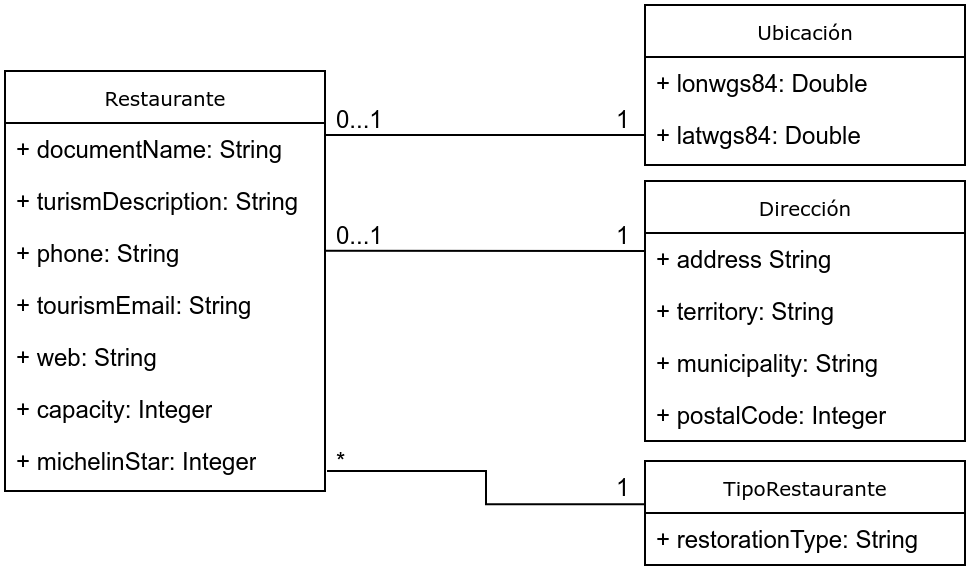

Con esto ya tendríamos el modelado de datos creado y pasaremos al siguiente paso que es el diseño físico de los mismos.

## 3.2. Diseño físico <a class="anchor" id="diseño_fisico"></a>

Tras realizar el diseño conceptual, es el momento de realizar el diseño físico para posteriormente realizar el despliegue en la base de datos.

### 3.2.1 Elección del modelo <a class="anchor" id="3.2.1."></a>

A pesar del diseño conceptual creado previamente, en el que hemos diferenciado cuatro objetos separados, se ha decidido optar por un **modelo flexible** a la hora de realizar el diseño físico de la base de datos.

Este modelo flexible nos va a permitir tener todos los datos embebidos dentro de un mismo documento que a la hora de realizar la búsqueda de datos nos dará **mayor rendimiento**.

Por todo ello, se unificarán los cuatro objetos dentro de un mismo documento que contendrá los 14 campos que hemos ido analizando a lo largo de este documento

### 3.2.2. Crear las colecciones <a class="anchor" id="3.2.2."></a>

Teniendo en cuenta el paso anterior, en el que los datos de cada restaurante se contendrá en un único documento, se ha decidido crear una única colección en la que contener todos los documentos de todos los restaurantes.

Dicha colección se llamará **restaurantes** que estará integrada dentro de la base de datos **salidas_grupales**.

Para crear la colección tendremos que realizar los siguientes pasos:

```js
use salidas_grupales
db.createCollection("restaurantes")
```

Estos mismos pasos están añadidos dentro del fichero **fisico.js** que va adjunto a este documento.

# 4. Despliegue de la base de datos <a class="anchor" id="despliegue"></a>

Tras realizar todo el análisis previo es el momento de realizar el despliegue en la base de datos. El sistema gestor de base de datos elegido es [MongoDB](https://www.mongodb.com/). MongoDB es un sistema de base de datos **NoSQL** y orientado a documentos.

Para la realización de este despliegue se ha utilizado dos servidores:
* **Servidor local**: Desplegado a través de un contenedor **Docker** exponiendo los puertos necesarios.
* **Servidor remoto**: Servidor desplegado en la nube de Amazon (AWS) a través del proveedor [MongoDB Atlas](https://www.mongodb.com/atlas)

A continuación se explica cómo realizar las conexiones a ambos servidores.

## 4.1. Conexión a servidores <a class="anchor" id="conexion"></a>

En este apartado se va a explicar cómo realizar la conexión a servidores MongoDB a través del lenguaje de programación Python. Antes de realizar la conexión es necesario
tener la librería **[pymongo](https://github.com/mongodb/mongo-python-driver)** instalada en nuestro sistema. Para ello realizaremos la instalación mediante el comando de sistema ```pip```.

In [4]:
# Para realizar la conexión necesitamos de la API de python.
!pip install pymongo

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# importamos la librería para poder hacer uso de ella:
import pymongo

### 4.1.1. Conexión local <a class="anchor" id="conexion_local"></a>

En lugar de realizar una instalación al uso, se ha decidido realizar la instalación del servicio a través de un contenedor **[Docker](https://www.docker.com/)**, haciendo uso de **[docker-compose](https://docs.docker.com/compose/)** para el contenedor con el SGBD. Para ello se ha utilizado un fichero **compose.yaml** con el siguiente contenido de despliegue:

```yaml
services:
  mongo:
    image: mongo:5
    environment:
      MONGO_INITDB_ROOT_USERNAME: root
      MONGO_INITDB_ROOT_PASSWORD: example
    ports:
      - 27017:27017
    restart: always
```

Si nuestro sistema está correctamente configurado, al realizar ```docker-compose up``` levantará los contenedores con los servicios que hemos configurado:

* **MongoDB** versión 5 escuchando en el puerto 27017 del anfitrión.

Tras esto tenemos que formar la URI de conexión indicando:
* **Protocolo de conexión**: El protocolo que utilizaremos para realizar la conexión, en este caso **mongodb://**.
* **Usuario de conexión**: A la hora de realizar la conexión, el usuario que vamos a utilizar. En nuestro caso **root**.
* **Contraseña del usuario**: La contraseña necesaria para que el usuario pueda realizar la conexión.
* **Host**: Servidor al que realizaremos la conexión. En este caso, al ser localhost: **127.0.0.1**.

Y posteriormente realizaremos la conexión con la función "MongoClient" de pymongo.

In [6]:
# protocol: protocolo de acceso
protocol = "mongodb://"

# user: nombre de usuario de la base de datos
user = "root"

# password: contraseña del usuario
password = "example"

# host: server name
host = "127.0.0.1"

# options: opciones extra de la conexión
options = "/?retryWrites=true&w=majority"

# formamos la URI de conexión al servidor local
uri_mongo = protocol + user + ":" + password + "@" + host + options

# Conectar al servicio MongoDB
con_local = pymongo.MongoClient(uri_mongo)

Con esto ya tendríamos la conexión al servidor local realizada.

### 4.1.2. Conexión remota<a class="anchor" id="conexion_remota"></a>

Para la conexión remota se va a utilizar el proveedor Mongo Atlas, donde hemos creado una cuenta y se ha realizado el despliegue de una instancia en los servidores de Amazon (AWS).

De manera similar a la conexión local, para poder realizar la conexión al servidor remoto debemos conocer los siguientes datos:

Tras esto tenemos que formar la URI de conexión indicando:
* **Protocolo de conexión**: El protocolo que utilizaremos para realizar la conexión, en este caso **mongodb+srv://**.
* **Usuario de conexión**: A la hora de realizar la conexión, el usuario que vamos a utilizar. En nuestro caso **root**.
* **Contraseña del usuario**: La contraseña necesaria para que el usuario pueda realizar la conexión.
* **Host**: Servidor al que realizaremos la conexión, que es un servidor remoto.

Y tras esto realizaremos la conexión al servidor remoto.

In [7]:
# protocol: protocolo de acceso
protocol = "mongodb+srv://"

# user: nombre de usuario de la base de datos
user = "root"

# password: contraseña del usuario
password = "example"

# host: server name
host = "cluster0.odzyc.mongodb.net"

# options: opciones extra de la conexión
options = "/?retryWrites=true&w=majority"

# formamos la URI de conexión al servidor local
uri_mongo = protocol + user + ":" + password + "@" + host + options

# Conectar al servicio MongoDB
con_remoto = pymongo.MongoClient(uri_mongo)

## 4.2. Creación de base de datos y colección <a class="anchor" id="4.2."></a>

En este apartado vamos a hacer uso del diseño físico que hemos creado en apartados anteriores para desplegarlo en los dos servidores que tenemos actualmente. Para ello, y tal como se ha dicho previamente, se va hacer uso del **modelo flexible**.

### 4.2.1. Creación en local<a class="anchor" id="4.2.1."></a>

Tal como se ha dicho previamente, vamos a crear la base de datos **salidas_grupales** y dentro una colección llamada **restaurantes** donde posteriormente crearemos los documentos:

In [8]:
# creamos la base de datos
db_local = con_local.salidas_grupales
# creamos la colección
collection_local = db_local.restaurantes

### 4.2.2. Creación en remoto<a class="anchor" id="4.2.2."></a>

Al igual que en local, creamos la base de datos y la colección:

In [9]:
# creamos la base de datos
db_remoto = con_remoto.salidas_grupales
# creamos la colección
collection_remoto = db_remoto.restaurantes

## 4.3. Despliegue de datos <a class="anchor" id="4.3."></a>

Ahora es el momento de realizar el despliegue de datos dentro de la colección, con los datos que hemos obtenido y con el dataset que nos interesa tras realizar el análisis del dataset original.

Al igual que los pasos que hemos realizado en este apartado, realizaremos el despliegue en los dos servidores: local y remoto.

Para no repetir código, se va a hacer de una variable donde guardar los inserts que se van a realizar en ambos servidores:
TODO: PARSEAR DE MANERA CORRECTA LOS DATOS

In [10]:
inserts = [{"documentName": "1860 Tradición", "turismDescription": "<p>El restaurante 1860 Tradici&oacute n se ubica en el prestigioso Hotel Marqu&eacute s de Riscal. Cuenta con acceso a las terrazas principales del alojamiento y ofrece platos tradicionales de la regi&oacute n elaborados con productos frescos de temporada. Destacan sus croquetas, el potaje de garbanzos con rape y almejas, las alb&oacute ndigas con patatas panaderas, la menestra de verduras o la merluza a la romana con pimientos rojos, as&iacute  como su amplia carta de vinos. Cuenta con el asesoramiento gastron&oacute mico de Francis Paniego.</p>", "restorationType": "Restaurante", "phone": "945 180 880", "tourismEmail": "", "web": "http://www.espanol.marriott.com/hotels/hotel-information/restaurant/biolc-hotel-marques-de-riscal-a-luxury-collection-hotel-elciego/", "address": "Calle Torrea, 1", "postalCode": "01340", "municipality": "Elciego", "territory": "Araba/Álava", "capacity": "000000035", "michelinStar": "", "latwgs84": "42.51116367179126", "lonwgs84": "-2.618188615344252"}, {"documentName": "5ª Planta", "turismDescription": "<p>La quinta planta del Teatro Campos de Bilbao alberga el restaurante 5&ordf  Planta, que ofrece una cocina creativa, basada en la vanguardia y las tendencias actuales. Cuenta con men&uacute s ecol&oacute gicos, vegetarianos y para cel&iacute acos. Entre sus platos destacan el arroz cremoso con chipirones y hongos, las almejas rellenas de changurro empanado en panko y bacalao (al pil-pil, a la vizca&iacute na, en salsa negra...). </p>", "restorationType": "Restaurante", "phone": "944 079 259", "tourismEmail": "reserva@5planta.com", "web": "http://www.5planta.com", "address": "Restaurante del Teatro Campos Elíseos. Bertendona 3 , 5º Planta", "postalCode": "000048008", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.2596587", "lonwgs84": "-2.9312366999999995"}, {"documentName": "ARAIA SAGARDOTEGIA", "turismDescription": "<p>Especialidad en carnes y pescados a la brasa. Tambi&eacute n ofrece men&uacute s variados de sidrer&iacute a. Tres kupelas, dos, de 4.000 litros cada una y la otra de 4.500 litros.</p>", "restorationType": "Sidreria", "phone": "945 304 763", "tourismEmail": "", "web": "https://sidreriaaraia.com/", "address": "Calle Santsaerreka, 26 - bajo", "postalCode": "01250", "municipality": "Asparrena", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.8851746", "lonwgs84": "-2.3152623999999378"}, {"documentName": "Abeletxe", "turismDescription": "<p>El albergue-restaurante est&aacute  en un paraje natural, y ofrece la calidad de un restaurante con una cocina donde se a&uacute nan tradici&oacute n y modernidad. En la carta encontraremos elaborados entrantes, productos aut&oacute ctonos de temporada, exquisitos pescados y carnes preparados a la parrilla.</p>", "restorationType": "Restaurante", "phone": "943 693 983", "tourismEmail": "info@abeletxe.com", "web": "http://www.abeletxe.com/", "address": "Zarate Bidea, s/n", "postalCode": "000020159", "municipality": "Zizurkil", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.200105403602", "lonwgs84": "-2.0748274730163985"}, {"documentName": "Aburuza", "turismDescription": "<p>Fundada en el a&ntilde o 1979, la familia Aburuza, una estirpe de larga tradici&oacute n en la elaboraci&oacute n de sidra, apost&oacute  por la degustaci&oacute n popular de su producto, la sidra.</p>", "restorationType": "Sidreria", "phone": "943 692 452", "tourismEmail": "aburuza@sidrasaburuza.net", "web": "http://www.sidrasaburuza.net/", "address": "Barrio Goiburu", "postalCode": "000020150", "municipality": "Aduna", "territory": "Gipuzkoa", "capacity": "000000300", "michelinStar": "", "latwgs84": "43.2048134", "lonwgs84": "-2.0525653"}, {"documentName": "Aginaga", "turismDescription": "<p>La sidrer&iacute a Aginaga ofrece la posibilidad de degustar sidra elaborada por ellos al txotx durante todo el a&ntilde o. Adem&aacute s de sidra, podremos beber vino tinto, rosado y cava. Su especialidad es el men&uacute  de sidrer&iacute a, pero tambi&eacute n cuenta con una amplia carta de cocina tradicional vasca.</p>", "restorationType": "Sidreria", "phone": "943 366 710", "tourismEmail": "info@aginagasagardotegia.com", "web": "http://www.aginagasagardotegia.com/", "address": "Barrio Aginaga, s/n", "postalCode": "000020170", "municipality": "Usurbil", "territory": "Gipuzkoa", "capacity": "000000550", "michelinStar": "", "latwgs84": "43.27829343", "lonwgs84": "-2.07247162"}, {"documentName": "Agorregi", "turismDescription": "<p>El restaurante Agorregi, ubicado en el barrio de Igara de San Sebasti&aacute n, ofrece un servicio de calidad y una excelente cocina basada en productos de temporada. El Chef Gorka Arzelus, formado con los chefs m&aacute s importantes de la cocina vasca, elabora sus platos con los mejores ingredientes del mercado.</p>", "restorationType": "Restaurante", "phone": "943 224 328", "tourismEmail": "agorregi@agorregi.com", "web": "http://www.agorregi.com", "address": "Portuetxe, 14", "postalCode": "000020018", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000040", "michelinStar": "", "latwgs84": "43.30240464", "lonwgs84": "-2.011846"}, {"documentName": "Aitor Rauleaga", "turismDescription": "<p>Aitor Rauleaga asent&oacute  su cocina al frente de Trueba, y ahora exhibe su buena mano para abordar el recetario de <strong>sabor y memoria</strong> en un restaurante con su nombre.</p><p>&nbsp </p><p>Se sit&uacute a en el c&eacute ntrico barrio de <strong>Abando</strong>, en el mism&iacute simo Hotel Abando.</p><p>&nbsp </p><p>La cuchara es siempre apuesta segura en un bello comedor donde manda la <strong>cocina tradicional, </strong>elegantemente cl&aacute sica, enraizada y pegada al producto de temporada.</p>", "restorationType": "Restaurante", "phone": "944 25 63 45", "tourismEmail": "reservas@restauranterauleaga.com", "web": "https://restauranterauleaga.com/", "address": "Colón de Larreátegui Kalea, 9", "postalCode": "000048001", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.2622817", "lonwgs84": "-2.9272325"}, {"documentName": "Aizian", "turismDescription": "<p>Este moderno y acogedor restaurante fue dise&ntilde ado por el arquitecto Ricardo Legorreta y es el campe&oacute n estatal de cocina Jos&eacute  Miguel Olazabalaga quien dirige los fogones En la carta encontraremos una fusi&oacute n de la cocina tradicional vasca y la vanguardista, y cuenta tambi&eacute n con una amplia bodega. Est&aacute  ubicado junto al Palacio Euskalduna y desde su terraza podremos ver el Parque de Do&ntilde a Casilda.  <strong>HORARIO</strong>  Desayuno Lunes a viernes: 06:30-10:30 S&aacute bado y domingo: 07:00-11:00  Almuerzo Lunes a s&aacute bado: 12:00-15:30 *Domingo cerrado*  Cena Lunes a s&aacute bado: 19:30-23:30 *Domingo cerrado* </p>", "restorationType": "Restaurante", "phone": "944 280 039", "tourismEmail": "aizian@restaurante-aizian.com", "web": "http://www.restaurante-aizian.com", "address": "Lehendakari Leizaola, 29. (H. Meliá Bilbao)", "postalCode": "000048001", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000070", "michelinStar": "", "latwgs84": "43.26751936", "lonwgs84": "-2.94180662"}, {"documentName": "Akarregi", "turismDescription": "<p>Sidrer&iacute a ubicada en el caser&iacute o Akarregi de Hernani con m&aacute s de 300 a&ntilde os de historia. Contin&uacute an elaborando sidra de forma tradicional  y en su comedor, podremos degustar el t&iacute pico men&uacute  de sidrer&iacute a, bacalao en salsa (por encargo) y la sidra al txotx.</p>", "restorationType": "Sidreria", "phone": "943 330 713", "tourismEmail": "", "web": "http://akarregi-sagardotegia.com/", "address": "Barrio Akarregi, 5", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000130", "michelinStar": "", "latwgs84": "43.267494", "lonwgs84": "-1.963202"}, {"documentName": "Akebaso", "turismDescription": "<p>Caser&iacute o emplazado en las afueras de Atxondo y rodeado de jardines. Su interior, con las paredes en piedra, vigas de madera y chimenea, acoge un restaurante en el que se celebran bodas y numerosos eventos. Su carta se basa en los productos de temporada y en la creatividad del chef I&ntilde igo Fuertes Maguregui y su equipo. </p>", "restorationType": "Restaurante", "phone": "946 582 060", "tourismEmail": "akebaso@akebasorestaurante.com", "web": "http://www.akebasorestaurante.com", "address": "Barrio San Juan de Axpe, 16", "postalCode": "000048292", "municipality": "Atxondo", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.121744756665855", "lonwgs84": "-2.5956855522537126"}, {"documentName": "Akelarre", "turismDescription": "<p>Pedro Subijana desarrolla desde 1970 una cocina personal que ha convertido el <strong>Akelarre </strong>en un cl&aacute sico de &quot la nueva cocina vasca&quot . Est&aacute  ubicado en el barrio <strong>Igeldo</strong>, y desde sus grandes ventanales tendremos unas espectaculares vistas a la costa Cant&aacute brica. En sus tres comedores de decoraci&oacute n sencilla y elegante podremos disfrutar de excelentes postres e impecable servicio.</p>", "restorationType": "Restaurante", "phone": "943 311 209", "tourismEmail": "restaurante@akelarre.net", "web": "http://www.akelarre.net", "address": "Padre Orcolaga, 56", "postalCode": "000020008", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000140", "michelinStar": "000000003", "latwgs84": "43.3077501796958", "lonwgs84": "-2.0431346731414806"}, {"documentName": "Akelenea", "turismDescription": "<p>La sidrer&iacute a Akelenea est&aacute  situada en un entorno rural, y sus inicios datan del siglo XIX. Cuenta con dos comedores donde celebrar todo tipo de eventos, y adem&aacute s de men&uacute  de sidrer&iacute a y sidra al txotx durante todo el a&ntilde o, dispone tambi&eacute n de carta y de diferentes men&uacute s.</p>", "restorationType": "Sidreria", "phone": "943 333 333", "tourismEmail": "akelenea@hotmail.es", "web": "", "address": "Camino Oialume, 57", "postalCode": "000020115", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000070", "michelinStar": "", "latwgs84": "43.2725401", "lonwgs84": "-1.9513230000000021"}, {"documentName": "Alabortza Kantina-Cantina de Puntas", "turismDescription": "<p>Cuenta con una privilegiada situaci&oacute n, junto a la bocana de la bah&iacute a de <a href=\"https://turismo.euskadi.eus/es/localidades/pasaia/aa30-12375/es/\">Pasaia</a>, entre el monte <strong>Jaizkibel</strong> y Ulia, que ofrece a sus visitantes unas espectaculares vistas, mientras disfrutan en su terraza de alguna de sus especialidades.</p>", "restorationType": "Asador", "phone": "943 584 126", "tourismEmail": "", "web": "https://alabortza.com/", "address": "Puntetako pasealekua, z/g", "postalCode": "000020110", "municipality": "Pasaia", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.33269330326799", "lonwgs84": "-1.9235524346710235"}, {"documentName": "Alameda", "turismDescription": "<p>La tercera generaci&oacute n es quien est&aacute  a cargo de este negocio familiar ubicado en el centenario hotel Alameda y de gran tradici&oacute n en la localidad. Gorka Txapartegi elabora originales recetas con los mejores productos de temporada en este renovado edificio del siglo XIX. La carta de este restaurante de cocina vasca vanguardista est&aacute  basada en productos de la huerta y del mar.</p>", "restorationType": "Restaurante", "phone": "943 642 789", "tourismEmail": "info@restaurantealameda.net", "web": "http://www.restaurantealameda.net", "address": "Minasorroeta, 1", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "Comedores para 80 y 200", "michelinStar": "000000001", "latwgs84": "43.36124178", "lonwgs84": "-1.79269146"}, {"documentName": "Albistur", "turismDescription": "<p>Situado en el barrio de Altzibar de Oiartzun el visitante puede degustar una exquisita comida de estilo casero y platos t&iacute picos de la gastronom&iacute a tradicional vasca. Cuenta con un amplio comedor con capacidad para 55 personas.</p>", "restorationType": "Restaurante", "phone": "843 631 558", "tourismEmail": "albisturjatetxea@gmail.com", "web": "http://restaurantealbistur.com/", "address": "Klarene Plaza, 1", "postalCode": "000020180", "municipality": "Oiartzun", "territory": "Gipuzkoa", "capacity": "000000055", "michelinStar": "", "latwgs84": "43.2934227", "lonwgs84": "-1.8562845999999809"}, {"documentName": "Albokak Jatetxea", "turismDescription": "<p>Manu Akasuso en la gerencia y elaborando una cocina tradicional vasca con su equipo de cocineros empieza en este proyecto en el parque empresarial de Arbuio, t&eacute rmino de Alons&oacute tegi a 5 minutos de Bilbao, en plena naturaleza.</p>", "restorationType": "Restaurante", "phone": "944 982 370", "tourismEmail": "info@albokakjatetxea.com", "web": "http://www.albokakjatetxea.com", "address": "Polígon empresarial Arbuio 11, Nave 14", "postalCode": "000048810", "municipality": "Alonsotegi", "territory": "Bizkaia", "capacity": "000000190", "michelinStar": "", "latwgs84": "43.236496", "lonwgs84": "-3.006681"}, {"documentName": "Aldasoro Berri", "turismDescription": "<p>Tras un aplastante &eacute xito en Ordizia, Juan Mart&iacute nez de Rituerto ha comenzado una nueva etapa al mando de Aldasoro Berri en Lazkao. Un restaurante que ofrece platos tradicionales del mismo exquisito nivel que los de Ordizia, pero con un mayor espacio para que los comensales puedan disfrutar de la comida con mayor comodidad.    Entre los platos m&aacute s destacados se encuentran: Manitas de cerdo rellenas de hongos y foie, Secreto ib&eacute rico con frutos rojos y champi&ntilde ones, Carrilleras de ternera con salsa cazadora, Pulpo a feira, Oreja ib&eacute rica al ajillo o Tarta casera de queso, todo ello combinado con una gran variedad de pintxos para aquellos que deseen probar peque&ntilde as dosis de los manjares que se preparan en los fogones de este restaurante tradicional.  </p>", "restorationType": "Restaurante", "phone": "943 884 069", "tourismEmail": "", "web": "", "address": "Areso 3 trasera", "postalCode": "000020210", "municipality": "Lazkao", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.03204969999999", "lonwgs84": "-2.18384089999995"}, {"documentName": "Algorri", "turismDescription": "<p>La sidrer&iacute a Algorri pertenece al recinto hostelero Marina Berri, que cuenta con restaurante, asador, cafeter&iacute a y sidrer&iacute a. Ofrecen men&uacute  de sidrer&iacute a y sidra al txotx durante todo el a&ntilde o, y el comedor cuenta con un ventanal con vistas al puerto deportivo de Zumaia.</p>", "restorationType": "Sidreria", "phone": "943 865 617", "tourismEmail": "reservas@marinaberri.com", "web": "http://www.marinaberri.com", "address": "Barrio de Santiago, 1", "postalCode": "000020750", "municipality": "Zumaia", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.29537916", "lonwgs84": "-2.25129721"}, {"documentName": "Algorri", "turismDescription": "<p>La especialidad del restaurante Algorri son los platos de la cocina tradicional vasca elaborados siempre con productos de calidad. Adem&aacute s, cuenta tambi&eacute n con una parrilla para carnes y pescados.</p>", "restorationType": "Restaurante", "phone": "943 218 279", "tourismEmail": "info@algorrijatetxea.com", "web": "http://www.algorrijatetxea.com/", "address": "Camino Zubiberri, 29", "postalCode": "000020018", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000240", "michelinStar": "", "latwgs84": "43.29830066346091", "lonwgs84": "-2.00500042764736"}, {"documentName": "Alkizako Ostatua", "turismDescription": "<p><strong>Alkizako herri ostatua</strong>, est&aacute  dirigido por <strong>Kepa Miranda</strong>, hostelero con gran experiencia culinaria, nace de la ilusi&oacute n y ganas de trabajar.&nbsp </p><p>    El <strong>Ostatua de Alkiza</strong> ofrece calidad en su cocina creativa, actual e imaginativa. Un amplio men&uacute  del d&iacute a y men&uacute  del fin de semana con alimentos de temporada en su acogedor comedor. Raciones, platos combinados, pintxos y la famosa alubia con morcilla y berza que no os lo pod&eacute is perder.&nbsp </p><p>  </p><p> &nbsp </p>", "restorationType": "Restaurante", "phone": "943 691 836", "tourismEmail": "info@ostatualkiza.com", "web": "http://www.alkiza.eus/es/ostatu-taberna", "address": "San Martín plaza", "postalCode": "", "municipality": "Alkiza", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.17271210049489", "lonwgs84": "-2.108520082803352"}, {"documentName": "Almiketxu", "turismDescription": "<p>Es un caser&iacute o t&iacute pico vasco y est&aacute  regentado por la familia  Hormaetxea-Albonigamenor. Desde hace m&aacute s de 30 a&ntilde os ofrece platos de cocina vasca al m&aacute s puro estilo tradicional. Cuenta con tres comedores de decoraci&oacute n r&uacute stica, un bar y una terraza exterior con jard&iacute n. Posee horno de le&ntilde a y una huerta en la que cultivan las verduras y legumbres para crear sus platos sencillos pero de calidad. Su especialidad es el pescado y la carne, y todos los postres son caseros.</p>", "restorationType": "Restaurante", "phone": "946 880 925", "tourismEmail": "almiketxu@gmail.com", "web": "http://www.almiketxu.com", "address": "Almike Auzoa, 8", "postalCode": "000048370", "municipality": "Bermeo", "territory": "Bizkaia", "capacity": "000000140", "michelinStar": "", "latwgs84": "43.40890469", "lonwgs84": "-2.73422921"}, {"documentName": "Alorrenea", "turismDescription": "<p>En la sidrer&iacute a Alorrenea ofrecen men&uacute  de sidrer&iacute a desde enero hasta mayo, y despu&eacute s ampl&iacute an el men&uacute  con m&aacute s entrantes, pescados y postres. Adem&aacute s, elaboran su propia sidra a partir de octubre, y los visitantes podr&aacute n contemplar <em>in situ</em> el proceso de elaboraci&oacute n.</p>", "restorationType": "Sidreria", "phone": "943 336 999", "tourismEmail": "info@alorrenea.com", "web": "http://www.alorrenea.com/", "address": "Camino Alorrene, 4", "postalCode": "000020115", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000220", "michelinStar": "", "latwgs84": "43.28740879", "lonwgs84": "-1.94637344"}, {"documentName": "Altamira", "turismDescription": "<p>Restaurante situado en el campo de f&uacute tbol de Ordizia donde se ofrece una cocina con influencia mediterr&aacute nea.</p>", "restorationType": "Restaurante", "phone": "685 794 755", "tourismEmail": "", "web": "", "address": "Estadio Altamira", "postalCode": "000020240", "municipality": "Ordizia", "territory": "Gipuzkoa", "capacity": "000000055", "michelinStar": "", "latwgs84": "43.053314956156306", "lonwgs84": "-2.1729920648040206"}, {"documentName": "Altuna", "turismDescription": "<p>La sidrer&iacute a Altuna est&aacute  situada en un caser&iacute o rodeada de manzanales de propia producci&oacute n y elaboran su propia sidra desde 1904. Abierta &uacute nicamente en temporada de txotx, podremos degustar el t&iacute pico men&uacute  de sidrer&iacute a tanto de pie como sentados.</p>", "restorationType": "Sidreria", "phone": "943 554 917", "tourismEmail": "", "web": "https://www.sagardoa.eus/3_sidreria-altuna", "address": "Caserío Galarraga, barrio Lategi", "postalCode": "000020130", "municipality": "Urnieta", "territory": "Gipuzkoa", "capacity": "000000090", "michelinStar": "", "latwgs84": "43.24948178", "lonwgs84": "-1.98583277"}, {"documentName": "Altxerri", "turismDescription": "<p>Ubicado en Aia y con m&aacute s de 10 a&ntilde os de experiencia, el restaurante <strong>Altxerri </strong>es un espacio ideal para comidas familiares, de negocios e incluso para degustar sus exquisitas <strong>tapas</strong>. Combinan la tradici&oacute n con la modernidad. <strong>Tradici&oacute n, producto, creatividad y sabor </strong>se funden en Altxerri en un solo concepto: la satisfacci&oacute n del cliente.</p>", "restorationType": "Restaurante", "phone": "625 700 898", "tourismEmail": "altxerri.jatetxea@gmail.com", "web": "http://www.facebook.com/Altxerri", "address": "Olaskoegia 36", "postalCode": "000020810", "municipality": "Orio", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.26853282157585", "lonwgs84": "-2.1332002037048596"}, {"documentName": "Altzoko Ostatua", "turismDescription": "<p><strong>Altzoko Ostatua</strong> se sit&uacute a en el peque&ntilde o municipio de Altzo dentro de la comarca de <strong>Tolosaldea en Gipuzkoa</strong>.&nbsp </p><p>  Un restaurante con un men&uacute  variado y de calidad donde poder celebrar acontecimientos como bautizos, comuniones&mldr Su cocina casera y con productos locales ofrece men&uacute s para todos los gustos. No os perd&aacute is sus quesos, chorizos y tortillas de patatas.</p><p>  &nbsp </p>", "restorationType": "Restaurante", "phone": "943 652 262", "tourismEmail": "", "web": "http://www.altzokoostatua.eus", "address": "Altzo-Muino Auzoa, 114, 20268", "postalCode": "000020268", "municipality": "Altzo", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.099698", "lonwgs84": "-2.083582999999976"}, {"documentName": "Altzueta", "turismDescription": "<p>Ubicada en un caser&iacute o vasco del estilo m&aacute s tradicional, la sidrer&iacute a Altzueta ofrece men&uacute  sidrer&iacute a en temporada de txotx, pero permanece abierta durante todo el a&ntilde o exclusivamente para la venta de sidra embotellada. En Altzueta elaboran su propia sidra nutri&eacute ndose de sus 2.500 manzanos.</p>", "restorationType": "Sidreria", "phone": "943 551 502", "tourismEmail": "altzueta@altzuetasagardotegia.com", "web": "http://www.altzuetasagardotegia.com/", "address": "Osinaga, 7", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.25295806", "lonwgs84": "-1.96339809"}, {"documentName": "Ama", "turismDescription": "<p>Ubicado en el municipio de <a href=\"https://turismo.euskadi.eus/es/localidades/tolosa/aa30-12375/es/\">Tolosa</a>, el <strong>restaurante Ama</strong> comenz&oacute  siendo un bar de pintxos elaborados con productos locales.</p><p>&nbsp </p><p>Hoy en d&iacute a, Javi Rivero y Gorka Rico siguen teniendo la misma filosof&iacute a, ya que uno de sus objetivos es poner <strong>el entorno como escaparate</strong>: agricultores, pescadores y ganaderos locales son sus proveedores.</p><p>&nbsp </p><p>Dispone de 5 mesas y ofrece un <strong>men&uacute  degustaci&oacute n </strong>que cambia seg&uacute n los productos de temporada.</p>", "restorationType": "Restaurante", "phone": "943 382 059", "tourismEmail": "ama@amataberna.eus", "web": "https://www.amataberna.net/", "address": "Aroztegieta Kalea, 13", "postalCode": "000020400", "municipality": "Tolosa", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.1385932", "lonwgs84": "-2.073288"}, {"documentName": "Amaike", "turismDescription": "<p>Adem&aacute s del men&uacute  de sidrer&iacute a, en Amaike ofrecen men&uacute s especiales y una amplia carta basada en la cocina tradicional vasca. Tambi&eacute n cuenta con la posibilidad de degustar la sidra al txotx durante todo el a&ntilde o.</p>", "restorationType": "Sidreria", "phone": "944 832 667", "tourismEmail": "info@sidreriaamaike.es", "web": "", "address": "Doctor José Zaldua, 31", "postalCode": "000048920", "municipality": "Portugalete", "territory": "Bizkaia", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.3204718", "lonwgs84": "-3.0316000999999915"}, {"documentName": "Amalurra", "turismDescription": "<p>Un amplio y luminoso edificio de l&iacute nea vanguardista alberga el restaurante Amalurra, que tambi&eacute n funciona como hotel rural. Adem&aacute s de cocina casera, los comensales tambi&eacute n podr&aacute n disfrutar de men&uacute s vegetarianos y platos t&iacute picos de la cocina vasca. En su exterior cuenta con amplias zonas ajardinadas, que hacen del restaurante un lugar id&oacute neo para la celebraci&oacute n de todo tipo de eventos.</p>", "restorationType": "Restaurante", "phone": "946 109 540", "tourismEmail": "amalurra@amalurra.com", "web": "http://www.amalurra.com", "address": "Bº La Reneja, 35", "postalCode": "000048879", "municipality": "Artzentales", "territory": "Bizkaia", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.23572275891484", "lonwgs84": "-3.2221210104370357"}, {"documentName": "Amebi", "turismDescription": "<p>La sidrer&iacute a Amebi, adem&aacute s del t&iacute pico men&uacute  de sidrer&iacute a, ofrece men&uacute  del d&iacute a, platos combinados, men&uacute s especiales o la carta. Elaboran su propia sidra y se puede degustar al txotx durante todo el a&ntilde o.</p>", "restorationType": "Sidreria", "phone": "943 162 523", "tourismEmail": "", "web": "", "address": "Zubierreka, 9", "postalCode": "000020210", "municipality": "Lazkao", "territory": "Gipuzkoa", "capacity": "000000140", "michelinStar": "", "latwgs84": "43.02287310169155", "lonwgs84": "-2.177130303149397"}, {"documentName": "Amelia by Paulo Airaudo", "turismDescription": "<p>El <strong>restaurante Amelia by Paulo Airaudo</strong>&nbsp est&aacute  ubicado en el coraz&oacute n del &aacute rea rom&aacute ntica de la ciudad, junto al <a href=\"https://turismo.euskadi.eus/es/patrimonio-cultural/paseo-de-la-concha/aa30-12375/es/\"><strong>paseo de la Concha</strong></a>. El local que ocupa una tienda antigua de cobre en un espacio de dos plantas es de estilo minimalista y moderno y tiene capacidad para 28 comensales.</p><p>&nbsp </p><p>El chef argentino <strong>Paulo Airaudo</strong> es el responsable de dar forma a los &ldquo men&uacute s degustaci&oacute n&rdquo  combinando diferentes sabores y texturas para as&iacute  hacerlos &uacute nicos. Por su filosof&iacute a de trabajo se relacionan con peque&ntilde os productores que comparten sus mismos valores, quienes recorren mercados, facilitan productos frescos y de m&aacute xima calidad.</p><p>&nbsp </p><p>En esta misma l&iacute nea tambi&eacute n el sommelier se concentra en que los vinos que ofrece de diferentes partes del mundo sigan un m&eacute todo de producci&oacute n biol&oacute gica o biodin&aacute mica</p>", "restorationType": "Restaurante", "phone": "943 845 647", "tourismEmail": "booking@ameliarestaurant.com", "web": "http://www.ameliarestaurant.com", "address": "Zubieta Kalea, 26", "postalCode": "000020006", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000028", "michelinStar": "000000002", "latwgs84": "43.3168991", "lonwgs84": "-1.9862221"}, {"documentName": "Amelibia", "turismDescription": "<p>Ante las puertas de la muralla de <strong>Laguardia</strong> y con unas impresionantes vistas a los vi&ntilde edos, este restaurante nos ofrece un amplio y alegre espacio para degustar una cocina basada en los productos aut&oacute ctonos pero con un toque de elaboraci&oacute n personal.&nbsp </p><p>   Dispone tambi&eacute n de men&uacute  degustaci&oacute n y adapta su oferta a necesidades espec&iacute ficas (dietas cel&iacute acas, diab&eacute ticas, hipertensas y al&eacute rgicas).&nbsp </p><p>   Sus propietarios Patxi y Alex hacen de &eacute l un lugar muy acogedor y de gran calidad gastron&oacute mica.</p>", "restorationType": "Restaurante", "phone": "945 621 207", "tourismEmail": "restauranteamelibia@gmail.com", "web": "http://www.restauranteamelibia.com/", "address": "Barbacana, 14", "postalCode": "01300", "municipality": "Laguardia", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.5518412", "lonwgs84": "-2.5832984999999553"}, {"documentName": "Ametzagaña", "turismDescription": "<p>El restaurante Ametzaga&ntilde a est&aacute  en<strong> Donostia-San Sebasti&aacute n</strong>, rodeado de caser&iacute os y zonas verdes. Ofrece los mejores productos de temporada y una exclusiva selecci&oacute n de platos. Disponen de una amplia carta, de men&uacute s especiales y men&uacute  del d&iacute a. Adem&aacute s, disponen de parque infantil y animaci&oacute n para los m&aacute s peque&ntilde os y de un amplio aparcamiento gratuito.</p>", "restorationType": "Restaurante", "phone": "943 459 092", "tourismEmail": "info@ametzagana.com", "web": "http://www.ametzagana.com", "address": "Camino de Uba, 61", "postalCode": "000020014", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000327", "michelinStar": "", "latwgs84": "43.30585096572276", "lonwgs84": "-1.9525989973533342"}, {"documentName": "Ander", "turismDescription": "<p>En la sidrer&iacute a Ander ofrecen tanto el t&iacute pico men&uacute  de sidrer&iacute a, como una carta basada en la cocina tradicional vasta y men&uacute  del d&iacute a, y podremos degustar la sidra al txotx durante todo el a&ntilde o. Adem&aacute s, para disfrute de los m&aacute s peque&ntilde os, est&aacute  rodeada de parques infantiles y canchas de baloncesto.</p>", "restorationType": "Sidreria", "phone": "944 476 666", "tourismEmail": "ander@sidreriaander.com", "web": "http://www.sidreriasenbilbao.com/", "address": "Andalucia, 1", "postalCode": "000048015", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.28283332", "lonwgs84": "-2.96479602"}, {"documentName": "Andere", "turismDescription": "<p>Este restaurante abri&oacute  sus puertas en 1976 y hoy en d&iacute a es una referencia cl&aacute sica de <strong>Vitoria-Gasteiz.</strong> El chef Jos&eacute  Mar&iacute a del Val y su equipo se encargan de ofrecer un servicio de alta calidad y con productos de calidad.&nbsp </p><p> Dispone de instalaciones necesarias para todo tipo de celebraciones (bodas, banquetes, convenciones, comidas de grupos, ...).&nbsp </p><p> Adem&aacute s de ello, dispone de un jard&iacute n cerrado y climatizado.</p>", "restorationType": "Restaurante", "phone": "945 214 930", "tourismEmail": "info@restauranteandere.com", "web": "http://www.restauranteandere.com", "address": "Gorbea, 8", "postalCode": "01008", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "Comedores para 60, 120, 150 y 200 comensales", "michelinStar": "", "latwgs84": "42.849356605632124", "lonwgs84": "-2.6795801790984797"}, {"documentName": "Andra Mari", "turismDescription": "<p>Est&aacute  ubicado en un hermoso caser&iacute o del siglo XIII junto a la iglesia de Andra Mari y es todo un cl&aacute sico de la cocina vasca. Su carta se basa en los productos de temporada, especialmente pescados y caza, combinando tradici&oacute n e innovaci&oacute n.</p><p>&nbsp </p><p>Dispone de varios comedores sencillos y muy bien decorados, con manteler&iacute a, cer&aacute mica y cuberter&iacute a originales. Cuenta con un museo del vino con amplia selecci&oacute n de riojas que puede visitarse.</p>", "restorationType": "Restaurante", "phone": "944 560 005", "tourismEmail": "andramari@andra-mari.com", "web": "http://www.andra-mari.com/", "address": "Bº Elexalde, 22", "postalCode": "000048960", "municipality": "Galdakao", "territory": "Bizkaia", "capacity": "000000070", "michelinStar": "000000001", "latwgs84": "43.23503044", "lonwgs84": "-2.83249703"}, {"documentName": "Ankapalu Berria", "turismDescription": "<p>La sidrer&iacute a Ankapalu Berria est&aacute  situada a las faldas del Gaztelumendi, en Larrabetzu. Adem&aacute s del men&uacute  de sidrer&iacute a, cuenta con una amplia carta basada en la cocina tradicional vasca, y su especialidad son los pescados y carnes a la brasa. Ofrece tambi&eacute n la posibilidad de degustar la sidra al txotx durante todo el a&ntilde o.</p>", "restorationType": "Sidreria", "phone": "944 558 197", "tourismEmail": "ankapaluberria@hotmail.com", "web": "", "address": "Logroño Behekoa, s/n", "postalCode": "000048195", "municipality": "Larrabetzu", "territory": "Bizkaia", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.27275674599446", "lonwgs84": "-2.8000676863940726"}, {"documentName": "Araba", "turismDescription": "<p><strong>El restaurante Araba</strong> cuenta con amplios salones para todo tipo de celebraciones, y adem&aacute s de la carta, ofrecen men&uacute  del d&iacute a, men&uacute s especiales y men&uacute s para las cenas de los viernes y s&aacute bados.&nbsp </p><p> Entre sus especialidades, encontraremos los asados de cordero y cochinillo.</p>", "restorationType": "Restaurante", "phone": "945 222 669", "tourismEmail": "araba@restaurantearaba.com", "web": "http://www.restaurantearaba.com/", "address": "Avenida de los Huetos, 17", "postalCode": "01010", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000100", "michelinStar": "", "latwgs84": "42.854172386438094", "lonwgs84": "-2.6993479497375574"}, {"documentName": "Araeta", "turismDescription": "<p>Situado en un entorno natural, el restaurante Araeta cuenta con tres ambientes diferentes, un gran comedor, una sidrer&iacute a y una terraza cubierta. Ofrecen tanto carta como diferentes tipos de men&uacute s, y en temporada de txotx, ofrecen tambi&eacute n men&uacute  de sidrer&iacute a.</p>", "restorationType": "Restaurante", "phone": "943 362 049", "tourismEmail": "araeta@araeta.com", "web": "http://www.araeta.com", "address": "Camino de Berridi, 22", "postalCode": "000020160", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000620", "michelinStar": "", "latwgs84": "43.2715536", "lonwgs84": "-2.031403599999976"}, {"documentName": "Aranburu", "turismDescription": "<p>Situado en un caser&iacute o del siglo XVI rehabilitado. La especialidad es la merluza al horno y el cordero entero a la brasa. Ofrece ambiente familiar y comida casera en un entorno rural y tranquilo. Es necesario encargar el men&uacute  con antelaci&oacute n.</p>", "restorationType": "Restaurante", "phone": "943 148 005", "tourismEmail": "info@casaruralaranburu.com", "web": "http://casaruralaranburu.com/restaurante-comida-casera-euskadi/", "address": "Urrutikoetxea Kalea, 2. Barrio Aizarna", "postalCode": "000020740", "municipality": "Zestoa", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.23635438021401", "lonwgs84": "-2.2257298129669607"}, {"documentName": "Ardora", "turismDescription": "<p>Ardora es un restaurante situado junto a la playa de Hondarribia, con vistas a la bah&iacute a del Txingudi y Larrun, que adem&aacute s dispone de una terraza y una gran cafeter&iacute a. Ofrece una extensa carta de temporada, con especialidad en pescados y mariscos. Adem&aacute s, Ardora dispone de un parking propio junto al restaurante. </p>", "restorationType": "Restaurante", "phone": "943 642 461", "tourismEmail": "rest.ardora@gmail.com", "web": "http://ardorarestaurante.com/", "address": "Foru, s/n", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "000000350", "michelinStar": "", "latwgs84": "43.3721129", "lonwgs84": "-1.7943330000000515"}, {"documentName": "Ardora", "turismDescription": "<p>Situado junto a la playa de Hondarribia, el restaurante Ardora est&aacute  especializado en cocina tradicional vasca, basada en productos t&iacute picos de nuestra tierra.    La tem&aacute tica mar&iacute tima acompa&ntilde a a la degustaci&oacute n de su amplia carta de pescados, adem&aacute s tambi&eacute n ofrece carnes y variedad de entrantes.  </p>", "restorationType": "Restaurante", "phone": "943 642 461", "tourismEmail": "info@ardorarestaurante.com", "web": "http://www.ardorarestaurante.com/", "address": "Foru Kalea", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "000000350", "michelinStar": "", "latwgs84": "43.3731012", "lonwgs84": "-1.7958092000000079"}, {"documentName": "Arenalde Maitea", "turismDescription": "<p>El restaurante Arenalde Maitea est&aacute  situado en un caser&iacute o tradicional. Su decoraci&oacute n es r&uacute stica pero elegante, y, expuesta por todo el local, encontraremos una amplia colecci&oacute n de utensilios y objetos de caser&iacute o restaurados. Cuenta con tres plantas y un comedor en cada una de ellas. Su especialidad son los pescados y carnes a la brasa.</p>", "restorationType": "Restaurante", "phone": "945 892 426", "tourismEmail": "arenaldemaitea@arenaldemaitea.com", "web": "", "address": "Cerrajería, 1", "postalCode": "01470", "municipality": "Amurrio", "territory": "Araba/Álava", "capacity": "000000270", "michelinStar": "", "latwgs84": "43.057615550904615", "lonwgs84": "-2.999027915344186"}, {"documentName": "Aretxarte", "turismDescription": "<p>Decorado de forma actual pero con un toque tradicional. Podr&aacute  degustar nuestros men&uacute s especiales, los cuales se elaboran y cambian de forma diaria y que contiene numerosos platos para elegir. Sofistada carta de platos y una cuantiosa carta de vinos.</p>", "restorationType": "Restaurante", "phone": "944 036 900", "tourismEmail": "reservas@aretxarte.com", "web": "http://www.aretxarte.com", "address": "Parque Tecnológico de Zamudio, Edificio 200", "postalCode": "000048170", "municipality": "Zamudio", "territory": "Bizkaia", "capacity": "000000180", "michelinStar": "", "latwgs84": "43.289894", "lonwgs84": "-2.861468"}, {"documentName": "Aretxondo", "turismDescription": "<p>Ricardo As&uacute a es quien dirige este negocio familiar y cuenta con la colaboraci&oacute n de Guillermo Revilla como jefe de cocina. Es un bello caser&iacute o vasco donde ofrecen una combinaci&oacute n de lo cl&aacute sico y lo moderno bas&aacute ndose en productos aut&oacute ctonos  pero su especialidad son los productos de temporada. Destaca su luminoso comedor r&uacute stico de techos altos y con las vigas de madera a la vista.</p>", "restorationType": "Restaurante", "phone": "944 567 671", "tourismEmail": "aretxondo@aretxondo.com", "web": "http://www.aretxondo.com", "address": "Bº Elexalde, 20", "postalCode": "000048960", "municipality": "Galdakao", "territory": "Bizkaia", "capacity": "000000180", "michelinStar": "", "latwgs84": "43.232794", "lonwgs84": "-2.834571"}, {"documentName": "Argindegi ostatua", "turismDescription": "<p>El Zumarragatarra Iosu Landa, formado en restaurantes tan emblem&aacute ticos como el Bully o T&uacute bal, regenta desde el 2010 este restaurante en un precioso entorno rural, a 2 minutos en coche del caser&iacute o Igartubeiti.    Especialidad: pimientos del cristal con ventresca y huevo, alcachofas con almejas y jam&oacute n, pescado fresco del d&iacute a, solomillo a la plancha con foie, chuleta de ternera.    Men&uacute  del d&iacute a y carta.</p>", "restorationType": "Restaurante", "phone": "943 720 267", "tourismEmail": "", "web": "", "address": "Ezkio Núcleo Gunea, 10", "postalCode": "", "municipality": "Ezkio-Itsaso", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.080654298987874", "lonwgs84": "-2.2755298362457097"}, {"documentName": "Argoin-Txiki", "turismDescription": "<p>Situado en un ambiente rural y relajado, el asador Argoin Txiki es especialista en<strong> carnes y pescados a la parrilla</strong>. Adem&aacute s de carta y men&uacute  del d&iacute a, ofrecen tambi&eacute n <strong>men&uacute  de sidrer&iacute a</strong> y la opci&oacute n de probar la sidra al txotx en temporada de sidra.</p>", "restorationType": "Asador", "phone": "943 890 184", "tourismEmail": "info@argointxiki.com", "web": "http://www.argointxiki.com/", "address": "Barrio Argoin, 310", "postalCode": "000020800", "municipality": "Zarautz", "territory": "Gipuzkoa", "capacity": "000000090", "michelinStar": "", "latwgs84": "43.2723935057873", "lonwgs84": "-2.1764087677002"}, {"documentName": "Arimendi", "turismDescription": "<p>En el restaurante Arimendi del Hotel Jardines de Uleta se trabaja una cocina tradicional, en la que se da prioridad a los productos locales. Especial menci&oacute n merecen sus carnes y pescados a la parrilla.    Cuenta con m&aacute s de 120 referencias de las diversas regiones vin&iacute colas de Espa&ntilde a, as&iacute  como una amplia gama de vinos del mundo.    El restaurante dispone de dos salones privados y sus pintxos han sido galardonados en concursos gastron&oacute micos de renombre. Ofrecen un men&uacute  vegetariano y otro para cel&iacute acos.</p>", "restorationType": "Restaurante", "phone": "945 133 131", "tourismEmail": "reservasjardinesdeuleta@grupozenithoteles.com", "web": "http://jardinesdeuleta.zenithoteles.com/es/restaurante/", "address": "Calle Uleta, 1", "postalCode": "01007", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.8340036682558", "lonwgs84": "-2.6960617883605664"}, {"documentName": "Aristizabal", "turismDescription": "<p>Esta sidrer&iacute a de Oiartzun huele a tradici&oacute n por todos los rincones. El t&iacute pico men&uacute  de sidrer&iacute a que ofrece se puede acompa&ntilde ar de la sabrosa sidra que elaboran y almacenan en su propia bodega.</p>", "restorationType": "Sidreria", "phone": "943 492 714", "tourismEmail": "", "web": "", "address": "Txalaka bidea, 4 (Iturriotz)", "postalCode": "000020180", "municipality": "Oiartzun", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.28692076119731", "lonwgs84": "-1.8729201387313879"}, {"documentName": "Arita Berri", "turismDescription": "<p>El <strong>Restaurante Arita Berri en Ere&ntilde o (Bizkaia)</strong>, edificado en el a&ntilde o 1986 sobre la estructura de un caser&iacute o del siglo XIX ha pasado a convertirse en uno de los principales puntos de referencia de <strong>Bizkaia y Euskadi</strong>.&nbsp </p><p>  La propuesta culinaria de este establecimiento apuesta por carnes y pescados de primera calidad, con una amplia carta que combina la cocina vasca tradicional con ciertos toques de modernidad.</p><p>  Ubicado en plena naturaleza, el <strong>restaurante Arita Berri</strong> dispone de bodega propia, donde reposan los vinos cuidadosamente seleccionados, un amplio parking y una zona de esparcimiento para los m&aacute s peque&ntilde os.</p><p>  &nbsp </p>", "restorationType": "Restaurante", "phone": "946 256 546", "tourismEmail": "aritaberri@aritaberri.com", "web": "http://www.aritaberri.com", "address": "Basetxetas. Atxoste auzoa, 23", "postalCode": "000048313", "municipality": "Bedia", "territory": "Bizkaia", "capacity": "000000450", "michelinStar": "", "latwgs84": "43.361068", "lonwgs84": "-2.619271"}, {"documentName": "Aritxi", "turismDescription": "<p>Juan Salvado, que cuenta con una dilatada experiencia en el &aacute mbito de la restauraci&oacute n (ha sido jefe de cocina de los prestigiosos Boroa, el Mugaritz o el Andra Mari), es el due&ntilde o y cocinero del <strong>restaurante-asador </strong>Aritxi.</p><p>&nbsp </p><p>Este hermoso caser&iacute o se encuentra en <a href=\"https://turismo.euskadi.eus/es/localidades/mungia/aa30-12375/es/\">Mungia</a>, en las inmediaciones de los montes Jata y Sollube, y su cocina est&aacute  inspirada en la<strong> gastronom&iacute a vasca.</strong> Asimismo, su amplia y variada carta de temporada se basa en las carnes y pescados a la brasa y los mejores productos de nuestra tierra. Dispone de varios tipos de men&uacute s y dos salones para 100 y 45 comensales, respectivamente.</p>", "restorationType": "Asador", "phone": "946 741 181", "tourismEmail": "asadoraritxi@asadoraritxi.com", "web": "", "address": "Camino de Meñaka, 1", "postalCode": "000048100", "municipality": "Mungia", "territory": "Bizkaia", "capacity": "000000180", "michelinStar": "", "latwgs84": "43.3670617", "lonwgs84": "-2.8099219"}, {"documentName": "Arkupe", "turismDescription": "<p><strong>El restaurante Arkupe</strong> se encuentra situado en un edificio del siglo XVII en el mism&iacute simo casco hist&oacute rico de <strong>Vitoria-Gasteiz</strong>. Sus sabrosos platos se basan en la cocina tradicional vasca y se pueden acompa&ntilde ar con uno de los excelentes caldos incluidos en su inmensa carta de vinos.&nbsp </p><p> De entre los diversos platos que se sirven en el restaurante Arkupe, destaca especialmente el bacalao al pil-pil sobre vizca&iacute na. Adem&aacute s, dispone de un comedor para banquetes y otras celebraciones.</p>", "restorationType": "Restaurante", "phone": "945 230 080", "tourismEmail": "reservas@restaurantearkupe.com", "web": "http://www.restaurantearkupe.com", "address": "Mateo Moraza, 13", "postalCode": "01001", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000095", "michelinStar": "", "latwgs84": "42.84701683", "lonwgs84": "-2.67229971"}, {"documentName": "Arlobi", "turismDescription": "<p>El restaurante fue inaugurado en el a&ntilde o <strong>1982</strong>. Ofrece platos de la cocina tradicional, junto con la creatividad que da la cocina de autor.&nbsp </p><p>  Est&aacute  situado en un t&iacute pico caser&iacute o de piedra, al lado del <strong>Parque Natural de Gorbeia</strong>, y las ensaladas, verduras y piezas de caza son las especialidades de este restaurante.</p>", "restorationType": "Restaurante", "phone": "945 430 212", "tourismEmail": "", "web": "", "address": "Elizalde, 31", "postalCode": "01139", "municipality": "Zuia", "territory": "Araba/Álava", "capacity": "000000130", "michelinStar": "", "latwgs84": "42.968627", "lonwgs84": "-2.8254722000000356"}, {"documentName": "Armentegi", "turismDescription": "<p>Sidrer&iacute a asador de Vitoria-Gasteiz, con una amplia oferta en su carta. Adem&aacute s, ofrece un men&uacute  de sidrer&iacute a basado en alubia roja, revuelto de bacalao y chuleta, acompa&ntilde ado de la mejor sidra. Las especialidades son carnes y pescados a la brasa y comida t&iacute pica del pa&iacute s. Ofrecen otras comidas y bebidas. Se pueden alquilar espacios. Hay aparcamiento. <strong>HORARIO:&nbsp </strong>13:30-16.00</p>", "restorationType": "Sidreria", "phone": "945 132 101", "tourismEmail": "sidreriaarmentegui@hotmail.com", "web": "http://www.sidreriaasadorarmentegui.es/", "address": "Mendibe, 4", "postalCode": "01007", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000065", "michelinStar": "", "latwgs84": "42.83307432702906", "lonwgs84": "-2.699771709821681"}, {"documentName": "Arraiz", "turismDescription": "<p>El asador Arraiz se encuentra en un <strong>caser&iacute o </strong>de estilo r&uacute stico, en un entorno rodeado de naturaleza. Adem&aacute s de la carta, ofrecen men&uacute  de la casa, men&uacute  infantil, <strong>mariscadas </strong>y <strong>parrilladas</strong>, y men&uacute s especiales para un m&iacute nimo de cuatro personas.</p>", "restorationType": "Asador", "phone": "944 431 919", "tourismEmail": "contacto@AsadorArraiz.com", "web": "http://www.asadorarraiz.com/", "address": "Monte Arraiz, 116", "postalCode": "000048002", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000160", "michelinStar": "", "latwgs84": "43.24362403356092", "lonwgs84": "-2.9526185989379883"}, {"documentName": "Arratzain", "turismDescription": "<p>Sidrer&iacute a de Usurbil que permanece abierta todo el a&ntilde o. En temporada de sidra (enero-abril) se puede hacer txotx y se puede comer de pie de la manera tradicional. El men&uacute  de sidrer&iacute a cuesta 24 euros. Fuera de la temporada de sidrer&iacute a funciona como asador. Tiene capacidad para 150 personas. Hay aparcamiento.  <strong>HORARIO:</strong>  Mediod&iacute as y noches. </p>", "restorationType": "Sidreria", "phone": "943 366 663", "tourismEmail": "info@agroturismoarratzain.com", "web": "http://www.agroturismoarratzain.com/", "address": "Kale Zahar Auzoa, 21", "postalCode": "000020170", "municipality": "Usurbil", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.267053", "lonwgs84": "-2.056552"}, {"documentName": "Arraunlari Berri", "turismDescription": "<p>Cocina marinera sencilla, pero de calidad en un antiguo edificio con vistas al Cant&aacute brico. Es un lugar perfectamente recomendable para comer de manera habitual, pues los precios se ajustan al men&uacute  de manera econ&oacute mica. Carta imaginativa.</p>", "restorationType": "Restaurante", "phone": "943 578 519", "tourismEmail": "contact@arraunlariberri.com", "web": "http://www.arraunlariberri.com", "address": "Butrón, 3", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "50 y 30 terraza", "michelinStar": "", "latwgs84": "43.3698808", "lonwgs84": "-1.7929492"}, {"documentName": "Arrea!", "turismDescription": "<p>En pleno coraz&oacute n de la <strong>Monta&ntilde a Alavesa</strong> puedes disfrutar de un nuevo concepto gastron&oacute mico.</p><p>&nbsp </p><p>Una cocina local y aut&oacute ctona con diferentes propuestas: pikoteos, raciones, men&uacute  diario, carta y men&uacute  gastron&oacute mico.</p>", "restorationType": "Restaurante", "phone": "689 740 370", "tourismEmail": "reservas@arrea.eus", "web": "http://arrea.eus/", "address": "Subida al frontón, 46", "postalCode": "", "municipality": "Campezo/Kanpezu", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.66890129999999", "lonwgs84": "-2.3504969"}, {"documentName": "Arregi", "turismDescription": "<p>El restaurante familiar Arregi abri&oacute  sus puertas en 1904 y se basa en la cocina tradicional de la zona. Situado en plena naturaleza, cuenta con un comedor de aire r&uacute stico construido sobre paredes de piedra, vigas a la vista y suelos de madera, as&iacute  como dos comedores privados.   Su carta consta de platos t&iacute picos de Euskadi, siempre con materias primas frescas y de temporada. Sus especialidades son la menestra de verduras, las alubias con sacramentos y el bacalao a la parrilla. </p>", "restorationType": "Restaurante", "phone": "943 683 059", "tourismEmail": "kakoenea@gmail.com", "web": "http://www.facebook.com/pages/Arregi-Jatetxea/211064045736187", "address": "Herriko enparantza, 7", "postalCode": "000020492", "municipality": "Berastegi", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.124258199486256", "lonwgs84": "-1.979034806745858"}, {"documentName": "Arriaga", "turismDescription": "<p>La sidrer&iacute a-asador Arriaga cuenta con un amplio y luminoso comedor principal y otro privado. Adem&aacute s del men&uacute  de sidrer&iacute a, el men&uacute  Arriaga y la carta, ofrecen tambi&eacute n men&uacute  del d&iacute a y men&uacute s especiales, y se puede degustar la sidra al txotx durante todo el a&ntilde o.</p>", "restorationType": "Sidreria", "phone": "944 165 670", "tourismEmail": "sidreria@asadorarriaga.com", "web": "http://www.asadorarriaga.com/", "address": "Santa María, 13", "postalCode": "000048005", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.25783022", "lonwgs84": "-2.92541782"}, {"documentName": "Arroka Berri", "turismDescription": "<p>Caser&iacute o familiar totalmente reformado, ubicado en un entorno natural privilegiado. Ofrecen platos de cocina vasca y tradicional con un toque vanguardista. Abri&oacute  sus puertas hace m&aacute s de cuatro d&eacute cadas y cuenta con dos comedores, adem&aacute s de parking propio y un amplio jard&iacute n. Arroka Berri est&aacute  especializado en pescados y mariscos a la parrilla y en los asados (durante la temporada de caza). Su variada carta se completa con una amplia selecci&oacute n de vinos y cigarros puros, adem&aacute s de postres que combinan los sabores tradicionales con los m&aacute s innovadores.</p>", "restorationType": "Restaurante", "phone": "943 642 712", "tourismEmail": "arrokaberri@arrokaberri.com", "web": "http://arrokaberri.com", "address": "Higer bidea, 6", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "140 personas", "michelinStar": "", "latwgs84": "43.37762737932916", "lonwgs84": "-1.8007838871025115"}, {"documentName": "Artea-Errota", "turismDescription": "<p>Es un antiguo molino ubicado en el Zamudio, el cual ha sido reformado y transformado en un acogedor restaurante. En &eacute l podr&aacute  disfrutar de una cocina t&iacute pica vasca pero con un toque vanguardista elaborada desde la experiencia de un magn&iacute fico equipo.</p>", "restorationType": "Restaurante", "phone": "944 521 080", "tourismEmail": "restaurante@arteaerrota.com", "web": "http://www.restaurantearteaerrota.com", "address": "Barrio Arteaga, 63", "postalCode": "000048170", "municipality": "Zamudio", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.285817", "lonwgs84": "-2.863677"}, {"documentName": "Arteaga Landetxea", "turismDescription": "<p>En el restaurante Arteaga tendr&aacute s la oportunidad de degustar la cocina tradicional de Euskadi en todo su esplendor. Situada en un restaurado caser&iacute o hist&oacute rico rodeado de verdes monta&ntilde as, Arteaga ofrece productos frescos y de la temporada, que se presentan preservando su alta calidad.    Desde bacalao y lubina al horno, pasando por chuleta o rabo, el restaurante ofrece verdaderos manjares, combinados con una amplia oferta de los mejores vinos que disponen en su bodega.    Adem&aacute s, para que la estancia sea lo m&aacute s completa posible Arteaga cuenta con seis habitaciones en las cuales el visitante podr&aacute  disfrutar de la experiencia con sus cinco sentidos.</p>", "restorationType": "Restaurante", "phone": "+34 943 711 881", "tourismEmail": "arteaga@arteagalandetxea.com", "web": "http://www.arteagalandetxea.com", "address": "Garagartza Auzoa, 37", "postalCode": "000020500", "municipality": "Arrasate/Mondragón", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.07251633965824", "lonwgs84": "-2.517545979376223"}, {"documentName": "Artebakarra", "turismDescription": "<p>Situado en el caser&iacute o de la familia Beaskoetxea y Aurre, es restaurante y bodega de txakoli a la vez. Esta &uacute ltima se cre&oacute  en el a&ntilde o 1950. En las vi&ntilde as del caser&iacute o producen las variedades folle blanca y hondarribi zuri. El txakoli es de gran calidad y goza de muy buena fama en los alrededores. El restaurante ofrece cocina tradicional vasca y tiene capacidad para 200 comensales.</p>", "restorationType": "Restaurante", "phone": "944 541 292", "tourismEmail": "correo@restauranteartebakarra.com", "web": "http://www.restauranteartebakarra.com", "address": "Carretera Bilbao-Mungia (Ctra. 631), Salida 13 (Barrio San Isidro, 17)", "postalCode": "000048160", "municipality": "Derio", "territory": "Bizkaia", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.3018199", "lonwgs84": "-2.8803001"}, {"documentName": "Artola", "turismDescription": "<p>El restaurante Artola, situado en el centro urbano, ofrece cocina tradicional vasca basada en una buena materia prima. Sus platos est&aacute n realizados con productos de temporada y de la mejor calidad. Destacar un men&uacute  del d&iacute a elaborado, y tambi&eacute n cuenta con men&uacute s especiales y de fin de semana.</p>", "restorationType": "Restaurante", "phone": "943 206 348", "tourismEmail": "", "web": "", "address": "Plaza Unzaga, 7", "postalCode": "000020600", "municipality": "Eibar", "territory": "Gipuzkoa", "capacity": "50-60", "michelinStar": "", "latwgs84": "43.18351964", "lonwgs84": "-2.47339927"}, {"documentName": "Artza", "turismDescription": "<p>El bar-restaurante Artza, situado al lado del puerto de Bermeo es un restaurante familiar. Las especialidades que ofrecen son las cazuelitas, el pulpo y los pintxos, pero tambi&eacute n hay que destacar los men&uacute s y los postres especiales de la casa. La cocina es totalmente casera, y adem&aacute s, los fines de semana ofrecen bacalao.</p>", "restorationType": "Restaurante", "phone": "946 02 93 71", "tourismEmail": "artzajatetxea@hotmail.com", "web": "", "address": "Askatasun Bidea, 1", "postalCode": "000048370", "municipality": "Bermeo", "territory": "Bizkaia", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.4183128", "lonwgs84": "-2.724042499999996"}, {"documentName": "Artzai-Enea", "turismDescription": "<p>Antigua sidrer&iacute a reconvertida en restaurante-asador con magn&iacute ficas carnes a a la brasa y cocina tradicional. Tambi&eacute n ofrece men&uacute  de sidrer&iacute a con sidra embotellada. La carta tiene un precio medio de 40 euros. Artzai-Enea tiene espacio para 120 personas pero no dispone de aparcamiento. <strong> HORARIO:</strong> Todos los d&iacute as: 13:00-15:30 y 20:30-23:00</p>", "restorationType": "Restaurante", "phone": "943 163 116", "tourismEmail": "info@artzaienea.com", "web": "https://artzaienea.com/", "address": "Andre Mari Kalea, 15", "postalCode": "000020200", "municipality": "Beasain", "territory": "Gipuzkoa", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.04872566", "lonwgs84": "-2.19740059"}, {"documentName": "Artzegi", "turismDescription": "<p>El Restaurante Artzegi ofrece platos tradicionales pero &uacute nicos en su especie, elaborados con productos aut&oacute ctonos, frescos y de temporada.    En este espacio que hay quien lo define como &ldquo para&iacute so culinario&rdquor  siempre prima lo casero. Desde el pan hasta los postres, por supuesto pasando por los platos que conforman variados men&uacute s entre los que se puede encontrar: pencas de calabaci&oacute n rellenas de carne de zigoitia con salsa de idiaz&aacute bal, gazpacho de sand&iacute a lagostinos plancha, cordero asado en horno de le&ntilde a, bonito del norte con piperada, confit de pato con compota de manzana y caramelo de oporto, y un sinf&iacute n de platos &uacute nicos a la par de caseros y tradicionales.  </p>", "restorationType": "Restaurante", "phone": "945 464 026", "tourismEmail": "artzegi@hotmail.com", "web": "https://www.facebook.com/Restaurante-Artzegi-290143667678810/", "address": "Amaiur 1", "postalCode": "000001138", "municipality": "Zigoitia", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.9552467", "lonwgs84": "-2.721662400000014"}, {"documentName": "Arzabro Txakolina", "turismDescription": "<p>Esta bodega familiar es parte de los entusiastas del txakoli que junto a otros participaron activamente en los a&ntilde os 90 en la recuperaci&oacute n de las variedades de vides aut&oacute ctonas de este vino que, por diversos motivos hab&iacute an desaparecido de la zona a finales del siglo XIX.</p><p> Arzabro Txakolina es una bodega de car&aacute cter marcado artesanal. Dispone de &nbsp 3 vi&ntilde edos, que suman 6 hect&aacute reas &nbsp de plantaciones de las que el 80% es de la variedad &nbsp Hondarrabi Zuri y el resto Izpiriotta Txipia (Petit Manseng).&nbsp </p><p> Los vi&ntilde edos se sit&uacute an en D&eacute lika, cerca de la impresionante cascada del Nervi&oacute n &nbsp  y est&aacute n acogidos a la Denominaci&oacute n de Origen Arabako Txakolina.</p><p> Del cultivo de sus tierras salen 3 txakolis diferentes: Ametza, Luzia de Ripa y Harria.</p><p> &nbsp </p>", "restorationType": "Restaurante", "phone": "649 390 942", "tourismEmail": "info@arzabrotxakolina.com", "web": "http://www.arzabrotxakolina.com/", "address": "Barrio Urruti, 85", "postalCode": "01468", "municipality": "Amurrio", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.96806122691241", "lonwgs84": "-2.991073411917114"}, {"documentName": "Arzak", "turismDescription": "<p>La casona donde est&aacute  ubicado este restaurante de prestigio internacional fue construida en 1897 para ser bodega y taberna. Pas&oacute  a ser casa de comidas y a especializarse en banquetes. En 1966 toma las riendas de la cocina Juan Mari Arzak y eleva el restaurante hasta la cumbre culinaria. Hoy le acompa&ntilde a su hija Elena. La carta refleja la creaci&oacute n continua de nuevos platos, siempre con ra&iacute ces tradicionales. Cuenta con un \"laboratorio\" en el que se analizan sabores, texturas y procesos de elaboraci&oacute n. Servicio eficaz y personalizado. Espectacular carta de vinos en la que encontrar los mejores caldos de las denominaciones de origen.</p>", "restorationType": "Restaurante", "phone": "943 278 465", "tourismEmail": "informacion@arzak.es", "web": "http://www.arzak.es", "address": "Alcalde Elosegui, 273", "postalCode": "000020015", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "000000003", "latwgs84": "43.32144941", "lonwgs84": "-1.94929167"}, {"documentName": "Asador Erpidea", "turismDescription": "<p>El m&aacute gico pantano de Ullibarri-Ganboa sirve como escenario de este restaurante-asador que cuenta con unas vistas maravillosas tanto en verano como en invierno.    En el restaurante, el visitante podr&aacute  degustar tanto raciones como pintxos, que en algunos casos han llegado a ser premiados en diversos cert&aacute menes  pero adem&aacute s Erpidea ofrece una amplia diversidad de men&uacute s adaptados a todos los bolsillos y que ofrecen platos de alta calidad realizados con productos de temporada.    Entre ellos se encuentran la ensalada de bacalao con tomate cass&eacute  y vinagreta de verduras, carrilleras de ib&eacute rico, merluza del cant&aacute brico a la brasa, vieras gratinadas, magret de pato o revuelto de hongos entre muchos otros exquisitos platos.</p>", "restorationType": "Restaurante", "phone": "94 529 9976", "tourismEmail": "restauranteerpidea@hotmail.com", "web": "http://www.erpidea.260mb.net", "address": "Ullibarri-Gamboa, s/n", "postalCode": "01520", "municipality": "", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.9380616", "lonwgs84": "-2.607373999999936"}, {"documentName": "Asador Portuondo", "turismDescription": "<p>En un caser&iacute o con hermosas vistas a la r&iacute a de Mundaka, Reserva de la Biosfera de Urdaibai, se pueden degustar pescados, chulet&oacute n a la brasa y otros platos tradicionales adem&aacute s de tartas caseras. Comedor r&uacute stico, bar con pintxos y terraza. Esta ubicado en el camping Portuondo de Mundaka.</p>", "restorationType": "Restaurante", "phone": "946 876 050", "tourismEmail": "info@restauranteportuondo.com", "web": "http://www.restauranteportuondo.com", "address": "Barrio Portuondo, s/n", "postalCode": "000048360", "municipality": "Mundaka", "territory": "Bizkaia", "capacity": "000000070", "michelinStar": "", "latwgs84": "43.40352851", "lonwgs84": "-2.69803062"}, {"documentName": "Aspaldiko", "turismDescription": "<p>Aspaldiko es un restaurante ubicado en el m&aacute s bello caser&iacute o del siglo XVI con comedores privados con capacidad de hasta 300 personas, y rodeado de unos jardines de ensue&ntilde o. Destacan su variada oferta de men&uacute s y su amplia carta, que se especializa sobre todo en la cocina tradicional vasca. Un rinc&oacute n m&aacute gico, estupendo para los amantes del buen comer. </p>", "restorationType": "Restaurante", "phone": "944 531 421", "tourismEmail": "aspaldiko@restauranteaspaldiko.com", "web": "http://www.aspaldiko.com", "address": "Zabaloetxe, 14", "postalCode": "000048016", "municipality": "Loiu", "territory": "Bizkaia", "capacity": "000000300", "michelinStar": "", "latwgs84": "43.3105518", "lonwgs84": "-2.9328385"}, {"documentName": "Astarbe", "turismDescription": "<p>Situada en la zona alta de Astigarraga, la sidrer&iacute a Astarbe cuenta con un amplio comedor. Adem&aacute s del men&uacute  de sidrer&iacute a, ofrecen men&uacute  infantil y la posibilidad de comer costilla, y en verano se pueden degustar platos elaborados con productos de la temporada.</p>", "restorationType": "Sidreria", "phone": "943 551 527", "tourismEmail": "astarbe@astarbe.eus", "web": "http://www.astarbe.eus/", "address": "Txoritokieta bidea, 13", "postalCode": "000020115", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.2833897", "lonwgs84": "-1.9449055000000044"}, {"documentName": "Asteasu", "turismDescription": "<p>El restaurante Asteasu est&aacute  situado en el casco antiguo de Irun, y ofrece platos de la cocina tradicional vasca, pero con toques de la cocina de autor y siempre basados en los productos de temporada y de la comarca. Su comedor tiene una decoraci&oacute n sencilla y unas vidrieras con motivos vascos.</p>", "restorationType": "Restaurante", "phone": "943 632 888", "tourismEmail": "asteasujatetxea@gmail.com", "web": "https://deplanesporlacomarca.com/asteasu-jatetxea-nuevo-restaurante-en-irun/", "address": "Joaquín Tadeo Murgia, 1", "postalCode": "000020304", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "000000050", "michelinStar": "", "latwgs84": "43.34231906", "lonwgs84": "-1.78759195"}, {"documentName": "Astei", "turismDescription": "<p>El <strong>restaurante Astei jatetxea</strong> est&aacute  rodeado de montes y en plena naturaleza, entre Urdaibai y el parque Natural de Urkiola. Se trata de un entorno id&oacute neo para cualquier tipo de celebraci&oacute n, bautizos, comuniones, bodas, comidas de empresa&mldr </p><p>   Ofrece una propuesta gastron&oacute mica con productos locales muy cuidada y actual, cuenta con una carta variada en la que se pueden encontrar desde platos combinados hasta men&uacute s especiales, tambi&eacute n son rese&ntilde ables sus asados en horno de le&ntilde a.</p><p>   &nbsp </p>", "restorationType": "Restaurante", "phone": "946 732 318", "tourismEmail": "", "web": "http://restauranteastei.net/", "address": "Barrio Muniketa, 8", "postalCode": "000048392", "municipality": "Muxika", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.225739057567836", "lonwgs84": "-2.6676464153442794"}, {"documentName": "Astelena", "turismDescription": "<p>Est&aacute  ubicado en la parte vieja de San Sebasti&aacute n y ofrecen cocina vasca moderna. Ander Gonz&aacute lez dirige un equipo que cuida al m&aacute ximo las materias primas, la elaboraci&oacute n y las presentaciones. Cuenta con dos comedores, uno para 40 comensales y otro para 80.</p>", "restorationType": "Restaurante", "phone": "943 425 867", "tourismEmail": "info@restauranteastelena.com", "web": "http://www.restauranteastelena.com", "address": "Calle Euskal Herria, 3", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.32415624", "lonwgs84": "-1.98247745"}, {"documentName": "Astelena", "turismDescription": "<p>Especialidades: Comida casera, productos locales de alta calidad. Alubias en temporada y por encargo.</p>", "restorationType": "Restaurante", "phone": "943 650 996", "tourismEmail": "astelena-jatetxea@astelena.com", "web": "", "address": "Euskal Herria plaza 4", "postalCode": "000020400", "municipality": "Tolosa", "territory": "Gipuzkoa", "capacity": "000000050", "michelinStar": "", "latwgs84": "43.1377305", "lonwgs84": "-2.074674200000004"}, {"documentName": "Astillero", "turismDescription": "<p>Asador familiar en el que se puede disfrutar de hermosas vistas de la bah&iacute a de <a href=\"https://turismo.euskadi.eus/es/localidades/getaria/aa30-12375/es/\">Getaria</a>. Destacan sus excelentes <strong>pescados y mariscos</strong> <strong>frescos</strong> -con menci&oacute n especial para el rodaballo a la parrilla- y sus postres caseros.</p>", "restorationType": "Asador", "phone": "943 140 412", "tourismEmail": "", "web": "", "address": "Calle Portua, 1", "postalCode": "000020808", "municipality": "Getaria", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.306335847164114", "lonwgs84": "-2.2018935151706955"}, {"documentName": "Atabaka Restaurante", "turismDescription": "<p>Atabaja Jatetxea est&aacute  situado en el<strong> Santuario de Nuestra Se&ntilde ora de Oro</strong>, en lo alto del valle de Zuia a 3,5 kilometros de <strong>Murgia</strong>.&nbsp </p><p>&nbsp </p><p>En Atabaka Jatetxea ofrecen una <strong>carta variada y selecta</strong>, que renuevan seg&uacute n la estaci&oacute n del a&ntilde o.</p>", "restorationType": "Restaurante", "phone": "688 827 815", "tourismEmail": "", "web": "https://www.atabakajatetxea.es/", "address": "Santuario de Nuestra Señora de Oro", "postalCode": "", "municipality": "Zuia", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.9314003", "lonwgs84": "-2.8275974"}, {"documentName": "Atalaia", "turismDescription": "<p>El establecimiento cuenta con tres comedores y ofrece el tipo de comida que la ocasi&oacute n requiera, ya sea un acontecimiento familiar, una reuni&oacute n de amigos o un banquete especial, cumpliendo siempre con las expectativas. Dispone de una bodega para acompa&ntilde ar cada plato con el vino que corresponda. La carta est&aacute  compuesta por platos tradicionales vascos con toques modernos.</p>", "restorationType": "Restaurante", "phone": "943 629 433", "tourismEmail": "info@hotelatalaia.com", "web": "https://hotelatalaia.com/restaurante/", "address": "Aritz Ondo, 69 (Centro Comercial Txingudi)", "postalCode": "000020305", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "000000500", "michelinStar": "", "latwgs84": "43.32238144", "lonwgs84": "-1.83356007"}, {"documentName": "Atelier Etxanobe", "turismDescription": "<p>Situado en el coraz&oacute n del ensanche de <strong>Bilbao</strong>, el <strong>Atelier Etxanobe</strong> es el nuevo restaurante de <strong>Fernando Canales y Mikel Poblaci&oacute n.&nbsp </strong></p><p> Un restaurante que cuyas que ofrece originales creaciones culinarias &nbsp que transmiten la pasi&oacute n, la alegr&iacute a y el placer que sienten los dos chefs al imaginarlas y crearlas.&nbsp </p><p> En el Atelier Etxanobe disfrutar&aacute s de experiencias &uacute nicas &nbsp con &nbsp lo mejor de la gastronom&iacute a vasca con elaboraci&oacute n y &nbsp productos al m&aacute s alto nivel.&nbsp </p>", "restorationType": "Restaurante", "phone": "944 421 071", "tourismEmail": "etxanobe@etxanobe.com", "web": "http://www.atelieretxanobe.com", "address": "Juan Ajuriaguerra, 8", "postalCode": "000048009", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000070", "michelinStar": "000000001", "latwgs84": "43.265529480046936", "lonwgs84": "-2.9314387533729587"}, {"documentName": "Aulia", "turismDescription": "<p>Situada en el caser&iacute o Aulia Enea de Legorreta, es una sidrer&iacute a tradicional en la que se puede degustar sidra al txotx y el t&iacute pico men&uacute  de sidrer&iacute a. Aqu&iacute  podremos disfrutar del ambiente de sidrer&iacute a tanto de pie como sentados.</p>", "restorationType": "Sidreria", "phone": "943 806 066", "tourismEmail": "", "web": "https://www.auliasagardotegia.com/", "address": "Barrio Guadalupe 12", "postalCode": "000020250", "municipality": "Legorreta", "territory": "Gipuzkoa", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.08503525", "lonwgs84": "-2.1454925"}, {"documentName": "Aurora Etxea", "turismDescription": "<p>En el restaurante <strong>Aurora Etxea </strong>elaboran platos de gran calidad con las mejores materias primas, basados en la cocina tradicional.&nbsp </p><p> Con el paso de los a&ntilde os se ha convertido en uno de los principales referentes de la gastronom&iacute a en Vitoria-Gasteiz, y es un establecimiento ideal para la celebraci&oacute n de eventos de diversa &iacute ndole como bodas, comuniones y reuniones de empresa. En Aurora Etxea prima el ambiente familiar y agradable.</p>", "restorationType": "Restaurante", "phone": "945 157 657", "tourismEmail": "", "web": "http://www.restauranteauroraetxea.com/", "address": "Las Trianas, 15", "postalCode": "01006", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.8381611", "lonwgs84": "-2.6621456"}, {"documentName": "Aurrekoetxe", "turismDescription": "<p>Elaboramos cocina tradicional vasca empleando para ello materia prima de primera calidad. Todos nuestros platos est&aacute n compuestos por ingredientes de calidad suprema y con el gusto y dedicaci&oacute n que caracteriza a una cocina de calidad como es la nuestra.</p>", "restorationType": "Asador", "phone": "946 155 931", "tourismEmail": "aurrekoetxe@asador-aurrekoetxe.net", "web": "http://www.asador-aurrekoetxe.net", "address": "Txirro Bidea, 17", "postalCode": "000048100", "municipality": "Mungia", "territory": "Bizkaia", "capacity": "000000240", "michelinStar": "", "latwgs84": "43.375294", "lonwgs84": "-2.822508"}, {"documentName": "Axpe", "turismDescription": "<p>Axpe es una sidrer&iacute a y bodega de txakoli donde cada cual se lleva su comida. El establecimiento pone a su disposici&oacute n parrillas para cocinar, carb&oacute n, sidra, txakoli, aceite y sal por la que deber&aacute n abonar la cantidad estipulada.</p>", "restorationType": "Sidreria", "phone": "946 168 285", "tourismEmail": "axpesagardoa@yahoo.es", "web": "http://www.axpesagardotegia.es", "address": "Caserío Axpe, barrio Atxondo", "postalCode": "000048270", "municipality": "Markina-Xemein", "territory": "Bizkaia", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.270201", "lonwgs84": "-2.497884"}, {"documentName": "Axpe Goikoa", "turismDescription": "<p>Entre los parques naturales de Gorbeia y Urkiola, en plena naturaleza se encuentra este t&iacute pico caser&iacute o vasco. Especializado en grandes banquetes, ofrece una cocina cl&aacute sica con pinceladas vanguardistas basada en su asador sobre carb&oacute n de le&ntilde a. Reposter&iacute a artesanal. Espectacular bodega con m&aacute s de 100 denominaciones de caldos. Decoraci&oacute n r&uacute stica con grandes vigas y pilares en madera. Bar, jard&iacute n, terraza y merendero. Tiene capacidad para 100 personas en un comedor y 190 en el otro.</p>", "restorationType": "Restaurante", "phone": "946 317 215", "tourismEmail": "axpegoikoa@axpegoikoa.com", "web": "http://www.axpegoikoa.com", "address": "Bº Iturrioz, 11 (Lamindano)", "postalCode": "000048141", "municipality": "Dima", "territory": "Bizkaia", "capacity": "100 y 190", "michelinStar": "", "latwgs84": "43.12515253", "lonwgs84": "-2.76681239"}, {"documentName": "Ayoberri", "turismDescription": "<p>Acogedora sidrer&iacute a ubicada en un caser&iacute o en pleno entorno rural. Ofrece men&uacute  de sidrer&iacute a, men&uacute  del d&iacute a (de lunes a viernes), men&uacute  de s&aacute bado noche, men&uacute  infantil y carta. Entre sus especialidades encontramos bacalao al estilo Ayoberri, chuleta a la brasa, asado de cordero y cochinillo (por encargo).</p>", "restorationType": "Sidreria", "phone": "946 764 257", "tourismEmail": "", "web": "http://www.ayoberrisagardotegia.net/", "address": "Carretera de Butrón, barrio Mendiondo", "postalCode": "000048610", "municipality": "Urduliz", "territory": "Bizkaia", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.3599791", "lonwgs84": "-2.9405362999999625"}, {"documentName": "Azkue", "turismDescription": "<p>Los fogones del Restaurante Azkue, en su cuarta generaci&oacute n, esmeran su trabajo para poder ofrecer los aromas y sabores de la tradicional cocina vasca, basados en una materia prima de primera calidad, as&iacute  como en el cari&ntilde o y esmero a la hora de elaborarlos. Resulta imprescindible la presencia de los productos de la tierra, las carnes del entorno y los pescados comprados a pie de puerto. Est&aacute  ubicado a las afueras de Zarautz y dispone de aparcamiento.</p>", "restorationType": "Restaurante", "phone": "943 830 554", "tourismEmail": "", "web": "https://hotelazkue.com/restaurante.php", "address": "Alto de Meagas", "postalCode": "000020800", "municipality": "Getaria", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.28657468", "lonwgs84": "-2.20608351"}, {"documentName": "Aztiria", "turismDescription": "<p>Asador situado en el barrio de Aztiria en la localidad de <strong>Gabiria</strong> donde se ofrece una cocina <strong>tradicional y a la parrilla </strong>t&iacute pica de asador.</p>", "restorationType": "Asador", "phone": "943 733 622", "tourismEmail": "info@asadoraztiria.com", "web": "", "address": "Aztiria Auzoa", "postalCode": "000020217", "municipality": "Gabiria", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.03328978065664", "lonwgs84": "-2.311070649065414"}, {"documentName": "Azurmendi", "turismDescription": "<p>Azurmendi est&aacute  ubicado en un bello paraje y rodeado de verde. La cocina de su cocinero, Eneko Atxa, ofrece originales propuestas basadas en la cocina vasca que le han hecho merecedor de tres estrellas Michel&iacute n. Adem&aacute s del restaurante, el complejo cuenta con una bodega de 2.500 m2 donde producen y almacenan txakol&iacute  de primera calidad y que puede visitarse. Cuenta con un sal&oacute n de 650 m2 para celebraciones, as&iacute  como con comedores privados y salas de reuniones.</p>", "restorationType": "Restaurante", "phone": "944 558 359", "tourismEmail": "info@azurmendi.biz", "web": "https://azurmendi.restaurant/", "address": "Bº Legina, s/n", "postalCode": "000048195", "municipality": "Larrabetzu", "territory": "Bizkaia", "capacity": "000000600", "michelinStar": "000000003", "latwgs84": "43.26082333", "lonwgs84": "-2.81465254"}, {"documentName": "Añota", "turismDescription": "<p>Situada en las faldas del monte Urraki y con vistas a los montes Ernio e Izarraitz, la sidrer&iacute a A&ntilde ota abre como tal en temporada de txotx, y el resto del a&ntilde o, como restaurante. Elaboran la sidra utilizando los m&eacute todos m&aacute s modernos, sin dejar de lado la manera tradicional. A&ntilde ota es una de las sidrer&iacute as que participa en la iniciativa <a href=\"http://turismo.euskadi.net/es/noticias-turismo/nuevas-experiencias-en-diez-sidrerias-guipuzcoanas/x65-12375/es/\" target=\"_blank\">&quot Sagardo Esperientziak!&quot </a>.</p>", "restorationType": "Sidreria", "phone": "943 812 092", "tourismEmail": "sidreria@anotasagardotegia.com", "web": "", "address": "Barrio Elosiaga, s/n", "postalCode": "000020730", "municipality": "Azpeitia", "territory": "Gipuzkoa", "capacity": "000000250", "michelinStar": "", "latwgs84": "43.16701944", "lonwgs84": "-2.23239181"}, {"documentName": "Bahía de Plentzia", "turismDescription": "<p>El restaurante ubicado en el <strong>Hotel Bah&iacute a de Plentzia</strong>, situado en un enclave id&iacute lico al lado de la r&iacute a de Plentzia, est&aacute  rodeado de naturaleza y playa y se trata de un lugar id&oacute neo para disfrutar de su buena gastronom&iacute a.&nbsp </p><p>  La cocina del restaurante Bah&iacute a es un homenaje a los sabores de los mejores productos de la huerta, con una elaboraci&oacute n respetuosa y saludable.</p><p>  Adem&aacute s de la Carta del restaurante Bah&iacute a y el Men&uacute  especial de Fin de semana se puede disfrutar de un men&uacute  especial personalizado.&nbsp </p><p>  &nbsp </p>", "restorationType": "Restaurante", "phone": "94 677 55 78", "tourismEmail": "info@hotelbahiaplentzia.com", "web": "http://hotelbahiaplentzia.com/servicios/", "address": "Erribera, 29", "postalCode": "000048620", "municipality": "Plentzia", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.4039659", "lonwgs84": "-2.94949859999997"}, {"documentName": "Bailara Jatetxea", "turismDescription": "<p>El restaurante est&aacute  ubicado en Iriarte Jauregia Hotel, un Palacio del siglo XVII restaurado minuciosamente. Dirigido por el Chef Enrique Fleischmann ofrece cocina de autor con productos frescos del d&iacute a de alta calidad d&oacute nde el protagonista indiscutible es el sabor.    La carta se va a adaptando para ofrecer los mejores productos de temporada en cada momento. Tradici&oacute n e innovaci&oacute n, car&aacute cter y creatividad son las bases de este restaurante gastron&oacute mico.    Tanto en el comedor, con capacidad para 45 personas, como en su precioso jard&iacute n, se celebran bodas y grandes eventos.</p>", "restorationType": "Restaurante", "phone": "943 681 234", "tourismEmail": "info@bailara.com", "web": "http://www.bailara.com/", "address": "Eliz-Ballara Bailara, 8", "postalCode": "000020496", "municipality": "Bidania-Goiatz", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.139098494355096", "lonwgs84": "-2.1537519999999404"}, {"documentName": "Baita Bilbao", "turismDescription": "<p>La carta de Baita Bilbao recoge una selecci&oacute n de platos basados en la c<strong>ocina tradicional vasca</strong>, pero siempre con <strong>toques modernos</strong>.</p><p>&nbsp </p><p>Destaca el bacalao en diversas preparaciones. A la entrada dispone de una tienda gastron&oacute mica, en la que se pueden adquirir diversos tipos de vino y aceite, entre otros productos.</p><p>&nbsp </p><p>Cuenta adem&aacute s con un comedor acristalado y terraza con vistas a la r&iacute a. Se encuentra a cien metros del <a href=\"https://turismo.euskadi.eus/es/museos/museo-guggenheim-bilbao/aa30-12375/es/\">Museo Guggenheim Bilbao</a>.</p>", "restorationType": "Restaurante", "phone": "944 242 267", "tourismEmail": "infobaitabilbao@gmail.com", "web": "http://baitabilbao.com", "address": "Alameda Mazarredo, 20", "postalCode": "000048009", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.26747278", "lonwgs84": "-2.93076619"}, {"documentName": "Balearri", "turismDescription": "<p>Restaurante situado en el puerto de Getaria. Tipo de cocina : parrilla</p>", "restorationType": "Restaurante", "phone": "943 140 254", "tourismEmail": "", "web": "", "address": "Calle Puerto, 25", "postalCode": "000020808", "municipality": "Getaria", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.3041565", "lonwgs84": "-2.201841400000035"}, {"documentName": "Baleio", "turismDescription": "<p>Elabora sidra en el propio caser&iacute o, que m&aacute s tarde la embotella y la comercializa. S&oacute lo se hace una cata de la sidra a principios de a&ntilde o, no funciona como restaurante.</p>", "restorationType": "Sidreria", "phone": "943 491 340", "tourismEmail": "", "web": "https://www.sagardoa.eus/33_sidreria-baleio-baleio-sagardotegia-oiartzun", "address": "Ananedes Bidea.Caserío Baleione. Iturrioz", "postalCode": "000020180", "municipality": "Oiartzun", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.294988", "lonwgs84": "-1.870507"}, {"documentName": "Balintxarreketa", "turismDescription": "<p>El restaurante Balintxarreketa abri&oacute  sus puertas en 1999, y est&aacute  ubicado en <strong>plena naturaleza</strong>.</p><p>&nbsp </p><p>En sus comedores con decoraci&oacute n r&uacute stica podremos degustar platos basados en la cocina tradicional elaborada y con una presentaci&oacute n acorde con cualquier expectativa.</p><p>&nbsp </p><p>Entre sus especialidades, encontramos el foie fr&iacute o casero con jalea de melocot&oacute n y pasas o el bogavante al txakoli entre otras.</p>", "restorationType": "Restaurante", "phone": "946 724 350", "tourismEmail": "info@restaurantebalintxarreketa.com", "web": "http://www.restaurantebalintxarreketa.com/", "address": "Camino de Malkuartu, 1", "postalCode": "01400", "municipality": "Laudio/Llodio", "territory": "Araba/Álava", "capacity": "000000050", "michelinStar": "", "latwgs84": "43.144246364288094", "lonwgs84": "-2.9769397497070713"}, {"documentName": "Bar Anaiak", "turismDescription": "<p>Especialidad en pintxos. Carta de vinos D.O. Ensaladas, s&aacute ndwiches, bocadillos, pizzas caseras, hamburguesas, platos combinados... Preparamos lunchs, cenas, aperitivos para llevar (servimos a domicilio)</p>", "restorationType": "Restaurante", "phone": "946 480 227", "tourismEmail": "amaia.torres@hotmail.com", "web": "http://www.ugao-miraballes.net/es-ES/Turistas/Gastronomia/Paginas/default.aspx", "address": "Landako, 4", "postalCode": "000048490", "municipality": "Ugao-Miraballes", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.18137782954185", "lonwgs84": "-2.9018814351653646"}, {"documentName": "Barbakana", "turismDescription": "<p>En el restaurante Barbakana, en el centro de San Sebasti&aacute n, ofrecen una gran variedad de ensaladas, raciones, sandwiches (los de tama&ntilde o \"extragrande\" merecen especial menci&oacute n) y hamburguesas. A destacar, su r&uacute stica decoraci&oacute n y sus postres.</p>", "restorationType": "Restaurante", "phone": "943 421 127", "tourismEmail": "", "web": "", "address": "San Jerónimo, 20", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000040", "michelinStar": "", "latwgs84": "43.3237175", "lonwgs84": "-1.9855860999999777"}, {"documentName": "Barkaiztegi", "turismDescription": "<p>Ubicada en Martutene, la sidrer&iacute a cuenta con un amplio comedor climatizado, y adem&aacute s del t&iacute pico men&uacute  de sidrer&iacute a, ofrecen bacalao en salsa verde por encargo. En Barkaiztegi elaboran su propia sidra con distintas variedades de manzana y con el tradicional proceso.</p>", "restorationType": "Sidreria", "phone": "943 451 304", "tourismEmail": "peio@barkaiztegi.com", "web": "http://www.barkaiztegi.com", "address": "Paseo de Barkaiztegi, 42, Martutene", "postalCode": "000020014", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.292812388470765", "lonwgs84": "-1.9587274933929848"}, {"documentName": "Bartzelona", "turismDescription": "<p>Bartzelona es un restaurante y agroturismo sito en el barrio Esnaola de Legorreta, rodeado de naturaleza. Entre semana, al mediod&iacute a ofrecen men&uacute  del d&iacute a y por las noches (tambi&eacute n el s&aacute bado y el domingo por la noche) platos combinados. De viernes a domingo al mediod&iacute a sirven men&uacute  a la carta. Bartzelona dispone, adem&aacute s, de tres <em>kupelas</em> (barricas) para hacer <em>txotx</em> y degustar sidra natural. </p>", "restorationType": "Restaurante", "phone": "943 806 206", "tourismEmail": "", "web": "", "address": "Esnaola auzoa, 7", "postalCode": "000020250", "municipality": "Legorreta", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.082189", "lonwgs84": "-2.135854"}, {"documentName": "Basalbo Baserria", "turismDescription": "<p>Basalbo Baserria est&aacute  situado en la zona rural de Getxo y es un caser&iacute o acogedor de dos plantas, rodeado de vegetaci&oacute n. Las especialidades del chef Gaizka Escudero son los pescados al horno y los mariscos. Adem&aacute s de la carta se ofrece men&uacute  del d&iacute a, as&iacute  como men&uacute s para bautizos, comuniones y bodas. Tambi&eacute n disponen de una terraza al aire libre. </p>", "restorationType": "Restaurante", "phone": "944 913 491", "tourismEmail": "basalbo@basalbobaserria.com", "web": "http://www.basalbobaserria.com", "address": "Martiturri Estarta, 18", "postalCode": "000048993", "municipality": "Getxo", "territory": "Bizkaia", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.3661132", "lonwgs84": "-3.009921200000008"}, {"documentName": "Baserri Maitea", "turismDescription": "<p>Ubicado en un hermoso caser&iacute o del siglo XVIII sobre la Reserva de Urdaibai, ofrece una cocina moderna con base tradicional. Productos de mercado de gran calidad, entre los que destacan pescados y carnes a la brasa. La decoraci&oacute n reproduce al detalle el ambiente r&uacute stico de caser&iacute o con piezas propias de museo. Trato afable y esmerado servicio. Bodega destacable. Posee jard&iacute n y terraza de verano. </p>", "restorationType": "Restaurante", "phone": "946 253 408", "tourismEmail": "baserrimaitea@baserrimaitea.com", "web": "http://www.restaurantebaserrimaitea.es/", "address": "Atxondo, s/n", "postalCode": "000048393", "municipality": "Forua", "territory": "Bizkaia", "capacity": "000000380", "michelinStar": "", "latwgs84": "43.339609", "lonwgs84": "-2.680343"}, {"documentName": "Basusta", "turismDescription": "<p>Asador - restaurante situado en <strong>Zumaia</strong>. Especialidad: cocina tradicional y parrilla.</p>", "restorationType": "Asador", "phone": "943 862 073", "tourismEmail": "asadorbasusta@hotmail.com", "web": "", "address": "Patxita Etxezarreta, 25", "postalCode": "000020750", "municipality": "Zumaia", "territory": "Gipuzkoa", "capacity": "000000130", "michelinStar": "", "latwgs84": "43.2938841", "lonwgs84": "-2.2539220999999543"}, {"documentName": "Batzoki Ondarroa", "turismDescription": "<p>Especializado en cocina tradicional vasca de calidad. Ofrece diferentes platos caseros, con un toque especial.</p>", "restorationType": "Restaurante", "phone": "946 832 665", "tourismEmail": "sabin.etxaburu@hotmail.es", "web": "https://www.restauranteondarroabatzokia.com/es/", "address": "Artabide 36 bajo, Ondarroa", "postalCode": "000048700", "municipality": "Ondarroa", "territory": "Bizkaia", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.3243421643401", "lonwgs84": "-2.42339859864114"}, {"documentName": "Batzoki Rioja-Alavesa", "turismDescription": "<p>Laguardia, capital del vino, invita a perderse entre sus entra&ntilde as saboreando los secretos que su naturaleza desprende. Si bien es cierto que el vino de Rioja Alavesa es una de las siete maravillas del mundo, los manjares de la regi&oacute n son la octava. Pero cuando se tiene la posibilidad de combinar ambos placeres, la experiencia est&aacute  fuera de este planeta.    Precisamente el Restaurante Batzoki de Rioja-Alavesa, es uno de esos lugares donde se puede catar un buen vino acompa&ntilde ado de una deleitosa cocina tradicional, que revela una clara intenci&oacute n de seguir innovando pero sin perder la esencia culinaria alavesa.    Una entrada presidida por un gran panel de madera tallado, nos indica que nos adentraremos en un espacio en el que lo tradicional prima ante todo. No obstante, la sorpresa llega cuando comprobamos que adem&aacute s de respetar las deliciosas costumbres, el Restaurante Batzoki destaca por aportar un toque diferenciador a sus platos. Una materia prima fresca y de alta calidad, que es preparada con mucho mimo tiene un indudable protagonismo. Muchos coinciden con que el pisto es una delicia, otros con que chuletillas de cordero son un verdadero manjar y otros en cambio, consideran que el postre Goxua hace justicia a la aclamada cocina vasca. Es l&oacute gico que nadie se ponga de acuerdo en cu&aacute l es el plato estrella del lugar, ya que sus men&uacute s est&aacute n confeccionados para todo tipo de paladares. En definitiva, el Restaurante Batzoki consigue algo que pocos logran hacer: ofrecer platos tradicionales impregnados de una delicada mirada transgresora, que no merma la esencia de los productos, sino que los ensalza.</p>", "restorationType": "Restaurante", "phone": "945 600 192", "tourismEmail": "batzoki@hotmail.com", "web": "http://www.batzokilaguardia.com", "address": "c/ Mayor 22", "postalCode": "", "municipality": "Laguardia", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.55434745767145", "lonwgs84": "-2.585337765029749"}, {"documentName": "Batzoki de Zierbena", "turismDescription": "<p>En la carta del Batzoki de Zierbena, basada en la cocina tradicional, tienen un hueco especial los pescados, mariscos y productos de temporada. Ofrecen men&uacute  del d&iacute a, men&uacute  degustaci&oacute n y men&uacute s especiales para grupos, siendo un lugar adecuado para acoger eventos de diversa &iacute ndole como comidas de empresa y banquetes. Cuenta con un amplio surtido de <em>pintxos</em> y destacada carta de vinos. </p>", "restorationType": "Restaurante", "phone": "946 366 374", "tourismEmail": "bittor78@hotmail.com", "web": "http://www.hotelkaiarural.com/restaurante-batzoki-zierbena", "address": "El Puerto, 19-21", "postalCode": "000048508", "municipality": "Zierbena", "territory": "Bizkaia", "capacity": "000000035", "michelinStar": "", "latwgs84": "43.3510211", "lonwgs84": "-3.0820046000000048"}, {"documentName": "Batzokia", "turismDescription": "<p>Batzokia es uno de los restaurantes de la cadena Batzokia S.L., y &eacute ste est&aacute  situado en Beasain. En la actualidad, est&aacute  regentado por I&ntilde igo Sanchez e Itxaso Saratxaga. El restaurante mantiene la tradici&oacute n gastron&oacute mica vasca, y quieren hacer disfrutar del origen de Euskal Herria, haciendo un reconocimiento a esta historia. Adem&aacute s, en las barras encontraremos una amplia propuesta de pintxos y vinos.</p>", "restorationType": "Restaurante", "phone": "943 086 855", "tourismEmail": "info@baibatzokia.eus", "web": "http://baibatzokia.eus/es/portfolio-item/batzoki-de-beasain/", "address": "Kale Nagusia, 26", "postalCode": "000020200", "municipality": "Beasain", "territory": "Gipuzkoa", "capacity": "000000050", "michelinStar": "", "latwgs84": "43.0468080232054", "lonwgs84": "-2.1968745896186874"}, {"documentName": "Bedua", "turismDescription": "<p>Un lugar indispensable para los amantes de los<strong> pescados y carnes a la brasa,</strong> siempre bien acompa&ntilde ados con ensaladas de la huerta.</p><p>&nbsp </p><p>Cuenta con un r&uacute stico comedor dotado de una decoraci&oacute n cl&aacute sica y elegante proporcionando sosiego para saborear la cocina tradicional con unos productos elaborados en casa.</p>", "restorationType": "Asador", "phone": "943 860 551", "tourismEmail": "bedua@bedua.es", "web": "http://www.bedua.eus", "address": "Barrio Bedua", "postalCode": "000020750", "municipality": "Zumaia", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.279111196115", "lonwgs84": "-2.25432157516479"}, {"documentName": "Begotxu", "turismDescription": "<p>El Restaurante Begotxu tiene amplia experiencia en la preparaci&oacute n de mariscos. Ofrece gran variedad de pescados, adem&aacute s disfrute de nuestro gran Escalope Begotxu. Toda nuestra cocina es elaborada con ingredientes frescos y rigurosamente seleccionados.</p>", "restorationType": "Restaurante", "phone": "94 687 90 53", "tourismEmail": "", "web": "", "address": "Atalaia, 5", "postalCode": "000048620", "municipality": "Lemoiz", "territory": "Bizkaia", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.43237", "lonwgs84": "-2.896009"}, {"documentName": "Begoña", "turismDescription": "<p>Situado a escasos 5 minutos a pie de la playa de Gorliz se encuentra este restaurante en el que todo gira en torno a la cocina de amama Bego. Se trata de una cocina elaborada 100% al estilo tradicional. Adem&aacute s, el restaurante dispone de parking propio. </p>", "restorationType": "Restaurante", "phone": "94 677 09 73", "tourismEmail": "Reservas por teléfono", "web": "http://www.restaurantebegona.com", "address": "Landabarri Estrata, 1", "postalCode": "000048639", "municipality": "Gorliz", "territory": "Bizkaia", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.420121", "lonwgs84": "-2.938711"}, {"documentName": "Beharri", "turismDescription": "<p>En la <strong>Parte Vieja de Donosti</strong> encontramos &nbsp la <strong>Sidrer&iacute a Beharri</strong>, un lugar ideal para hacer una parada y disfrutar del delicioso picoteo con pintxos y raciones de &nbsp calidad, adem&aacute s del &nbsp men&uacute  de sidrer&iacute a cuenta con una excelente parrilla, destacando su txulet&oacute n premiun.</p><p>  Podr&aacute s acompa&ntilde ar tus men&uacute s con el txotx tradicional.</p><p>  &nbsp </p>", "restorationType": "Sidreria", "phone": "943 431 631", "tourismEmail": "sidreriabeharri@gmail.com", "web": "http://www.sidreriabeharri.com", "address": "Calle Narrica, 22", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.32420326820804", "lonwgs84": "-1.9839118060821193"}, {"documentName": "Beheko Plaza", "turismDescription": "<p>Beheko Plaza es un c&eacute ntrico restaurante que se aprovisiona de productos de los agricultores locales, ofreciendo una cocina de producto con pinceladas italianas y buena parrilla de carnes y pescados. Especialidad: vainas de caser&iacute o (en temporada) salteadas a la brasa con yema de caser&iacute o, pulpo de roca de Zumaia, risotto y pastas caseras de elaboraci&oacute n propia al m&aacute s puro estilo italiano Men&uacute  del d&iacute a, carta, men&uacute  chuleta, men&uacute  flysch, men&uacute  infantil.</p>", "restorationType": "Restaurante", "phone": "943 861 700", "tourismEmail": "behekoplaza@gmail.com", "web": "", "address": "Eusebio Gurrutxaga, 3", "postalCode": "", "municipality": "Zumaia", "territory": "Gipuzkoa", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.29537029999999", "lonwgs84": "-2.259005699999989"}, {"documentName": "Beitia Barri", "turismDescription": "<p>La localidad pesquera de Lekeitio no es solamente conocida por su belleza, sino que tambi&eacute n por su oferta gastron&oacute mica en la cual el pescado tiene una gran presencia. Por ello, acudir al restaurante Beitia Barri propiciar&aacute  que el visitante pueda degustar el verdadero sabor local.   El espacio es el lugar id&oacute neo para innumerables ocasiones. Con unas instalaciones vers&aacute tiles adaptables a todo tipo de eventos, el Beitia Barri cuenta, por un lado, con un espacio m&aacute s informal para degustar deliciosas raciones y bocadillos y por el otro con elegantes comedores repletos de frescura y dinamismo. Ambas zonas representando la esencia mar&iacute tima y activa de Lekeitio.   Adem&aacute s, al igual que el restaurante ofrece unas instalaciones vers&aacute tiles, su oferta gastron&oacute mica tambi&eacute n est&aacute  compuesta de diversos men&uacute s y una amplia carta en la que se pueden encontrar: ensalada de bacalao confitado, pulpo a la plancha, lubina a la plancha, almejas gallegas en salsa verde, kokotxas de merluza al pil-pil o chuleta de vaca rubia gallega. Todo ello elaborado por el Chef Aitor Maguregi y servido por el Maitre Xavi Gualde  ambos grandes conocedores de la industria que han pasado por algunos de los mejores restaurantes del mundo.  </p>", "restorationType": "Restaurante", "phone": "94 646 61 44", "tourismEmail": "info@beitiabarri.com", "web": "http://www.beitiabarri.com", "address": "Paskual Abaroa, 25", "postalCode": "000048280", "municipality": "Lekeitio", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.3642154", "lonwgs84": "-2.504722300000026"}, {"documentName": "Bekoerrota", "turismDescription": "<p>Antiguo molino convertido en sidrer&iacute a con mesas a compartir y bancos corridos. Destacan sus pescados en salsa o a la parrilla, las chuletas y la caza. Constituye el marco ideal para la celebraci&oacute n de congresos ya que, adem&aacute s de ofrecer un excelente servicio y una comida de calidad, organizan recibimientos con exhibiciones de danzas vascas, deporte rural, etc. </p>", "restorationType": "Restaurante", "phone": "943 643 194", "tourismEmail": "bekoerrota@bekoerrota.com", "web": "http://www.bekoerrota.com", "address": "Quartier Jaizubia", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "000000750", "michelinStar": "", "latwgs84": "43.3625313", "lonwgs84": "-1.7914983"}, {"documentName": "Belaustegi", "turismDescription": "<p>En la ladera del monte Morkaiko. Este caser&iacute o del siglo XVI, remodelado con mucho gusto, dispone de 6 comedores aptos para cualquier celebraci&oacute n. Terraza, porche y espacio tipo jaima. Cocina cl&aacute sica con toques de autor y cocina internacional.</p>", "restorationType": "Restaurante", "phone": "943 743 102", "tourismEmail": "restaurante@belaustegi.com", "web": "http://www.belaustegi.com", "address": "Alto de San Miguel 44, Carr. Markina", "postalCode": "000020870", "municipality": "Elgoibar", "territory": "Gipuzkoa", "capacity": "000000140", "michelinStar": "", "latwgs84": "43.236215", "lonwgs84": "-2.439952"}, {"documentName": "Beltz", "turismDescription": "<p>Doma est&aacute  ubicado en la azotea (s&eacute ptima planta) del Gran Hotel Domine Bilbao. El reconocido Chef, Mart&iacute n Berasategui, con siete estrellas Michelin, est&aacute  bajo la direcci&oacute n gastron&oacute mica de este nuevo espacio. Su cocina destaca por la constante renovaci&oacute n en combinar la cocina de toda la vida con los recetarios m&aacute s delicados. Ofrece servicio a la carta (cambio de carta seg&uacute n temporada) y men&uacute  degustaci&oacute n. </p>", "restorationType": "Restaurante", "phone": "944 253 300", "tourismEmail": "reservations@hoteldominebilbao.com", "web": "https://www.hoteldominebilbao.com/es/nuestra-gastronomia/beltz-restaurante-bilbao/", "address": "Alameda Mazarredo, 61", "postalCode": "000048009", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000045", "michelinStar": "", "latwgs84": "43.26753037", "lonwgs84": "-2.93374754"}, {"documentName": "Bengoetxe", "turismDescription": "<p>El restaurante asador Bengoetxe fue renovado en el 2006 y est&aacute  regentado por la familia Gezuraga-Obieta desde hace m&aacute s de 30 a&ntilde os. Sus dos comedores cuentan con una decoraci&oacute n r&uacute stica, y en ellos podremos degustar platos basados en la cocina tradicional vasca moderna. Entre sus especialidades encontramos el pescado y la carne a la parrilla.</p>", "restorationType": "Restaurante", "phone": "946 881 676", "tourismEmail": "info@restaurantebengoetxe.com", "web": "http://www.restaurantebengoetxe.com/", "address": "Barrio Artike, 27", "postalCode": "000048370", "municipality": "Bermeo", "territory": "Bizkaia", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.4156629", "lonwgs84": "-2.7271780999999464"}, {"documentName": "Bentazar", "turismDescription": "<p>Ubicado a la orilla del embalse de <strong>Urrunaga-Legutio,</strong> es un restaurante especializado en la <em>cocina tradiconal vasca.</em>&nbsp </p><p> Ofrece men&uacute  del d&iacute a y carta.&nbsp </p><p> Es un buen lugar para cualquier tipo de celebraciones, ya que cuenta con un ampl&iacute o jard&iacute n y parking privado.</p>", "restorationType": "Restaurante", "phone": "945 455 888", "tourismEmail": "restaurantebentazar@gmail.com", "web": "http://restaurantebentazar.blogspot.com", "address": "Barrio Ollerias, 1A", "postalCode": "01170", "municipality": "Legutio", "territory": "Araba/Álava", "capacity": "000000050", "michelinStar": "", "latwgs84": "42.98408280993408", "lonwgs84": "-2.6704011276474375"}, {"documentName": "Bera-Bera", "turismDescription": "<p>El restaurante del hotel Palacio de Aiete dispone de una rica oferta gastron&oacute mica vasca que sorprende por su sofisticaci&oacute n culinaria bajo la elegante luz de su acristalado comedor. Sus platos se caracterizan por ser creativos, originales y minimalistas. La carta consta de men&uacute s para grupos, eventos, bodas, bautizos y comuniones. Club Gourmet en el hotel con ventajas especiales.</p>", "restorationType": "Restaurante", "phone": "943 224 260", "tourismEmail": "info@restauranteberabera.es", "web": "http://restauranteberabera.es/", "address": "Goiko-Galtzara Berri, 27 (H. Palacio de Aiete)", "postalCode": "000020009", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.30564254", "lonwgs84": "-1.99425322"}, {"documentName": "Beraia", "turismDescription": "<p>En el restaurante Beraia utilizan como materia prima mariscos, pescados y carnes de primera calidad y cuentan con una amplia variedad de pintxos que renuevan constantemente. Sus especialidades son, entre otras, las milhojas de verduritas de temporada a la plancha con foie de oca. Ofrecen un surtido de quesos con denominaci&oacute n de origen. </p>", "restorationType": "Restaurante", "phone": "944 052 844", "tourismEmail": "restauranteberaia@gmail.com", "web": "http://restauranteberaia.com/", "address": "Alameda Recalde, 20", "postalCode": "000048009", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.2654242", "lonwgs84": "-2.9341127000000142"}, {"documentName": "Bereziartua", "turismDescription": "<p>Esta tradicional sidrer&iacute a de Astigarraga cuenta con un amplio comedor en el que degustar el t&iacute pico men&uacute  de sidrer&iacute a. Elaboran su propia sidra y s&oacute lo se puede degustar al txotx durante la temporada.  Bereziartua es una de las sidrer&iacute as que participa en la iniciativa <a href=\"http://turismo.euskadi.net/es/noticias-turismo/nuevas-experiencias-en-diez-sidrerias-guipuzcoanas/x65-12375/es/\" target=\"_blank\">\"Sagardo Esperientziak!\"</a>.</p>", "restorationType": "Sidreria", "phone": "943 555 798", "tourismEmail": "", "web": "http://www.bereziartuasagardoa.com/", "address": "Camino de Iparralde, 16", "postalCode": "000020115", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.28280513432915", "lonwgs84": "-1.940282776721233"}, {"documentName": "Bergara", "turismDescription": "<p>Situado en el barrio de Gros, el restaurante Bergara ofrece en su carta m&aacute s de 60 variedades de pintxos calientes y fr&iacute os. Adem&aacute s cuentan con un men&uacute  degustaci&oacute n y postres caseros. Un rinc&oacute n m&aacute gico, estupendo para los amantes de las delicias en miniatura.</p>", "restorationType": "Restaurante", "phone": "943 275 026", "tourismEmail": "pinchos@pinchosbergara.es", "web": "http://www.pinchosbergara.es/", "address": "General Artetxe, 8", "postalCode": "000020002", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.32432585477125", "lonwgs84": "-1.9723876097870061"}, {"documentName": "Bermeo", "turismDescription": "<p>Se encuentra ubicado en el Hotel Ercilla de Bilbao. Est&aacute  considerado uno de los mejores restaurantes de hotel del Estado. Su carta contiene los platos m&aacute s sabrosos de la cocina vasca tradicional, destacando los pescados. Acompa&ntilde a la decoraci&oacute n marinera. Dispone de acogedores comedores privados que le han convertido en un cl&aacute sico de las reuniones de negocios en Bilbao. Servicio bien formado. Dispone de aparcacoches.  </p>", "restorationType": "Restaurante", "phone": "944 705 700", "tourismEmail": "ercilla@hotelercilla.es", "web": "http://bermeorestaurante.com/", "address": "Ercilla, 37-39 (Hotel Ercilla)", "postalCode": "000048011", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.26110026", "lonwgs84": "-2.93862671"}, {"documentName": "Bernardo Etxea", "turismDescription": "<p>Restaurante con buena carta de mariscos y pescados regentado por Bernardo Beltr&aacute n, anteriormente al frente del Beti Jai. Buena calidad en la cocina, servicio esmerado y varios comedores, incluido un reservado. En el bar de la entrada encontrar&aacute n una gran variedad de pintxos.</p>", "restorationType": "Restaurante", "phone": "943 422 055", "tourismEmail": "restaurantebernardoetxea@gmail.com", "web": "http://www.bernardoetxea.com", "address": "Calle Triunfo, 3", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000140", "michelinStar": "", "latwgs84": "43.3165513", "lonwgs84": "-1.9853242000000364"}, {"documentName": "Beti-Jai", "turismDescription": "<p>M&aacute s de treinta a&ntilde os acreditan a este cl&aacute sico de la Parte Vieja <em>donostiarra</em>. Sus pescados y mariscos constituyen un cl&aacute sico y cuenta con una amplia carta de vinos de La Rioja y Rivera del Duero y gran surtido de pintxos en la barra.</p>", "restorationType": "Restaurante", "phone": "943 441 944", "tourismEmail": "info@betijaberria.es", "web": "http://www.betijaiberria.es/", "address": "Fermín Calbetón, 22", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000090", "michelinStar": "", "latwgs84": "43.323312961612686", "lonwgs84": "-1.984512114715244"}, {"documentName": "Betixu", "turismDescription": "<p>Restaurante con amplias terrazas id&oacute neo para disfrutar de la naturaleza. De gran calidad tanto en el servicio como en los productos utilizados para elaborar todas las recetas.</p>", "restorationType": "Restaurante", "phone": "946 817 847", "tourismEmail": "info@restaurantebetixu.es", "web": "http://www.restaurantebetixu.es/", "address": "Iturburu, 9", "postalCode": "000048215", "municipality": "Iurreta", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.17772937", "lonwgs84": "-2.62707117"}, {"documentName": "Biazteri", "turismDescription": "<p>Ubicado en pleno coraz&oacute n de la villa de <strong>Laguardia</strong>, se encuentra el <strong>Hostal-Restaurante Biazteri</strong>, uno de los de m&aacute s solera y tradici&oacute n.&nbsp </p><p>   Podr&aacute  disfrutar de nuestra sabrosa cocina tradicional con men&uacute s, carta y degustaciones, tanto para comidas &iacute ntimas como para grupos, en tres comedores interiores de distintos ambientes: Uno inspirado en el estilo propio de Laguardia, con vigas de roble talladas a azuela y decorado con motivos vitivin&iacute colas  El otro con paredes de mamposter&iacute a sirven hoy de descanso y exhibici&oacute n a herramientas agr&iacute colas que han sido infatigables compa&ntilde eras de esfuerzo de nuestros antepasados. Por &uacute ltimo, la antigua cava/bodega, ahora reconvertida en comedor, en las entra&ntilde as de la villa.&nbsp </p><p>   Nuestro &ldquo calao&rdquor  es ideal para comidas y cenas &iacute ntimas, as&iacute  como para comidas de grupo y despedidas.</p>", "restorationType": "Restaurante", "phone": "945 600 026", "tourismEmail": "reservas@biazteri.com", "web": "", "address": "Calle Mayor", "postalCode": "01300", "municipality": "Laguardia", "territory": "Araba/Álava", "capacity": "000000110", "michelinStar": "", "latwgs84": "42.55435", "lonwgs84": "-2.585350999999946"}, {"documentName": "Bide Bide", "turismDescription": "<p>Bar-restaurante enclavado junto a la Antigua, la &ldquo catedral de las ermitas&rdquor , que ofrece una cocina informal con una gran variedad de pintxos, ensaladas, tostas, s&aacute ndwiches, hamburguesas, platos&mldr     Especialidad: Ensalada templada de tagliatellis, hongos y langostinos, costilla de ternera de leche con patatas, carrilleras en salsa con patatas y hongos, codillo de cerdo asado con patatas, torrija.</p>", "restorationType": "Restaurante", "phone": "943 720 930", "tourismEmail": "antigua@bidebide.es", "web": "http://www.bidebide.eus/", "address": "Soraiz Auzoa, s/n", "postalCode": "", "municipality": "Zumarraga", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.0916693635243", "lonwgs84": "-2.3036990399505157"}, {"documentName": "Bidebieta", "turismDescription": "<p>Restaurante tradicional vasco situado en el que las especialidades de la casa son la merluza, las almejas y el cordero lechal. Su cocina est&aacute  fundamentada, sobre todo, en los productos t&iacute picos de la tierra como las alubias, la menestra de verduras, etc.</p>", "restorationType": "Restaurante", "phone": "946 740 661", "tourismEmail": "", "web": "http://www.bidebietajatetxea.es", "address": "Emerando, 12", "postalCode": "000048120", "municipality": "Meñaka", "territory": "Bizkaia", "capacity": "000000045", "michelinStar": "", "latwgs84": "43.373507", "lonwgs84": "-2.801173"}, {"documentName": "Bideko", "turismDescription": "<p><strong>El restaurante Bideko </strong>est&aacute  situado en un antiguo caser&iacute o del siglo XVII, en el mismo valle de Ayala. Restaurado hace 17 a&ntilde os respeta la singularidad de toda la estructura de madera y piedra.&nbsp </p><p> Combina perfectamente la cocina tradicional vasca con una m&aacute s innovadora.&nbsp </p><p> Tiene muy buena relaci&oacute n calidad-precio.</p>", "restorationType": "Restaurante", "phone": "945 890 633", "tourismEmail": "info@restaurantebideko.com", "web": "http://restaurantebideko.com/", "address": "Bideko, s/n.", "postalCode": "01450", "municipality": "Amurrio", "territory": "Araba/Álava", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.02597196407113", "lonwgs84": "-2.9559245873108466"}, {"documentName": "Bidezar", "turismDescription": "<p>Esta <strong>Taberna de Zum&aacute rraga</strong>, es un proyecto de dos hosteleros que han sabido adaptar la oferta del establecimiento a la demanda de una clientela variada y plural.</p><p>  Desde &nbsp men&uacute s personalizados para tus eventos, hasta &nbsp platos combinados, men&uacute  del d&iacute a, bocadillos, hamburguesas o s&aacute ndwich, ensaladas, todo ello elaborado con productos &nbsp frescos, al que hay que a&ntilde adir un atractivo mostrador de pintxos.</p><p>  En su palmar&eacute s encontramos los premios al mejor pintxo de la localidad en los a&ntilde os 2015 y 2016.&nbsp </p><p>  &nbsp </p>", "restorationType": "Restaurante", "phone": "943 253 856", "tourismEmail": "taberna@bidezar.com", "web": "http://www.bidezar.com/", "address": "Bidezar Kalea, 17", "postalCode": "000020700", "municipality": "Zumarraga", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.08964007823172", "lonwgs84": "-2.312676422090135"}, {"documentName": "Biltoki", "turismDescription": "<p>Este restaurante ubicado en <strong>Etxabarri-Ibi&ntilde a</strong>, a tan solo 10 minutos de Vitoria-Gasteiz, esta especializado en la <em>cocina tradicional vasca</em>. Su trato agradable y familiar hacen que cualquiera se sienta como en su casa.&nbsp </p><p>  Ofrece men&uacute  del d&iacute a y a la carta.</p>", "restorationType": "Restaurante", "phone": "945 460 466", "tourismEmail": "biltokitaberna@gmail.com", "web": "", "address": "Bikorta kalea 12", "postalCode": "01196", "municipality": "Zigoitia", "territory": "Araba/Álava", "capacity": "000000024", "michelinStar": "", "latwgs84": "42.91636219999999", "lonwgs84": "-2.7111644000000297"}, {"documentName": "Birjilanda Taberna", "turismDescription": "<p>Taberna situada en un lugar privilegiado, el muelle de Bakio, desde nuestra terraza con vistas al mar, podr&aacute  degustar los mejores productos de la zona preparados de manera que pueda degustar todo su sabor.  </p>", "restorationType": "Restaurante", "phone": "946 194 750", "tourismEmail": "andreabirjilanda@gmail.com", "web": "http://www.birjilandataberna.com/es/", "address": "Zarrakoa Bidea, 7", "postalCode": "000048130", "municipality": "Bakio", "territory": "Bizkaia", "capacity": "000000052", "michelinStar": "", "latwgs84": "43.429995", "lonwgs84": "-2.812137"}, {"documentName": "Bistró Guggenheim Bilbao", "turismDescription": "<p>Presenta un estilo de cocina libre, adaptando las ra&iacute ces y la cultura gastron&oacute mica vasca con a un contexto de vanguardia.  Las recetas y salsas antiguas se presentan evolucionadas y adaptadas a una cocina sabrosa, sana en una experiencia gastron&oacute mica informal. Ofrece men&uacute  infantil, men&uacute s de grupos y platos para vegetarianos, al&eacute rgicos y cel&iacute acos  La terraza est&aacute  situada en la plaza del Museo. El horario de la terraza bar es de 9:30 a 20:30 h de martes a domingo.  Mediod&iacute a: de martes a domingo de 13:00 a 15:30 h  Noche: de jueves a s&aacute bado de 20:30 a 22:30 h Los meses de julio y agosto abierto todos los d&iacute as mediod&iacute a y noche. </p>", "restorationType": "Restaurante", "phone": "944 239 333", "tourismEmail": "info@bistroguggenheimbilbao.com", "web": "http://www.bistroguggenheimbilbao.com/", "address": "Avda. Abandoibarra nº 2", "postalCode": "000048009", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.26860615127928", "lonwgs84": "-2.9345994460327347"}, {"documentName": "Bizkarra", "turismDescription": "<p>El restaurante Bizkarra ofrece cocina vasca tradicional elaborada con buenos productos de caser&iacute o y se encuentra en plena naturaleza, en el Parque Natural de Urkiola. Cuenta con un comedor junto al bar de la entrada y otro, de mayor montaje, en la segunda planta. Sus especialidades son el chulet&oacute n, el cordero, el bacalao, la merluza y las alubias, adem&aacute s de el queso y la cuajada. Dispone de parking privado. </p>", "restorationType": "Restaurante", "phone": "946 812 026", "tourismEmail": "burdi-kurutze@hotmail.com", "web": "http://www.burdi-kurutze.com/", "address": "Puerto de Urkiola", "postalCode": "000048211", "municipality": "Abadiño", "territory": "Bizkaia", "capacity": "140 y 60 (dos comedores)", "michelinStar": "", "latwgs84": "43.100978", "lonwgs84": "-2.646206"}, {"documentName": "Bodega Katxiña", "turismDescription": "<p>A 10 minutos de <a href=\"https://turismo.euskadi.eus/es/top10/localidades/donostia-san-sebastian/aa30-12376/es/\">San Sebasti&aacute n</a>, en el <strong>pueblo pesquero de <a href=\"https://turismo.euskadi.eus/es/localidades/orio/aa30-12375/es/\">Orio</a></strong> se encuentra la Bodega Katxi&ntilde a.</p><p>&nbsp </p><p>Jard&iacute n de bienvenida entre montes verdes y vi&ntilde edos, ideal para el aperitivo. El<strong> producto fresco del Cant&aacute brico</strong> combina perfectamente con el vino blanco Txakoli Katxi&ntilde a que elaboran en la propia bodega.</p><p>&nbsp </p><p><strong>Los pescados y carnes a la parrilla son el alma mater</strong> de este restaurante que sumando los aut&eacute nticos postres de la casa se gana la excelencia de la gastronom&iacute a de la costa vasca. Premios Sol Repsol y el mejor asador de lujo del mundo 2018.</p>", "restorationType": "Restaurante", "phone": "943 580 166", "tourismEmail": "info@bodegakatxina.com", "web": "https://www.bodegakatxina.com/", "address": "Barrio Ortzaika 20", "postalCode": "000020810", "municipality": "Orio", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.2785383", "lonwgs84": "-2.1073852"}, {"documentName": "Bodegón Alejandro", "turismDescription": "<p>En esta vieja casa de comidas se guis&oacute  la culinaria vasca tradicional que inspira el esp&iacute ritu del <strong>Bodeg&oacute n Alejandro </strong>de hoy. Desde el subsuelo de la calle Ferm&iacute n Calbet&oacute n, el Bodeg&oacute n ha sido testigo de la evoluci&oacute n gastron&oacute mica de Donostia en los &uacute ltimos cincuenta a&ntilde os.&nbsp </p><p> Las viejas fotograf&iacute as que cubren sus paredes transmiten un intenso olor a un tiempo en el que la comida serv&iacute a m&aacute s para calentar el est&oacute mago que para sorprender al paladar.</p><p> &nbsp En la actualidad el Bodeg&oacute n est&aacute  adaptando su est&eacute tica a los nuevos tiempos sin perder un &aacute pice de su viejo encanto al que rinde homenaje a trav&eacute s de unos platos que siguen inspir&aacute ndose en la cocina popular vasca, que miran al futuro sin perder de vista la tradici&oacute n y que se basan en el conocimiento y uso de los productos de temporada, que d&iacute a a d&iacute a nos surte el mercado.</p>", "restorationType": "Restaurante", "phone": "943 427 158", "tourismEmail": "info@bodegonalejandro.com", "web": "http://www.bodegonalejandro.com", "address": "Fermín Calbetón, 4", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "70 (comedor privado máx. 10 comensales)", "michelinStar": "", "latwgs84": "43.32364662815975", "lonwgs84": "-1.9833244361763036"}, {"documentName": "Bodegón Joxe Mari", "turismDescription": "<p>En la localidad de Orio se encuentra el <strong>Bodeg&oacute n Joxe Mari</strong>, un tradicional restaurante familiar desde 1957, que ofrece una cocina casera de gran calidad, donde la parrilla es la absoluta protagonista.&nbsp Sus platos estrella son el <strong>besugo y la txuleta.</strong></p><p>&nbsp </p><p>&nbsp En el <strong>Bodeg&oacute n Joxe Mari</strong> degustar&aacute s las recetas cl&aacute sicas de una cocina con una larga trayectoria a sus espaldas, siendo su especialidad la parrilla.</p><p>&nbsp </p>", "restorationType": "Asador", "phone": "943 830 032", "tourismEmail": "mante1988@hotmail.com", "web": "http://bodegonjoxemari.com/", "address": "Herriko Emparantza, s/n", "postalCode": "000020810", "municipality": "Orio", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.27625406802349", "lonwgs84": "-2.1270868693114835"}, {"documentName": "Boga Donibane", "turismDescription": "<p>El <strong>Restaurante Boga Donibane</strong> es un restaurante especializado en todo tipo de<strong> marisco en Pasajes o Pasaia Donibane&nbsp </strong>(Guip&uacute zcoa) y est&aacute  en un peque&ntilde o para&iacute so gastron&oacute mico que rinde culto al producto del mar, pescados y mariscos en sus diversas variedades.&nbsp </p><p>&nbsp </p><p>Se ofrecen todas ellas en proporciones generosas y hechas a la <strong>plancha </strong>en unas <strong>parrilladas </strong>dignas de satisfacer los paladares m&aacute s exigentes.</p>", "restorationType": "Restaurante", "phone": "943 519 271", "tourismEmail": "restaurantebogadonibane@gmail.com", "web": "https://bogadonibane.com/", "address": "Donibane kalea 80", "postalCode": "000020110", "municipality": "Pasaia", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3262132", "lonwgs84": "-1.9198285"}, {"documentName": "Bokado", "turismDescription": "<p><strong>Bokado </strong>es un elegante restaurante ubicado en el Aquarium donostiarra, en un moderno edificio y a los pies del monte Urgull. El comensal podr&aacute  disfrutar de espectaculares vistas de la playa de la Concha y la ciudad.</p><p> &nbsp Ofrecen exquisitos platos de autor basados en la cocina tradicional vasca, cuidando hasta el m&aacute s m&iacute nimo detalle.&nbsp </p><p> Cuentan tambi&eacute n con una amplia oferta de pintxos, tapas y raciones.</p>", "restorationType": "Restaurante", "phone": "943 431 842", "tourismEmail": "aquarium@bokadogrupo.com", "web": "http://www.bokadogrupo.com/", "address": "Plaza Jacques Cousteau, 1", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "Comedores para 75 y 20 personas", "michelinStar": "", "latwgs84": "43.32386643919989", "lonwgs84": "-1.9925594329833984"}, {"documentName": "Boliña", "turismDescription": "<p>Acogedor restaurante de cocina tradicional con especial atenci&oacute n al marisco. La carta recoge otros productos de mercado y el bar de la entrada cuenta con una interesante barra de pintxos. Adem&aacute s de restaurante, Boli&ntilde a tambi&eacute n funciona como hotel.</p>", "restorationType": "Restaurante", "phone": "946 250 300", "tourismEmail": "reservas@hotelbolina.es", "web": "http://www.hotelbolina.com", "address": "Barrenkale, 3", "postalCode": "000048300", "municipality": "Gernika-Lumo", "territory": "Bizkaia", "capacity": "000000110", "michelinStar": "", "latwgs84": "43.31505089359146", "lonwgs84": "-2.6775049097869896"}, {"documentName": "Boroa", "turismDescription": "<p>Bello caser&iacute o del siglo XV en el que disfrutar de sabrosas recetas basadas en la gastronom&iacute a vasca tradicional, pescados a la brasa, el mejor marisco gallego o platos de cocina moderna. Posee hermosas vistas a los montes m&aacute s importantes de Bizkaia. Cuidada decoraci&oacute n r&uacute stica. Cuenta con terraza exterior rodeada de robles. Al frente Mar&iacute a Asun Ibarrondo y Javier Gartzia como jefe de cocina.    </p>", "restorationType": "Restaurante", "phone": "946 734 747", "tourismEmail": "boroa@boroa.com", "web": "http://www.boroa.com", "address": "Boroa Auzoa. Caserío Garai, 11", "postalCode": "000048340", "municipality": "Amorebieta-Etxano", "territory": "Bizkaia", "capacity": "000000180", "michelinStar": "000000001", "latwgs84": "43.236389", "lonwgs84": "-2.753017"}, {"documentName": "Bosteko", "turismDescription": "<p>El restaurante se encuentra en el<strong> hotel HK10</strong>. Su oferta hace hincapi&eacute  en los productos de temporada, que se elaboran de forma tradicional pero con toques vanguardistas. Tambi&eacute n es posible degustar el men&uacute  tradicional de sidrer&iacute a y el men&uacute  del d&iacute a.&nbsp </p><p>El establecimiento tiene capacidad para 200 personas y permite la celebraci&oacute n de bodas, banquetes y actos de empresa.</p>", "restorationType": "Restaurante", "phone": "943 337 357", "tourismEmail": "restaurante@hotelk10.com", "web": "http://www.hotelk10.com/bosteko", "address": "Erratzu, s/n", "postalCode": "000020130", "municipality": "Urnieta", "territory": "Gipuzkoa", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.24763249999999", "lonwgs84": "-1.9922288000000208"}, {"documentName": "Botarri", "turismDescription": "<p>El <strong>restaurante Botarri</strong> est&aacute  alojado en el Hotel Sercotel Oria. En su carta destacan las carnes y los pescados a la parrilla, as&iacute  como los mariscos y los postres caseros.&nbsp </p><p> De ambiente r&uacute stico, dispone de un comedor con kupelas en el que se puede hacer txotx durante todo el a&ntilde o.&nbsp </p><p> Especialidades: vivero de marisco y parrilla. Alubias en temporada y por encargo.</p>", "restorationType": "Restaurante", "phone": "943 654 921", "tourismEmail": "tolosa@botarri.com", "web": "http://botarri.com", "address": "Calle Oria, 2", "postalCode": "000020400", "municipality": "Tolosa", "territory": "Gipuzkoa", "capacity": "000000160", "michelinStar": "", "latwgs84": "43.1342298", "lonwgs84": "-2.0771594999999934"}, {"documentName": "Bully", "turismDescription": "<p>Bar-restaurante situado a los pies del campo de hockey de Aiete. Cuenta con una carta amplia y variada, a base de raciones, ensaladas, platos combinados, s&aacute ndwiches y hamburguesas hechas con carne de <strong>Eusko Label. </strong></p><p>&nbsp </p><p>Destaca su terraza exterior.</p>", "restorationType": "Restaurante", "phone": "943 214 287", "tourismEmail": "vamosalbully@gmail.com", "web": "http://www.vamosalbully.com", "address": "Paseo de las Aves, 5", "postalCode": "000020009", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "100 (interior)", "michelinStar": "", "latwgs84": "43.30127969999999", "lonwgs84": "-1.9942823999999746"}, {"documentName": "Butroiko Txosna", "turismDescription": "<p>En Butroiko Txosna encontrar&aacute s un ambiente familiar donde podr&aacute s degustar los t&iacute picos platos de la zona. Tambien contamos con una tienda decorada al mas estilo euskald&uacute n con los productos de la zona para que puedas llevarlos a casa. </p>", "restorationType": "Restaurante", "phone": "946 151 555", "tourismEmail": "luberrietagoikoa@yahoo.es", "web": "", "address": "Butroi, 21", "postalCode": "000048110", "municipality": "Gatika", "territory": "Bizkaia", "capacity": "000000140", "michelinStar": "", "latwgs84": "43.371227", "lonwgs84": "-2.911897"}, {"documentName": "Cafetería Abandoibarra", "turismDescription": "<p>Cafeter&iacute a ubicada en el emblem&aacute tico Palacio Euskalduna de Bilbao. Como su propio nombre indica se encuentra situada en Abandoibarra -junto a la R&iacute a- una zona que ha transformado por completo su fisonom&iacute a en los &uacute ltimos a&ntilde os, y se ha convertido en una de las m&aacute s tur&iacute sticas del <em>Botxo</em>. En la cafeter&iacute a Abandoibarra podremos disfrutar de una gran variedad de pintxos modernos, y tambi&eacute n ofrecen men&uacute  del d&iacute a. </p>", "restorationType": "Restaurante", "phone": "944 035 149", "tourismEmail": "info@jauregia.com", "web": "http://www.jauregia.com/es_verMenu.asp?tipo=1&id=1", "address": "Avenida Abandoibarra, 4", "postalCode": "000048011", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.266292263089376", "lonwgs84": "-2.9438960552215576"}, {"documentName": "Café Irun", "turismDescription": "<p><strong>Caf&eacute  Irun</strong> es un establecimiento que combina tanto el ocio diurno como nocturno. Adem&aacute s de bar y restaurante, dispone de discoteca y salas para eventos privados.&nbsp </p><p>  Ofrece eventualmente cenas tem&aacute ticas, con diversos espectaculos, as&iacute  como Caf&eacute  Teatro.</p>", "restorationType": "Restaurante", "phone": "943 637 377", "tourismEmail": "", "web": "http://www.cafeirun.com", "address": "Avda. Letxumborro, 91", "postalCode": "000020305", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "000000130", "michelinStar": "", "latwgs84": "43.330552", "lonwgs84": "-1.819626400000061"}, {"documentName": "Café Iruña", "turismDescription": "<p>El Caf&eacute  Iru&ntilde a situado frente a los populares Jardines de Albia, fue inaugurado el 7 de julio de 1903 por el navarro Severo Unzue Donamar&iacute a.   El local dispone de 300 metros cuadrados divididos en diferentes espacios decorados con una preciosa decoraci&oacute n mud&eacute jar. Abre todos los d&iacute as del a&ntilde o y ofrece desayunos, men&uacute s del d&iacute a, meriendas y cenas (a la carta).   Adem&aacute s, cuenta con una amplia variedad de pinchos, entre los que destacan los populares \"pinchos morunos\" hechos de manera tradicional.</p>", "restorationType": "Restaurante", "phone": "944 237 021", "tourismEmail": "cafeiruna@grupoiruna.net", "web": "http://www.cafeirunabilbao.net/", "address": "Jardines de Albia", "postalCode": "000048001", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000115", "michelinStar": "", "latwgs84": "43.2626593505283", "lonwgs84": "-2.9278993606567383"}, {"documentName": "Calbeton", "turismDescription": "<p>Cocina tradicional vasca con toques modernos. Ensaladas, carnes, pescados, mariscos y caza. Productos de la huerta ecol&oacute gica y carne del ganado del caser&iacute o familiar.&nbsp </p><p>Pescado fresco del Cant&aacute brico y reposter&iacute a casera, los secretos de la calidad</p>", "restorationType": "Restaurante", "phone": "943 191 970", "tourismEmail": "calbeton@calbetonjatetxea.com", "web": "", "address": "Hondartza, 7", "postalCode": "000020820", "municipality": "Deba", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.2952838", "lonwgs84": "-2.354376000000002"}, {"documentName": "Calonge", "turismDescription": "<p>Est&aacute  ubicada en la casa Gurutzeta de Igeldo, a un paso de San Sebasti&aacute n. En temporada de sidra, entre enero y abril, ofrecen el t&iacute pico men&uacute  de sidrer&iacute a en el ambiente m&aacute s tradicional. El resto del a&ntilde o, podremos disfrutar de una variada carta y platos combinados con privilegiadas vistas a la costa cant&aacute brica.   Participa en la iniciativa <a href=\"http://turismo.euskadi.net/es/noticias-turismo/nuevas-experiencias-en-diez-sidrerias-guipuzcoanas/x65-12375/es/\" target=\"_blank\">\"Sagardo Esperientziak!\"</a>.</p>", "restorationType": "Sidreria", "phone": "943 213 251", "tourismEmail": "sidreriacalonge@gmail.com", "web": "http://www.calongesagardotegia.es", "address": "Paseo Padre Orkolaga, 8", "postalCode": "000020008", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.308882663979624", "lonwgs84": "-2.0367042073486346"}, {"documentName": "Cannon", "turismDescription": "<p>El restaurante Cannon est&aacute  situado en Sollube, y desde all&iacute , podremos disfrutar de unas maravillosas vistas a Bermeo y el mar Cant&aacute brico. Cuenta con una decoraci&oacute n r&uacute stica y marinera, y entre sus especialidades encontramos pescados, carnes, mariscos de su propio vivero, asados a la parrilla y pulpo entre otros.</p>", "restorationType": "Restaurante", "phone": "946 883 476", "tourismEmail": "info@restaurantecannon.com", "web": "http://www.restaurantecannon.com/", "address": "Barrio Mañu. Alto de Sollube, s/n", "postalCode": "000048370", "municipality": "Bermeo", "territory": "Bizkaia", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.4081207", "lonwgs84": "-2.7703211000000465"}, {"documentName": "Carmen Jatetxea", "turismDescription": "<p>Es en lo alto de una colina, admirando las inigualables vistas de la comarca de Oarsoaldea, Errenter&iacute a, Lezo y Oiartzun, as&iacute  como la especial Bah&iacute a de Pasaia y por supuesto el imponente monte Jaizkibel, se encuentra el Carmen Jatetxea.   Un restaurante que homenajea a la tradici&oacute n y el sabor m&aacute s aut&oacute ctono, empleando productos locales y de temporada. Todo ello adaptado a la actualidad y con una visi&oacute n moderna que apela a las ra&iacute ces sin dejar de utilizar las t&eacute cnicas culinarias m&aacute s vanguardistas.   Pero el hecho de que el Chef Kike Lacarra ofrezca una cocina &uacute nica y de alta calidad, no quiere decir que el acceso a Carmen est&eacute  reservado para unos pocos  es m&aacute s, el restaurante ofrece men&uacute s accesibles y adaptados a todas las necesidades.   Entre ellos se encuentran el Men&uacute  del D&iacute a por 13 euros y el Men&uacute  Especial de entre semana por 24,50 euros. Por su parte, el Men&uacute  de Fin de Semana por 21,20 euros incluye una extensa variedad de platos entre los que se incluyen alubias pochas a la navarra, ensalada de bacalao con tapenade de oliva negra, bonito marinado con cebolla caramelizada y gazpacho o chuletillas de cordero a la plancha, entre otros.   Son dignos de mencionar, adem&aacute s, los men&uacute s especiales, de temporada, de degustaci&oacute n o de celebraci&oacute n. Todos ellos acompa&ntilde ados por el mejor vino y los postres m&aacute s tradicionales.  </p>", "restorationType": "Restaurante", "phone": "943 526 690", "tourismEmail": "info@carmenjatetxea.com", "web": "http://www.carmenjatetxea.com", "address": "Calle Herriondo Bailara", "postalCode": "000020100", "municipality": "Lezo", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3169504", "lonwgs84": "-1.8910750999999664"}, {"documentName": "Casa Cámara", "turismDescription": "<p>Este restaurante de prestigio y larga tradici&oacute n tiene un comedor acristalado con vistas al puerto pesquero. Cuenta con un vivero natural de langostas y bogavantes en un pozo de agua de mar al que le afectan las mareas.&nbsp </p><p> Bajo una decoraci&oacute n t&iacute pica y un ambiente agradable podremos degustar platos tradicionales vascos realizados con productos de calidad.</p>", "restorationType": "Restaurante", "phone": "943 523 699", "tourismEmail": "info@casacamara.com", "web": "http://www.casacamara.com", "address": "San Juan, 79", "postalCode": "000020110", "municipality": "Pasaia", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.32660183301518", "lonwgs84": "-1.9199864291831545"}, {"documentName": "Casa Garras", "turismDescription": "<p>La familia Llamosas regenta, desde hace cuatro d&eacute cadas, el restaurante Casa Garras. El comensal puede decantarse por platos cl&aacute sicos (como los pescados a la plancha, el cordero, el chulet&oacute n o las alubias rojas con sacramentos) o por la cocina m&aacute s creativa. Sus platos est&aacute n basados en los productos de temporada. Ofrecen, adem&aacute s, postres caseros, una amplia carta de vinos -donde est&aacute n representadas las m&aacute s destacadas denominaciones de origen- y raciones, pintxos y bocadillos.</p>", "restorationType": "Restaurante", "phone": "946 806 280", "tourismEmail": "casagarras@gmail.com", "web": "http://www.casagarras.com/", "address": "Barrio Concha, 6", "postalCode": "000048891", "municipality": "Karrantza Harana/Valle de Carranza", "territory": "Bizkaia", "capacity": "100 personas", "michelinStar": "", "latwgs84": "43.22316620201093", "lonwgs84": "-3.360774362040729"}, {"documentName": "Casa Humada", "turismDescription": "<p>Tras haber liderado la cocina del renombrado Via Veneto de Barcelona, el Chef <strong>Sergio Humada</strong> regresa a Euskadi con un proyecto muy personal: <strong>Casa Humada</strong>.</p><p>&nbsp </p><p>Ubicado en una villa a las afueras de Lasarte-Oria, Casa Humada no es un restaurante, sino dos.</p><p>&nbsp </p><p>De una parte est&aacute  el <strong>Txitxardin</strong>, que toma el nombre del restaurante que ocup&oacute  el edificio anteriormente y que Humada describe de forma precisa con las palabras &ldquo brasa y tradici&oacute n&rdquo . El segundo proyecto, de nombre <strong>Shuma </strong>es un espacio abierto a la gastronom&iacute a m&aacute s creativa y vanguardista.</p>", "restorationType": "Restaurante", "tourismEmail": "", "web": "https://casahumada.com/", "address": "Oria etorbidea, 12", "postalCode": "000020160", "municipality": "Lasarte-Oria", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.2508524", "lonwgs84": "-2.0203666"}, {"documentName": "Casa Julián", "turismDescription": "<p>La tasca que Juli&aacute n Rivas abri&oacute  en los a&ntilde os 50 se convirti&oacute  pronto en asador, manteniendo su imagen a&ntilde eja hasta la actualidad.</p><p>&nbsp </p><p>Mat&iacute as Gorrotxategi, <strong>uno de los mejores parrilleros del pa&iacute s,</strong> borda los chuletones en una chimenea de ladrillo refractario.</p><p>&nbsp </p><p>Men&uacute  fijo con cogollos, ib&eacute ricos o esp&aacute rragos navarros y chulet&oacute n asado. Magn&iacute fica <strong>bodega</strong> y ambiente agradable de asador tradicional. Hay aparcamiento.</p>", "restorationType": "Asador", "phone": "943 671 417", "tourismEmail": "casajulian1954@gmail.com", "web": "https://casajulianmg.com/", "address": "Santa Clara, 6", "postalCode": "000020400", "municipality": "Tolosa", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.13526295", "lonwgs84": "-2.0724023"}, {"documentName": "Casa Mirones", "turismDescription": "<p>Situado en <strong>Pasai Donibane, </strong>a pocos minutos de San Sebasti&aacute n, el restaurante <strong>Casa Mirones </strong>ofrece comida tradicional vasca pero aunando las tendencias m&aacute s modernas realizando una cocina en la que priman los pescados y mariscos de la tierra. Tambi&eacute n ofrecen deliciosas carnes, sin olvidarnos de los exquisitos postres, todos de elaboraci&oacute n propia.&nbsp </p><p> La decoraci&oacute n del restaurante est&aacute  muy cuidada creando un ambiente acogedor y especial.</p>", "restorationType": "Restaurante", "phone": "943 519 271", "tourismEmail": "casamirones@hotmail.com", "web": "", "address": "San Juan, 80", "postalCode": "000020110", "municipality": "Pasaia", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3262597", "lonwgs84": "-1.9199343000000226"}, {"documentName": "Casa Nicolás", "turismDescription": "<p>Asador tolosarra de  alto nivel gastron&oacute mico, especializado en chuleta a la parrilla.  Abri&oacute  sus puertas en 1960 y desde entonces, se ha convertido en uno de los establecimientos  referentes del sector.   Cuenta con una extensa bodega. Instagram:@casa_nicolas</p>", "restorationType": "Asador", "phone": "943 654 759", "tourismEmail": "info@asadorcasanicolas.com", "web": "http://www.asadorcasanicolas.com", "address": "Paseo Zumalakarregi, 6", "postalCode": "000020400", "municipality": "Tolosa", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.13549088", "lonwgs84": "-2.07348751"}, {"documentName": "Casa Tiburcio", "turismDescription": "<p>Ubicado en el coraz&oacute n de la Parte Vieja donostiarra e inaugurado en 1929, el restaurante <strong>Casa Tiburcio</strong> ofrece una carta basada en la cocina tradicional vasca.&nbsp </p><p>  Cuenta con un comedor con decoraci&oacute n r&uacute stica y elegante a su vez, y con una barra repleta de pintxos.</p>", "restorationType": "Restaurante", "phone": "943 423 130", "tourismEmail": "restaurante@casatiburcio.com", "web": "", "address": "Fermín Calbetón, 40", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000055", "michelinStar": "", "latwgs84": "43.32312542991732", "lonwgs84": "-1.9857164883605947"}, {"documentName": "Casa Urola", "turismDescription": "<p>Hist&oacute rico restaurante ubicado en la parte vieja Donostiarra, fundado en 1956 y regentado desde el verano del 2012 por el cocinero Pablo Loureiro Rodil.&nbsp </p><p>  <strong>Casa Urola</strong> tambi&eacute n ofrece una barra en la cual poder degustar exquisitos pintxos con el mejor txakol&iacute  y una mimada selecci&oacute n de vinos de diferentes denominaciones.</p><p>     </p>", "restorationType": "Restaurante", "phone": "943 441 371", "tourismEmail": "info@casaurolajatetxea.es", "web": "http://www.casaurolajatetxea.es", "address": "Fermín Calbetón, 20", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000085", "michelinStar": "", "latwgs84": "43.3235403688984", "lonwgs84": "-1.9846194890490096"}, {"documentName": "Casino de Irún", "turismDescription": "<p>Ubicado en un edificio de gran valor urban&iacute stico que data de 1909, el Casino de Ir&uacute n ofrece, bajo su sede social, un servicio de bar-restaurante donde degustar un men&uacute  del d&iacute a, marcado por platos con toque casero. As&iacute  mismo aporta una barra con sabrosos pintxos. El local es amplio y sus grandes ventanales miran al Paseo Col&oacute n, eje principal de Ir&uacute n.</p>", "restorationType": "Restaurante", "phone": "943 844 190", "tourismEmail": "", "web": "http://www.casinodeirun.com/", "address": "Paseo de Colón, 25", "postalCode": "000020302", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3397823", "lonwgs84": "-1.7920188000000508"}, {"documentName": "Castillo", "turismDescription": "<p>Restaurante situado en <strong>el hotel Castillo de Olaberria</strong>, junto a la N1, donde se ofrece una cocina cl&aacute sica con toques personales.&nbsp </p><p>  Comedor para 175 comensales donde se ofrecen banquetes para todo tipo de celebraciones.</p>", "restorationType": "Restaurante", "phone": "943 881 958", "tourismEmail": "recepcion@hotelcastillo.info", "web": "http://www.hotelcastillo.info", "address": "Ruta Madrid-Irun Km 417", "postalCode": "000020212", "municipality": "Olaberria", "territory": "Gipuzkoa", "capacity": "000000175", "michelinStar": "", "latwgs84": "43.0414553", "lonwgs84": "-2.215868799999953"}, {"documentName": "Castillo Matías Gorrotxategi", "turismDescription": "<p>La chuleta de Mat&iacute as Gorrotxategi es toda una instituci&oacute n. Las carnes y pescados hechos a la parrilla que caracterizan al aclamado cocinero, son sin duda los platos estrella de este restaurante que est&aacute  situado dentro del Hotel Castillo. En el men&uacute , el comensal podr&aacute  encontrar desde Jam&oacute n Ib&eacute rico de Bellota o de Buey, pimientos rellenos de Morcilla de Goierri con salsa de Lodosa, pasando por sapito a la parrilla, hasta rabo de vaca estofado y txuleta de viejo a la parrilla. Todos ellos platos elaborados con productos frescos y aut&oacute ctonos que desvelar&aacute n al visitante el verdadero sabor de la zona. El restaurante adem&aacute s, dispone de un amplio Men&uacute  Mat&iacute as y uno entre semana disponibles para todo tipo de ocasiones.</p>", "restorationType": "Asador", "phone": "943 881 958", "tourismEmail": "asadorcastillomg@gmail.com", "web": "https://www.hotelcastillo.info/asador-matias-gorrotxategi-olaberria-beasain/", "address": "A-1 Km 417 (Comedor Hotel Castillo)", "postalCode": "000020212", "municipality": "Olaberria", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.0414725", "lonwgs84": "-2.215942400000017"}, {"documentName": "Castillo de Arteaga", "turismDescription": "<p>El restaurante est&aacute  ubicado en un castillo neog&oacute tico en plena Reserva de Urdaibai. Construido en el siglo XIII en piedra caliza y m&aacute rmol, fue remodelado en 1856 por los arquitectos franceses Couverchef y Ancelet en agradecimiento al nombramiento como vizca&iacute no originario del hijo de Mar&iacute a Eugenia de Montijo y Napole&oacute n III. Destacan sus asados y su cocina vasca creativa. Bodega destacable. Cuidado montaje y servicio profesional. Ofrece al cliente la posibilidad de confeccionar cada men&uacute . Cuenta con catorce habitaciones de decoraci&oacute n diferente.</p>", "restorationType": "Restaurante", "phone": "946 240 012", "tourismEmail": "info@castillodearteaga.com", "web": "http://www.castillodearteaga.com/", "address": "Gaztelubide, 7", "postalCode": "000048314", "municipality": "Gautegiz Arteaga", "territory": "Bizkaia", "capacity": "000000350", "michelinStar": "", "latwgs84": "43.35195259", "lonwgs84": "-2.65411762"}, {"documentName": "Chalcha", "turismDescription": "<p>Restaurante fundado en <strong>1945 </strong>que ofrece recetas de cocina vasca tradicional acompa&ntilde ada de los mejores caldos. Al frente de los fogones se encuentra la propia due&ntilde a.&nbsp </p><p>  Dispone de comedores privados para comidas o para celebraciones especiales. Buen servicio de mesa y ambiente agradable. Vivero de mariscos.</p><p>   </p>", "restorationType": "Restaurante", "phone": "943 201 126", "tourismEmail": "xumuxua@xumuxua.com", "web": "", "address": "Isasi, 7", "postalCode": "000020600", "municipality": "Eibar", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.18379656", "lonwgs84": "-2.47409919"}, {"documentName": "Club Náutico", "turismDescription": "<p>Se encuentra ubicado en el Hotel Lopez de Haro. Ambiente selecto y s&oacute lida cocina en este restaurante en el que se pueden degustar los platos t&iacute picos de la cocina vasca, junto con modernas creaciones de la mano de Carlos Navia.   Lujoso comedor con vajilla, cuberter&iacute a y cristaler&iacute a exclusivas. Servicio profesional. Excelente buffet. Buena bodega con reservas y denominaciones de origen de la zona. Dispone de aparcacoches. </p>", "restorationType": "Restaurante", "phone": "944 235 500", "tourismEmail": "lh@hotellopezdeharo.com", "web": "http://www.hotellopezdeharo.com", "address": "Obispo Orueta, 2-4. Hotel López de Haro", "postalCode": "000048009", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000055", "michelinStar": "", "latwgs84": "43.26472981", "lonwgs84": "-2.93048064"}, {"documentName": "Conde de Álava", "turismDescription": "<p>Inaugurado hace m&aacute s de veinte a&ntilde os, el restaurante <strong>Conde de &Aacute lava</strong> se ha convertido en un lugar ideal para almuerzos de trabajo y reuniones de empresa debido a su estrat&eacute gica localizaci&oacute n junto a la Avenida de Gasteiz, una de las principales arterias de la capital alavesa, y muy cerca del Palacio de Congresos y Exposiciones Europa.</p><p>&nbsp </p><p>Este restaurante, que a su vez dista escasos minutos del centro de la ciudad, dispone de amplias instalaciones donde pueden celebrarse todo tipo de banquetes, as&iacute  como de salones privados. Por otro lado, los comensales podr&aacute n elegir de entre una variada carta, excelentes platos de la cocina tradicional vasca elaborados siempre con los mejores productos. Adem&aacute s, el restaurante Conde de &Aacute lava pone a disposici&oacute n de sus clientes men&uacute s especiales para grupos.</p>", "restorationType": "Restaurante", "phone": "945 225 040", "tourismEmail": "info@condedealava.com", "web": "http://www.condedealava.com", "address": "Cruz Blanca, 8", "postalCode": "01012", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000200", "michelinStar": "", "latwgs84": "42.85280473", "lonwgs84": "-2.67971318"}, {"documentName": "Convento San Roque", "turismDescription": "<p>Vanguardia y tradici&oacute n. Fogones en los que profesionalidad se suma a la mejor de las despensas, repleta de las m&aacute s sabrosas carnes, exquisitos pescados y fin&iacute simas hortalizas, que convierten cada plato en un placer para el paladar.</p>", "restorationType": "Restaurante", "phone": "946 102 268", "tourismEmail": "info@hotelsanroque.es", "web": "http://www.hotelsanroque.es", "address": "Campo de Las Monjas, 2", "postalCode": "000048800", "municipality": "Balmaseda", "territory": "Bizkaia", "capacity": "000000300", "michelinStar": "", "latwgs84": "43.19256", "lonwgs84": "-3.19759"}, {"documentName": "Cruz-Blanca", "turismDescription": "<p>Cervecer&iacute a que recrea las antiguas tabernas t&iacute picas de principios del siglo XX. Ofrece hamburguesas, platos combinados, raciones, bocatas, sandwiches y ensaladas, adem&aacute s de men&uacute  del d&iacute a y men&uacute s especiales. Se ubica en el segundo piso del Centro Comercial Zubiarte, desde donde podemos contemplar la zona de Abandoibarra</p>", "restorationType": "Restaurante", "phone": "944 395 000", "tourismEmail": "cruzblancazubiarte@gmail.com", "web": "", "address": "Lehendakari Leizaola, 2", "postalCode": "000048001", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.267927336295415", "lonwgs84": "-2.93989358531951"}, {"documentName": "Danako", "turismDescription": "<p>Acogedor restaurante, de dise&ntilde o minimalista, donde <strong>David Rodriguez</strong> nos presenta su cocina de autor, basada en el producto local y la cocina de siempre, con un toque de vanguardia.&nbsp </p><p>   Ofrece Menus y Carta.</p><p>   </p>", "restorationType": "Restaurante", "phone": "943 118 924", "tourismEmail": "danakojatetxea@gmail.com", "web": "http://www.danakojatetxea.com", "address": "Plaza Anzaran, 14", "postalCode": "000020301", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "000000030", "michelinStar": "", "latwgs84": "43.33771472648568", "lonwgs84": "-1.7825173502624239"}, {"documentName": "Dena-Ona", "turismDescription": "<p>El restaurante Dena-Ona, situado en el coraz&oacute n del barrio bilba&iacute no de Deusto, abri&oacute  sus puertas en 1963. Ofrece <strong>cocina tradicional vasca</strong>, y cuenta con dos comedores: uno de carta y otro privado, ideal para reuniones familiares, de amigos o de trabajo.</p><p>&nbsp </p><p>Adem&aacute s, en la cafeter&iacute a sirven platos combinados, men&uacute  del d&iacute a y <em>pintxos</em>. A destacar, sus mejillones rebozados (tambi&eacute n conocidos como \"tigres\"), rabas y la merluza rellena.</p>", "restorationType": "Restaurante", "phone": "944 470 596", "tourismEmail": "info@denaona.es", "web": "http://www.denaona.es/", "address": "Rafaela Ybarra, 12", "postalCode": "000048014", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "100 (restaurante y cafetería)", "michelinStar": "", "latwgs84": "43.27077509999999", "lonwgs84": "-2.945603500000061"}, {"documentName": "Deslorian", "turismDescription": "<p>En la carta del <strong>restaurante Deslorian</strong> destacan los platos de la cocina vasca aunque no deja de lado la cocina de autor.</p>", "restorationType": "Restaurante", "phone": "945 223 134", "tourismEmail": "", "web": "http://www.deslorian.com/", "address": "Adriano VI, 15", "postalCode": "01013", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000065", "michelinStar": "", "latwgs84": "42.84735054417312", "lonwgs84": "-2.6824137908073453"}, {"documentName": "Dolarea", "turismDescription": "<p>Restaurante situado en el Hotel Dolarea de Beasain donde se ofrece una cocina de autor con base tradicional.&nbsp </p><p>  Comedor para 200 comensales donde se ofrecen banquetes para todo tipo de celebraciones.</p>", "restorationType": "Restaurante", "phone": "943 889 888", "tourismEmail": "info@dolareahotela.com", "web": "http://www.hoteldolarea.com/el-restaurante/", "address": "Avenida de Navarra, 57", "postalCode": "000020200", "municipality": "Beasain", "territory": "Gipuzkoa", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.0473599", "lonwgs84": "-2.207682900000009"}, {"documentName": "Dolomiti", "turismDescription": "<p>Situado en el centro de <strong>Vitoria-Gasteiz</strong>, el restaurante Dolomiti cuenta con dos comedores con decoraci&oacute n elegante.</p><p>&nbsp </p><p>Elaboran artesanalmente pasta y masa de pizza, y adem&aacute s, ofrecen todo tipo de asados (en horno de le&ntilde a), carnes a la brasa y merluza del Cant&aacute brico.</p>", "restorationType": "Restaurante", "phone": "945 233 426", "tourismEmail": "info@dolomiti.es", "web": "http://www.dolomiti.es/", "address": "Ramon y Cajal, 1", "postalCode": "01007", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000080", "michelinStar": "", "latwgs84": "42.8434596", "lonwgs84": "-2.677018500000031"}, {"documentName": "Donibane", "turismDescription": "<p>El comedor del asador est&aacute  decorado en piedra y madera al estilo r&uacute stico, con un toque diferente de acero. Ofrecen men&uacute  del d&iacute a, men&uacute  Donibane y cuatro men&uacute s para grupos, adem&aacute s de una amplia carta. Entre sus especialidades encontramos el bacalao y la carne y el pescado a la parrilla.</p>", "restorationType": "Asador", "phone": "944 384 905", "tourismEmail": "reservas@donibaneasador.com", "web": "http://www.donibaneasador.com/", "address": "San Juan, 15", "postalCode": "000048901", "municipality": "Barakaldo", "territory": "Bizkaia", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.29783728", "lonwgs84": "-2.98664131"}, {"documentName": "Egaña", "turismDescription": "<p>Establecimiento familiar de cocina vasca tradicional especializado en pescados frescos de temporada. Comedor con acceso directo y ciudado montaje. Tiene capacidad para 134 personas.  <strong>HORARIO:</strong>  Martes a domingo: 13:00-16:00 y 21:00-23:00</p>", "restorationType": "Restaurante", "phone": "946 840 103", "tourismEmail": "reservas@eganarestaurante.com", "web": "http://www.eganarestaurante.com/", "address": "Antiguako Ama, 2", "postalCode": "000048280", "municipality": "Lekeitio", "territory": "Bizkaia", "capacity": "000000135", "michelinStar": "", "latwgs84": "43.36613481", "lonwgs84": "-2.50348685"}, {"documentName": "Egiluze", "turismDescription": "<p>Sidrer&iacute a situada en un entorno natural y que cuenta con dos amplios comedores en los que degustar el t&iacute pico men&uacute  de sidrer&iacute a y la sidra, elaborada por ellos, al txotx.&nbsp </p><p>  Adem&aacute s cuenta con un restaurante que permanece abierto durante todo el a&ntilde o.</p>", "restorationType": "Restaurante", "phone": "943 523 905", "tourismEmail": "info@egiluze.es", "web": "http://egiluze.es/", "address": "Barrio Zamalbide, s/n", "postalCode": "000020100", "municipality": "Errenteria", "territory": "Gipuzkoa", "capacity": "000000250", "michelinStar": "", "latwgs84": "43.269089", "lonwgs84": "-1.9121149999999716"}, {"documentName": "Egoki", "turismDescription": "<p>Restaurante ubicado en el centro de Zarautz.&nbsp </p><p> Tipo de cocina :Cocina tradicional, cocina casera, parrilla</p>", "restorationType": "Restaurante", "phone": "943 132 766", "tourismEmail": "info@asadoregoki.com", "web": "http://www.asadoregoki.com", "address": "Bizkaia, 1 bajo", "postalCode": "000020800", "municipality": "Zarautz", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.28526662199934", "lonwgs84": "-2.17736207724613"}, {"documentName": "Eguzki", "turismDescription": "<p>El restaurante dispone de pintxos, platos combinados, men&uacute  del d&iacute a, men&uacute s de fin de semana o pedidos especiales. Especialidad de la casa  Alubiada, bacalao al pilpil y todo tipo de comidas caseras bajo pedido./</p>", "restorationType": "Restaurante", "phone": "946 317 188", "tourismEmail": "bareguski@yahoo.com", "web": "http://restaurante-eguzki.negocio.site/", "address": "Gudarien Plaza, 4", "postalCode": "000048143", "municipality": "Areatza", "territory": "Bizkaia", "capacity": "000000030", "michelinStar": "", "latwgs84": "43.14208", "lonwgs84": "-2.765808"}, {"documentName": "Eguzkitza", "turismDescription": "<p>La sidrer&iacute a Eguzkitza de Tolosa cuenta con un amplio comedor climatizado en el que podremos degustar el t&iacute pico men&uacute  de sidrer&iacute a y la sidra al txotx. Ofrecen cenas de martes a s&aacute bado y comidas los viernes, s&aacute bados y domingos.</p>", "restorationType": "Sidreria", "phone": "943 672 613", "tourismEmail": "eguzkitzasagardotegia@gmail.com", "web": "http://www.sidreriaeguzkitza.com", "address": "Barrio Usabal, 25", "postalCode": "000020400", "municipality": "Tolosa", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.12738982", "lonwgs84": "-2.08593264"}, {"documentName": "El 7", "turismDescription": "<p>Situado en la<strong> calle Cuchiller&iacute a,</strong> en una de las zonas de bares m&aacute s emblem&aacute ticas de la capital alavesa,<strong> El 7 </strong>cuenta con una amplia variedad de bocadillos -muy conocidos entre los gasteiztarras-, pintxos y raciones.&nbsp </p><p>  Tambi&eacute n ofrece men&uacute  del d&iacute a (a base de estupenda comida casera) y la posibilidad de que el cliente elija los ingredientes de su bocadillo. Por la noche se convierte en un bar de copas.&nbsp </p><p>  A destacar, la magn&iacute fica relaci&oacute n calidad-precio.  </p>", "restorationType": "Restaurante", "phone": "945 272 298", "tourismEmail": "restaurante7@terra.es", "web": "", "address": "Cuchillería, 3", "postalCode": "01001", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000050", "michelinStar": "", "latwgs84": "42.84792479167987", "lonwgs84": "-2.6708009846557843"}, {"documentName": "El Bodegón Laguardia", "turismDescription": "<p>A este bonito restaurante de <strong>la villa medieval de Laguardia </strong>se accede por tres sitios diferentes: la calle Mayor, la calle Esquide o la Traves&iacute a de Santa Engracia.&nbsp </p><p>  Ya dentro nos encontramos con unos espacios muy acogedores y decorados con mucho gusto.&nbsp </p><p>  En sus mesas se pueden degustar platos de la cocina tradicional de la comarca y acompa&ntilde arlos con los vinos de la amplia carta de que disponen.</p>", "restorationType": "Restaurante", "phone": "945 600 793", "tourismEmail": "info@restauranteelbodegon.es", "web": "http://www.restauranteelbodegon.es/", "address": "Travesía Santa Engracia, 3", "postalCode": "01300", "municipality": "Laguardia", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.5545808", "lonwgs84": "-2.5846112000000403"}, {"documentName": "El Cartero", "turismDescription": "<p>Gran restaurante ubicado en Carranza, donde podemos degustar varios tipos de men&uacute s y cartas, el t&iacute pico men&uacute  de sidrer&iacute a entre otros (57 euros para 2 personas). El men&uacute  del d&iacute a para los fines de semana cuesta 17 euros. Adem&aacute s, tambi&eacute n ofrece otras comidas y bebidas. Tiene capacidad para 150 personas, se pueden alquilar espacios y tiene aparcamiento.  <strong>HORARIO:</strong>  Abierto todos los d&iacute as, de 09:00 a 23:00.</p>", "restorationType": "Sidreria", "phone": "946 806 674", "tourismEmail": "", "web": "", "address": "Bº Molinar, 20", "postalCode": "000048891", "municipality": "Karrantza Harana/Valle de Carranza", "territory": "Bizkaia", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.24568474", "lonwgs84": "-3.37109899"}, {"documentName": "El Chispial", "turismDescription": "<p><strong>La sostenibilidad ambiental</strong> es el elemento clave en este restaurante, que ha sido concebido tanto en su arquitectura como en el desarrollo de su actividad atendiendo a esa caracter&iacute stica.&nbsp </p><p> Desde la elecci&oacute n de los materiales de construcci&oacute n, el aprovechamiento eficiente de la iluminaci&oacute n natural o la climatizaci&oacute n selectiva hasta el cultivo propio y elaboraci&oacute n natural de los productos locales, as&iacute  como el compostaje y reutilizaci&oacute n de residuos, toda la actividad del establecimiento se realiza teniendo en cuenta la sostenibilidad. Su men&uacute  del d&iacute a conjuga la cocina tradicional con los formatos contempor&aacute neos y din&aacute micos.&nbsp </p><p> <em>Ofrece comidas todos los d&iacute as de la semana y cenas de jueves a s&aacute bado.</em>  </p>", "restorationType": "Restaurante", "phone": "945 247 223", "tourismEmail": "elchispial@elchispial.com", "web": "http://elchispial.com", "address": "Pintor Teodoro Dublang, 9", "postalCode": "01008", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.84508452212814", "lonwgs84": "-2.6892407460327377"}, {"documentName": "El Clarete", "turismDescription": "<p>Tras forjarse en los mejores restaurantes del Estado, Unai Fern&aacute ndez de Retana se une a su hermano Patxi en 1998 para abrir el restaurante El Clarete en el mism&iacute simo centro de Vitoria-Gasteiz, junto al casco hist&oacute rico de la capital. Desafiando al clasicismo, los hermanos Fern&aacute ndez de Retana apuestan por una innovadora cocina de autor llena de imaginaci&oacute n que ya ha hecho a Unai merecedor del premio J&oacute venes Cocineros de Euskadi. A pesar de ser peque&ntilde o, consta de nueve mesas y ofrece un ambiente &iacute ntimo y agradable.    Se recomienda reservar.  </p>", "restorationType": "Restaurante", "phone": "945 263 874", "tourismEmail": "reservas@elclareterestaurante.com", "web": "", "address": "Cercas Bajas, 18", "postalCode": "01008", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000036", "michelinStar": "", "latwgs84": "42.8486314788171", "lonwgs84": "-2.6757825879099073"}, {"documentName": "El Medoc Alavés", "turismDescription": "<p>Restaurante del <strong>Hotel Villa de Laguardia</strong> que ofrece recetas de cocina vasca modernizada y acompa&ntilde adas de los mejores caldos. Al frente de los fogones se encuentra el consagrado <em>Jokin de Agirre,</em> del Grupo Eurotoques, ayudado por Juan Antonio G&oacute mez. Posee comedor para banquetes y ofrece men&uacute s especiales de empresa, degustaci&oacute n o para celebraciones especiales.&nbsp </p><p>   Dispone de aparcamiento propio con servicio de aparcacoches.</p>", "restorationType": "Restaurante", "phone": "945 600 560", "tourismEmail": "reservas@hotelvilladelaguardia.com", "web": "https://www.hotelvilladelaguardia.com", "address": "Pº San Raimundo, 15", "postalCode": "01300", "municipality": "Laguardia", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.549036960984246", "lonwgs84": "-2.580686014819321"}, {"documentName": "El Mesón", "turismDescription": "<p>El restaurante <strong>El Mes&oacute n</strong> se encuentra situado en el centro de la capital alavesa, cerca del casco hist&oacute rico de la ciudad.&nbsp </p><p>  Entre los exquisitos platos que podemos encontrar en su carta, basada en la cocina casera tradicional y de temporada, caben destacar tanto sus pescados a la sal, como el arroz y las verdinas con almejas.&nbsp </p><p>  Adem&aacute s de poseer una buena bodega, el restaurante funciona tambi&eacute n como bar de pintxos y raciones. El Mes&oacute n tiene capacidad para unas 70 personas.&nbsp </p><p>  Se recomienda reservar.&nbsp </p><p>  <strong>HORARIO</strong>: 13:30-15:30 y 21:00-23:30</p><p> &nbsp </p>", "restorationType": "Restaurante", "phone": "945 146 191", "tourismEmail": "abbyzu1960@yahoo.es", "web": "", "address": "Calle Ortiz de Zarate, 5", "postalCode": "01005", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "70 comensales", "michelinStar": "", "latwgs84": "42.843354965462", "lonwgs84": "-2.6706152969588857"}, {"documentName": "El Mirador Castillo El Collado", "turismDescription": "<p><strong>El restaurante del Hotel Castillo El Collado</strong> est&aacute  ubicado en un coqueto castillo de principios del siglo XX, desde donde se observa todo el entorno de <strong>Rioja Alavesa</strong>, con el amplio escaparate de vi&ntilde edos y bodegas de la comarca.</p><p>&nbsp </p><p>Pueden disfrutar de sus cenas y comidas en un ambiente agradable e &iacute ntimo, fusionado con la magia del servicio de su chef Javier y reforzado con la excelente oferta culinaria.</p><p>&nbsp </p><p>El restaurante cuenta con tres salones de excepcional belleza, decorados con antiguas cer&aacute micas de estilo &aacute rabe y artesanados en sus techos de gran valor artesanal. Cuenta entre sus salones con una amplia y c&oacute moda taberna-bodega, para degustar su cocina tradicional y unas copas de sobremesa en su amplio bar con vistas y terraza en el paseo peatonal de la villa.</p>", "restorationType": "Restaurante", "phone": "945 621 200", "tourismEmail": "hotel@hotelcollado.com", "web": "https://hotelcollado.com", "address": "Pº El Collado, 1", "postalCode": "01300", "municipality": "Laguardia", "territory": "Araba/Álava", "capacity": "000000150", "michelinStar": "", "latwgs84": "42.55572069999999", "lonwgs84": "-2.5849726000000146"}, {"documentName": "El Palacio", "turismDescription": "<p>Al estar situado en el interior del elegante Hotel URH Palacio de Oriol, no se puede esperar menos del Restaurante El Palacio. Un espacio elegante y refinado, que invita al cliente a degustar su cuidada oferta. Una cocina con base tradicional vasca, pero que utiliza elementos vanguardistas y modernos, siempre respetando las ra&iacute ces de la gastronom&iacute a aut&oacute ctona, especialmente utilizando productos frescos y de alta calidad.    La carta del restaurante ofrece desde terrina de foie con compotas dulces y tostas, cazuelita de huevos rotos con pimientos de gernika o parrillada de verduras con cremoso romescu  pasando por tataki de at&uacute n con cebolla en texturas o rodaballo al horno con su refrito a la bilba&iacute na  hasta baldosa de rabo de buey, salsa de vino tinto y cremoso de patata violeta o entrecott con pimientos de gernika y salsa de pimienta.    Platos variados a la par que &uacute nicos y de alta calidad, cuyo sabor se realza gracias a la belleza del entorno y la cuidada cl&aacute sica a la par que vanguardista decoraci&oacute n del restaurante.</p>", "restorationType": "Restaurante", "phone": "944 934 100", "tourismEmail": "", "web": "http://www.urh-hoteliers.com", "address": "Avda. Cristóbal Murrieta, 27", "postalCode": "000048980", "municipality": "Santurtzi", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.3261857", "lonwgs84": "-3.0242968999999675"}, {"documentName": "El Parque", "turismDescription": "<p>Situado en Santurtzi, Restaurante El Parque ofrece una variedad de platos que se adaptan a las diferentes ocasiones y necesidades del cliente. Entre ellos se encuentran el rabo de ternera, las patatas a la riojana, paella o revuelto de setas con jam&oacute n. Todos ellos haciendo gala de una cocina tradicional y pr&aacute ctica. El cliente podr&aacute  degustar adem&aacute s, desayunos y una amplia oferta de pintxos que pueden ir acompa&ntilde ados de una variedad de cervezas y vinos.</p>", "restorationType": "Restaurante", "phone": "944 741 533", "tourismEmail": "", "web": "", "address": "Avda. Cristóbal Murrieta", "postalCode": "000048980", "municipality": "Santurtzi", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.3274192", "lonwgs84": "-3.02865010000005"}, {"documentName": "El Portalón", "turismDescription": "<p><strong>El Portal&oacute n </strong>es uno de los restaurantes m&aacute s prestigiosos de Vitoria-Gasteiz, as&iacute  como uno de los m&aacute s antiguos. Se encuentra ubicado en el casco hist&oacute rico de la ciudad, en un edificio construido entre los <strong>siglos XV y XVI,</strong> en el que se aprecian caracter&iacute sticas tanto renacentistas y g&oacute ticas como mud&eacute jares, y que en la &eacute poca funcionaba como posada para mercaderes. Consta de seis comedores, cuatro de ellos privados, en los que podremos disfrutar de la mejor cocina tradicional y exquisitos platos preparados con materias primas de alta calidad, entre los que caben destacar las habas, los caracoles y los perretxikos o setas, t&iacute picos de &Aacute lava.</p><p>&nbsp </p><p>Adem&aacute s, El Portal&oacute n posee una bodega con excelentes caldos de origen Rioja, a la cual los comensales tienen la posibilidad de acceder, siempre y cuando sea posible, y seleccionar in situ sus botellas.</p><p>&nbsp </p><p>Como curiosidad merece la pena mencionar que los diferentes comedores del restaurante El Portal&oacute n albergan interesantes exposiciones de escudos her&aacute ldicos, pintura contempor&aacute nea y escultura.  </p>", "restorationType": "Restaurante", "phone": "945 142 755", "tourismEmail": "oficina@restauranteelportalon.com", "web": "http://www.restauranteelportalon.com", "address": "Correría, 147-149", "postalCode": "01001", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000150", "michelinStar": "", "latwgs84": "42.8515827", "lonwgs84": "-2.673093999999992"}, {"documentName": "El Puerto", "turismDescription": "<p>Se encuentra ubicado en el puerto de Zierbena. Restaurante familiar de decoraci&oacute n marinera. Muy concurrido los fines de semana debido a la buena calidad de sus pescados y mariscos. Tipo de cocina vasca tradicional. Bar a la entrada con un peque&ntilde o vivero y dos privados. Tiene capacidad para 60 personas.  </p>", "restorationType": "Restaurante", "phone": "946 365 348", "tourismEmail": "", "web": "http://www.elpuertorestaurante.com/", "address": "El Puerto, 20", "postalCode": "000048508", "municipality": "Zierbena", "territory": "Bizkaia", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.35099856", "lonwgs84": "-3.08167744"}, {"documentName": "El Refor", "turismDescription": "<p>Asador ubicado en Amurrio. Ofrece una variedad excepcional de platos, sobre todo carnes asadas, para grupos de hasta 150 personas.   <strong>HORARIO:</strong>  Domingos a jueves: 13:00-17:00.  Viernes y s&aacute bado: 13:00-17:00 y a partir de las 21:00. </p>", "restorationType": "Asador", "phone": "945 393 314", "tourismEmail": "info@elrefor.com", "web": "http://www.elrefor.com/", "address": "Maskuribai, 21", "postalCode": "01470", "municipality": "Amurrio", "territory": "Araba/Álava", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.046627", "lonwgs84": "-2.999673"}, {"documentName": "El Rincón de Luis Mari", "turismDescription": "<p>El Rinc&oacute n de Luis Mari es un establecimiento familiar ubicado en el centro de Vitoria-Gasteiz. Destaca su amplia barra de <em>pintxos</em> fr&iacute os y calientes, con menci&oacute n especial para los bocadillos de jam&oacute n de Jabugo (conocidos como \"Serranitos\") y el pintxo denominado \"Antxopi\", elaborado con pimiento de piquillo, anchoa en aceite y una rebanada de pan. Tiene una sala con mesas donde se sirven raciones. </p>", "restorationType": "Restaurante", "phone": "945 250 127", "tourismEmail": "", "web": "http://www.elrincondeluismari.com", "address": "Rioja, 14", "postalCode": "01005", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.84299506252298", "lonwgs84": "-2.668385542327883"}, {"documentName": "Eleizpe", "turismDescription": "<p>La variedad en nuestra carta, la frescura de nuestra cocina y el mimo en el servicio, son tres elementos que no pasan inadvertidos a la hora de degustar nuestra cocina vasco-mediterr&aacute nea con maravillosos toques de autor.</p>", "restorationType": "Restaurante", "phone": "944 535 038", "tourismEmail": "reservas@hotel-loiu.com", "web": "https://www.byeurotels.com/hoteles-eurotels/urban-loiu", "address": "Lastetxe Kalea, 24", "postalCode": "000048180", "municipality": "Loiu", "territory": "Bizkaia", "capacity": "000000113", "michelinStar": "", "latwgs84": "43.313503", "lonwgs84": "-2.939914"}, {"documentName": "Elexalde", "turismDescription": "<p>T&iacute pica sidrer&iacute a que adem&aacute s del men&uacute  tradicional de sidrer&iacute a, entre semana tambi&eacute n ofrece men&uacute  a la carta. Ofrece tambi&eacute n otras comidas y bebidas. Dispone de kupelas para el txotx. Tiene capacidad para 250 personas. Ubicada en el barrio de Elexalde, goza de hermosas vistas. No tiene aparcamiento.   <strong>HORARIO:</strong>   13:30-16:00 y 20:30-23:00.</p>", "restorationType": "Sidreria", "phone": "944 571 614", "tourismEmail": "", "web": "", "address": "Barrio Elexalde s/n", "postalCode": "000048960", "municipality": "Galdakao", "territory": "Bizkaia", "capacity": "000000250", "michelinStar": "", "latwgs84": "43.232794", "lonwgs84": "-2.834571"}, {"documentName": "Elkano", "turismDescription": "<p>Excelente asador de pescados y mariscos que abri&oacute  los nuevos conceptos de la parrilla. Pedro Arregi y su familia llevan el negocio con gran profesionalidad. Materia prima de calidad, buenas elaboraciones marineras y esmerado servicio de mesa. Excelente bodega.</p>", "restorationType": "Restaurante", "phone": "943 140 024", "tourismEmail": "info@restauranteelkano.com", "web": "http://www.restauranteelkano.com/", "address": "Herrerieta, 2", "postalCode": "000020808", "municipality": "Getaria", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "000000001", "latwgs84": "43.30299777", "lonwgs84": "-2.20505178"}, {"documentName": "Elorrabi", "turismDescription": "<p>Creada hace m&aacute s de un siglo en un caser&iacute o de 500 a&ntilde os. Las manzanas suelen proceder de los alrededores y lugares europeos tan dispares como Francia o la Rep&uacute blica Checa. Su producci&oacute n anual suele ser de 110.000 litros que son repartidos entre bares, restaurantes, supermercados y sociedades. La temporada comienza en enero y acaba abril y el men&uacute  de sidrer&iacute a cuesta 27 euros. Adem&aacute s, se puede llevar carne y pan. Elorrabi tiene capacidad para 250 personas y dispone de aparcamiento.   <strong>HORARIO:</strong>  Todos los d&iacute as: 13:00-16:00 y 20:00-23:30.</p>", "restorationType": "Sidreria", "phone": "943 336 990", "tourismEmail": "sidraselorrabi@elorrabi.com", "web": "http://www.elorrabi.com", "address": "Osinaga bailara, 13", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000250", "michelinStar": "", "latwgs84": "43.25644805", "lonwgs84": "-1.96176612"}, {"documentName": "Eluska", "turismDescription": "<p>El restaurante Eluska cuenta con dos comedores. En uno de ellos podremos degustar los platos de la carta, basados en la cocina tradicional vasca y de temporada  y en el otro, el t&iacute pico men&uacute  de sidrer&iacute a. Entre sus especialidades encontramos los productos de temporada como los hongos, la caza y la verdura, y los mariscos de su propio vivero.</p>", "restorationType": "Restaurante", "phone": "943 671 374", "tourismEmail": "info@eluska-jatetxea.com", "web": "https://www.eluska-jatetxea.com/", "address": "Euskal Herria, 12", "postalCode": "000020400", "municipality": "Ibarra", "territory": "Gipuzkoa", "capacity": "000000050", "michelinStar": "", "latwgs84": "43.13312897", "lonwgs84": "-2.06941632"}, {"documentName": "Elutxeta", "turismDescription": "<p>La sidrer&iacute a Elutxeta tiene 2.000 manzanos, que junto con manzanas tra&iacute das de Galicia, Rep&uacute blica Checa y Reino Unido, llegan a producir 40.000 litros anuales. Para la elaboraci&oacute n se siguen los m&eacute todos m&aacute s tradicionales, con los cuales consiguen magn&iacute ficos caldos que degustar junto al t&iacute pico men&uacute  de sidrer&iacute a, que cuesta 25 euros. Se puede hacer txotx y existe la posibilidad de comer de pie. Tiene capacidad para 200 personas y dispone de aparcamiento.    <strong>HORARIO:</strong>  Abierto todos los d&iacute as: 13:30:15:30 y 19:30-23:00.</p>", "restorationType": "Sidreria", "phone": "943 556 981", "tourismEmail": "", "web": "http://elutxeta.com/", "address": "Caserío Elutxeta, 34", "postalCode": "000020130", "municipality": "Urnieta", "territory": "Gipuzkoa", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.25981308", "lonwgs84": "-1.99424749"}, {"documentName": "Embarcadero", "turismDescription": "<p>Restaurante del hotel del mismo nombre con vistas al Abra y decoraci&oacute n moderna y minimalista que contrasta con su carta de tradicional cocina casera vasca. Dispone de terraza-cafeter&iacute a orientada al mar.   </p>", "restorationType": "Restaurante", "phone": "944 803 100", "tourismEmail": "info@hotelembarcadero.com", "web": "http://www.hotelembarcadero.com", "address": "Avda. Zugazarte, 51", "postalCode": "000048930", "municipality": "Getxo", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.33293296", "lonwgs84": "-3.01183538"}, {"documentName": "Eme Be Garrote", "turismDescription": "<p><strong>Eme Be Garrote</strong> ubicado en el <strong>barrio de Ibaeta</strong> en <strong>San Sebasti&aacute n</strong>, es una antigua sidrer&iacute a que se caracteriza por su estilo contempor&aacute neo y &ldquo euskandinavo&rdquo . El chef donostiarra, <strong>Martin Berasategui</strong>, vuelve a revivir el esp&iacute ritu de sus or&iacute genes con una decoraci&oacute n muy original. Ofrece una cocina de producto con mucho sabor y muy cuidada a precios atractivos.</p>", "restorationType": "Restaurante", "phone": "943 227 971", "tourismEmail": "info@emeberestaurante.com", "web": "http://www.emeberestaurante.com", "address": "Camino de Igara, 33", "postalCode": "000020018", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "000000001", "latwgs84": "43.3005409", "lonwgs84": "-2.0098444999999856"}, {"documentName": "Enbata", "turismDescription": "<p>En el bar-restaurante Enbata, situado en el barrio de La Marina, podemos degustar los pintxos y las cazuelitas que tanta fama han reportado a Hondarribia. Adem&aacute s de una amplia carta, ofrecen men&uacute  del d&iacute a, basado en los productos frescos de temporada, y la opci&oacute n de adecuar el men&uacute  seg&uacute n presupuesto. Cuentan con dos comedores. </p>", "restorationType": "Restaurante", "phone": "943 641 054", "tourismEmail": "jauregui@hoteljauregui.com", "web": "http://www.hoteljauregui.com/restaurante.htm", "address": "Zuloaga, 5", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "80 personas", "michelinStar": "", "latwgs84": "43.36813163833558", "lonwgs84": "-1.7938204392868329"}, {"documentName": "Eneko", "turismDescription": "<p>El restaurante Eneko se encuentra en las instalaciones del antiguo Azurmendi y en &eacute l, el c&eacute lebre Eneko Atxa (que posee cinco estrellas Michelin) crea un espacio &uacute nico, donde romper barreras, interactuar con el comensal y llevar el concepto de la alta cocina a un formato casual y din&aacute mico.</p><p>&nbsp </p><p>Ofrece cocina saludable y divertida, con un men&uacute  que cambia diariamente.</p>", "restorationType": "Restaurante", "phone": "944 558 866", "tourismEmail": "info@eneko.restaurant", "web": "http://eneko.restaurant", "address": "Corredor del Txorierri salida nº 25 (Legina auzoa)", "postalCode": "000048195", "municipality": "Larrabetzu", "territory": "Bizkaia", "capacity": "000000050", "michelinStar": "000000001", "latwgs84": "43.260525753728786", "lonwgs84": "-2.8147879535033553"}, {"documentName": "Eneperi", "turismDescription": "<p>Caser&iacute o del siglo XVIII con un bar a la entrada donde ofrecen excelentes pintxos, una sala a dos niveles con chimenea y otra m&aacute s moderna.  Desde su jard&iacute n se puede disfrutar de hermosas vistas de la costa de Bizkaia y de San Juan de Gaztelugatxe.   En la carta encontramos platos de cocina vasca tradicional con toques de modernidad. Prima la calidad de los productos, de temporada. Tiene una cervecera anexa y cuenta con un museo en el que exponen aperos de labranza. Existe la posibilidad de oficiar bodas en el jard&iacute n. </p>", "restorationType": "Restaurante", "phone": "946 194 065", "tourismEmail": "eneperi@eneperi.com", "web": "http://www.eneperi.com/", "address": "Gibelorratzagako San Pelaio, 80", "postalCode": "000048130", "municipality": "Bakio", "territory": "Bizkaia", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.434205", "lonwgs84": "-2.792604"}, {"documentName": "Ensanche", "turismDescription": "<p>Ubicado en una zona c&eacute ntrica de Ir&uacute n, el Ensanche ofrece un servicio de bar-restaurante donde poder disfrutar de un men&uacute  del d&iacute a en el que destacan los platos caseros.</p>", "restorationType": "Restaurante", "phone": "943 056 578", "tourismEmail": "elensancheirun@gmail.com", "web": "https://www.facebook.com/pages/Bar%20Ensanche/581337568658479/", "address": "Plaza del Ensanche, 7", "postalCode": "000020302", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.340806440540675", "lonwgs84": "-1.793216960118798"}, {"documentName": "Ermintxo", "turismDescription": "<p>Este restaurante con vistas al monte y al mar se encuentra en el hotel Ermintxo. Ofrece cocina vasca sencilla, basada en productos de calidad, sobre todo pescado fresco de los puertos de alrededor, pero tambi&eacute n carne con Eusko Label y postres y helados artesanos. Tambi&eacute n destaca su carta de vinos.</p>", "restorationType": "Restaurante", "phone": "946 277 700", "tourismEmail": "ermintxo@euskalnet.net", "web": "http://www.euskalnet.net/ermintxo", "address": "Bº Elejalde, s/n", "postalCode": "000048311", "municipality": "Ea", "territory": "Bizkaia", "capacity": "70 personas", "michelinStar": "", "latwgs84": "43.381862843514405", "lonwgs84": "-2.6138556975532765"}, {"documentName": "Erreka Güeñes", "turismDescription": "<p>Carnes y pescados a la parrilla, marisco del cant&aacute brico, lubina a la pimienta. Una espl&eacute ndida variedad de opciones, en puntos de sabor y delicadeza irrepetibles, con la garant&iacute a de una experiencia siempre demostrada.</p>", "restorationType": "Restaurante", "phone": "946 690 345", "tourismEmail": "errekahotel@gmail.com", "web": "", "address": "Barrio Lasier s/n - Ctra. Bilbao.  Balmaseda, km.17", "postalCode": "000048840", "municipality": "Güeñes", "territory": "Bizkaia", "capacity": "000000250", "michelinStar": "", "latwgs84": "43.209985", "lonwgs84": "-3.09469"}, {"documentName": "Errekatxo", "turismDescription": "<p>En <strong>Errekatxo </strong>podr&aacute s disfrutar de una comida de calidad y casera en un entorno ideal para disfrutar con amigos o familia.&nbsp </p><p>  Entre los platos que conforman el men&uacute  para grupos destacan las Alubias con sacramentos, la ensalada de ventresca, las carrilleras de ternera, la morcilla asada sobre pisto, el revuelto de espinacas y langostinos o el pulpo con crema de patata.&nbsp </p><p>  Todo ello culminado con postres caseros y &uacute nicos.</p>", "restorationType": "Restaurante", "phone": "945 464 557", "tourismEmail": "amaia-camara@hotmail.com", "web": "http://www.errekatxo.eu/", "address": "Calle Mendia 4,<br/>", "postalCode": "", "municipality": "Zigoitia", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.97632147970969", "lonwgs84": "-2.7126316558196777"}, {"documentName": "Errota Berri", "turismDescription": "<p>El restaurante Errota Berri te har&aacute  sentir verdaderamente como en casa. Situado en el Geoparque de la Costa Vasca a 900 metros de la Playa de Sakoneta, zona declarada Biotopo protegido por su alto valor ecol&oacute gico, biol&oacute gico y marino, el restaurante que se encuentra dentro de un caser&iacute o t&iacute pico, es el lugar ideal para pasar un buen d&iacute a tanto en pareja como con la familia. La comida tradicional que no solo respeta la materia prima de los excelentes productos sino que los realza, dejar&aacute  una huella imborrable en tu paladar.</p>", "restorationType": "Restaurante", "phone": "943 199 423", "tourismEmail": "errotarural@telefonica.net", "web": "", "address": "Barrio Itxaspe, s/n", "postalCode": "000020829", "municipality": "Deba", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.2904476", "lonwgs84": "-2.3286335000000236"}, {"documentName": "Eskarne", "turismDescription": "<p>Modesto restaurante de organizaci&oacute n familiar con un esmerado servicio. Cuenta con dos comedores, uno de ellos a modo de terraza. Ofrecen cocina tradicional siendo el pescado el plato estrella. <strong>HORARIO:</strong> 12:45-15:30 Viernes, s&aacute bados y v&iacute speras de fiesta: 21:00-23:00</p>", "restorationType": "Restaurante", "phone": "943 121 650", "tourismEmail": "info@restauranteeskarne.com", "web": "", "address": "Arragueta, 4", "postalCode": "000020600", "municipality": "Eibar", "territory": "Gipuzkoa", "capacity": "000000070", "michelinStar": "", "latwgs84": "43.18590599", "lonwgs84": "-2.46539073"}, {"documentName": "Estadio", "turismDescription": "<p><strong>El restaurante Estadio </strong>a&uacute na la cocina tradicional y la moderna y es ideal para todo tipo de celebraciones. Ofrece un men&uacute  degustaci&oacute n y la posibilidad de elaborar men&uacute s \"a medida\", adapt&aacute ndose a las necesidades de los clientes.</p><p>&nbsp </p><p>En su cafeter&iacute a podremos degustar pintxos variados, bocadillos y todo tipo de snacks.</p>", "restorationType": "Restaurante", "phone": "945 130 673", "tourismEmail": "manuelcg55@gmail.com", "web": "http://www.fundacionestadio.com/", "address": "Paseo de Cervantes, 20", "postalCode": "01007", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000150", "michelinStar": "", "latwgs84": "42.8370289", "lonwgs84": "-2.6907519000000093"}, {"documentName": "Etxaniz", "turismDescription": "<p>El restaurante Etxaniz est&aacute  ubicado en el Hotel Indautxu. La decoraci&oacute n roja y azul de alto nivel reina en este restaurante que combina recetas de cocina tradicional vasca con otras m&aacute s de vanguardia, primando siempre los productos de temporada. Dispone de buffet. </p>", "restorationType": "Restaurante", "phone": "944 440 004", "tourismEmail": "convenciones.indautxu@hoteles-silken.com", "web": "http://www.hoteles-silken.com/es/hotel-indautxu-bilbao/restaurantes/", "address": "Bombero Etxaniz, s/n", "postalCode": "000048010", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.2587274", "lonwgs84": "-2.9399292"}, {"documentName": "Etxe Zuri", "turismDescription": "<p>La sidrer&iacute a Etxe Zuri cuenta con dos comedores en los que podremos disfrutar tanto de men&uacute  de sidrer&iacute a como de men&uacute  del d&iacute a, men&uacute  de fin de semana o carta. S&oacute lo se puede hacer txotx en temporada, y entre sus platos, destacan la carne y el pescado a la parrilla.</p>", "restorationType": "Sidreria", "phone": "943 882 049", "tourismEmail": "", "web": "http://www.etxezurisagardotegia.net/", "address": "Barrio Errekalde", "postalCode": "000020212", "municipality": "Olaberria", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.02548687682575", "lonwgs84": "-2.1940074497069872"}, {"documentName": "Etxe-Berri", "turismDescription": "<p>Cocina tradicional con toques actuales en un ambiente familiar acogedor y cl&aacute sico. Productos de temporada de gran calidad. Servicio familiar muy profesional. Excelente bodega. Diversos comedores. Dispone de aparcamiento.</p>", "restorationType": "Restaurante", "phone": "943 721 211", "tourismEmail": "hoteletxeberri@etxeberri.com", "web": "http://www.etxeberri.com", "address": "Bº Etxeberri, s/n", "postalCode": "000020700", "municipality": "Zumarraga", "territory": "Gipuzkoa", "capacity": "000000300", "michelinStar": "", "latwgs84": "43.09930358", "lonwgs84": "-2.31640222"}, {"documentName": "Etxe-Zuri", "turismDescription": "<p>Ubicado a 15 minutos de Vitoria, en el pantano de Landa, en un precioso lugar adaptado para el ba&ntilde o y el ocio. Este restaurante-asador est&aacute  especializado en asados a la parrilla y al horno de le&ntilde a. Dispone de una tienda gourmet y una gran terraza.</p>", "restorationType": "Asador", "phone": "945 299 981", "tourismEmail": "etxezuri-gori@hotmail.com", "web": "", "address": "Ctra. Bergara KM.10", "postalCode": "01520", "municipality": "Arratzua-Ubarrundia", "territory": "Araba/Álava", "capacity": "000000200", "michelinStar": "", "latwgs84": "42.9583378", "lonwgs84": "-2.59067570000002"}, {"documentName": "Etxebarri", "turismDescription": "<p>Un reformado caser&iacute o situado en Axpe (Atxondo) acoge el <strong>Asador Etxebarri</strong>, que en los &uacute ltimos se ha hecho con el reconocimiento de la cr&iacute tica especializada y ha conseguido aparecer en las m&aacute s prestigiosas gu&iacute as gastron&oacute micas de todo el mundo.</p><p>&nbsp </p><p>El chef V&iacute ctor Arginzoniz, considerado por muchos aut&eacute ntico <strong>genio de la brasas</strong>, cocina exquisitos platos en su parrilla de le&ntilde a, para los que se vale de las mejores materias primas.</p><p>&nbsp </p><p>  Uno de sus platos a reivindicar es la chuleta de vaca vieja, aunque los comensales tambi&eacute n podr&aacute n degustar ostras, vieiras, angulas, bogavante, anchoas o solomillo  todo ello, a la parrilla. Tambi&eacute n destacan sus excelentes postres.</p>", "restorationType": "Asador", "phone": "946 583 042", "tourismEmail": "info@asadoretxebarri.com", "web": "http://www.asadoretxebarri.com/", "address": "Plaza San Juan, 1 (Axpe)", "postalCode": "000048291", "municipality": "Atxondo", "territory": "Bizkaia", "capacity": "", "michelinStar": "000000001", "latwgs84": "43.11597467622844", "lonwgs84": "-2.5983524322509766"}, {"documentName": "Etxeberria", "turismDescription": "<p>La sidrer&iacute a Etxeberria cuenta con un amplio comedor climatizado en el que poder degustar el t&iacute pico men&uacute  de sidrer&iacute a. Est&aacute  situada en un entorno privilegiado, rodeada de manzanos de los que elaboran su propia sidra, y tiene vistas a la Bah&iacute a donostiarra.</p>", "restorationType": "Sidreria", "phone": "943 555 697", "tourismEmail": "info@sidreriaetxeberria.com", "web": "http://www.sidreriaetxeberria.com/", "address": "Sagardotegi zeharra, 5", "postalCode": "000020115", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.2641486", "lonwgs84": "-1.94028354"}, {"documentName": "Eula", "turismDescription": "<p>Tradicional sidrer&iacute a de Urnieta que cuenta con un amplio comedor climatizado con sistema de suelo radiante. En &eacute l podremos disfrutar de la mejor sidra natural al txotx acompa&ntilde ada del t&iacute pico men&uacute  de sidrer&iacute a.</p>", "restorationType": "Sidreria", "phone": "943 552 744", "tourismEmail": "", "web": "http://www.eulasagardotegia.com/", "address": "Barrio Lategi, 19", "postalCode": "000020130", "municipality": "Urnieta", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.24917971", "lonwgs84": "-1.97816274"}, {"documentName": "Euskalduna", "turismDescription": "<p>Restaurante ubicado en el centro de Zarautz. Tipo de cocina: Cocina tradicional, cocina casera, cazuelitas</p>", "restorationType": "Restaurante", "phone": "943 130 373", "tourismEmail": "felix.euskalduna@hotmail.com", "web": "", "address": "Nagusia 37", "postalCode": "000020800", "municipality": "Zarautz", "territory": "Gipuzkoa", "capacity": "000000070", "michelinStar": "", "latwgs84": "43.2856353", "lonwgs84": "-2.1744059999999763"}, {"documentName": "Fadura", "turismDescription": "<p>El Restaurante Fadura, cuyo nombre hace referencia a la zona de Getxo en la que se sit&uacute a, ofrece una comida tradicional, pero haciendo un especial hincapi&eacute  en el uso de productos ecol&oacute gicos en su cocina.    Junto a su men&uacute  del d&iacute a,ofertan tambi&eacute n una opci&oacute n vegetariana. Adem&aacute s, el restaurante es una escuela de hosteler&iacute a que ofrece cursos tanto a adultos para propiciar su insercci&oacute n laboral, como a lo m&aacute s peque&ntilde os.  </p>", "restorationType": "Restaurante", "phone": "946 569 755", "tourismEmail": "fadura@ateri.net", "web": "http://www.restaurantefadura.com/es/", "address": "Avenida de los Chopos s/n, Getxo (Junto al polideportivo de Fadura)", "postalCode": "", "municipality": "Getxo", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.34799741338431", "lonwgs84": "-2.9998261605743437"}, {"documentName": "Fagollaga", "turismDescription": "<p>Fundada en 1903 como casa de comidas y ultramarinos, se transform&oacute  en restaurante en 1945. La abuela del actual chef Isaac Salaberria elaboraba platos que a&uacute n siguen vigentes como los Guisantitos de Primavera. Isaac Salaberria se basa en la t&eacute cnica tradicional para desarrollar una alta cocina creativa, con guarniciones extraordinarias para platos bien construidos y que no se parecen a ning&uacute n otro. Su hermano Xabier Salaberria es somelier en la sala. Instalaciones cuidadas con decoraci&oacute n minimalista y esmerado servicio. Dispone de una terraza con pista de baile y de una sala privada.  </p>", "restorationType": "Restaurante", "phone": "943 550 031", "tourismEmail": "fagollaga@fagollaga.com", "web": "http://www.fagollaga.com", "address": "Ereñozu auzoa, 68", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.24848426", "lonwgs84": "-1.95158458"}, {"documentName": "Fika", "turismDescription": "<p>Restaurante ubicado en Fika, donde podremos degustar el t&iacute pico men&uacute  basado en revuelto de bacalao, bacalao con pimientos, chuleta, nueces, queso y membrillo, acompa&ntilde ado todo ello de magn&iacute fica sidra directamente de la barrica. Ofrecen otras comidas y bebidas. Se puede hacer txotx. Hay aparcamiento.   <strong>HORARIO:</strong>   14:00-15:30 y 20:00-23:00.</p>", "restorationType": "Restaurante", "phone": "946 153 602", "tourismEmail": "info@sidreria-asadorfika.com", "web": "http://www.sidreria-asadorfika.com/", "address": "Barrio Elejalde, s/n", "postalCode": "000048113", "municipality": "Gamiz-Fika", "territory": "Bizkaia", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.309803", "lonwgs84": "-2.807908"}, {"documentName": "Félix Manso Ibarla", "turismDescription": "<p><strong>F&eacute lix Manso</strong>, m&aacute s conocido como <strong>&ldquo el Druida&rdquor </strong>, por su gran afici&oacute n a hacer magia en la cocina nos deleita en el restaurante que lleva su nombre con platos que cuentan con influencias de los cinco continentes.&nbsp </p><p>    El autor de esta cocina, tras varios a&ntilde os en diferentes cocinas se ha decidido a definir una carta llena de sabores y sorpresas arraigadas en la tierra, tradici&oacute n y la cultura de Euskadi en el <strong>restaurante F&eacute lix Manso Ibarla</strong>, en Ir&uacute n.&nbsp </p><p>   Dispone de un men&uacute  degustaci&oacute n que var&iacute a a diario para no dejar de sorprender a sus clientes por el precio de 55&euro /persona en el que incluye 6 platos para que los comensales puedan disfrutar en primera persona de todas las sorpresas que esconde F&eacute lix Manso en su cocina.&nbsp </p><p> La est&eacute tica e innovaci&oacute n en sus platos hacen de este lugar algo &uacute nico y digno de disfrutar en cualquier ocasi&oacute n.</p><p> &nbsp </p>", "restorationType": "Restaurante", "phone": "943 841 964", "tourismEmail": "info@felixmanso.com", "web": "http://www.felixmanso.com/", "address": "Barrio Meaka, 9", "postalCode": "000020305", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3305965", "lonwgs84": "-1.7764574000000266"}, {"documentName": "Gailurretan Jatetxea", "turismDescription": "<p>El restaurante Gailurretan no solo ofrece platos de elaboraci&oacute n tradicional, sino que adem&aacute s utiliza productos de alta calidad de peque&ntilde os productores que responden al capricho del campo, el mar y las estaciones. Algunos de los ingredientes provienen de sus huertos y frutales e incluso, desde su jard&iacute n arom&aacute tico. Elementos y detalles que hacen que la cocina de Gailurretan sea aut&eacute ntica.    Su conejo con salsa de nueces o el helado de higos, son algunos de los platos m&aacute s especiales que este restaurante ofrece. Incluso cuentan tambi&eacute n con men&uacute s concertados para grupos o empresas, en los que destacan su putxera ferroviaria de las encartaciones, la paella de marisco o las parrilladas de carne a la brasa. Tampoco faltan los caterings para celebraciones en los que la cocina tradicional ser&aacute  servida en peque&ntilde as dosis con los c&oacute cteles y canap&eacute s.  </p>", "restorationType": "Restaurante", "phone": "+34 946 806 667", "tourismEmail": "gailurretan@gailurretan.com", "web": "http://www.gailurretan.com/", "address": "Barrio Lanzasagudas, 17", "postalCode": "000048891", "municipality": "Karrantza Harana/Valle de Carranza", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.1801991", "lonwgs84": "-3.3607597999999825"}, {"documentName": "Galerna", "turismDescription": "<p>A un paso de la <strong>playa de la Zurriola</strong> en Galerna puedes encontrar <strong>platos de temporada con productos del entorno</strong>. Trabaja con peque&ntilde os productores de verduras y hortalizas, carnes frescas y&nbsp  pescados frescos directamente tra&iacute dos de la lonja.</p><p>&nbsp </p><p>En su carta de vinos se pueden encontrar vinos naturales de peque&ntilde as bodegas.</p>", "restorationType": "Restaurante", "phone": "943 27 88 39", "tourismEmail": "contacto@galernajanedan.com", "web": "http://galernajanedan.com/", "address": "Kolon Pasealekua, 46", "postalCode": "", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3250288", "lonwgs84": "-1.9741461"}, {"documentName": "Galerna I", "turismDescription": "<p>Restaurante situado en la playa de Orio. Tipo de cocina: cocina de autor y cocina vasca</p>", "restorationType": "Restaurante", "phone": "943 890 416", "tourismEmail": "galerna1orio@hotmail.com", "web": "", "address": "Hondartza 5", "postalCode": "000020810", "municipality": "Orio", "territory": "Gipuzkoa", "capacity": "000000107", "michelinStar": "", "latwgs84": "43.287335215421386", "lonwgs84": "-2.126554401852445"}, {"documentName": "Galtzagorri", "turismDescription": "<p>Acogedora sidrer&iacute a de Santutxu donde podemos degustar los deliciosos manjares que ofrece un buen men&uacute  de sidrer&iacute a, acompa&ntilde ado de la mejor sidra directamente de sus kupelas. Tambi&eacute n ofrece otras comidas y bebidas. Se puede hacer txotx. No hay aparcamiento.  <strong>HORARIO:</strong>   12:30-15:30 y 20:30-23:00.</p>", "restorationType": "Sidreria", "phone": "944 116 111", "tourismEmail": "", "web": "http://www.galtzagorri.com", "address": "Juan de la Cosa, 20", "postalCode": "000048004", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000070", "michelinStar": "", "latwgs84": "43.25139035", "lonwgs84": "-2.91256688"}, {"documentName": "Gaminiz", "turismDescription": "<p>Se encuentra ubicado en el Parque Tecnol&oacute gico de Zamudio. En un edificio moderno imitando un caser&iacute o, Aitor Elicegi hace gala de su saber con creaciones atrevidas y vanguardistas. La carta, con base en los productos de temporada, es innovadora, aunque con alg&uacute n toque cl&aacute sico. Los bacalaos excelentes. Cuenta con dos comedores de dise&ntilde o minimalista y un bar a la entrada. Originales postres. Carta de vinos actualizada.</p>", "restorationType": "Restaurante", "phone": "944 317 025", "tourismEmail": "asier@gaminiz.com", "web": "http://www.gaminiz.com", "address": "Ibaizabal, 212. Parque Científico y Tecnológico de Bizkaia", "postalCode": "000048170", "municipality": "Zamudio", "territory": "Bizkaia", "capacity": "20, 40 y 180", "michelinStar": "", "latwgs84": "43.29372709", "lonwgs84": "-2.86138949"}, {"documentName": "Gamón14", "turismDescription": "<p>C&aacute lido, cercano y cuidado hasta el &uacute ltimo detalle. As&iacute  es el Restaurante Gam&oacute n14 de Errenteria, un espacio cuyos capitanes Igor Pazos, Josean Aguirre y Arkaitz Etxarte gestionan en perfecta armon&iacute a, obteniendo como resultado un lugar en el cual se puede disfrutar de platos &uacute nicos y de alta calidad en el restaurante, y de deliciosas raciones o pr&aacute cticos bocadillos y pintxos en el bar.    Gam&oacute n14 presenta una oferta tradicional, pero con toques vanguardistas y de autor. Una modernidad que adem&aacute s se ve impregnada en la decoraci&oacute n del espacio con una clara a la par que c&aacute lida madera de estilo n&oacute rdico, combinada con elementos art&iacute sticos vanguardistas cargados de humor, buen gusto y ante todo, cari&ntilde o. Todo ello, sin olvidar la practicidad que requiere un lugar tan vers&aacute til y variado.    Entre las especialidades de la casa se encuentran el txipiron en su tinta, croquetas variadas, conejo confitado con ali-oli, huevo a baja tempura con d&aacute tiles y chistorra, rabo de buey, boquerones y merluza en salsa verde. Un lugar ideal para cualquier momento.</p>", "restorationType": "Restaurante", "phone": "943 577 035", "tourismEmail": "info@gamon14.com", "web": "http://www.gamon14.com/", "address": "Alameda de Gamon 14", "postalCode": "000020100", "municipality": "Errenteria", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3126064", "lonwgs84": "-1.8977432000000363"}, {"documentName": "Ganbara", "turismDescription": "<p>El restaurante Ganbara ofrece una amplia y variada selecci&oacute n de pintxos, para deleite de los amantes de las delicias en miniatura. La carta est&aacute  basada en la cocina tradicional vasca con un toque moderno, y especial menci&oacute n merecen los pescados a la brasa y los platos elaborados con hongos y setas de temporada.</p>", "restorationType": "Restaurante", "phone": "943 422 575", "tourismEmail": "info@ganbarajatetxea.com", "web": "http://www.ganbarajatetxea.com", "address": "San Jerónimo, 21", "postalCode": "000002003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000040", "michelinStar": "", "latwgs84": "43.3234176", "lonwgs84": "-1.985463"}, {"documentName": "Gandarias", "turismDescription": "<p>Restaurante ubicado en el coraz&oacute n de la <strong>Parte Vieja donostiarra</strong>. Adem&aacute s de una surtida barra de pintxos, disponen de una amplia carta centrada en carnes, ib&eacute ricos y pescados, as&iacute  como una gran variedad de vinos nacionales e internacionales.    Especialidad en ib&eacute ricos, carnes, pescados y una amplia carta de vinos. Gran variedad de pinchos fr&iacute os y calientes.</p><p>&nbsp </p><p>Abierto todos los d&iacute as. Cocina abierta ininterrumpidamente de 11h a 00h.</p>", "restorationType": "Restaurante", "phone": "943 426 362", "tourismEmail": "gandarias@restaurantegandarias.com", "web": "http://www.restaurantegandarias.com/", "address": "31 de agosto, 23 bajo", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000090", "michelinStar": "", "latwgs84": "43.3245516", "lonwgs84": "-1.9845499000000473"}, {"documentName": "Garena", "turismDescription": "<p>El joven Julen Baz, ha eclosionado como cocinero al frente de &#39 Garena&#39 , <strong>un proyecto personal </strong>donde se une<strong> etnograf&iacute a y gastronom&iacute a.</strong></p><p>&nbsp </p><p>Ingredientes, h&aacute bitos y an&eacute cdotas de la vida en los caser&iacute os a lo largo de m&aacute s de cinco siglos de existencia constituyen los pilares de un discurso propio y <strong>contempor&aacute neo </strong>que rinde homenaje a esos antepasados.</p><p>&nbsp </p><p>Est&aacute  rodeado de <strong>11 hect&aacute reas de vi&ntilde edo</strong> (elabora su propio txakoli) y asomado al Valle de Arratia, donde presumen de cocinar nuevas tradiciones.</p>", "restorationType": "Restaurante", "phone": "946 317 215", "tourismEmail": "garena@garena.restaurant", "web": "https://garena.restaurant/", "address": "Bº Iturriotz", "postalCode": "000048141", "municipality": "Dima", "territory": "Bizkaia", "capacity": "", "michelinStar": "000000001", "latwgs84": "43.1292346", "lonwgs84": "-2.765907"}, {"documentName": "Gartziategi", "turismDescription": "<p>La sidrer&iacute a Gartziategi es una de las sidrer&iacute as m&aacute s antiguas que se conoce, y algunas barricas que se hallan en su bodega tienen m&aacute s de 100 a&ntilde os. Elaboran la sidra de los manzanares de la propia casa y ofrecen la oportunidad de degustar un men&uacute  t&iacute pico de sidrer&iacute a y de hacer txotx.</p>", "restorationType": "Sidreria", "phone": "943 469 674", "tourismEmail": "", "web": "http://www.gartziategi.com", "address": "Paseo de Martutene, 139", "postalCode": "000020115", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.2910177", "lonwgs84": "-1.9514328999999861"}, {"documentName": "Gastro bar Obispo", "turismDescription": "<p>El gastro bar Obispo ofrece, adem&aacute s de una variada barra de pintxos y una interesante oferta de &ldquo pintxo-pote&rdquo , una carta en la que var&iacute a e innova con platos t&iacute picos de la cocina vasca. Est&aacute  ubicado junto al Hotel Obispo, un palacio del siglo XIV-XV, situado en pleno casco hist&oacute rico de Hondarribia, dentro de las murallas y con vistas a la bah&iacute a de Txingudi.</p>", "restorationType": "Restaurante", "phone": "943 645400", "tourismEmail": "victor@hotelobispo.com", "web": "", "address": "Plaza Obispo, 1", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.36265969999999", "lonwgs84": "-1.7909471000000394"}, {"documentName": "Gastro-Toki La Baskula", "turismDescription": "<p>El Gastrotoki La Baskula se encuentra en <a href=\"https://turismo.euskadi.eus/es/localidades/bakio/aa30-12375/es/\">Bakio</a>, a pocos metros de la <strong>playa </strong>que es uno de los grandes atractivos de esta localidad costera.</p><p>&nbsp </p><p>La Baskula es un espacio en el que <strong>se fusionan la cocina vasca con la catalana</strong>, con una oferta que se basa en el producto de temporada y con marcado aroma a mar, como no podr&iacute a ser otro modo.</p>", "restorationType": "Restaurante", "phone": "946 858 907", "tourismEmail": "", "web": "", "address": "Anbietako Goenkalea, 2", "postalCode": "", "municipality": "Bakio", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.4283838", "lonwgs84": "-2.8070598"}, {"documentName": "Gaztañaga", "turismDescription": "<p>Restaurante familiar centenario cuya carta atrae a una clientela de negocios. Juan Mari Gazta&ntilde aga ofrece una cocina tradicional con buenos pescados a la plancha, bacalao y chuletones de buey. Peque&ntilde o comedor cl&aacute sico de impecable montaje. Bodega destacable. Cercano al aeropuerto. Admite animales dom&eacute sticos.      <strong>HORARIO:</strong>   Domingo a mi&eacute rcoles: 10:00-17:00 Jueves-Viernes-S&aacute bado: 10:00-23:00</p>", "restorationType": "Restaurante", "phone": "946 056 479", "tourismEmail": "gaztanaga@gaztanaga.net", "web": "http://www.gaztanaga.net/", "address": "Txorierri, 34", "postalCode": "000048150", "municipality": "Sondika", "territory": "Bizkaia", "capacity": "000000045", "michelinStar": "", "latwgs84": "43.299221", "lonwgs84": "-2.925624"}, {"documentName": "Gaztañaga", "turismDescription": "<p>La sidrer&iacute a Gazta&ntilde aga cuenta con instalaciones y tecnolog&iacute a de &uacute ltima generaci&oacute n para elaborar su sidra. Adem&aacute s del t&iacute pico men&uacute  de sidrer&iacute a, ofrecen tambi&eacute n rape a la parrilla y bacalao en salsa (ambos por encargo)  y alargan la posibilidad de hacer txotx hasta agosto.</p>", "restorationType": "Sidreria", "phone": "943 591 968", "tourismEmail": "info@sidreriagaztanaga.com", "web": "http://www.sidreriagaztanaga.com/", "address": "Barrio Buruntza", "postalCode": "000020140", "municipality": "Andoain", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.223149541048755", "lonwgs84": "-2.0183614318029868"}, {"documentName": "Gazteategi", "turismDescription": "<p>Restaurante situado en Aia, en el Barrio de Elkano. Tipo de cocina : tradicional y parrilla</p>", "restorationType": "Restaurante", "phone": "943 131 606", "tourismEmail": "info@gazteategi.com", "web": "http://www.gazteategi.com/", "address": "Elkano auzoa 120", "postalCode": "000020809", "municipality": "Aia", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.2656692703544", "lonwgs84": "-2.201376405340625"}, {"documentName": "Gaztelu Begi", "turismDescription": "<p>Especializado en todo tipo de <strong>pescados y mariscos frescos </strong>de Bermeo, as&iacute  como en chuleta a la plancha y en cocina tradicional.    Disponen de carta y de men&uacute s especiales para grupos y pintxos y raciones.    El restaurante est&aacute  ubicado junto a San Juan de Gaztelugatxe, uno de los rincones imprescindibles de la Costa Vasca.</p>", "restorationType": "Restaurante", "phone": "946 194 924", "tourismEmail": "gaztelubegi@yahoo.es", "web": "http://gaztelubegi.com/", "address": "Gibelorratzagako San Pelaio Auzoa 78", "postalCode": "000048130", "municipality": "Bakio", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.4390755", "lonwgs84": "-2.783603699999958"}, {"documentName": "Gaztelu Ostatua", "turismDescription": "<p>Este restaurante situado en el Casco Hist&oacute rico, en el coraz&oacute n de la Errenteria m&aacute s Medieval, prepara deliciosos platos t&iacute picos de la gastronom&iacute a vasca y comida casera a todo el que se acerque a &eacute l. Las carnes y verduras a la brasa son su especialidad y hacen las delicias de sus comensales, que pueden disfrutar de los exquisitos platos tanto en el comedor como en la terraza exterior.</p>", "restorationType": "Restaurante", "phone": "943 511 084", "tourismEmail": "info@gazteluostatua.com", "web": "http://www.gazteluostatua.com", "address": "Calle Santa María, 6", "postalCode": "000020100", "municipality": "Errenteria", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3128213265367", "lonwgs84": "-1.8991268883605699"}, {"documentName": "Gaztelumendi", "turismDescription": "<p>Situado en el centro de Irun, el restaurante Gaztelumendi-Antxon se fund&oacute  en el a&ntilde o 1970. Desde entonces ofrece una extraordinaria cocina tradicional vasca que ha convertido al restaurante en un punto de referencia para miles de visitantes. El restaurante dispone de un amplio comedor donde sirven men&uacute  del d&iacute a, men&uacute s especiales, comidas y cenas a la carta, tambi&eacute n a grupos y empresas.</p>", "restorationType": "Restaurante", "phone": "943 630 512", "tourismEmail": "reservas@gaztelumendi-antxon.com", "web": "", "address": "Plaza de San Juan, 3", "postalCode": "000020304", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "000000025", "michelinStar": "", "latwgs84": "43.3382677", "lonwgs84": "-1.7892669999999953"}, {"documentName": "Giroa", "turismDescription": "<p>Restaurante situado en el centro de Getaria. Tipo de cocina : cocina tradicinal</p>", "restorationType": "Restaurante", "phone": "943 140 800", "tourismEmail": "giroataberna@gmail.com", "web": "http://www.giroarestaurante.com", "address": "Nagusia 20", "postalCode": "000020808", "municipality": "Getaria", "territory": "Gipuzkoa", "capacity": "000000125", "michelinStar": "", "latwgs84": "43.30396160331017", "lonwgs84": "-2.2038209312828485"}, {"documentName": "Gloria", "turismDescription": "<p>Que el restaurante Gloria est&eacute  situado en el <strong>Puerto de Zierbena </strong>dice mucho sobre cu&aacute les son sus productos estrella: <strong>el pescado y el marisco</strong>.</p><p>&nbsp </p><p>El restaurante ofrece productos de primera calidad y platos tales como pulpo a la brasa, almejas a la marinera, besugo a la parrilla o rape a la brasa. Platos cocinados con mimo y respetando la calidad del producto, que los visitantes podr&aacute n degustar disfrutando de las vistas que ofrece el Puerto.</p><p>&nbsp </p><p>Sin duda, una manera id&oacute nea para conocer <strong>el mar con los cinco sentidos</strong>.</p>", "restorationType": "Restaurante", "phone": "946 365 013", "tourismEmail": "restaurante-gloria@hotmail.com", "web": "", "address": "El Puerto, 25", "postalCode": "000048508", "municipality": "Zierbena", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.3514394", "lonwgs84": "-3.0818970000000263"}, {"documentName": "Goiko Benta", "turismDescription": "<p>En este restaurante <strong>centenario de car&aacute cter tradicional</strong>, mantienen los platos t&iacute picos de la cocina vasca y han a&ntilde adido atrevidas guarniciones y acompa&ntilde amientos.</p><p>&nbsp </p><p>En sus dos comedores, acogedores y luminosos, podremos degustar, entre otros, rollitos de salm&oacute n ahumado con queso fresco, solomillo de ternera con salsa de mostaza antigua casera o tarta de dos chocolates con jarabe de fruta de la pasi&oacute n.</p>", "restorationType": "Restaurante", "phone": "943 781 305", "tourismEmail": "goikobenta@goikobenta.com", "web": "http://www.goikobenta.com", "address": "Barrio Arantzazu, 12", "postalCode": "000020560", "municipality": "Oñati", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "42.97993890973872", "lonwgs84": "-2.3979522279419143"}, {"documentName": "Goiko Lastola", "turismDescription": "<p>Situada en la ribera del r&iacute o Urumea, la sidrer&iacute a Goiko Lastola cuenta con un comedor con decoraci&oacute n r&uacute stica y tradicional. En &eacute l podremos degustar el t&iacute pico men&uacute  de sidrer&iacute a y probar la sidra al txotx.</p>", "restorationType": "Sidreria", "phone": "943 553 272", "tourismEmail": "", "web": "", "address": "Barrio Ereñotzu, 89", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.25691509", "lonwgs84": "-1.94978893"}, {"documentName": "Gorozika", "turismDescription": "<p>Magnifica sidrer&iacute a tradicional ubicada en Muxika. Adem&aacute s del t&iacute pico men&uacute  de sidrer&iacute a por 27 euros, tambi&eacute n tiene una gran oferta en pescados a la brasa como besugo, rape o rodaballo. Se puede hacer txotx. Tiene una capacidad para 100 personas y dispone de aparcamiento. El local permanece cerrado durante 15 d&iacute as en agosto.   <strong>HORARIO:</strong>   De martes a domingo, sin horario fijo.</p>", "restorationType": "Sidreria", "phone": "946 309 150", "tourismEmail": "", "web": "", "address": "Bº Gorozika s/n", "postalCode": "000048392", "municipality": "Muxika", "territory": "Bizkaia", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.253671", "lonwgs84": "-2.700742"}, {"documentName": "Gotzon", "turismDescription": "<p>Ubicado frente a la playa de Bakio, cuenta con un elegante comedor interior, otro en una terraza acristalada, un bar con mesas para degustar cazuelitas y pintxos. Es un restaurante de cocina vasca, creativa y de mercado. Su carta es de corte tradicional con buena materia prima con platos variados elaborados con productos cultivados en nuestro entorno y de temporada, pescados y carnes de confianza. Buena bodega que incluye txakoli de Bakio.</p>", "restorationType": "Restaurante", "phone": "946 194 043", "tourismEmail": "info@gotzonjatetxea.com", "web": "http://www.gotzonjatetxea.com", "address": "Luzarragako bidea, 2", "postalCode": "000048130", "municipality": "Bakio", "territory": "Bizkaia", "capacity": "000000065", "michelinStar": "", "latwgs84": "43.42984597", "lonwgs84": "-2.80319907"}, {"documentName": "Gran Sol", "turismDescription": "<p>Peque&ntilde o restaurante que ofrece recetas de cocina vasca modernizada y acompa&ntilde adas de los mejores caldos. Al frente de los fogones se encuentra Vicente Mu&ntilde oz, disc&iacute pulo de Mart&iacute n Berasategui. Destacan los pintxos del bar, reci&eacute n elaborados y por los que han merecido m&aacute s de un galard&oacute n.</p>", "restorationType": "Restaurante", "phone": "943 642 701", "tourismEmail": "info@bargransol.com", "web": "http://bargransol.com/", "address": "San Pedro, 63", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "35 y 35 en la terraza de verano.", "michelinStar": "", "latwgs84": "43.36857423", "lonwgs84": "-1.79424299"}, {"documentName": "Guardi", "turismDescription": "<p>Adem&aacute s de una variada carta, el restaurante Guardi de Idiazabal ofrece men&uacute  del d&iacute a (diez primeros platos y diez segundos platos a elegir), platos combinados, bocadillos y raciones.</p><p>&nbsp </p><p>Cuenta con<strong> amplias terrazas</strong> y su decoraci&oacute n es moderna y minimalista.</p>", "restorationType": "Restaurante", "phone": "943 801 918", "tourismEmail": "", "web": "http://www.guardijatetxea.com/", "address": "Polígono Industrial Guardi, 13", "postalCode": "000020213", "municipality": "Idiazabal", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.0149656622704", "lonwgs84": "-2.232177104229777"}, {"documentName": "Guetaria", "turismDescription": "<p>Acogedor asador familiar de cocina tradicional bien elaborada en el centro de Bilbao. Cuenta con dos comedores, uno de decoraci&oacute n marinera y otro se&ntilde orial, y varios reservados. Su carta se basa en pescados y carnes de calidad, asados a la vista del p&uacute blico.</p>", "restorationType": "Asador", "phone": "944 243 923", "tourismEmail": "", "web": "http://www.guetaria.com", "address": "Colón de Larreategui, 12", "postalCode": "000048001", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "110 personas", "michelinStar": "", "latwgs84": "43.26309562", "lonwgs84": "-2.92998687"}, {"documentName": "Gure Ametsa", "turismDescription": "<p>El restaurante Gure Ametsa est&aacute  ubicado en plena naturaleza, cerca de un puerto de monta&ntilde a. Cuenta con un bar a la entrada y dos comedores, uno m&aacute s acogedor y con chimenea, y el oro preparado para todo tipo de celebraciones.</p>", "restorationType": "Restaurante", "phone": "943 714 952", "tourismEmail": "contacto@gureametsa.es", "web": "http://www.gureametsa.es/", "address": "Alto de Arlaban, s/n", "postalCode": "000020530", "municipality": "Leintz Gatzaga", "territory": "Gipuzkoa", "capacity": "000000200", "michelinStar": "", "latwgs84": "42.97419116", "lonwgs84": "-2.57509627"}, {"documentName": "Gure Txokoa", "turismDescription": "<p>Negocio familiar con excelentes pescados y carnes a la parrilla. La carta incluye otras recetas m&aacute s elaboradas de la cocina vasca. Posee bar a la entrada y un comedor de decoraci&oacute n r&uacute stica que lo asemeja a un bodeg&oacute n.</p>", "restorationType": "Restaurante", "phone": "943 835 959", "tourismEmail": "info@restauranteguretxokoa.es", "web": "http://www.restauranteguretxokoa.es", "address": "Gipuzkoa, 22", "postalCode": "000020800", "municipality": "Zarautz", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.28540993", "lonwgs84": "-2.17224676"}, {"documentName": "Guria", "turismDescription": "<p>Menu del d&iacute a casero y pintxos.</p>", "restorationType": "Restaurante", "phone": "946 480 034", "tourismEmail": "restauranteguriaugao@gmail.com", "web": "http://www.ugao-miraballes.net/es-ES/Empresas/Directorio-Empresas/Paginas/RestauranteGuria.aspx", "address": "C/Udiarraga, 26 bajo", "postalCode": "000048490", "municipality": "Ugao-Miraballes", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.181304", "lonwgs84": "-2.901657"}, {"documentName": "Gurutze Berri", "turismDescription": "<p>Situado en un entorno paradis&iacute aco, el restaurante Gurutze-berri cuenta con cuatro amplios comedores, uno de ellos privado a la carta. Este &uacute ltimo es poseedor de diversos premios internacionales y su decoraci&oacute n tradicional, climatizaci&oacute n e independencia respecto de los otros comedores consiguen crear un ambiente grato y acogedor. Es un lugar id&oacute neo para determinadas celebraciones de tipo familiar y templo donde se rinde culto a los m&aacute s exigentes ritos gastron&oacute micos. Especial menci&oacute n merece las recetas que elaboran con animales de caza y su estupenda reposter&iacute a.  En los comienzos fue el cocinero de prestigio Xabier Zapirain quien se encarg&oacute  de la cocina y hoy en d&iacute a la tradici&oacute n la mantienen sus hijos, pero siempre asesorados por su padre.</p>", "restorationType": "Restaurante", "phone": "943 490 625", "tourismEmail": "gurutzeberri@gurutzeberri.com", "web": "http://www.gurutzeberri.com", "address": "Bizardia Plaza, 7", "postalCode": "000020180", "municipality": "Oiartzun", "territory": "Gipuzkoa", "capacity": "000000300", "michelinStar": "", "latwgs84": "43.3093043106962", "lonwgs84": "-1.8430095873886785"}, {"documentName": "Gurutzeta", "turismDescription": "<p>Bodega que produce sidra natural ubicada en el barrio Ergoien de Astigarraga. Se trata de una empresa familiar que se dedica a la actividad sidrera desde finales del siglo XIX. Elaboran sus caldos combinando t&eacute cnicas modernas y tradici&oacute n. </p>", "restorationType": "Sidreria", "phone": "943 552 242", "tourismEmail": "gurutzeta@gurutzeta.com", "web": "http://www.gurutzeta.com", "address": "Oialume Bidea, 63", "postalCode": "000020115", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.27202166650028", "lonwgs84": "-1.952371955958597"}, {"documentName": "Guzurtegi", "turismDescription": "<p>T&iacute pico caser&iacute o vasco, rodeado de zonas verdes con instalaciones infantiles y enmarcado en una zona privilegiada, ya que se encuentra arropado por la <strong>Sierra Salvada </strong>y cerca del <strong>pantano de Maro&ntilde o.</strong>&nbsp </p><p> Ofrece cocina tradicional</p>", "restorationType": "Restaurante", "phone": "945 399 438", "tourismEmail": "guzurtegi@gmail.com", "web": "http://www.guzurtegi.com/", "address": "Barrio La plazuela, 6. Maroño", "postalCode": "01479", "municipality": "Ayala/Aiara", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "43.05215091733024", "lonwgs84": "-3.0592386441803683"}, {"documentName": "Hamalau", "turismDescription": "<p>El restaurante Hamalau a&uacute na la mejor gastronom&iacute a y alrededor de 300 referencias de vinos.  </p>", "restorationType": "Restaurante", "phone": "943 794 879", "tourismEmail": "", "web": "", "address": "Zerkaosteta kalea, 8", "postalCode": "000020500", "municipality": "Arrasate/Mondragón", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.065372", "lonwgs84": "-2.489662"}, {"documentName": "Harria", "turismDescription": "<p>En el Restaurante Harria podr&aacute  degustar la afamada gastronom&iacute a tradicional vasca basada en la calidad del producto con una cuidada presentaci&oacute n. Ofrece diferentes men&uacute s: diarios, de trabajo, celebraciones, etc., as&iacute  como diferentes c&oacute cteles, brunch, etc.</p>", "restorationType": "Restaurante", "phone": "946 746 868", "tourismEmail": "info@palaciourgoiti.com", "web": "http://www.palaciourgoiti.com", "address": "Arritugane, s/n", "postalCode": "000048100", "municipality": "Mungia", "territory": "Bizkaia", "capacity": "000000075", "michelinStar": "", "latwgs84": "43.321462", "lonwgs84": "-2.86615"}, {"documentName": "Hermandad de Pescadores", "turismDescription": "<p>La Hermandad de Pescadores es un restaurante de gran tradici&oacute n y uno de los m&aacute s conocidos de la zona de Hondarribia. Se inaugur&oacute  en 1947 en el edificio que albergaba la antigua Cofrad&iacute a de pescadores.    Famoso por su carta de pescados, se centra en la cocina t&iacute pica de nuestra tierra. Uno de sus platos estrellas es la merluza, que preparan de diferentes maneras, as&iacute  como sus kokotxas.  </p>", "restorationType": "Restaurante", "phone": "943 642 738", "tourismEmail": "andonibiotza@hotmail.com", "web": "http://www.hermandaddepescadores.com", "address": "Zuloaga, 12", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3682542", "lonwgs84": "-1.7935156999999435"}, {"documentName": "Hika", "turismDescription": "<p>Roberto Ruiz tom&oacute  las riendas del apartado gastron&oacute mico de la<strong> bodega de txakoli &#39 </strong>Hika&#39  al finalizar su etapa de 25 a&ntilde os en &#39 El Front&oacute n de Tolosa&#39 , donde alcanz&oacute  celebridad por su gran pericia a la hora de cocinar las m&aacute s tiernas y deliciosas alubias rojas, escoltadas por sus sacramentos.</p><p>&nbsp </p><p>Disfruta en un comedor rodeado de <strong>siete hect&aacute reas de vi&ntilde edo.</strong></p>", "restorationType": "Restaurante", "phone": "+34 943 142 709", "tourismEmail": "hika@hikabodega.com", "web": "https://www.hikabodega.com/", "address": "Barrio Otelarre 35,", "postalCode": "000020150", "municipality": "Villabona", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.1869294", "lonwgs84": "-2.0525483"}, {"documentName": "Hilarion", "turismDescription": "<p>El restaurante Hilarion de <strong>Arrasate/Mondrag&oacute n</strong> cuenta con una decoraci&oacute n sencilla pero elegante, y en &eacute l, podremos degustar tanto el men&uacute  del d&iacute a como los platos a la carta.</p><p>&nbsp </p><p>Ofrecen platos basados en la cocina tradicional vasca pero con un toque moderno, y entre sus especialidades encontramos los pescados frescos y las ensaladas templadas.</p>", "restorationType": "Restaurante", "phone": "943 770 169", "tourismEmail": "hilarion@restaurantehilarion.com", "web": "http://www.restaurantehilarion.com", "address": "Plaza Larrea, 5", "postalCode": "000020500", "municipality": "Arrasate/Mondragón", "territory": "Gipuzkoa", "capacity": "000000064", "michelinStar": "", "latwgs84": "43.06431852831717", "lonwgs84": "-2.4963764355040894"}, {"documentName": "Hogar del Pescador Mandanga", "turismDescription": "<p>Situado en el Puerto Pesquero de Santurce en un amplio establecimiento, como no podr&iacute a ser menos, el Hogar del Pescador ofrece una amplia variedad de pescados frescos y de la zona. No obstante, la carta del restaurante va m&aacute s all&aacute  y ofrece ventresca de bonito, puding de cabracho, carpaccio de solomillo o chuleta de ganado mayor y escalope de ternera, entre otras cosas.    Pese a todo, la oferta de pescado merece una menci&oacute n aparte. El cliente podr&aacute  degustar a la parrilla besugo, lubina, rodaballo, cola de merluza, rape, pulpo o bacalao. Una variedad que adem&aacute s se complementa con el pescado de la temporada que incluye sardinas, rueda de bonito, ijada de bonito o Anchoas Mandanga.    Un restaurante id&oacute neo para disfrutar con toda la familia o amigos y saborear el verdadero sabor del mar.</p>", "restorationType": "Restaurante", "phone": "944 610 211", "tourismEmail": "moky_ima@hotmail.com", "web": "http://www.hogardelpescadorsanturce.es", "address": "Puerto Pesquero, s/n", "postalCode": "000048980", "municipality": "Santurtzi", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.33050585557854", "lonwgs84": "-3.0308238490738404"}, {"documentName": "Hondar Jatetxea", "turismDescription": "<p>El restaurante Hondar, situado en el pleno centro de Hondarribia, a escasos metros del puerto, es una estupenda opci&oacute n para tomarse un descanso mientras se visita la m&aacute gica localidad costera. Es en la variedad de ofertas en lo que reside el atractivo de este espacio: tanto para tomar un tentempi&eacute  como para relajarse y sentarse a degustar su men&uacute  durante un rato, Hondar ofrece una amplia carta. Entre sus especialidades destacan el pescado y la carne: chulet&oacute n, entrecot, solomillo, rape, bacalao, merluza etc. Una comida tradicional, pero sin dejar de ser pr&aacute ctica y adecuada para cualquier ocasi&oacute n. </p>", "restorationType": "Restaurante", "phone": "+34 943 642 793", "tourismEmail": "info@restaurantehondar.com", "web": "http://www.restaurantehondar.com", "address": "Calle Zuloaga, 20", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3689923", "lonwgs84": "-1.7936050000000705"}, {"documentName": "Hondartzape", "turismDescription": "", "restorationType": "Asador", "phone": "946 770 040", "tourismEmail": "", "web": "https://hondartzape.com/", "address": "Gorlizko Badia, 5", "postalCode": "000048630", "municipality": "Gorliz", "territory": "Bizkaia", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.418373", "lonwgs84": "-2.94511"}, {"documentName": "Horma Ondo", "turismDescription": "<p>El restaurante Horma Ondo reabri&oacute  sus puertas en 2007 en el Club de Golf Artxanda. En un edificio r&uacute stico encontramos un comedor de decoraci&oacute n de contrastes. Realizan tanto platos de cocina tradicional como a la brasa, eso s&iacute , siempre con productos de gran calidad.</p>", "restorationType": "Restaurante", "phone": "946 565 700", "tourismEmail": "info@asadorhormaondo.com", "web": "http://www.asadorhormaondo.com/", "address": "Caserío Legina-Goikoa, Barrio Legina-Goikoa", "postalCode": "000048190", "municipality": "Larrabetzu", "territory": "Bizkaia", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.250221536227485", "lonwgs84": "-2.827760293359347"}, {"documentName": "Hospedería los Parajes", "turismDescription": "<p><strong>El hotel La Hospeder&iacute a de los Parajes,</strong> ha creado dos espacios, dos restaurantes diferentes unidos por un concepto com&uacute n: la calidad. En el restaurante Las Duelas podr&aacute s disfrutar de una cocina tradicional mientras contemplas &ldquo bajo tus pies&rdquor  un calado del Siglo XV.&nbsp </p><p>  En el restaurante los Parajes ac&eacute rcate a una cocina moderna pero con ra&iacute ces, es el escenario id&oacute neo para cautivar tus sentidos. Nuestra larga tradici&oacute n familiar en el mundo de la restauraci&oacute n es la mejor garant&iacute a para poder ofrecer una carta que armoniza modernidad y tradici&oacute n, que sorprende, que renueva un recetario que tiene sus ra&iacute ces en esta tierra y que se basa en la calidad excepcional de los productos.&nbsp </p><p>  Un lugar donde explorar nuevos platos perfectamente maridados con una carta de vinos extraordinaria.</p>", "restorationType": "Restaurante", "phone": "945 621 130", "tourismEmail": "info@hospederiadelosparajes.com", "web": "http://www.hospederiadelosparajes.com/", "address": "Mayor, 46-48", "postalCode": "01300", "municipality": "Laguardia", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.5534707", "lonwgs84": "-2.5851453999999876"}, {"documentName": "Hotel Artaza", "turismDescription": "<p>El Hotel restaurante Artaza cuenta con cuatro salones independientes modulables, comedor y terraza privada ideal para celebraciones familiares y comidas de empresa.    Su cocina se basa en los mejores productos de su huerta prop&iacute a y la selecci&oacute n de los mejores pescados y mariscos de nuestro mar.    Ofrece men&uacute  semanal y servicio de carta todos los d&iacute as.</p>", "restorationType": "Restaurante", "phone": "944 912 852", "tourismEmail": "hotelartaza@hotelartaza.com", "web": "http://www.hotelartaza.com", "address": "Avenida Los Chopos,   12", "postalCode": "000048992", "municipality": "Getxo", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.33649148614114", "lonwgs84": "-3.002389238622982"}, {"documentName": "Hotel K10", "turismDescription": "<p>Obtener calidad a un buen precio es posible. En el Hotel K10 no solo ofrecen habitaciones modernas y c&oacute modas a un buen precio, sino que adem&aacute s cuentan con un restaurante que se adapta a las necesidades de los clientes, con un variado rango de productos y platos. En verano incluso el recinto organiza eventos tales como conciertos en su terraza, en la que tambi&eacute n ofrecen carne a la parrilla. Un restaurante que al igual que el hotel, pone a disposici&oacute n de los clientes un servicio pr&aacute ctico pero que no deja de ser bueno: desde inmensos buffets con zumos naturales, fruta fresca o bacon con huevos, pasando por bocadillos y hamburguesas, hasta completas parrilladas.</p>", "restorationType": "Restaurante", "phone": "943 337 357", "tourismEmail": "info@hotelk10.com", "web": "http://www.hotelk10.com", "address": "Erratzu", "postalCode": "000020130", "municipality": "Urnieta", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.239712504662975", "lonwgs84": "-1.9957365709167334"}, {"documentName": "Hotel Nagusi", "turismDescription": "<p>El Hotel Nagusi situado en la localidad alavesa de Murgia, alberga un restaurante cuyo lema es &ldquo A la brasa&rdquor . Ni hace falta decir por ello, que aquellos amantes de todo tipo de platos elaborados a la brasa podr&aacute n degustar una amplia variedad de platos.    El local ofrece men&uacute s tanto para personas alojadas en el Hotel como para aquellos que solo visitan el establecimiento. En ellos se encuentran platos como: ensalada de sardina ahumada y mermelada de tomate, ensalada de perdiz, churrasco a la brasa, entrecot de ternera grille, tataki de at&uacute n y aceite de naranja o una chuleta de ternera.    Elaboraciones que se pueden acompa&ntilde ar con la amplia carta de vinos del establecimiento.</p>", "restorationType": "Restaurante", "phone": "945 430 333", "tourismEmail": "info@hotelnagusi.es", "web": "http://www.hotelnagusi.es", "address": "Domingo de Sautu, 33", "postalCode": "000001130", "municipality": "Zuia", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.9567136", "lonwgs84": "-2.822924499999999"}, {"documentName": "Hotel Restaurante Altube", "turismDescription": "<p>El Hotel Restaurante Altube es el lugar id&oacute neo para descansar de un largo viaje. Situado a un lateral de la autopista, en entorno de Altube, el Restautante que est&aacute  situado dentro de un hotel, ofrece una comida pr&aacute ctica que se adapta a las necesidades del cliente: ya sea un turista que est&aacute  de paso, un cliente que pasar&aacute  la noche en el hotel o un local. Por ello, aquel que acuda encontrar&aacute  una amplia variedad de platos a elegir. Comida que ser&aacute  adem&aacute s servida en un comedor amplio y moderno, a la par que c&aacute lido y agradable.</p>", "restorationType": "Restaurante", "phone": "945 430 173", "tourismEmail": "altube@areas.com", "web": "http://www.ashotelexpressaltube.com/", "address": "Autopista AP-68 Km 36, área de servicio Altube", "postalCode": "01139", "municipality": "Zuia", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.9667448", "lonwgs84": "-2.8695599999999786"}, {"documentName": "Héctor Oribe", "turismDescription": "<p>Restaurante dedicado a la <strong>cocina de autor y de temporada</strong> basada en recetas tradicionales.&nbsp </p><p> El comedor tiene un estilo r&uacute stico y su especialidad es el rabo de vacuno estofado al vino tinto con ajos, plato que le supuso una nominaci&oacute n en los <strong>premios Pil-pil del a&ntilde o 2002</strong>.</p>", "restorationType": "Restaurante", "phone": "945 600 715", "tourismEmail": "hectororibe@hotmail.com", "web": "http://www.hectororibe.es/", "address": "Gasteiz, 5", "postalCode": "01309", "municipality": "Laguardia", "territory": "Araba/Álava", "capacity": "000000050", "michelinStar": "", "latwgs84": "42.5586209", "lonwgs84": "-2.6047305"}, {"documentName": "Iarritu", "turismDescription": "<p>T&iacute pico caser&iacute o vasco de m&aacute s de 200 a&ntilde os de antig&uuml edad, situado en un bello entorno natural, donde degustar el tradicional men&uacute  de sidrer&iacute a con sidra de las barricas. La especialidad es el men&uacute  de sidrer&iacute a, que cuesta 24 euros. Ofrecen otras comidas previo encargo y tambi&eacute n ofrecen otras bebidas. Se puede hacer txotx. Hay aparcamiento. No cierran por vacaciones.   <strong>HORARIO:</strong>   Viernes a Domingo: 13:00-16:00 y 20:30-24:00. </p>", "restorationType": "Sidreria", "phone": "945 386 131", "tourismEmail": "", "web": "", "address": "Barrio Arrotegui, 114", "postalCode": "01470", "municipality": "Amurrio", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "43.0243530690838", "lonwgs84": "-2.96519279479981"}, {"documentName": "Ibai Gane", "turismDescription": "<p>Nuestra familia, lleva tres generaciones ofreciendo lo mejor de los productos de nuestra tierra, elaborados con mimo, manteniendo el sabor de las m&aacute s tradicionales recetas de nuestros abuelos, pero con un aporte innovador. </p>", "restorationType": "Restaurante", "phone": "946 841 359", "tourismEmail": "info@ibai-gane.com", "web": "http://www.ibai-gane.com", "address": "Ugaran auzoa, Oleta, Amoroto", "postalCode": "000048289", "municipality": "Amoroto", "territory": "Bizkaia", "capacity": "000000155", "michelinStar": "", "latwgs84": "43.3434604975533", "lonwgs84": "-2.50578533074258"}, {"documentName": "Ibai-Lur", "turismDescription": "<p>Astigarraga es la cuna de la elaboraci&oacute n artesanal de la sidra natural vasca. Por ello es posible encontrar muchas variedades de la misma en las propias cartas de vinos de los restaurantes de la zona. Es el caso de este establecimiento, que ofrece una atenci&oacute n especial a la sidra local. El restaurante est&aacute  especializado en cocina tradicional vasca, realizada a partir de productos frescos. Ofrece diversos men&uacute s que se ajustan a los gustos de cada comensal.</p>", "restorationType": "Restaurante", "phone": "943 335 255", "tourismEmail": "ibailur@yahoo.es", "web": "https://ibailur.es/", "address": "Nabarra Oñatz, 1", "postalCode": "000020115", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.2803687", "lonwgs84": "-1.9502635999999711"}, {"documentName": "Ibaiondo 1989", "turismDescription": "<p>Este asador est&aacute  ubicado en las faldas del monte Jata, en Maruri-Jatabe, en un entorno perfecto para ir en familia. Especializados en comida tradicional con productos de la zona. En su carta destacan los pescados, que los traen directamente del puerto de Armintza.    Cuenta con dos comedores interiores perfectos para cualquier tipo de celebraci&oacute n y de una terraza desde la que se puede acceder a un parque infantil para los m&aacute s peque&ntilde os.    Dispone de dos amplios aparcamientos al servicio de los clientes.</p>", "restorationType": "Asador", "phone": "946 155 583", "tourismEmail": "asador@ibaiondo1989.com", "web": "http://www.ibaiondo1989.com/es/", "address": "Barrio Goieta, 26<br/>", "postalCode": "000048112", "municipality": "Maruri-Jatabe", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.40428910425577", "lonwgs84": "-2.8707545471130516"}, {"documentName": "Ibarra", "turismDescription": "<p>Ubicada en un caser&iacute o tradicional, cuenta con dos comedores de decoraci&oacute n r&uacute stica. Se puede degustar la sidra al txotx durante todo el a&ntilde o y degustar el men&uacute  de sidrer&iacute a tanto con carne como pescado. Adem&aacute s, cuenta tambi&eacute n con un men&uacute  especial para celebraciones.</p>", "restorationType": "Sidreria", "phone": "946 731 100", "tourismEmail": "info@ibarra-sagardotegi.com", "web": "http://www.ibarra-sagardotegi.com", "address": "Barrio Ibarra, s/n", "postalCode": "000048340", "municipality": "Amorebieta-Etxano", "territory": "Bizkaia", "capacity": "000000400", "michelinStar": "", "latwgs84": "43.21068", "lonwgs84": "-2.721198"}, {"documentName": "Ibañez de Bilbao", "turismDescription": "<p>C&eacute ntrico asador bilba&iacute no, especializado en cordero asado en horno de le&ntilde a y carnes a la brasa, en general. Adem&aacute s, el establecimiento ofrece men&uacute  del d&iacute a de lunes a viernes, carta y men&uacute s especiales todos los d&iacute as.</p>", "restorationType": "Asador", "phone": "944 233 034", "tourismEmail": "info@asadoribanezdebilbao.com", "web": "http://www.asadoribanezdebilbao.com/", "address": "Ibáñez de Bilbao, 6", "postalCode": "000048001", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000130", "michelinStar": "", "latwgs84": "43.26292073", "lonwgs84": "-2.92576367"}, {"documentName": "Ikestei", "turismDescription": "<p>El restaurante est&aacute  ubicado dentro de un agroturismo, en lo que antiguamente era el establo, en Ziortza-Bolibar. Con capacidad para 110 comensales su especialidad es la carne de la comarca, el pescado a la brasa y los postres caseros.   Cuenta con una amplia carta y sirven men&uacute s diferentes, incluyendo men&uacute  del d&iacute a.</p>", "restorationType": "Restaurante", "phone": "946 168 127", "tourismEmail": "info@ikestei.net", "web": "http://www.ikestei.net", "address": "Iruzubieta, 3", "postalCode": "000048278", "municipality": "Markina-Xemein", "territory": "Bizkaia", "capacity": "000000110", "michelinStar": "", "latwgs84": "43.2521734", "lonwgs84": "-2.526914799999986"}, {"documentName": "Ikuspegi", "turismDescription": "<p>Cocina vasca tradicional actualizada en un restaurante con hermosas vistas. Izaskun Iparragirre y Kepa Alza a cargo de este local con bar y una amplia terraza. En los fogones Josu Aranguren ofrece platos muy bien trabajados. Decoraci&oacute n agradable y buen servicio. Especialidad en carne y pescado.  <strong>HORARIO:</strong>  Lunes a viernes: 13:00-16:00  Viernes y s&aacute bados: 21:00-23:00.</p>", "restorationType": "Restaurante", "phone": "946 811 082", "tourismEmail": "info@ikuspegi.com", "web": "http://www.ikuspegi.com/", "address": "B Goiuria,12", "postalCode": "000048215", "municipality": "Iurreta", "territory": "Bizkaia", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.1827117195731", "lonwgs84": "-2.65937805175781"}, {"documentName": "Imaz", "turismDescription": "<p>Restaurante ubicado dentro del hotel Imaz, de ambiente familiar y cocina tradicional. Un lugar id&oacute neo para celebrar comidas familiares, comidas o cenas de empresa y degustar la gastronom&iacute a t&iacute pica de Segura.    Asimismo, cuenta con una terraza exterior para disfrutar del ambiente del pueblo mientras se toma una copa o una cerveza al aire libre.  </p>", "restorationType": "Restaurante", "phone": "943 801 025", "tourismEmail": "info@hotelimaz.com", "web": "http://www.hotelimaz.com/restaurante", "address": "C/ Nagusia, 27", "postalCode": "000020214", "municipality": "Segura", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.008224180072446", "lonwgs84": "-2.2535752337295207"}, {"documentName": "Intxaurrondo", "turismDescription": "<p>Aut&eacute ntica sidrer&iacute a guipuzcoana sin salir de Donostia. Le ofrecemos men&uacute s de sidrer&iacute a y carta. A 3 minutos del Kursaal y la Zurriola. Sidra al txotx con kupelas de sidra y vino. Parking propio.</p>", "restorationType": "Sidreria", "phone": "943 292 074", "tourismEmail": "info@sidreriaintxaurrondo.com", "web": "http://www.sidreriaintxaurrondo.com", "address": "Zubiaurre, 72", "postalCode": "000020015", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000012", "michelinStar": "", "latwgs84": "43.3194565", "lonwgs84": "-1.9506515"}, {"documentName": "Iparragirre", "turismDescription": "<p>Una sidrer&iacute a con m&aacute s de 100 a&ntilde os de historia que combina el estilo moderno y el sabor tradicional. Cuenta con cuatro comedores climatizados en los que degustar sus platos elaborados con productos de calidad y la sidra hecha de sus propios manzanos.  Iparragirre es una de las sidrer&iacute as que participa en la iniciativa <a href=\"http://turismo.euskadi.net/es/noticias-turismo/nuevas-experiencias-en-diez-sidrerias-guipuzcoanas/x65-12375/es/\" target=\"_blank\">\"Sagardo Esperientziak!\"</a>.</p>", "restorationType": "Sidreria", "phone": "943 550 328", "tourismEmail": "info@iparragirre.com", "web": "http://www.iparragirre.com/", "address": "Barrio Osiñaga", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000250", "michelinStar": "", "latwgs84": "43.2539057022193", "lonwgs84": "-1.9628947623278918"}, {"documentName": "Iraeta", "turismDescription": "<p><strong>Comida tradicional vasca </strong>de temporada con una excelente materia prima.</p><p>&nbsp </p><p>Entre sus especialidades destacan la merluza cocinada de diferentes maneras, la chuleta de buey o la ensalada de tomate.</p>", "restorationType": "Restaurante", "phone": "943 147 067", "tourismEmail": "iraetajatetxea@gmail.com", "web": "http://www.iraetajatetxea.eus", "address": "Errota-Etxea, 10", "postalCode": "", "municipality": "Zestoa", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.2546919", "lonwgs84": "-2.2605469"}, {"documentName": "Iretza", "turismDescription": "<p>Nuevo concepto de Sidrer&iacute a. 3 plantas y capacidad para 470 pax.  Comedores privados, mesas dentro de kupelas, escenario y la est&eacute tica m&aacute s innovadora con un servicio excelente. Tradici&oacute n y modernidad. Carta, menu sidrer&iacute a, menus concertados, lunchs y event</p>", "restorationType": "Restaurante", "phone": "943 330 030", "tourismEmail": "info@iretza.eus", "web": "http://www.iretza.eus", "address": "Troia Ibilbidea, 25", "postalCode": "000020115", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000047", "michelinStar": "", "latwgs84": "43.278734", "lonwgs84": "-1.951415"}, {"documentName": "Iriarte", "turismDescription": "<p>El restaurante Iriarte fue inaugurado en 1999, y cuenta con un comedor de moderna decoraci&oacute n con toques tradicionales. El cocinero Felix Belaunzaran ofrece platos tradicionales y de temporada, siempre con productos de calidad y una esmerada elaboraci&oacute n, y la especialidad del restaurante es el cochinillo. En el exterior, encontraremos una amplia terraza, situada en la plaza del pueblo.</p>", "restorationType": "Restaurante", "phone": "943 683 078", "tourismEmail": "info@iriartejatetxea.com", "web": "http://www.iriartejatetxea.com/", "address": "José María Goikoetxea, 34", "postalCode": "000020493", "municipality": "Berrobi", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.145429", "lonwgs84": "-2.0255650999999943"}, {"documentName": "Iriarte Enea", "turismDescription": "<p>Este asador que hasta hace 20 a&ntilde os era un caser&iacute o tradicional de Lezo, se encuentra a las faldas del monte Jaizkibel, rodeado completamente de naturaleza y verdor. El visitante puede degustar una gran variedad de pescados y carnes preparadas a la parrilla en este entorno id&iacute lico.</p>", "restorationType": "Asador", "phone": "943 529 989", "tourismEmail": "iriarte.enea@gmail.com", "web": "http://www.iriartenea.com", "address": "Gaintxurizketa goiko bailara, 15", "postalCode": "000020100", "municipality": "Lezo", "territory": "Gipuzkoa", "capacity": "70 personas. 20 más en el porche.", "michelinStar": "", "latwgs84": "43.33445785913185", "lonwgs84": "-1.8561724957428396"}, {"documentName": "Iribar", "turismDescription": "<p>El restaurante Iribar est&aacute  situado junto al puerto de Getaria. La cocinera, Pili Manterola, contin&uacute a con la labor de su abuelo, fundador del negocio, y ofrece platos de la cocina tradicional vasca para degustar en un comedor con decoraci&oacute n marinera y ambiente familiar. En el restaurante prima la cocina marinera, en la que destacan los pescados a la parrilla.</p>", "restorationType": "Restaurante", "phone": "943 140 406", "tourismEmail": "iribar@iribar.com", "web": "", "address": "Nagusia, 34", "postalCode": "000020808", "municipality": "Getaria", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.30419674", "lonwgs84": "-2.20363368"}, {"documentName": "Irigoien", "turismDescription": "<p>La sidrer&iacute a Irigoien, tambi&eacute n conocida como Herrero, se cre&oacute  hace 200 a&ntilde os, y sigue produciendo la sidra con la misma t&eacute cnica de siempre. En su comedores podremos degustar el t&iacute pico men&uacute  de sidrer&iacute a y degustar su propia sidra desde las barricas.</p>", "restorationType": "Sidreria", "phone": "943 550 333", "tourismEmail": "info@sidreriairigoien.com", "web": "http://www.irigoiensagardotegia.com", "address": "Camino de Iparralde, 12", "postalCode": "000020115", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.28288323790351", "lonwgs84": "-1.9401111153442798"}, {"documentName": "Isastegi", "turismDescription": "<p>Sidrer&iacute a familiar que a partir de 1983 se dedica a la comercializaci&oacute n de la sidra de elaboraci&oacute n propia mediante manzanas seleccionadas. Se puede degustar el t&iacute pico men&uacute  de sidrer&iacute a pudiendo sustituir la chuleta por cordero (por encargo) y la sidra desde las <em>kupelas</em>. La sidra Isastegi forma parte de la primera marca colectiva de sidra vasca, Gorenak.</p>", "restorationType": "Sidreria", "phone": "943 652 964", "tourismEmail": "isastegi@isastegi.com", "web": "http://www.isastegi.com/", "address": "Aldaba Txiki, 15", "postalCode": "000020400", "municipality": "Tolosa", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.12055384", "lonwgs84": "-2.09485991"}, {"documentName": "Itsas - Lur", "turismDescription": "<p>Apostando por lo cl&aacute sico, por nuestra comida de siempre</p>", "restorationType": "Restaurante", "phone": "946 167 809", "tourismEmail": "itsaslurmarkina@hotmail.com", "web": "", "address": "Agustin Deuna, 4, Markina- Xemein", "postalCode": "000048270", "municipality": "Markina-Xemein", "territory": "Bizkaia", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.2654989072082", "lonwgs84": "-2.49580751320718"}, {"documentName": "Itsasburu", "turismDescription": "<p>Ubicada a 10 minutos de Hernani, en el barrio de Osinaga, abre todo el a&ntilde o. En temporada de sidra se puede hacer txotx, y el resto del a&ntilde o sirven sidra embotellada. El men&uacute  de sidrer&iacute a cuesta entre 25 y 30 euros. Tiene capacidad para 120 personas y dispone de aparcamiento.   <strong>HORARIO:</strong>   En temporada, laborables a partir de las 20:00 (si se hacen encargos pueden abrir a las mediod&iacute as).  Fines de semana tambi&eacute n abren al mediod&iacute a. </p>", "restorationType": "Sidreria", "phone": "943 556 879", "tourismEmail": "", "web": "http://www.itxasburusagardotegia.com", "address": "Osiñaga Auzoa, 10", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.25381974737111", "lonwgs84": "-1.9627874739672961"}, {"documentName": "Itsasoko ostatua", "turismDescription": "<p>Ubicado en un cl&aacute sico caser&oacute n vasco en un paraje de gran belleza y hermosas vistas este restaurante de Itsaso no tiene una carta fija, sino un men&uacute  y pintxos de barra llenos de creatividad.   Especialidad: guisantitos con jam&oacute n &ldquo siglo XXI&rdquor  , chuleta de ciervo a la parrilla con salsa de humo y coliflor en suspensi&oacute n,  pintxo &ldquo Itsasoko Argia&rdquor ,  estados f&iacute sicos de un mismo flan&mldr   Men&uacute  del d&iacute a, men&uacute  fin de semana, men&uacute  degustaci&oacute n. </p>", "restorationType": "Restaurante", "phone": "943 880 315", "tourismEmail": "manu@labekoberri.com", "web": "http://www.urolagaraia.com", "address": "Nucleo de Itsaso", "postalCode": "", "municipality": "Ezkio-Itsaso", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.05475999999999", "lonwgs84": "-2.2625478999999586"}, {"documentName": "Iturgitxi", "turismDescription": "<p>Antiguo molino de Itxe, de arquitectura tradicional vasca, reformado y decorado con mucha perseverancia y con una trayectoria profesional desde 1988, nuestros clientes disfrutan de una estancia confortable y acogedora.</p>", "restorationType": "Asador", "phone": "946 681 286", "tourismEmail": "info@asadoriturgitxi.com", "web": "http://www.asadoriturgitxi.com", "address": "Itza Bidea, 12", "postalCode": "000048640", "municipality": "Berango", "territory": "Bizkaia", "capacity": "000000300", "michelinStar": "", "latwgs84": "43.352028", "lonwgs84": "-2.994609"}, {"documentName": "Iturralde", "turismDescription": "<p>Enclavado en el barrio de Ere&ntilde ozu, junto al Parque Natural Aiako Harria. Se trata de un establecimiento creado y regentado por la misma familia que explotaba originalmente el caser&iacute o, cuya primera construcci&oacute n se estima que puede datar del siglo XVII.  Su especialidad es la cocina vasca tradicional, realizada a partir de los productos locales y de temporada. Tambi&eacute n ofrece asados en parrilla de carb&oacute n vegetal.  Dispone de aparcamiento exterior, as&iacute  como de una zona ajardinada. Ofrece platos para cel&iacute acos o personas con cualquier otro tipo de intolerancia alimentaria.  </p>", "restorationType": "Restaurante", "phone": "943 330 461", "tourismEmail": "restauranteiturraldejatetxea@gmail.com", "web": "http://www.restauranteiturralde.com", "address": "Ereñozu auzoa - Iturralde Baserria", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000081", "michelinStar": "", "latwgs84": "43.242242353761", "lonwgs84": "-1.92873653430172"}, {"documentName": "Iturri", "turismDescription": "<p>El restaurante Iturri, en pleno centro de Azkoitia, est&aacute  especializado en la cocina tradicional vasca, elaborada con productos de temporada y en la que predominan los sabores naturales. El restaurante est&aacute  acondicionado para acoger tanto eventos familiares como de empresa.</p>", "restorationType": "Restaurante", "phone": "943 850 017", "tourismEmail": "itturrijatetxea@itturrijatetxea.com", "web": "", "address": "Nagusia, 120", "postalCode": "000020720", "municipality": "Azkoitia", "territory": "Gipuzkoa", "capacity": "80 personas", "michelinStar": "", "latwgs84": "43.1790971", "lonwgs84": "-2.3096328000000312"}, {"documentName": "Iturri-Ondo", "turismDescription": "<p>En un entorno tranquilo y con un amplio comedor, el restaurante Iturri-Ondo elabora platos de la cocina tradicional vasca a los que aporta un toque especial. Ofrecen men&uacute  del d&iacute a, especiales y concertados y una amplia carta, y su especialidades son la carne, el pescado y los postres.</p>", "restorationType": "Restaurante", "phone": "943 691 331", "tourismEmail": "", "web": "", "address": "Mayor, 5", "postalCode": "000020159", "municipality": "Asteasu", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.1936691", "lonwgs84": "-2.0978615"}, {"documentName": "Iturrieta", "turismDescription": "<p>Sidrer&iacute a inaugurada en el a&ntilde o 1998. Desde entonces, la sidra que se puede degustar mediante el txotx es producida en el mismo caser&iacute o, utilizando para ello las preciadas manzanas de Aramaio y los alrededores. Adem&aacute s del t&iacute pico men&uacute  de sidrer&iacute a, que cuesta 27 euros, tambi&eacute n ofrecen una amplia carta, cuyo precio medio es de 35 euros y un men&uacute  especial, de 21 euros. Tambi&eacute n ofrecen otras bebidas. La capacidad de la sidrer&iacute a es de 90 personas, en verano, se puede comer al aire libre en la terraza, cuya capacidad es de 50 personas. La sidrer&iacute a tambi&eacute n dispone de aparcamiento.    <strong>Horario:</strong> Jueves a domingo: 12:00-15:30 y 20:30-23:00.</p>", "restorationType": "Sidreria", "phone": "945 445 385", "tourismEmail": "", "web": "http://iturrietasagardotegia.dendari.com/cs/", "address": "Barrio Arraga, s/n.", "postalCode": "01169", "municipality": "Aramaio", "territory": "Araba/Álava", "capacity": "000000090", "michelinStar": "", "latwgs84": "43.05224013", "lonwgs84": "-2.57521137"}, {"documentName": "Iturrigoxo", "turismDescription": "<p>El restaurante Iturrigoxo est&aacute  ubicado en la plaza de Amasa, <strong>Villabona</strong>. En su comedor con decoraci&oacute n sencilla pero elegante podremos degustar platos de la cocina tradicional y creativa. El restaurante ofrece tanto men&uacute  del d&iacute a como men&uacute  de temporada o platos a la carta.</p><p>&nbsp </p><p>Entre sus <strong>especialidades</strong>, encontramos la merluza con costra de chipir&oacute n en su tinta y el cordero o cochinillo asado. Adem&aacute s, cuenta con un bar, t&iacute pico de pueblo, en el que podremos degustar pintxos y cazuelitas.</p>", "restorationType": "Restaurante", "phone": "654 684 505", "tourismEmail": "iturrigoxojatetxea@gmail.com", "web": "", "address": "Plaza de Amasa", "postalCode": "000020150", "municipality": "Villabona", "territory": "Gipuzkoa", "capacity": "Dos comedores para 30 y 45 comensales", "michelinStar": "", "latwgs84": "43.183694721607566", "lonwgs84": "-2.048373780053716"}, {"documentName": "Itxaropena", "turismDescription": "<p>Restaurante que ofrece la posibilidad de tomar un men&uacute  t&iacute pico de sidrer&iacute a con ensaladas, tortilla de bacalao, chulet&oacute n y queso con membrillo. Adem&aacute s, tambi&eacute n ofrecen men&uacute  de la casa, men&uacute  del d&iacute a y mariscadas. <strong>HORARIO:</strong> De miercoles a domingos: 10:30 horas - 23:00 horas Lunes: 10:30 horas - 17:30 horas</p>", "restorationType": "Restaurante", "phone": "943 436 210", "tourismEmail": "itxaropenabar@gmail.com", "web": "", "address": "Embeltran, 16", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000140", "michelinStar": "", "latwgs84": "43.32248027", "lonwgs84": "-1.98557065"}, {"documentName": "Itziar", "turismDescription": "<p>En el alto de Itziar, cocina tradicional casera: revuelto hongos, alubias, carnes y pescados. Postres caseros: peras al vino, arroz con leche, mousse de yogur, o chocolate, bizcochos,...Carta de vinos: j&oacute venes. Txakoli. Sidra</p>", "restorationType": "Restaurante", "phone": "943 199 061", "tourismEmail": "info@hostalitziar.es", "web": "http://www.hostalitziar.es", "address": "Alto de Itziar", "postalCode": "000020829", "municipality": "Deba", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.278342", "lonwgs84": "-2.331127"}, {"documentName": "Izarza", "turismDescription": "<p>Precioso restaurante situado a 10 minutos del Museo Guggenheim que ofrece variados men&uacute s para diferentes celebraciones. Su amplitud es ideal para comuniones, lunches y reuniones de empresa. Adem&aacute s, podr&aacute s disponer de sus instalaciones para la celebraci&oacute n de ceremonias civiles con un maravilloso paisaje en un ambiente acogedor y con un entorno inigualable.</p>", "restorationType": "Restaurante", "phone": "944 538 273", "tourismEmail": "reservas@izarza.com", "web": "http://www.izarza.com", "address": "Izarza bidea, 48", "postalCode": "000048150", "municipality": "Sondika", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.2905109", "lonwgs84": "-2.9257157"}, {"documentName": "Izeta", "turismDescription": "<p>Restaurante-sidrer&iacute a ubicado en Aia donde podremos degustar tanto men&uacute  de sidrer&iacute a como una amplia oferta de pescados y carnes. Izeta ofrece la oportunidad de hacer txotx al estilo tradicional. Abre todo el a&ntilde o y dispone de aparcamiento.   <strong>HORARIO:</strong>  De martes a domingo, comidas y cenas.</p>", "restorationType": "Sidreria", "phone": "943 131 693", "tourismEmail": "info@izeta.es", "web": "http://www.izeta.es", "address": "Barrio Urdaneta", "postalCode": "000020809", "municipality": "Aia", "territory": "Gipuzkoa", "capacity": "000000350", "michelinStar": "", "latwgs84": "43.2611847", "lonwgs84": "-2.1854657"}, {"documentName": "Izkiña", "turismDescription": "<p>Restaurante familiar regentado desde hace m&aacute s de treinta a&ntilde os por la familia Olano-Otaegi. Cuenta con una amplia carta de pescados y mariscos y dispone de varios comedores. Hay aparcamiento.</p>", "restorationType": "Restaurante", "phone": "943 399 043", "tourismEmail": "izkinapasai@gmail.com", "web": "http://www.restauranteizkina.com", "address": "Euskadi etorbidea, 19", "postalCode": "000020110", "municipality": "Pasaia", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.322869011454195", "lonwgs84": "-1.934598574205022"}, {"documentName": "Izkiña", "turismDescription": "<p>Los m&aacute s exquisitos platos de la cocina vasca con el mejor servicio y en plena parte vieja  de Donostia-San Sebasti&aacute n. Hay parkings de pago en los alrededores.  <strong>HORARIO:</strong>   13:30-15:30 y 20:30-23:00</p>", "restorationType": "Restaurante", "phone": "943 422 562", "tourismEmail": "edurnebarandi@hotmail.com", "web": "http://www.izkinarestaurante.com", "address": "Fermín Calbetón, 4", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.32355555", "lonwgs84": "-1.98340719"}, {"documentName": "Iñausti", "turismDescription": "<p>El restaurante I&ntilde austi, situado en el parque empresarial Zuatzu, es una buena elecci&oacute n en Donostia - San Sebasti&aacute n para men&uacute s del d&iacute a, comidas de trabajo y comidas para grupos. Dispone de 2 espacios di&aacute fanos destinados a comedor, uno en la planta baja para 125 comensales, y otro en la 1&ordf  planta para unos 100 comensales. Estos espacios pueden subdividirse para crear ambientes m&aacute s &iacute ntimos o acordes a celebraciones menos numerosas o bien unificarlos para lograr ambientes m&aacute s c&aacute lidos y amplios para celebraciones que as&iacute  lo precisen.  Tambi&eacute n dispone de un bar que es el lugar elegido todas la ma&ntilde anas para el desayuno de cientos de personas que trabajan y hacen negocios. Dispone de una &aacute mplia oferta de &ldquo pintxos&rdquor  y bocadillos para todos aquellos que deseen tomar un tentempi&eacute  o bien llevarse la comida preparada a la oficina, envasada debidamente y preparada siempre al gusto. Hasta la hora del cierre se convierte en un espacio id&oacute neo donde cerrar citas o sencillamente tomar un respiro.</p>", "restorationType": "Restaurante", "phone": "943 313 933", "tourismEmail": "info@inausti.net", "web": "http://www.inausti.net", "address": "Zuatzu, 4 - Edif. Easo 2-3", "postalCode": "000020018", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.2972673", "lonwgs84": "-2.0085968"}, {"documentName": "Iñigo Lavado", "turismDescription": "<p>El restaurante del chef irun&eacute s I&ntilde igo Lavado&nbsp abri&oacute  sus puertas en 2005. Ubicado en la entrada del recinto ferial FICOBA, destaca su dise&ntilde o vanguardista y desde la amplia terraza se puede disfrutar de las vistas del Parque Natural Aiako Harria. Adem&aacute s del comedor principal cuenta con un comedor privado y un espacio para la sobremesa. Su cocina se sustenta en la calidad del producto y la creatividad.</p>", "restorationType": "Restaurante", "phone": "943 639 639", "tourismEmail": "info@inigolavado.com", "web": "http://www.inigolavado.com/", "address": "Avda. Iparralde, 43", "postalCode": "000020302", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "40 personas (comedor principal)", "michelinStar": "", "latwgs84": "43.3476061", "lonwgs84": "-1.7874398999999812"}, {"documentName": "Jai alai", "turismDescription": "<p>Jai-Alai es un restaurante situado en las afueras de Azpeitia y dotado de varios comedores, desde peque&ntilde os comedores privados perdidos en el jard&iacute n hasta grandes espacios para bodas y celebraciones.  Especialidad: ensalada templada de frutos del mar,  txipirones en su tinta, bacalao Jai Alai, jabal&iacute  en salsa, postres caseros.  Ofrecen men&uacute  del d&iacute a, carta, men&uacute  fin de semana, men&uacute  sidrer&iacute a. </p>", "restorationType": "Restaurante", "phone": "943 812 271", "tourismEmail": "jaialaijatetxea@gmail.com", "web": "http://www.restaurantejaialai.es", "address": "Urrestilla bidea, s/n", "postalCode": "", "municipality": "Azpeitia", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.164813142191264", "lonwgs84": "-2.247999652239969"}, {"documentName": "Jango Taberna", "turismDescription": "<p>Se encuentra en el coraz&oacute n del Casco Medieval, junto a la Casa del Cord&oacute n, uno de los edificios m&aacute s antiguos y cargados de historia de la ciudad. Naci&oacute  como un lugar especialmente dedicado a la patata ecol&oacute gica alavesa para ir evolucionando hacia un espacio con una gran variedad de pintxos, men&uacute s y raciones, siempre manteniendo la vocaci&oacute n de una cocina casera trabajada con productos frescos y de calidad. Ofrece cenas concertadas y amplia carta de raciones las noches del jueves, viernes y s&aacute bados as&iacute  como men&uacute  del d&iacute a los viernes, s&aacute bados y domingos. El comedor tiene capacidad para unas 40 personas.</p>", "restorationType": "Restaurante", "phone": "945 120 573", "tourismEmail": "jangotaberna@jangotaberna.com", "web": "", "address": "Cuchilleria, 26", "postalCode": "01001", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000040", "michelinStar": "", "latwgs84": "42.84829409553974", "lonwgs84": "-2.670695657672133"}, {"documentName": "Jatorrena", "turismDescription": "<p>En este restaurante pueden reponerse despu&eacute s de una jornada de senderismo o de paseo en familia, degustando la cocina tradicional vasca y riojana. Nuestra especialidad adem&aacute s de las conocidas patatas con chorizo a la riojana y chuletillas al sarmiento, son las alubiadas, la merluza, el chulet&oacute n, morcilla asada&mldr  Disponemos de dos comedores al servicio de nuestros clientes: Un asador t&iacute pico y amplio donde se puede ver la preparaci&oacute n de las distintas especialidades a la brasa del sarmiento. Un comedor reformado con una imagen actual.</p>", "restorationType": "Restaurante", "phone": "945 331 050", "tourismEmail": "info@jatorrena.com", "web": "http://jatorrena.com/lang/es/restaurante/", "address": "Florida, 10", "postalCode": "01330", "municipality": "Labastida/Bastida", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.589855877672754", "lonwgs84": "-2.794424984655734"}, {"documentName": "Jauregia", "turismDescription": "<p>El restaurante Jauregia se encuentra ubicado en el Euskalduna. Ofrece su cobertura a un sinf&iacute n de eventos como congresos, presentaciones, galas, almuerzos y cenas de empresa. Dentro de su oferta, cada a&ntilde o dan cobertura a mas de 100.000 servicios entre vinos de bienvenida, c&oacute cteles, coffee-break, almuerzos y cenas de empresa, sin contar con el servicio de barra y de cenas en el restaurante Jauregia en las veladas de &oacute pera y de conciertos. </p>", "restorationType": "Restaurante", "phone": "944 035 151", "tourismEmail": "info@jauregia.com", "web": "http://www.jauregia.com", "address": "Avda. Abandoibarra, 4 (Palacio Euskalduna)", "postalCode": "000048011", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000450", "michelinStar": "", "latwgs84": "43.26657155157946", "lonwgs84": "-2.944435031213402"}, {"documentName": "Jauregibarria", "turismDescription": "<p>El restaurante Jauregibarria est&aacute  situado en medio de un amplio parque bot&aacute nico. Ofrecen tanto platos de cocina tradicional como platos totalmente innovadores, y disponen de diferentes tipos de men&uacute  y una amplia carta al gusto del consumidor.</p>", "restorationType": "Restaurante", "phone": "946 301 632", "tourismEmail": "info@jauregibarria.com", "web": "https://www.jauregibarria.com", "address": "Barrio Bideaur, 4", "postalCode": "000048340", "municipality": "Amorebieta-Etxano", "territory": "Bizkaia", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.2122252", "lonwgs84": "-2.7250956"}, {"documentName": "Jokin", "turismDescription": "<p>Restaurante situado en el puerto de Bermeo con bar a la entrada, dos comedores de decoraci&oacute n cl&aacute sica y terraza de verano desde donde disfrutar de vistas al mar. Jokin Imatz ofrece los mejores platos de la cocina vasca marinera con pescados frescos y mariscos de vivero propio.</p>", "restorationType": "Restaurante", "phone": "946 884 089", "tourismEmail": "jokin@restaurantejokin.com", "web": "http://www.restaurantejokin.com", "address": "Eupeme Deuna, 13", "postalCode": "000048370", "municipality": "Bermeo", "territory": "Bizkaia", "capacity": "000000090", "michelinStar": "", "latwgs84": "43.41942841", "lonwgs84": "-2.72021747"}, {"documentName": "Jose Mari El Gordo", "turismDescription": "<p>El Restaurante Jos&eacute  Mari Jatetxea es un establecimiento familiar conocido popularmente como \"El Gordo\" que se encuentra en Agurain.  Especialidad en asados y pescados as&iacute  como platos de temporada. Ofrece men&uacute  del d&iacute a, men&uacute  degustaci&oacute n, carta y pintxos. Precios especiales para peregrinos del Camino de Santiago.  </p>", "restorationType": "Restaurante", "phone": "945 300 042", "tourismEmail": "info@restauranteelgordo.com", "web": "http://www.restauranteelgordo.com", "address": "Calle Mayor, 69.", "postalCode": "01200", "municipality": "Agurain/Salvatierra", "territory": "Araba/Álava", "capacity": "Dos comedores  uno de ellos con capacidad para 10 personas y el otro para 150 personas.", "michelinStar": "", "latwgs84": "42.8527152", "lonwgs84": "-2.3897388999999976"}, {"documentName": "Joseba", "turismDescription": "<p>Ubicado en el Palacio Floreaga, construido en el siglo XVI y exponente de la arquitectura g&oacute tica vasca. Se especializa en carnes y pescados frescos as&iacute  como en productos de temporada.</p>", "restorationType": "Restaurante", "phone": "943 853 412", "tourismEmail": "josebajatetxea@hotmail.com", "web": "http://www.josebajatetxea.com/", "address": "Aizkibel, 10", "postalCode": "000020720", "municipality": "Azkoitia", "territory": "Gipuzkoa", "capacity": "20-250", "michelinStar": "", "latwgs84": "43.17888163", "lonwgs84": "-2.31244801"}, {"documentName": "Joshe Mari", "turismDescription": "<p>Goza desde hace 50 a&ntilde os de una merecida distinci&oacute n gastron&oacute mica basada en productos de elaboraci&oacute n propia y en la riqueza de las huertas cercanas. Los platos son elaborados con materia prima del d&iacute a y de la propia localidad o de un radio de 20 kms. </p>", "restorationType": "Restaurante", "phone": "946 122 587", "tourismEmail": "alaucirica1@yahoo.es", "web": "", "address": "Basigoko Bide Nagusia, 134", "postalCode": "000048130", "municipality": "Bakio", "territory": "Bizkaia", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.42403", "lonwgs84": "-2.813602"}, {"documentName": "Juanito Kojua", "turismDescription": "<p>Juan Iturralde \"Kojua\", conocido personaje en las sociedades gastron&oacute micas, comenz&oacute  a servir comidas en este local en los a&ntilde os 50. Ubicado en pleno puerto, ofrece una sabrosa cocina marinera sujeta a los dictados de la lonja. Pueden degustarse recetas tradicionales en cuatro c&aacute lidos comedores de decoraci&oacute n marinera. Eficiente direcci&oacute n familiar con clientela fija. Men&uacute s especiales para grupos. </p>", "restorationType": "Restaurante", "phone": "943 420 180", "tourismEmail": "kojua@juanitokojua.com", "web": "http://www.juanitokojua.com", "address": "Puerto, 14", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000110", "michelinStar": "", "latwgs84": "43.32346916", "lonwgs84": "-1.98604888"}, {"documentName": "Kabia", "turismDescription": "<p>El gran cocinero Juanma Hurtado nos ofrece platos de elaboraci&oacute n artesanal con productos elegidos a conciencia. La encargada de sala es su esposa, Jaione Garmendia. La especialidad del restaurante Kabia son los platos de temporada, y consta de una amplia bodega con m&aacute s de 70 referencias de distintas regiones. El renovado ambiente, acogedor y cl&aacute sico, pero con toques actuales, aporta intimidad.</p>", "restorationType": "Restaurante", "phone": "943 726 274", "tourismEmail": "kabia@restaurantekabia.com", "web": "http://restaurantekabia.com", "address": "Legazpi, 7", "postalCode": "000020700", "municipality": "Zumarraga", "territory": "Gipuzkoa", "capacity": "000000090", "michelinStar": "", "latwgs84": "43.0895803", "lonwgs84": "-2.3157247000000325"}, {"documentName": "Kafe Antzokia de Bermeo", "turismDescription": "<p>El Kafe Antzokia de <strong>Bermeo </strong>ofrece comidas todos los d&iacute as de la semana. Fusiona la cocina tradicional con la moderna y sirve men&uacute  del d&iacute a, especial y de fin de semana.</p><p>&nbsp </p><p>Entre sus especialidades destacan el bacalao, los pescados frescos y las carnes a la brasa.</p>", "restorationType": "Restaurante", "phone": "946 880 216", "tourismEmail": "berkantzoki@gmail.com", "web": "http://www.bermeokokafeantzokia.com/", "address": "Aurrekoetxea, 27", "postalCode": "000048370", "municipality": "Bermeo", "territory": "Bizkaia", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.4209681", "lonwgs84": "-2.7218520000000126"}, {"documentName": "Kaia y Asador Kaipe", "turismDescription": "<p>Excelente parrilla con pescados y mariscos de calidad en este negocio familiar. El restaurante Kaia ofrece cocina m&aacute s innovadora y Kaipe funciona como asador en verano y los fines de semana. Bellas vistas sobre el mar y buena calidad en ambos. Bodega bien surtida y selecta. Hay aparcamiento cercano.</p>", "restorationType": "Restaurante", "phone": "943 140 500", "tourismEmail": "info@kaia-kaipe.com", "web": "http://www.kaia-kaipe.com", "address": "General Arnao, 4", "postalCode": "000020808", "municipality": "Getaria", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.304605", "lonwgs84": "-2.2036028"}, {"documentName": "Kaian", "turismDescription": "<p>Junto al puerto de la localidad costera de Plentzia, el hotel-restaurante Kaian presenta una nueva forma de disfrutar. Ofrece la posibilidad de degustar en su restaurante de una cocina innovadora y abierta, basada en su amplia experiencia, tambi&eacute n ofrece confortables habitaciones.  </p>", "restorationType": "Restaurante", "phone": "946 775 470", "tourismEmail": "kaian@panaiv.com", "web": "http://www.kaianplentzia.com", "address": "Areatza, 38", "postalCode": "000048620", "municipality": "Plentzia", "territory": "Bizkaia", "capacity": "000000140", "michelinStar": "", "latwgs84": "43.40705224", "lonwgs84": "-2.94529036"}, {"documentName": "Kanala", "turismDescription": "<p>El Hotel Restaurante Kanala se encuentra en una moderna casa de estilo vasco en Itziar, muy cerca de Deba. Dispone de un amplio comedor con vistas al mar. Est&aacute  especializado en carnes y pescados a la brasa cocinados con carb&oacute n vegetal. Adem&aacute s de contar con una extensa carta con mariscos, entrantes&hellip  tambi&eacute n ofrecen men&uacute  del d&iacute a.</p>", "restorationType": "Restaurante", "phone": "943 199 035", "tourismEmail": "", "web": "http://www.hotelkanala.com/", "address": "Itziar auzoa, s/n</br>", "postalCode": "000020829", "municipality": "Deba", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.27711558037301", "lonwgs84": "-2.3309771693115233"}, {"documentName": "Kandela", "turismDescription": "<p>El restaurante Kandela est&aacute  situado en el centro de <strong>Zarautz</strong>, a <strong>escasos metros de la playa</strong>, y cuenta con una amplia carta que une la cocina tradicional vasca con pastas y ensaladas.</p><p>&nbsp </p><p>A destacar, la cuidada decoraci&oacute n, su ambiente acogedor y la reposter&iacute a.</p>", "restorationType": "Restaurante", "phone": "943 834 959", "tourismEmail": "info@restaurantekandela.com", "web": "http://www.restaurantekandela.com/", "address": "Torre Luzea Parkea", "postalCode": "000020800", "municipality": "Zarautz", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.28513710611675", "lonwgs84": "-2.1739513115005416"}, {"documentName": "Karlos Arguiñano", "turismDescription": "<p>El restaurante Karlos Argui&ntilde ano se encuentra en Villa Aiala, un palacete de principios del siglo XX ubicado en el paseo de la playa de <a href=\"https://turismo.euskadi.eus/es/localidades/zarautz/aa30-12375/es/\" target=\"_blank\">Zarautz</a>. Cinco de los hijos del chef Karlos Argui&ntilde ano regentan tanto el restaurante como el hotel desde el que el cocinero dio el salto a los fogones de la televisi&oacute n.</p><p>&nbsp </p><p>El restaurante cuenta con varios comedores y distintos ambientes, pero todos ellos comparten la misma esencia, legado de la cocina de Karlos Argui&ntilde ano, que une la l&iacute nea tradicional con la innovaci&oacute n de la prestigiosa cocina vasca.</p>", "restorationType": "Restaurante", "phone": "943 130 000", "tourismEmail": "kahotel@karlosnet.com", "web": "http://www.hotelka.com", "address": "Mendilauta, 13", "postalCode": "000020800", "municipality": "Zarautz", "territory": "Gipuzkoa", "capacity": "000000070", "michelinStar": "", "latwgs84": "43.28808581", "lonwgs84": "-2.16304242"}, {"documentName": "Karrika", "turismDescription": "<p>El restaurante Karrika abri&oacute  sus puertas en 1997, y cuenta con un espacio de 420 metros cuadrados. La decoraci&oacute n de sus tres comedores har&aacute  que tengamos la sensaci&oacute n de estar en la calle de un <strong>pueblo rural</strong>.</p><p>&nbsp </p><p>Ofrecen, entre otros, men&uacute  del d&iacute a, men&uacute  especial de fin de semana, picoteo, pescados, carnes a la brasa, alubiadas y paellas de encargo (m&iacute nimo 4 d&iacute as), cordero asado y postres caseros.</p>", "restorationType": "Restaurante", "phone": "946 728 207", "tourismEmail": "karrika@restaurantekarrika.es", "web": "https://karrikabarria.es/", "address": "Polígono Industrialdea, Pab. 4-4", "postalCode": "01400", "municipality": "Laudio/Llodio", "territory": "Araba/Álava", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.134365332652656", "lonwgs84": "-2.9687189949371486"}, {"documentName": "Kasino Jatetxea", "turismDescription": "<p>El casino es uno de los edificios m&aacute s singulares de <strong>Bermeo</strong>. El restaurante se ubica en la tercera planta y en &eacute l se puede disfrutar de estupendas vistas del puerto.</p><p>&nbsp </p><p>Ofrecen men&uacute  del d&iacute a y men&uacute  especial, adem&aacute s de servicios para bodas y otros tipos de eventos. Las especialidades de la casa son el marisco y el pescado.</p>", "restorationType": "Restaurante", "phone": "946 880 075", "tourismEmail": "casinobermeo@gmail.com", "web": "http://www.bermeokokasinoa.com/", "address": "Lamera, s/n", "postalCode": "000048370", "municipality": "Bermeo", "territory": "Bizkaia", "capacity": "000000500", "michelinStar": "", "latwgs84": "43.4200598", "lonwgs84": "-2.7216094999999996"}, {"documentName": "Kaskazuri", "turismDescription": "<p>El restaurante Kaskazuri ofrece la posibilidad de degustar todo tipo de entrantes, y las mejores carnes y pescados, sin olvidarnos de sus exquisitos postres. Dispone de men&uacute  del d&iacute a, men&uacute  degustaci&oacute n y una amplia carta. Cuenta con una decoraci&oacute n sencilla pero elegante, y desde su ventanal, podremos disfrutar de unas preciosas vistas.</p>", "restorationType": "Restaurante", "phone": "943 420 894", "tourismEmail": "info@kaskazuri.com", "web": "http://www.kaskazuri.com", "address": "Salamanca pasealekua, 14", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.3254003", "lonwgs84": "-1.9831741"}, {"documentName": "Kate Zaharra", "turismDescription": "<p>Caser&iacute o restaurante situado en un mirador privilegiado, con las mejores vistas sobre la villa de Bilbao. Practican  la cocina tradicional basada en productos de primera calidad y el servicio que ofrecen es muy bueno. Disponen de dos comedores y una bodega. Su especialidad son los pescados del d&iacute a a la brasa o plancha y carnes a la brasa. Horno de le&ntilde a. </p>", "restorationType": "Restaurante", "phone": "944 461 347", "tourismEmail": "reservas@kate-zaharra.com", "web": "http://www.kate-zaharra.com", "address": "Zabalbide 221. Artxanda", "postalCode": "000048015", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000090", "michelinStar": "", "latwgs84": "43.26475621", "lonwgs84": "-2.90816603"}, {"documentName": "Katilu", "turismDescription": "<p>Este restaurante de amplios espacios y diferentes ambientes, situado en el centro de <strong>Legazpia</strong>, cuenta con una completa carta de platos combinados, raciones y men&uacute s elaborados con productos frescos. Tambi&eacute n cuenta con servicio de comidas para llevar.</p><p>  Los comedores, quedan integrados en el bar y un &ldquo busca&rdquor  lum&iacute nico y sonoro te avisara cuando la comida est&eacute  preparada.&nbsp </p><p>  </p><p>    &nbsp </p>", "restorationType": "Restaurante", "phone": "943 081 198", "tourismEmail": "katilu@katilu.es", "web": "http://www.katilu.es", "address": "Plazaola kalea, 12", "postalCode": "000020230", "municipality": "Legazpi", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.049991302164486", "lonwgs84": "-2.333761096295164"}, {"documentName": "Kattalin", "turismDescription": "<p>El <strong>Asador Kattalin</strong> cuenta con uno de los comedores de mayor encanto del Goierri donde se puede disfrutar de exquisitos platos de cocina vasca tradicional.</p><p>  A destacar su especialidad en asados, parrilla y horno. Adem&aacute s, en las proximidades se encuentran amplias zonas de aparcamiento.&nbsp </p><p>  &nbsp </p>", "restorationType": "Asador", "phone": "943 889 252", "tourismEmail": "asador@kattalin.com", "web": "http://www.kattalin.com/", "address": "Katea Kalea, 4<br/>", "postalCode": "000020200", "municipality": "Beasain", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.04597640793788", "lonwgs84": "-2.2153882429569194"}, {"documentName": "Katxarro", "turismDescription": "<p>Restaurante ubicado en un bello paraje que ofrece men&uacute  del d&iacute a (9 euros) y men&uacute  de sidrer&iacute a con sidra de las kupelas (32 euros).    <strong>HORARIO:</strong>    Todos los d&iacute as 07:00-18:00. Viernes y s&aacute bados abierto por la noche.</p>", "restorationType": "Sidreria", "phone": "946 550 279", "tourismEmail": "info@restaurantekatxarro.com", "web": "https://restaurantekatxarr.wixsite.com/katxarro", "address": "San Fausto Kalea, 17", "postalCode": "000048230", "municipality": "Elorrio", "territory": "Bizkaia", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.13049526", "lonwgs84": "-2.55123272"}, {"documentName": "Katxi", "turismDescription": "<p>El restaurante Katxi cuenta con tres comedores climatizados para acoger todo tipo de celebraciones. Ofrecen una amplia carta, una gran variedad de recomendaciones fuera de la misma y una extensa oferta de postres.</p>", "restorationType": "Restaurante", "phone": "946 250 295", "tourismEmail": "hotel@katxi.com", "web": "http://www.katxi.com", "address": "Barrio Andra Mari, s/n", "postalCode": "000048115", "municipality": "Morga", "territory": "Bizkaia", "capacity": "000000300", "michelinStar": "", "latwgs84": "43.29969879999999", "lonwgs84": "-2.752142899999967"}, {"documentName": "Kea Basque Fine Food", "turismDescription": "<p>Kea Basque Fine Food se encuentra en el centro de <a href=\"https://turismo.euskadi.eus/es/top10/localidades/vitoria/aa30-12376/es/\">Vitoria-Gasteiz,</a> junto al Teatro Principal y muy cerca del <strong>parque Florida.</strong></p><p>&nbsp </p><p>Reconocido por la calidad de sus productos, su buena ejecuci&oacute n y su trato, este local de aire urbano ofrece <strong>platos tradicionales vascos</strong> con un toque moderno.</p>", "restorationType": "Restaurante", "phone": "945 212 838", "tourismEmail": "kea@keabasque.com", "web": "https://www.keabasque.com/", "address": "San Prudencio 21", "postalCode": "", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.8440952", "lonwgs84": "-2.6714074"}, {"documentName": "Kentuene", "turismDescription": "<p>Antigua sidrer&iacute a reconvertida en <strong>restaurante de prestigio y asador</strong>. Ofrece excelentes txangurros y chuletones de buey.</p><p>&nbsp </p><p>Decoraci&oacute n vasca. Organizaci&oacute n familiar muy profesional. Ofrecen men&uacute s especiales para bodas, comuniones, celebraciones, reuniones de empresa, etc. Dispone de aparcamiento.</p>", "restorationType": "Restaurante", "phone": "943 361 127", "tourismEmail": "kentuene@kentuene.com", "web": "", "address": "Caserio Sagaltxipi, 23", "postalCode": "000020170", "municipality": "Usurbil", "territory": "Gipuzkoa", "capacity": "130 y 40", "michelinStar": "", "latwgs84": "43.268476030310616", "lonwgs84": "-2.0664349498596266"}, {"documentName": "Kiloterdi Txokoa Ellauri", "turismDescription": "<p>Kiloterdi Txokoa Ellauri comienza su andadura en 2012, como servicio independiente del Hotel Ellauri. En el conjunto de la actividad esta incluido tambi&eacute n el agroturismo de casa entera, Ellauri Baserria.  Entorno natural privilegiado, con excepcionales vistas al Parque Natural de Gorbeia.  Preferencia por los productos de la huerta y ganader&iacute a de Ellauri Baserria.  Posibilidad de visitar huerto, vi&ntilde edo y conocer un modo de producci&oacute n tradicional.  Id&oacute neo para reuniones de empresa, celebraciones y bodas junto con el servicio del hotel y del agroturismo. Excelente valoraci&oacute n de clientes en redes sociales por la c&aacute lida atenci&oacute n personal y la excelencia de la cocina, especialmente la chuleta de kilo y medio, los pescados y los productos de la huerta. Establecimiento respetuoso con los principios de 'Km0' y 'Slow Food'.</p>", "restorationType": "Restaurante", "phone": "686 077 796", "tourismEmail": "info@ellauri.com", "web": "https://kiloterdi.com/", "address": "Altzusta, 38", "postalCode": "000048144", "municipality": "Zeanuri", "territory": "Bizkaia", "capacity": "000000056", "michelinStar": "", "latwgs84": "43.09248323902015", "lonwgs84": "-2.7413815460326987"}, {"documentName": "Kirkilla", "turismDescription": "<p>En el restaurante Kirkilla ofrecen men&uacute s del d&iacute a y men&uacute s de degustaci&oacute n y una de las peculiaridades es <strong>la cocina que se encuentra a la vista de los comensales</strong>, lo que da un toque familiar incomparable.</p><p>&nbsp </p><p>La especialidad del restaurante es la atenci&oacute n al cliente, lo que hace que la cena sea una estancia muy agradable.</p>", "restorationType": "Restaurante", "phone": "943 131 982", "tourismEmail": "kirkilla@kirkilla.com", "web": "http://www.kirkilla.com/", "address": "Santa Marina, 12", "postalCode": "000020800", "municipality": "Zarautz", "territory": "Gipuzkoa", "capacity": "60-65", "michelinStar": "", "latwgs84": "43.2854248", "lonwgs84": "-2.1770782999999483"}, {"documentName": "Kiruri", "turismDescription": "<p>Miren Guridi y Paula Tanko, tercera generaci&oacute n a cargo del negocio familiar, elaboran platos de cocina tradicional vasca. Recetas sencillas, pero s&oacute lidas y con productos de calidad como base. Orientado a banquetes, pero sin descuidar al cliente ocasional. Hermosa terraza con vistas al Santuario de Loiola. Cuatro comedores, tanto de gran capacidad como menores, muy acogedores. Vivero de mariscos. Hay aparcamiento. <strong>HORARIO:</strong> 12:30-15:30 y 20:00-22:30.</p>", "restorationType": "Restaurante", "phone": "943 815 608", "tourismEmail": "kiruri2020@gmail.com", "web": "http://www.kiruri.com", "address": "Barrio Loiola, 23", "postalCode": "000020730", "municipality": "Azpeitia", "territory": "Gipuzkoa", "capacity": "000000800", "michelinStar": "", "latwgs84": "43.17632988415008", "lonwgs84": "-2.2817474487182543"}, {"documentName": "Kokotxa", "turismDescription": "<p>En la Parte Vieja de Donostia-San Sebasti&aacute n, el restaurante Kokotxa ofrece la posibilidad de disfrutar de una buena cocina de autor de la mano de  Daniel L&oacute pez. Sus excelentes combinaciones le han hecho merecedor de una estrella Michel&iacute n. Cuenta con un amplio comedor de decoraci&oacute n sencilla y agradable y exquisitos postres. La excelente cocina vasca de autor se completa con un buen servicio. </p>", "restorationType": "Restaurante", "phone": "943 421 904", "tourismEmail": "restaurante@restaurantekokotxa.com", "web": "http://www.restaurantekokotxa.com", "address": "Campanario, 11", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000050", "michelinStar": "000000001", "latwgs84": "43.32349697", "lonwgs84": "-1.9870737"}, {"documentName": "Komentu Maitea", "turismDescription": "<p>El <strong>restaurante Komentu Maitea</strong> se encuentra ubicado en el antiguo convento de Santa Isabel del S.XVIII que ha sido rehabilitado y convertido tambi&eacute n en hotel.</p><p>   Dispone de estancias para disfrutar de diferentes ambientes donde unir gastronom&iacute a y descanso: comedores, salones, salas de estar, biblioteca Aula Magna&mldr  Es ideal para la celebraci&oacute n de todo tipo de eventos por sus dimensiones, servicio y calidad.&nbsp </p><p>   Ofrece men&uacute s variados elaborados con las mejores materias primas donde cualquier elecci&oacute n siempre ser&aacute  acertada.&nbsp </p><p> &nbsp </p>", "restorationType": "Restaurante", "phone": "946 798 082", "tourismEmail": "komentumaitea@komentumaitea.com", "web": "http://www.komentumaitea.com/", "address": "Barrio Sandamendi, 41", "postalCode": "000048182", "municipality": "Gordexola", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.1777491", "lonwgs84": "-3.0814929000000575"}, {"documentName": "Korta", "turismDescription": "<p>En un bello entorno rural, el Restaurante Korta ofrece una cocina tradicional actualizada y a la parrilla. Dispone de men&uacute  del d&iacute a, men&uacute  sidrer&iacute a y mariscada. El restaurante tiene espacio para 250 personas y dispone de aparcamiento. <strong>HORARIO:</strong> Todos los d&iacute as a partir de las 12:00.</p>", "restorationType": "Restaurante", "phone": "943 887 186", "tourismEmail": "restaurantekorta@gmail.com", "web": "http://www.restaurantekorta.com", "address": "Zuazola Azpikoa Baserria, z/g", "postalCode": "000020217", "municipality": "Gabiria", "territory": "Gipuzkoa", "capacity": "000000250", "michelinStar": "", "latwgs84": "43.0517959", "lonwgs84": "-2.2951762"}, {"documentName": "Kromatiko", "turismDescription": "<p>El Restaurante Kromatiko lo componen <strong>cuatro j&oacute venes</strong> de ascendencia coreana, jerezana, colombiana y bilba&iacute na.</p><p>&nbsp </p><p>Han unido empat&iacute a, curiosidad y destreza en la cocina y un poco de duende en un restaurante que ha revolucionado Vitoria con una propuesta informal con ventanas abiertas a los <strong>cinco continentes.</strong></p><p>&nbsp </p><p>Su carta, en la <strong>ant&iacute poda </strong>de la monocrom&iacute a, es din&aacute mica mestiza, desenfadada, sustanciosa y apta para compartir.</p>", "restorationType": "Restaurante", "phone": "+34 639 476 066", "tourismEmail": "", "web": "https://www.kromatikorestaurante.com/", "address": "Avenida Beato Tomás de Zumárraga, n°2", "postalCode": "01008", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.8493473", "lonwgs84": "-2.6756094"}, {"documentName": "Kuko", "turismDescription": "<p>El chef Iker Markinez est&aacute  tras los fogones del restaurante Kuko, emplazado en el centro de <strong>Ormaiztegi</strong>, a tan s&oacute lo 50 metros del emblem&aacute tico <strong>Museo Zumalakarregi</strong>. El establecimiento est&aacute  basado en los platos tradicionales, a los que el chef aporta su toque personal.</p><p>&nbsp </p><p>A destacar, entre otros, los pescados al horno, la ensalada templada de la casa, el hojaldre de gambas y verduras o los postres caseros. El restaurante Kuko renueva su carta con asiduidad, otorgando especial protagonismo a los productos de temporada.</p>", "restorationType": "Restaurante", "phone": "943 882 893", "tourismEmail": "", "web": "", "address": "Berjaldegi, 6", "postalCode": "000020216", "municipality": "Ormaiztegi", "territory": "Gipuzkoa", "capacity": "000000030", "michelinStar": "", "latwgs84": "43.042359", "lonwgs84": "-2.252646"}, {"documentName": "Kukuarri", "turismDescription": "<p>Excelente cocina de hotel a cargo del chef Martin Aristondo. Buen producto, delicada creatividad y toques vanguardistas sobre una cocina tradicional. Carta de vinos deliberadamente corta pero de calidad.</p><p>&nbsp </p><p>Amplio y agradable comedor con esmerado servicio de sala. La cocina vasca est&aacute  presente en este restaurante ubicado en el Hotel Aranzazu de <strong>San Sebasti&aacute n</strong>. Se alquilan espacios.</p>", "restorationType": "Restaurante", "phone": "943 216 726", "tourismEmail": "nharanzazu@nh-hotels.com", "web": "http://www.restaurantekukuarri.com", "address": "Vitoria-Gasteiz, 1", "postalCode": "000020018", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000400", "michelinStar": "", "latwgs84": "43.3128321", "lonwgs84": "-2.0071374"}, {"documentName": "Kupeltegi", "turismDescription": "<p>Ubicada en Lasarte, localidad perteneciente a Vitoria-Gasteiz, es una de las &uacute nicas sidrer&iacute as alavesas que produce su propia sidra. Durante la temporada de sidra, de enero a abril ofrece el men&uacute  t&iacute pico (45 euros), basado en chorizo a la sidra, chuleta y revuelto de bacalao, pero tambi&eacute n tienen una amplia carta al servicio del cliente durante todo el a&ntilde o. El restaurante es un antiguo caser&iacute o, de m&aacute s de 200 a&ntilde os, debidamente restaurado. Se ofrecen otras comidas y bebidas, siendo posible hacer txotx. Tiene una capacidad de 90 personas y adem&aacute s, existe la posibilidad de alquilar espacios y disponde de aparcamiento. La sidrer&iacute a permanecer&aacute  cerrada en Semana Santa y despu&eacute s de las fiestas de Vitoria.   <strong>HORARIO:</strong>  Jueves a martes: 13:00-15:30 y 20:30-22:30.</p>", "restorationType": "Sidreria", "phone": "945 130 627", "tourismEmail": "sidreria@kupeltegi.com", "web": "http://www.kupeltegi.com", "address": "Bekolasa, 1", "postalCode": "01015", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000090", "michelinStar": "", "latwgs84": "42.8200775", "lonwgs84": "-2.6906364999999823"}, {"documentName": "La Bakiense", "turismDescription": "<p>Situado en un marco incomparable como es la playa de Bakio, sobre el nuevo paseo mar&iacute timo, les ofrece una estancia inigualable mirando al mar en un acogedor ambiente. Sus especialidades son la carne a la piedra y los pescados de la zona a la plancha.</p>", "restorationType": "Restaurante", "phone": "946 194 232", "tourismEmail": "", "web": "", "address": "San Pelaioko Bide nagusia, 35", "postalCode": "000048130", "municipality": "Bakio", "territory": "Bizkaia", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.429761", "lonwgs84": "-2.804047"}, {"documentName": "La Bodeguilla", "turismDescription": "<p>La Bodeguilla ofrece a sus clientes deliciosos guisos tradicionales elaborados con los mejores productos regados con una gran variedad de ricos caldos. Cocina vasca rodeados de espectacular paisaje.</p>", "restorationType": "Restaurante", "phone": "946 504 103", "tourismEmail": "barrestaurantelabodeguilla@gmail.com", "web": "", "address": "Barrio Carral, 34", "postalCode": "000048190", "municipality": "Sopuerta", "territory": "Bizkaia", "capacity": "000000095", "michelinStar": "", "latwgs84": "43.250329", "lonwgs84": "-3.155726"}, {"documentName": "La Boule (Casino Kursaal)", "turismDescription": "<p>Dentro de la Sala de Juegos del casino, siendo obligatoria la presentaci&oacute n del DNI o pasaporte. Cocina tradicional con una oferta de carta o men&uacute s concertados. Servicio hasta las 12 de la noche.</p>", "restorationType": "Restaurante", "phone": "943 429 214", "tourismEmail": "marketing@casinokursaal.com", "web": "http://www.casinokursaal.com/gastronomia", "address": "Mayor, 1", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3222201", "lonwgs84": "-1.9855366"}, {"documentName": "La Brasserie Mari Galant", "turismDescription": "<p>La Brasserie Mari Galant es el restaurante del conocido<strong> Hotel de Londres y de Inglaterra</strong>.</p><p>&nbsp </p><p>Los comensales pueden disfrutar de maravillosas vistas de la<strong> bah&iacute a de La Concha de San Sebasti&aacute n</strong> y sus especialidades son las verduras de temporada y las carnes y los pescados a la parrilla.</p>", "restorationType": "Restaurante", "phone": "943 440 770", "tourismEmail": "restaurante@hlondres.com", "web": "http://www.restaurantelabrasserie.com/", "address": "Zubieta, 2", "postalCode": "000020007", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3180646", "lonwgs84": "-1.9849321000000373"}, {"documentName": "La Casa del Patrón", "turismDescription": "<p>Ubicado en el hotel del mismo nombre, a los pies del <strong>Parque Natural de Gorbeia</strong>, <strong>La Casa del Patr&oacute n</strong> dispone de un espacio moderno, renovado en el a&ntilde o 2009.</p><p>&nbsp </p><p>El restaurante ofrece la opci&oacute n de comer men&uacute , a la carta o cazuelitas, pero la especialidad de la casa son los elaborados pintxos de Rub&eacute n Gonz&aacute lez, ganador de numerosos premios.</p><p>&nbsp </p><p>Su amplia terraza acristalada con chimenea es el sitio perfecto para retomar fuerzas y degustar uno de los caf&eacute s de su hermano Patxi Gonz&aacute lez (barista premiado) preparados con gran mimo.</p>", "restorationType": "Restaurante", "phone": "945 462 528", "tourismEmail": "hotel@casadelpatron.com", "web": "https://casadelpatron.com/", "address": "San Martín, 2", "postalCode": "01130", "municipality": "Zuia", "territory": "Araba/Álava", "capacity": "100 personas", "michelinStar": "", "latwgs84": "42.9568207", "lonwgs84": "-2.8200131999999485"}, {"documentName": "La Cepa", "turismDescription": "<p>Comida tradicional vasca. El mejor jam&oacute n y lomo de jabugo </p>", "restorationType": "Restaurante", "phone": "943 426 394", "tourismEmail": "info@barlacepa.com", "web": "http://www.barlacepa.com", "address": "31 de Agosto, 7", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000075", "michelinStar": "", "latwgs84": "43.3243187", "lonwgs84": "-1.9849463"}, {"documentName": "La Cuchara de Doña Lola", "turismDescription": "<p>En un caserio con mucho encanto y rodeado de un entorno verde inmejorable, se encuentra La Cuchara de Do&ntilde a Lola. Un lugar que har&aacute  que los comensales se sienten como en casa.   El restaurante que adem&aacute s est&aacute  acompa&ntilde ado de habitaciones para que sus hu&eacute spedes se puedan alojar, ofrece una cocina variada pero ante todo, elaborada de manera tradicional. Ofrecen tanto sopa de marisco como pollo con patatas fritas o hamburguesa, siempre adapt&aacute ndose a las necesidades de su diversa clientela.   El jard&iacute n trasero adem&aacute s, ofrece un estupendo lugar para disfrutar del aire fresco con los m&aacute s peque&ntilde os de la casa.  </p>", "restorationType": "Restaurante", "phone": "945437297", "tourismEmail": "lacuchara2016@outlook.es", "web": "", "address": "Las Escuelas kalea 3", "postalCode": "000001441", "municipality": "Urkabustaiz", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.9539924", "lonwgs84": "-2.905117099999984"}, {"documentName": "La Cueva", "turismDescription": "<p>El restaurante La Cueva fue inaugurado en 2006, y se encuentra en el interior de una de las tradicionales bodegas familiares, en la peque&ntilde a localidad alavesa de <strong>Elciego</strong>. Forma parte de la casa rural del mismo nombre.</p><p>&nbsp </p><p>Mikel Andr&eacute s Mozo ofrece tanto platos basados en la <strong>cocina tradicional como de la moderna</strong> y entre sus especialidades encontramos las patatas a la riojana y las chuletitas de cordero.</p>", "restorationType": "Restaurante", "phone": "945 606 440", "tourismEmail": "info@turismorurallacueva.com", "web": "", "address": "Barrihuelo, 36", "postalCode": "01340", "municipality": "Elciego", "territory": "Araba/Álava", "capacity": "50-60", "michelinStar": "", "latwgs84": "42.5142489", "lonwgs84": "-2.615667099999996"}, {"documentName": "La Escuela", "turismDescription": "<p>Restaurante de la Escuela de Hosteler&iacute a situado sobre <a href=\"https://turismo.euskadi.eus/es/top10/localidades/bilbao/aa30-12376/es/\">Bilbao</a>, en el monte Artxanda y<strong> rodeado de verde</strong>.</p><p>&nbsp </p><p>Ofrece una amplia variedad de men&uacute s adaptados a cada tipo de cliente. Buenas vistas de Bilbao. Men&uacute s especiales para celiacos, vegetarianos, jud&iacute os, &aacute rabes y ni&ntilde os.  </p>", "restorationType": "Restaurante", "phone": "944 745 200", "tourismEmail": "restaurante@restaurantelaescuela.com", "web": "http://www.restaurantelaescuela.com", "address": "Ctra. Enekuri-Artxanda Km 3", "postalCode": "000048015", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000250", "michelinStar": "", "latwgs84": "43.28326004", "lonwgs84": "-2.95252048"}, {"documentName": "La Fonda", "turismDescription": "<p><strong>La Fonda</strong> es un restaurante familiar, con car&aacute cter y esencia, que se encuentra en el casco viejo de <strong>Mundaka</strong>, localidad costera de <strong>Bizkaia</strong>.</p><p>   Ofrece productos de aut&oacute ctonos y de calidad, pescados de la temporada y productos de la huerta.</p><p>   La comodidad del cliente est&aacute  asegurada con el atento servicio.</p><p> &nbsp </p>", "restorationType": "Restaurante", "phone": "946 876 543", "tourismEmail": "milenasilva76@hotmail.com", "web": "", "address": "Plaza Olazábal", "postalCode": "000048360", "municipality": "Mundaka", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.40768022133595", "lonwgs84": "-2.698758236211006"}, {"documentName": "La Fábrica de Juan", "turismDescription": "<p>El restaurante <strong>La F&aacute brica de Juan</strong> se encuentra ubicado en la <strong>Playa de La Arena, en Zierbena</strong>, donde ofrece una cocina de calidad durante todo el a&ntilde o.&nbsp </p><p>   Dispone de amplia carta, as&iacute  como de una bodega capaz de satisfacer los paladares m&aacute s exquisitos. Podemos, adem&aacute s, disfrutar en la zona de uno de los itinerarios o puntos de surf m&aacute s destacados de la costa cant&aacute brica.</p><p>   &nbsp </p>", "restorationType": "Restaurante", "phone": "946 365 361", "tourismEmail": "koldoarrillaga@hotmail.com", "web": "http://lafabricadejuan.biz/", "address": "Lugar Barrio la Arena, S/N", "postalCode": "000048508", "municipality": "Zierbena", "territory": "Bizkaia", "capacity": "000000070", "michelinStar": "", "latwgs84": "43.34882679381105", "lonwgs84": "-3.112301027786316"}, {"documentName": "La Gabarra", "turismDescription": "<p>Situada a orillas de la <strong>R&iacute a de Bilbao</strong>, la sidrer&iacute a-asador La Gabarra cuenta con dos amplios comedores y varios comedores privados.</p><p>&nbsp </p><p>Ofrece tanto carta como men&uacute s para grupos, y entre sus especialidades encontramos las anchoas, la tortilla de bacalao y la chuleta o el besugo a la brasa.</p>", "restorationType": "Asador", "phone": "944 477 062", "tourismEmail": "asador@lagabarra.es", "web": "http://lagabarra.es/", "address": "Botica Vieja, 18", "postalCode": "000048014", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.269229", "lonwgs84": "-2.943789"}, {"documentName": "La Huerta Vieja", "turismDescription": "<p>La Huerta Vieja est&aacute <strong> situado entre vi&ntilde as y campo</strong>, y cuenta con grandes ventanales que permiten disfrutar de las vistas a la sierra.</p><p>&nbsp </p><p>Respecto a la cocina, conservan lo tradicional de la cocina vasco-riojana, d&aacute ndole un toque moderno. Entre sus especialidades destacan el cordero lechal asado, las chuletillas a la brasa y el rodaballo relleno.</p>", "restorationType": "Restaurante", "phone": "945 600 203", "tourismEmail": "info@lahuertavieja.com", "web": "http://www.lahuertavieja.com/", "address": "Ctra. de la Hoya, s/n", "postalCode": "01300", "municipality": "Laguardia", "territory": "Araba/Álava", "capacity": "000000240", "michelinStar": "", "latwgs84": "42.5591591667472", "lonwgs84": "-2.5869856460632263"}, {"documentName": "La Muralla", "turismDescription": "<p>En el centro de la villa medieval de <strong>Laguardia </strong>se encuentra este coqueto restaurante que cuenta con bar, dos comedores y cocina separada. En la planta baja se halla una bodega antigua muy cuidada y habilitada para dar comidas y cenas por encargo. Ofrece una gran variedad de men&uacute s especiales.&nbsp </p><p>  La decoraci&oacute n elegante de estilo r&uacute stico hace del establecimiento un lugar muy acogedor para degustar los platos t&iacute picos de la comarca como chuletillas de cordero, pimientos o patatas a la riojana.&nbsp </p><p>  Servicio de wifi para sus clientes.</p>", "restorationType": "Restaurante", "phone": "945 600 198", "tourismEmail": "reservas@cuevalamuralla.es", "web": "http://www.cuevalamuralla.es", "address": "Páganos, 42", "postalCode": "01300", "municipality": "Laguardia", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.55412546475627", "lonwgs84": "-2.5857797999999548"}, {"documentName": "La Ola Getxo", "turismDescription": "<p>El Restaurante La Ola, con inmejorables vistas, se encuentra en la playa de Ereaga, en Getxo, en primera l&iacute nea de mar, al lado del Puerto Viejo.    Reformado completamente en el a&ntilde o 2012, cuenta con 2 plantas totalmente independientes y gran terraza al aire libre, para satisfacer las necesidades culinarias, celebraciones festivas y eventos, de sus clientes.  </p>", "restorationType": "Restaurante", "phone": "944 606 722", "tourismEmail": "laolagetxo@gmail.com", "web": "http://www.laolagetxo.com/", "address": "MUELLE DE EREAGA 14", "postalCode": "000048992", "municipality": "Getxo", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.3469554", "lonwgs84": "-3.0116365999999744"}, {"documentName": "La Perla", "turismDescription": "<p>Un agradable espacio dedicado a la gastronom&iacute a, donde poder disfrutar de una reconocida cocina en un ambiente cuidado y con maravillosas vistas sobre la <strong>Bah&iacute a de la Concha</strong>.</p><p>&nbsp </p><p>Cuenta con dos terrazas de 700 y 400 m2, una cafeter&iacute a y un Restaurante con vistas sobre la misma bah&iacute a. Desde una comida de negocios a una boda, su amplio comedor, su reservado y la terraza lo hacen ideal para toda clase de acontecimientos.</p>", "restorationType": "Restaurante", "phone": "943 462 484", "tourismEmail": "info@la-perla.net", "web": "https://la-perla.net/restaurante-la-perla", "address": "Pº de la Concha, 12", "postalCode": "000020007", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.3153168", "lonwgs84": "-1.9890844"}, {"documentName": "La Rampa", "turismDescription": "<p>Restaurante situado en el pintoresco <strong>puerto de San Sebasti&aacute n</strong>, con bellas vistas, y junto al <strong>Aquarium</strong>.</p><p>&nbsp </p><p>Ofrece una cocina tradicional basada en el pescado y el marisco, con txangurro y la langosta como estrellas. Servicio profesional.</p>", "restorationType": "Restaurante", "phone": "943 421 652", "tourismEmail": "restaurantelarampa@hotmail.com", "web": "http://www.restaurantelarampa.com", "address": "Muelle, 26-27", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.32302374", "lonwgs84": "-1.99131804"}, {"documentName": "La Regadera", "turismDescription": "<p><strong>Mikel Fiestras y Sof&iacute a Casado</strong> regentan esta casa de comidas, que cuida el producto y alterna sabores tradicionales con toques vanguardistas. Est&aacute  situado en pleno centro peatonal y ofrece una amplia carta, cocina de temporada, raciones y pintxos.&nbsp </p><p> Tambi&eacute n dispone de una gran carta de vinos con representaci&oacute n de <em>Rioja, Ribera del Duero, Somontano, blancos de Rueda y Albari&ntilde os, cavas catalanes y champagne, adem&aacute s de tintos australianos y argentinos</em>, entre otros.&nbsp </p><p> El restaurante tiene capacidad para sesenta personas. Dispone de terraza y de un patio interior para comer al aire libre.  </p>", "restorationType": "Restaurante", "phone": "945 149 451", "tourismEmail": "info@laregadera41.com", "web": "http://www.laregadera41.com/", "address": "Dato, 41", "postalCode": "01005", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000060", "michelinStar": "", "latwgs84": "42.8426966", "lonwgs84": "-2.672398199999975"}, {"documentName": "La Roca del Fraile", "turismDescription": "<p>La Roca del Fraile es un precioso restaurante, con <strong>la r&iacute a al fondo</strong>, donde degustar un buen chulet&oacute n y otros platos exquisitos sin olvidarnos de sus deliciosos postres y caf&eacute s.</p><p>&nbsp </p><p>Ofrecen a diario lo mejor de su cocina, en un ambiente c&aacute lido y cuidado.</p>", "restorationType": "Restaurante", "phone": "944 314 141", "tourismEmail": "info@larocadelfraile.com", "web": "http://www.larocadelfraile.com", "address": "Pol. Ind. Ribera De Axpe, 11", "postalCode": "000048950", "municipality": "Erandio", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.3130306", "lonwgs84": "-2.9845424"}, {"documentName": "La Sidre", "turismDescription": "<p>Restaurante asador ubicado en Vitoria-Gasteiz con una amplia oferta de platos. Dispone tambi&eacute n de men&uacute  de sidrer&iacute a. Sus platos m&aacute s reconocidos son el rape, el rodaballo y el chulet&oacute n a la brasa. Adem&aacute s, ofrece otras comidas y bebidas. El local tiene capacidad para 65 personas y ofrece la posibilidad de alquilar espacios. Aunque no dispone de aparcamiento, existe un parking p&uacute blico al lado del establecimiento.  <strong>HORARIO:</strong>  Lunes a s&aacute bado: 13:30-16:00 y 20:45-23.00.  </p>", "restorationType": "Sidreria", "phone": "945 131 565", "tourismEmail": "lasidrearmentia@hotmail.com", "web": "", "address": "Larrintzar, 3.", "postalCode": "01195", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000065", "michelinStar": "", "latwgs84": "42.83632490516457", "lonwgs84": "-2.701907157897949"}, {"documentName": "La despensa de Etxanobe", "turismDescription": "<p>La Despensa de Etxanobe es el restaurante m&aacute s cl&aacute sico de los chefs Fernando Canales y Mikel Poblaci&oacute n.</p><p>&nbsp </p><p>Ubicado en el <strong>centro de Bilbao</strong>, priorizando el sabor, pero sin descuidar la presentaci&oacute n. Sus platos reflejan la <strong>gastronom&iacute a vasca tradicional </strong>de una manera elegante y sofisticada.</p><p>&nbsp </p><p>En un entorno &iacute ntimo y acompa&ntilde ado de m&uacute sica moderna, disponen tambi&eacute n de una<strong> amplia bodega</strong>.</p>", "restorationType": "Restaurante", "tourismEmail": "", "web": "https://ladespensadeletxanobe.com/", "address": "Juan Ajuriaguerra, 8", "postalCode": "", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.2654953", "lonwgs84": "-2.9314468"}, {"documentName": "Lagunak", "turismDescription": "<p>El asador Lagunak se encuentra en el centro de Zarautz, y las especialidades que ofrecen son la carne y el pescado a la parrilla. Tambi&eacute n ofrecen platos de temporada, y postres de elaboraci&oacute n propia. Cuentan con un parque infantil justo al lado, y en verano se puede disfrutar de una terraza cubierta.</p>", "restorationType": "Asador", "phone": "943 833 701", "tourismEmail": "asadorlagunak@gmail.com", "web": "http://www.asadorlagunak.com/", "address": "San Francisco, 10", "postalCode": "000020800", "municipality": "Zarautz", "territory": "Gipuzkoa", "capacity": "000000130", "michelinStar": "", "latwgs84": "43.2842615", "lonwgs84": "-2.1736739"}, {"documentName": "Laia Erretegia", "turismDescription": "<p>La especialidad de este local de Hondarribia es claramente la parrilla. Su jefe de cocina gan&oacute  el Concurso nacional de parrilla de San Sebasti&aacute n Gastronomika 2015. Por un lado, ofrecen una cocina variada y creativa, con men&uacute  individual o de grupo. Por otro, sirven tambi&eacute n un men&uacute  t&iacute pico de sidrer&iacute a con tortilla, carne&mldr  y sidra al txotx. Queda adem&aacute s la opci&oacute n de pedir su men&uacute  del d&iacute a, tan mimado como los anteriores.</p>", "restorationType": "Asador", "phone": "943 646 309", "tourismEmail": "info@laiaerretegia.com", "web": "http://laiaerretegia.com/", "address": "Arkolla Auzoa, 33<br/>", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3581254", "lonwgs84": "-1.8042820000000575"}, {"documentName": "Laja", "turismDescription": "<p>Situado en las estribaciones del monte Erlo, en un altozano desde el que se divisa Azkoitia. Centrado en men&uacute  del d&iacute a y de fin de semana. Men&uacute  sidrer&iacute a (con sidra al txotx durante todo el a&ntilde o) y tambi&eacute n platos combinados y bocadillos especiales.</p>", "restorationType": "Restaurante", "phone": "943 851 412", "tourismEmail": "laja.erretegia@facebook.com", "web": "", "address": "Barrio Santa Cruz, 20.", "postalCode": "000020720", "municipality": "Azkoitia", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.177697372087685", "lonwgs84": "-2.300453179931641"}, {"documentName": "Laka-Erdi", "turismDescription": "<p>Esta sidrer&iacute a s&oacute lo abre viernes noche, s&aacute bado, domingo ma&ntilde ana, festivos y puentes (entre semana s&oacute lo por encargo), y en ella, adem&aacute s del men&uacute  de sidrer&iacute a, podremos degustar varios platos de la cocina tradicional vasca y pollo asado (por encargo). Cuenta con dos comedores climatizados y la posibilidad de dar paseos en pony.</p>", "restorationType": "Sidreria", "phone": "946 139 178", "tourismEmail": "", "web": "http://www.bilbaoweb.com/vizcaya/bilbao/varios/laka-erdi/home.html", "address": "Alto de Millioi (Ctra. Markina - Lekeitio)", "postalCode": "000048710", "municipality": "Berriatua", "territory": "Bizkaia", "capacity": "000000350", "michelinStar": "", "latwgs84": "43.3166667", "lonwgs84": "-2.466666700000019"}, {"documentName": "Landa", "turismDescription": "<p>El Asador Landa en <a href=\"https://turismo.euskadi.eus/es/localidades/mendaro/aa30-12375/es/\">Mendaro </a>es un restaurante regentado por los hermanos Juan Mari y Asier Landa que han transformado la antigua fonda familiar en un lugar de culto para los amantes de la <strong>comida a base de producto</strong>, entre los que destacan los pescados y mariscos, las setas y la caza.</p><p>&nbsp </p><p>Y si bien la <strong>parrilla</strong> es el alma del Asador Landa, el postre es la guinda. Los helados y dulces que preparan ellos mismos usan materias primas como el <strong>chocolate</strong>, tan tradicional en esta peque&ntilde a localidad de Gipuzkoa desde que en 1890 una familia de origen franc&eacute s abri&oacute  la f&aacute brica de Chocolates de Mendaro &ndash  Saint Gerons.</p>", "restorationType": "Asador", "phone": "943 756 028", "tourismEmail": "erentza@euskanet.net", "web": "", "address": "Garagartza Kalea, 32", "postalCode": "000020850", "municipality": "Mendaro", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.2515844", "lonwgs84": "-2.3829664"}, {"documentName": "Larrabea Lounge Club", "turismDescription": "<p>El caf&eacute -restaurante Larrabea est&aacute  situado en un entorno diferente a la par que agradable: un campo de golf. Su situaci&oacute n le confiere un car&aacute cter din&aacute mico, deportivo, familiar y amigable. Por ello su amplia oferta se adapta precisamente a la practicidad que buscan sus clientes y por supuesto, a la versatilidad.    Celebraciones familiares o de empresa se pueden suceder en Larrabea, en combinaci&oacute n con su amplia oferta de pintxos y platos combinados en los cuales se utilizan recetas tradicionales vascas que emplean productos provenientes de explotaciones del entorno.  </p>", "restorationType": "Restaurante", "phone": "945 465 485", "tourismEmail": "larrabealoungeclub@gmail.com", "web": "http://www.larrabea.com", "address": "Ctra. Landa s/n", "postalCode": "01170", "municipality": "Legutio", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.9693398", "lonwgs84": "-2.6178595999999743"}, {"documentName": "Larraitz-Gain", "turismDescription": "<p>Especialidad: Pollo de caser&iacute o y cordero al horno. Alubias: en temporada y por encargo.</p>", "restorationType": "Restaurante", "phone": "943 653 572", "tourismEmail": "larraitzgain@gmail.com", "web": "http://www.larraitzgain.com", "address": "Larraitz Auzoa 3", "postalCode": "000020269", "municipality": "Abaltzisketa", "territory": "Gipuzkoa", "capacity": "000000138", "michelinStar": "", "latwgs84": "43.0372251", "lonwgs84": "-2.098894"}, {"documentName": "Larrarte", "turismDescription": "<p>Sidrer&iacute a de Astigarraga donde disfrutar de aut&eacute ntica sidra natural reci&eacute n escanciada directamente de la barrica. Ofrecen la posibilidad de llevar la propia carne para posteriormente asarla all&iacute  mismo. S&oacute lo abre como sidrer&iacute a en temporada de txotx  fuera de la temporada abre los fines de semana como asador. Tiene capacidad para 80 personas y dispone de aparcamiento.   <strong>HORARIO:</strong>  En temporada, de martes a domingo: 13:00-17:30 y 20:00-00:00. Fuera de temporada, fines de semana.  </p>", "restorationType": "Sidreria", "phone": "943 555 647", "tourismEmail": "", "web": "http://larrarte.net/", "address": "Muñagorri Enea Baserria, s/n", "postalCode": "000020155", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.26684179999999", "lonwgs84": "-1.9380799"}, {"documentName": "Larrañaga", "turismDescription": "<p>Restaurante ubicado en un hotel familiar de gran encanto e inter&eacute s hist&oacute rico-art&iacute stico. Su cocina es tradicional con ligeros toques modernos y unas presentaciones especialmente cuidadas. Especialidad: ensalada de bacalao, vieiras y centollo, yemas rebozadas con salsa de hongos, besugo, cordero al burduntzi, leche frita con natilla y arroz con leche. Men&uacute  del d&iacute a, carta, men&uacute  fin de semana.</p>", "restorationType": "Restaurante", "phone": "943 811 180", "tourismEmail": "info@hotellarranaga.com", "web": "https://hotellarranaga.com/es/restaurante", "address": "Urrestilla Bidea, z/g", "postalCode": "", "municipality": "Azpeitia", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.16477593237242", "lonwgs84": "-2.247706783328256"}, {"documentName": "Larre-Gain", "turismDescription": "<p>Sidrer&iacute a tradicional con men&uacute  t&iacute pico y sidra de las kupelas elaborada en el propio caser&iacute o. Aunque desde hace d&eacute cadas la familia elabora sidra, hasta el a&ntilde o 1991 no se abri&oacute  al p&uacute blico. La manzana utilizada en la elaboraci&oacute n del caldo suele proceder del caser&iacute o, pero una parte tambi&eacute n se suele importar de Galicia y Asturias. <strong>HORARIO:</strong> En temporada, laborables comidas, s&aacute bados comidas y cenas, domingos comidas.</p>", "restorationType": "Sidreria", "phone": "943 555 846", "tourismEmail": "larregain.sagardotegia@hotmail.com", "web": "http://www.larregain.eus", "address": "Barrio Ereñozu, 58", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.2420071", "lonwgs84": "-1.9390665"}, {"documentName": "Larruzz Bilbao", "turismDescription": "<p>Situado junto al <strong>museo Guggenheim Bilbao</strong>, bajo las Torres de Isozaki, el restaurante Larruzz Bilbao ofrece una creativa carta mediterr&aacute nea, y su especialidad son los arroces y las paellas.</p><p>&nbsp </p><p>En &eacute l, podremos ver exposiciones, charlas y conferencias.</p>", "restorationType": "Restaurante", "phone": "944 230 820", "tourismEmail": "reservas@larruzzbilbao.com", "web": "http://www.larruzzbilbao.com/", "address": "Uribitarte, 24", "postalCode": "000048001", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.2665127", "lonwgs84": "-2.929771800000026"}, {"documentName": "Lasturko Taberna", "turismDescription": "<p>En el Valle de Lastur, (interesantes molinos del S.XV). Apreciado por cuadrillas y grupos de amigos para celebraciones que muchas veces se completan con una capea en la antigua plaza de toros de Lastur. Especialidad de guisote de toro, alubias,</p>", "restorationType": "Restaurante", "phone": "943 199 033", "tourismEmail": "info@lastur.eus", "web": "http://www.lastur.eus/es/la-taberna", "address": "San Nicolas Plaza 5 - Lastur", "postalCode": "000020829", "municipality": "Deba", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.25066422757501", "lonwgs84": "-2.333741946032708"}, {"documentName": "Lazkao", "turismDescription": "<p>Restaurante situado en el hotel Lazkao, en la localidad de Lazkao, donde se ofrece una cocina tradicional vasca con toques de autor. Platos combinados, bocadillos, raciones, etc.</p>", "restorationType": "Restaurante", "phone": "943 881 588", "tourismEmail": "hotelrestaurantelazkao@hotmail.com", "web": "", "address": "Zubierreka auzoa, 17", "postalCode": "000020210", "municipality": "Lazkao", "territory": "Gipuzkoa", "capacity": "000000110", "michelinStar": "", "latwgs84": "43.0190358", "lonwgs84": "-2.177070200000003"}, {"documentName": "Lazkao etxe", "turismDescription": "<p>El restaurante est&aacute  situado en pleno <strong>parque natural de Aralar</strong>, y el comedor cuenta con una decoraci&oacute n r&uacute stica, de piedra y madera.</p><p>&nbsp </p><p>En &eacute l podremos degustar platos de la cocina tradicional vasca, y caben destacar las manitas de cerdo rellenas de hongos.</p>", "restorationType": "Restaurante", "phone": "943 880 044", "tourismEmail": "info@lazkaoetxe.com", "web": "http://www.lazkaoetxe.com/es/restaurante.html", "address": "Aiestaran Erreka", "postalCode": "000020247", "municipality": "Zaldibia", "territory": "Gipuzkoa", "capacity": "000000070", "michelinStar": "", "latwgs84": "43.01468514921371", "lonwgs84": "-2.146945988330117"}, {"documentName": "Le Bol Blanc", "turismDescription": "<p>Bajo el asesoramiento de Ferr&aacute n Adri&aacute  el restaurante del Hotel Villa de Bilbao ofrece una cocina creativa basada en la <strong>gastronom&iacute a vasca tradicional</strong>.</p><p>&nbsp </p><p>Decoraci&oacute n agradable y ambiente acogedor. Dispone de alquiler de espacios.</p>", "restorationType": "Restaurante", "phone": "944 416 000", "tourismEmail": "nhcollectionvilladebilbao@nh-hotels.com", "web": "https://www.nh-hoteles.es/hotel/nh-collection-villa-de-bilbao", "address": "Gran Vía, 87 ( H. Villa de Bilbao)", "postalCode": "000048011", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.26487984", "lonwgs84": "-2.9441953"}, {"documentName": "Le Café", "turismDescription": "<p>De ambiente urbano y cosmopolita, est&aacute  ubicado en el Gran Hotel Domine Bilbao, situado justamente al lado del Museo Guggenheim.  La decoraci&oacute n se nutre del estilo de la escuela Bauhaus, con muebles en acero inoxidable en colores fuertemente contrastados dentro de un espacio acristalado que se asoma al edificio de Frank Gehry.   El establecimiento est&aacute  especializado en cocina de mercado. Con servicio de barra, men&uacute  del d&iacute a y carta . </p>", "restorationType": "Restaurante", "phone": "944 253 300", "tourismEmail": "reservations@hoteldominebilbao.com", "web": "https://www.hoteldominebilbao.com/dining/le-cafe/", "address": "Alameda de Mazarredo, 61", "postalCode": "000048009", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.2675261", "lonwgs84": "-2.933737599999972"}, {"documentName": "Lezama", "turismDescription": "<p>La sidrer&iacute a Lezama cuenta con dos comedores con decoraci&oacute n r&uacute stica.</p><p>&nbsp </p><p>En ellos, adem&aacute s del <strong>t&iacute pico men&uacute  de sidrer&iacute a</strong>, podremos degustar tanto la carta como el men&uacute  del d&iacute a, y tambi&eacute n sidra al txotx durante todo el a&ntilde o.</p>", "restorationType": "Sidreria", "phone": "944 556 368", "tourismEmail": "sidrerialezama@yahoo.es", "web": "http://www.sidrerialezama.com/menu_sidreria.html", "address": "Barrio Garaioltza, 146", "postalCode": "000048196", "municipality": "Lezama", "territory": "Bizkaia", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.27766219999999", "lonwgs84": "-2.840759700000035"}, {"documentName": "Lezika", "turismDescription": "<p>Restaurante construido en un caser&iacute o de 1761, en el coraz&oacute n de la Reserva Natural de Urdaibai, a unos metros de las Cuevas de Santimami&ntilde e y el Bosque de Oma. Cuenta con parking, parque infantil y jard&iacute n.    Especialidad: ensalada especial de la casa, pescados frescos a la brasa, carnes a la brasa, merluza especial Lezika, postres caseros.   Men&uacute  del d&iacute a, carta, men&uacute  fin de semana, men&uacute  infantil. </p>", "restorationType": "Restaurante", "phone": "946 252 975", "tourismEmail": "", "web": "http://www.restaurantelezika.com", "address": "Bº Basondo, 8", "postalCode": "", "municipality": "Kortezubi", "territory": "Bizkaia", "capacity": "000000260", "michelinStar": "", "latwgs84": "43.3449152", "lonwgs84": "-2.639632900000038"}, {"documentName": "Lizeaga", "turismDescription": "<p>Tradicional sidrer&iacute a del caser&iacute o Gartziategi de Astigarraga. Podemos degustar la mejor sidra natural reci&eacute n sacada de barrica acompa&ntilde ada de un men&uacute  t&iacute pico. Lizeaga dispone de espacio para 100 personas y tiene aparcamiento.   <strong>HORARIO:</strong>  De lunes a s&aacute bado: 20:00-00:00. Domingos cerrado. </p>", "restorationType": "Sidreria", "phone": "943 468 290", "tourismEmail": "lizeaga@lizeaga.eus", "web": "http://www.lizeaga.eus/", "address": "Gartziategi Baserria, Martutene Pasealekua, 139", "postalCode": "000020155", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.281303", "lonwgs84": "-1.945642"}, {"documentName": "Loiu", "turismDescription": "<p>Asador cercano al aeropuerto de Loiu ubicado en el antiguo ferial. Ofrecen diferentes men&uacute s, entre ellos el t&iacute pico de sidrer&iacute a y men&uacute  degustaci&oacute n. Tambi&eacute n dispone de un completo buffet de platos fr&iacute os y calientes. Se puede hacer txotx. Tambi&eacute n ofrecen otras bebidas. Tiene aparcamiento.</p>", "restorationType": "Asador", "phone": "944 530 077", "tourismEmail": "loiu@sidreria-loiu.com", "web": "http://www.sidreria-loiu.com", "address": "Zabaloetxe Etorbidea, 18", "postalCode": "000048180", "municipality": "Loiu", "territory": "Bizkaia", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.31088261", "lonwgs84": "-2.92926682"}, {"documentName": "Lola", "turismDescription": "<p>En <strong>el restaurante Lola</strong> dotan a la cocina tradicional de un toque innovador. Sus platos son originales y atrevidos y en la carta tienen gran importancia los productos de temporada.&nbsp </p><p> Sus amplios y luminosos salones lo convierten en el lugar id&oacute neo para la celebraci&oacute n de bodas y eventos de diversa &iacute ndole.&nbsp </p><p> Cuenta con una amplia carta de vinos, con m&aacute s de 400 referencias.</p>", "restorationType": "Restaurante", "phone": "681 020 870", "tourismEmail": "hola@oula.es", "web": "https://www.oula.es/", "address": "Mayor, 26", "postalCode": "01211", "municipality": "Berantevilla", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.682736854319906", "lonwgs84": "-2.858592906151557"}, {"documentName": "Los Arcos de Quejana", "turismDescription": "<p>Situado en un palacio del <strong>siglo XVII</strong> recientemente restaurado, enclavado en un lugar privilegiado para disfrutar de la naturaleza del paisaje del <strong>Valle de Ayala.</strong></p><p>&nbsp </p><p>Destacan los platos de la cocina tradicional vasca.  </p>", "restorationType": "Restaurante", "phone": "945 399 320", "tourismEmail": "info@arcosdequejana.com", "web": "http://www.arcosdequejana.com", "address": "Ctra. Quejana-Beotegui, s/n", "postalCode": "01470", "municipality": "Ayala/Aiara", "territory": "Araba/Álava", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.0806981", "lonwgs84": "-3.0724509000000353"}, {"documentName": "Los Tamarises Izarra", "turismDescription": "<p>Cocina vasca tradicional en este restaurante cl&aacute sico. Ubicado <strong>frente a la playa de Ereaga</strong>, destacan sus vistas al mar y su agradable terraza semi-cubierta.</p><p>&nbsp </p><p>Cuenta con varios comedores de decoraci&oacute n cl&aacute sica y una cafeter&iacute a de estilo marinero. Buena bodega de riojas, visitable (un museo con 25.000 botellas de vino de La Rioja). Dispone de alquiler de espacios.</p>", "restorationType": "Restaurante", "phone": "944 910 005", "tourismEmail": "javilostamarises@gmail.com", "web": "http://www.tamarisesizarra.com", "address": "Muelle de Ereaga, 4", "postalCode": "000048992", "municipality": "Getxo", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.345136", "lonwgs84": "-3.011372"}, {"documentName": "Madaixagane", "turismDescription": "<p>El <strong>restaurante Madaixagane</strong> est&aacute  situado en un entorno rural de <strong>Busturia</strong>, municipio costero de <strong>Bizkaia</strong>, en el n&uacute cleo de la reserva de la <strong>Biosfera de Urdaibai</strong> justamente en la primera planta de Ekoetxea (Centro de biodiversidad de Euskadi).&nbsp </p><p>  De la mano del <strong>Chef Lander Onaindia</strong>, su propuesta se basa en el producto local de temporada elaborado con mimo, son especialistas en men&uacute s sobre todo en los del d&iacute a, aunque tambi&eacute n ofrecen men&uacute s especiales para grupos o personalizados, sin olvidar el picoteo que se puede disfrutar en la terraza.</p><p>  &nbsp </p>", "restorationType": "Restaurante", "phone": "946 87 17 95", "tourismEmail": "torremd1@gmail.com", "web": "http://www.restaurantemadaixagane.es/", "address": "San Bartolomé 35", "postalCode": "000048350", "municipality": "Busturia", "territory": "Bizkaia", "capacity": "000000025", "michelinStar": "", "latwgs84": "43.37519036352909", "lonwgs84": "-2.69773419203068"}, {"documentName": "Maialde", "turismDescription": "<p>Cocina con productos de temporada y creativa. </p>", "restorationType": "Restaurante", "phone": "943 789 107", "tourismEmail": "maialde@casaruralmaialde.com", "web": "http://www.casaruralmaialde.com", "address": "San Roke 26", "postalCode": "000020690", "municipality": "Elgeta", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.137614", "lonwgs84": "-2.486854"}, {"documentName": "Maider", "turismDescription": "<p>El restaurante Maider abri&oacute  sus puertas en 1982 y su especialidad son los pescados y mariscos que seleccionan de su propio vivero. Cuentan tambi&eacute n con una amplia barra donde poder degustar una gran selecci&oacute n de pintxos y tortillas variadas.</p>", "restorationType": "Restaurante", "phone": "944 248 990", "tourismEmail": "info@restaurantemaider.com", "web": "", "address": "Colón de Larreategui, 5", "postalCode": "000048001", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "Dos comedores para 35 y 20 comensales", "michelinStar": "", "latwgs84": "43.26222963", "lonwgs84": "-2.92685278"}, {"documentName": "Maisu", "turismDescription": "<p>El Restaurante Maisu cuenta con una larga trayectoria en la localidad portuaria de Santurtzi y son conscientes de que el cliente es lo m&aacute s importante. Por ello, aquel que acuda sabe que el trato ser&aacute  exquisito pero que adem&aacute s, la cocina que podr&aacute  degustar tambi&eacute n lo es.    Una cocina que hace oda a lo tradicional y a los productos aut&oacute ctonos, de temporada y frescos. Por ello, las especialidades del Restaurante Maisu son las rabas, todo un imprescindible de los domingos, y el cordero asado.    No obstante, pese ser un local tradicional y cl&aacute sico Maisu se ha sabido adaptar a los nuevos tiempos y a las necesidades de sus clientes, siempre ofreciendo actividades diferentes. Este restaurante es sin duda un espacio ideal para cenas en pareja o celebraciones familiares y con amigos.</p>", "restorationType": "Restaurante", "phone": "944 837 880", "tourismEmail": "maisumama@hotmail.com", "web": "https://www.facebook.com/maisu.mamariga/", "address": "Mamariga, 137", "postalCode": "000048980", "municipality": "Santurtzi", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.33249651393646", "lonwgs84": "-3.040002840475495"}, {"documentName": "Mandio", "turismDescription": "<p>Los platos del restaurante Mandio est&aacute n basados en la <strong>cocina tradicional vasca</strong> y se elaboran con productos frescos de la zona, como el queso Idiazabal o los pollos de caser&iacute o Lumagorri. Adem&aacute s de sus carnes y pescados, destacan sus dulces caseros y sus pintxos.</p><p>&nbsp </p><p>Los fines de semana, a partir de septiembre, se pueden degustar las c&eacute lebres <strong>alubias de Tolosa</strong>.</p>", "restorationType": "Restaurante", "phone": "943 801 705", "tourismEmail": "", "web": "", "address": "Herriko plaza", "postalCode": "000020214", "municipality": "Zerain", "territory": "Gipuzkoa", "capacity": "23 en el comedor y 30 en la terraza de verano", "michelinStar": "", "latwgs84": "43.012613745846636", "lonwgs84": "-2.2731439404754616"}, {"documentName": "Mandubiko Benta", "turismDescription": "<p>Restaurante situado en el alto de Mandubia, en la localidad de Beasain donde se ofrece una cocina tradicional vasca y casera. Especialidad en potajes, carnes, cordero asado y alubiadas.</p>", "restorationType": "Restaurante", "phone": "943 882 673", "tourismEmail": "info@mandubikobenta.com", "web": "http://www.mandubikobenta.com", "address": "Mandubi Gaina", "postalCode": "000020200", "municipality": "Beasain", "territory": "Gipuzkoa", "capacity": "000000130", "michelinStar": "", "latwgs84": "43.087379474600695", "lonwgs84": "-2.2449331881713896"}, {"documentName": "Mantxua", "turismDescription": "", "restorationType": "Restaurante", "phone": "944 653 349", "tourismEmail": "mejorbandasonora@yahoo.com", "web": "", "address": "Beheko kalea 24, Lekeitio", "postalCode": "000048280", "municipality": "Lekeitio", "territory": "Bizkaia", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.3627941397", "lonwgs84": "-2.50520329138634"}, {"documentName": "Marina Berri", "turismDescription": "<p>Desde los grandes ventanales de sus salones minimalistas se puede disfrutar de excelentes vistas sobre el puerto de <strong>Zumaia</strong>. Un marco ideal para bodas, banquetes, reuniones de empresa y celebraciones privadas.</p><p>&nbsp </p><p>Cuenta con dos terrazas contiguas a los salones para celebrar coctails, 350m2 de superficie para exposiciones, demostraciones, presentaciones, etc. y la posibilidad de montar carpas exteriores con capacidad para 600 personas.</p><p>&nbsp </p><p>Servicio de calidad y buena cocina a cargo de Mikel Bermejo, que gracias a su larga experiencia junto a los grandes maestros, combina a la perfecci&oacute n la tradici&oacute n vasca con un toque de imaginaci&oacute n.</p>", "restorationType": "Restaurante", "phone": "943 865 617", "tourismEmail": "reservas@marinaberri.com", "web": "http://www.marinaberri.com", "address": "Santiago, 1", "postalCode": "000020750", "municipality": "Zumaia", "territory": "Gipuzkoa", "capacity": "000000280", "michelinStar": "", "latwgs84": "43.29615716", "lonwgs84": "-2.25103016"}, {"documentName": "Marisqueria Urrunaga", "turismDescription": "<p>Establecimiento en el que el propio comensal elige el pescado y el marisco expuesto en una pescader&iacute a a la entrada, y lo paga a peso para que le sea elaborado en las planchas a la vista.    Especialidad: gambas a la plancha, colas de cigala rebozadas, arroz caldoso de bogavante, besugo a la parrilla, chulet&oacute n de ganado mayor de Galicia a la brasa.</p>", "restorationType": "Restaurante", "phone": "945 465 785", "tourismEmail": "", "web": "http://www.marisqueriaurrunaga.com", "address": "Kurrua, 1", "postalCode": "", "municipality": "Legutio", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.9559939", "lonwgs84": "-2.6502505999999357"}, {"documentName": "Marixa", "turismDescription": "<p>En el restaurante destacan los platos de la <strong>cocina tradicional vasca</strong>, pero no deja de lado la cocina moderna. Tiene vinoteca propia con vinos y productos de la zona.</p><p>&nbsp </p><p>El restaurante ofrece una vista excepcional de la muralla medieval de <strong>Laguardia</strong>.</p><p>&nbsp </p><p>Por otro lado, es un lugar privilegiado para disfrutar del paisaje que forman los vi&ntilde edos que rodean el pueblo y la <strong>Sierra de Cantabria</strong>.</p>", "restorationType": "Restaurante", "phone": "945 600 165", "tourismEmail": "infol@hotelmarixa.com", "web": "http://www.hotelmarixa.com/restaurante", "address": "Sancho Abarca, 8", "postalCode": "01003", "municipality": "Laguardia", "territory": "Araba/Álava", "capacity": "000000152", "michelinStar": "", "latwgs84": "42.5538886", "lonwgs84": "-2.5842597"}, {"documentName": "Marqués de Riscal", "turismDescription": "<p>Ubicado en el exclusivo hotel del mismo nombre, el restaurante Marqu&eacute s de Riscal ofrece a los comensales la oportunidad de degustar platos t&iacute picos de la comarca, siempre con un toque vanguardista y creativo, bajo el asesoramiento del chef Francis Paniego.</p><p>&nbsp </p><p>Como no pod&iacute a ser de otra manera, tambi&eacute n cuenta con una amplia carta de vinos, incluyendo caldos procedentes de la bodega Marqu&eacute s de Riscal, y presta especial atenci&oacute n a los platos de temporada.</p><p>&nbsp </p><p>Adem&aacute s de la carta, disponen de varios men&uacute s degustaci&oacute n y men&uacute s navide&ntilde os.</p>", "restorationType": "Restaurante", "phone": "945 180 888", "tourismEmail": "reservations.marquesderiscal@luxurycollection.com", "web": "https://www.restaurantemarquesderiscal.com/", "address": "Calle Torrea, 1", "postalCode": "01340", "municipality": "Elciego", "territory": "Araba/Álava", "capacity": "000000050", "michelinStar": "000000001", "latwgs84": "42.51121507841922", "lonwgs84": "-2.618134971163954"}, {"documentName": "Martín Berasategui", "turismDescription": "<p>En un moderno caser&iacute o con vistas al campo, Mart&iacute n Berasategui demuestra que es un genio de los fogones elaborando una cocina de autor vanguardista y llena de sorpresas. Cuenta con huerta propia de frutales y hortalizas. La sala es acristalada con mesas bastante separadas y decoraci&oacute n provenzal. Postres excelentes. Servicio impecable. Su bodega atesora casi todas las Denominaciones de Origen. Carta de puros y carta de licores. </p>", "restorationType": "Restaurante", "phone": "943 366 471", "tourismEmail": "info@martinberasategui.com", "web": "http://www.martinberasategui.com", "address": "Loidi, 4", "postalCode": "000020160", "municipality": "Lasarte-Oria", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "000000003", "latwgs84": "43.266755094644935", "lonwgs84": "-2.015575885180624"}, {"documentName": "Martín Cendoya (Eguren Ugarte)", "turismDescription": "<p>El restaurante Mart&iacute n Cendoya ofrece una cocina basada en los productos de temporada y en el maridaje de los platos con los mejores caldos de Eguren Ugarte.</p><p>&nbsp </p><p>Su especialidad son las chuletillas de cordero al sarmiento. As&iacute  mismo, destacan otros platos como el bacalao a la riojana, las carrilleras de ternera o los pimientos del piquillo rellenos de champi&ntilde ones.</p><p>&nbsp </p><p>La cocina moderna tambi&eacute n tiene presencia en el restaurante.</p>", "restorationType": "Restaurante", "phone": "945 600 766", "tourismEmail": "reservas@egurenugarte.com", "web": "https://egurenugarte.com/producto/martin-cendoya-reserva-2014/", "address": "Carretera A-124, km. 61", "postalCode": "01309", "municipality": "Laguardia", "territory": "Araba/Álava", "capacity": "000000070", "michelinStar": "", "latwgs84": "42.569627774206545", "lonwgs84": "-2.6154785741576916"}, {"documentName": "Martínez", "turismDescription": "<p>Cl&aacute sico local de la zona, donde degustar los platos de la cocina tradicional vasca con matices modernos. Xabier Mart&iacute nez sigue la l&iacute nea de su madre, Conchita, y elabora una suculenta cocina basada en los productos de mercado. Cofrad&iacute a del Queso de Idiazabal. Bar p&uacute blico a la entrada con gran variedad de pintxos y cazuelitas. Hay aparcamiento. <strong>HORARIO:</strong> 13:00-13:30 y 20:30-22:30.</p>", "restorationType": "Restaurante", "phone": "943 880 641", "tourismEmail": "info@martinez1890.com", "web": "http://www.martinez1890.com", "address": "Santa Maria 10", "postalCode": "000020110", "municipality": "Ordizia", "territory": "Gipuzkoa", "capacity": "000000110", "michelinStar": "", "latwgs84": "43.05340927", "lonwgs84": "-2.17915419"}, {"documentName": "Massi", "turismDescription": "<p>Restaurante con men&uacute  del d&iacute a, carta y men&uacute  concertado. Cocina innovadora y casera.</p>", "restorationType": "Restaurante", "phone": "669 046 879", "tourismEmail": "conchiefe@hotmail.com", "web": "http://www.ugao-miraballes.net/es-ES/Empresas/Directorio-Empresas/Paginas/MassiJatetxea.aspx", "address": "C/Udiarraga, 55", "postalCode": "000048490", "municipality": "Ugao-Miraballes", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.180975", "lonwgs84": "-2.901635"}, {"documentName": "Matxete", "turismDescription": "<p>En el coraz&oacute n de la Vitoria-Gasteiz medieval, en la plaza que le da el nombre, se encuentra este asador de decoraci&oacute n r&uacute stica. Cuenta con una amplia carta en la que destacan sus carnes y pescados a la parrilla, los productos de temporada y su reposter&iacute a casera. Tambi&eacute n ofrece comidas y cenas en la terraza y se habla euskara, castellano, ingl&eacute s, franc&eacute s y ruso.</p>", "restorationType": "Asador", "phone": "945 131 821", "tourismEmail": "", "web": "http://www.matxete.com/", "address": "Plaza del Matxete, 4-5", "postalCode": "01001", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000080", "michelinStar": "", "latwgs84": "42.84720812472261", "lonwgs84": "-2.6720287031351972"}, {"documentName": "Meaztegi", "turismDescription": "<p>Meaztegi Golf Restaurante est&aacute  enclavado en el club Meaztegi Golf de <strong>La Arboleda</strong>, en <strong>Trapagaran</strong>. Desde este paraje incomparable que supone el campo de golf y el entorno del paisaje, le ofrecen una cocina de alta calidad y modernidad en un ambiente tranquilo y selecto para que disfrute de un momento de relajaci&oacute n y deguste su paladar con los exquisitos platos.</p><p>&nbsp </p><p>Son profesionales del mundo de la hosteler&iacute a que llevan a cabo un nuevo proyecto con el fin de complacerle y atenderle hasta en los m&aacute s m&iacute nimos detalles. Cl&aacute sica alubiada. Servicio profesional.  </p>", "restorationType": "Restaurante", "phone": "946 364 370", "tourismEmail": "mariamartin@globalgolf.es", "web": "", "address": "Carretera Triano-La Arboleda, s/n", "postalCode": "000048510", "municipality": "Valle de Trápaga-Trapagaran", "territory": "Bizkaia", "capacity": "000000300", "michelinStar": "", "latwgs84": "43.28857", "lonwgs84": "-3.033788"}, {"documentName": "Mendigoikoa", "turismDescription": "<p>Restaurante ubicado en un hermoso caser&iacute o del siglo XIX en las <strong>faldas del monte Anboto</strong>, junto al <strong>Parque Natural de Urkiola</strong>.</p><p>&nbsp </p><p>Su lema \"donde el silencio se oye\" hace referencia al espectacular paraje donde se encuentra. La decoraci&oacute n r&uacute stica de sus tres comedores est&aacute  cuidada al detalle. La carta recoge platos de temporada basados en la cocina vasca tradicional con toques creativos.</p><p>&nbsp </p><p>Cuenta con asador de pescados y carnes. Postres caseros. Notable bodega.</p><p>&nbsp </p><p>En la planta superior se puede visitar una casa-museo t&iacute pica vasca.    </p>", "restorationType": "Restaurante", "phone": "946 820 833", "tourismEmail": "reservas@mendigoikoa.com", "web": "", "address": "Bº San Juan, 33 (Axpe)", "postalCode": "000048291", "municipality": "Atxondo", "territory": "Bizkaia", "capacity": "000000275", "michelinStar": "", "latwgs84": "43.115883", "lonwgs84": "-2.5989357"}, {"documentName": "Mendiola", "turismDescription": "<p>El Restaurante Mendiola sorprende. Localizado en Ermua, este espacio ofrece platos tradicionales vascos, pero con un toque muy cuidado y moderno. Productos de calidad trabajados con mucho mimo y dedicaci&oacute n que componen platos t&iacute picos a la par que atractivos y modernos. Mendiola adem&aacute s propone men&uacute s adecuados a las preferencias y necesidades de todos los visitantes  sus men&uacute s especiales de fin de semana son todo un acierto.    Algunos de sus platos estrella est&aacute n compuestos por la sopa de pescado, la merluza en salsa verde el bacalao al pil pil o la merluza rellena de txangurro.    Aquellos clientes que no tengan tanta hambre, no podr&aacute n resistirse a la tentaci&oacute n de probar los pintxos que preparan para los tradicionales jueves de &ldquo pintxopote&rdquor , en los cuales se combina el delicioso manjar con una bebida.</p>", "restorationType": "Restaurante", "phone": "846 080 086", "tourismEmail": "mendiolajatetxea@gmail.com", "web": "http://facebook.com/Mendiola-Jatetxea-1401138263529115", "address": "Erdikokale Kalea, 19", "postalCode": "000048260", "municipality": "Ermua", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.18628959999999", "lonwgs84": "-2.5019376000000193"}, {"documentName": "Mendiondo", "turismDescription": "<p>Disponemos de cocina tradicional elaborada y cocinada al momento en parrilla y horno de le&ntilde a.Tanto en nuestras carnes como en nuestros pescados y mariscos son de la m&aacute xima calidad procedentes todos ellos de la cornisa Cant&aacute brica</p>", "restorationType": "Restaurante", "phone": "946 504 452", "tourismEmail": "jlezama@mendiondo.com", "web": "http://www.mendiondo.com", "address": "Barrio Revilla, 1 - San Martín de Carral", "postalCode": "000048190", "municipality": "Sopuerta", "territory": "Bizkaia", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.250361", "lonwgs84": "-3.155694"}, {"documentName": "Mendizorrotz", "turismDescription": "<p>Ubicado en el barrio Igeldo de <strong>San Sebasti&aacute n</strong>, en plena naturaleza, el restaurante Mendizorrotz est&aacute  regentado en la actualidad por la tercera generaci&oacute n de la familia.</p><p>&nbsp </p><p>Cuenta con un destacado ambiente acogedor y familiar. Su especialidad es la cocina tradicional vasca, la parrilla de carb&oacute n vegetal y los platos de temporada.</p><p>&nbsp </p><p>Cuenta tambi&eacute n con una zona destinada a degustar sus platos combinados y cazuelitas.</p>", "restorationType": "Restaurante", "phone": "943 212 023", "tourismEmail": "info@restaurantemendizorrotz.com", "web": "http://www.restaurantemendizorrotz.com", "address": "Plaza Lizardia, 4", "postalCode": "000020008", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.3087144", "lonwgs84": "-2.0361317"}, {"documentName": "Mesa", "turismDescription": "<p><strong>El restaurante Mesa</strong> est&aacute  especializado en pescados y mariscos.&nbsp <br /><br/><br/>En un ambiente cl&aacute sico, relajado y agradable, podremos degustar platos basados en la cocina tradicional vasca y una gran variedad de reposter&iacute a casera.</p>", "restorationType": "Restaurante", "phone": "945 228 494", "tourismEmail": "info@restaurantemesa.com", "web": "http://www.restaurantemesa.com/", "address": "Chile, 1", "postalCode": "01009", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000090", "michelinStar": "", "latwgs84": "42.851456448409245", "lonwgs84": "-2.6818306939178456"}, {"documentName": "Mesón Martín", "turismDescription": "<p>Situado en pleno centro de la capital guipuzcoana, a escasos metros del Ayuntamiento, el Mes&oacute n Mart&iacute n ofrece a diario una cocina de gran calidad basada en la cocina tradicional vasca. Tambi&eacute n dispone  de una gran variedad de pintxos repartidos por su gran barra donde degustar la mezcla de exquisitos sabores elaborados con las mejores materias primas. En estos a&ntilde os de experiencia, el Mes&oacute n Mart&iacute n se ha convertido en uno de los principales referentes de la cocina de la zona, muestra de ello es la cantidad de clientes que han depositado su confianza en ellos. Pintxo estrella: Trainera.</p>", "restorationType": "Restaurante", "phone": "943 422 866", "tourismEmail": "info@mesonmartin.com", "web": "http://www.mesonmartin.com", "address": "Elkano, 7", "postalCode": "000020004", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3215739", "lonwgs84": "-1.9830331"}, {"documentName": "Migaea", "turismDescription": "<p>El Restaurante Migaea apuesta por una nueva versi&oacute n de los sabores tradicionales, trabajando la gastronom&iacute a tradicional primando el producto de calidad y d&aacute ndole un toque personal m&aacute s actual.     Cuenta con un amplio comedor y terraza al aire libre. Ideal para eventos familiares o de empresa a medida, o para comer unos pintxos, ya que cuentan con varios premios.  </p>", "restorationType": "Restaurante", "phone": "944 915 614", "tourismEmail": "info@restaurantemigaea.com", "web": "http://www.restaurantemigaea.com", "address": "Avenida Algorta, 12", "postalCode": "000048992", "municipality": "Getxo", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.3398853", "lonwgs84": "-3.008730000000014"}, {"documentName": "Mina", "turismDescription": "<p>Esta sidrer&iacute a de Astigarraga cuenta con dos comedores en los que disfrutar del t&iacute pico men&uacute  de sidrer&iacute a y de la sidra cogida directamente de las <em>kupelas</em>. Adem&aacute s, ofrece la posibilidad de cambiar el bacalao frito por bacalao en salsa, la especialidad de la casa.</p>", "restorationType": "Sidreria", "phone": "943 555 220", "tourismEmail": "", "web": "", "address": "Txoritokieta, 50", "postalCode": "000020155", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.283663", "lonwgs84": "-1.945614"}, {"documentName": "Mina", "turismDescription": "<p>Situado frente al mercado de La Ribera, el restaurante Mina ofrece &uacute nicamente un men&uacute  degustaci&oacute n que admite alg&uacute n cambio. Su cocina es creativa y llena de contrastes, y la carta de vinos es variada y de calidad. El local es acogedor e &iacute ntimo con unas preciosas vistas a la r&iacute a de Bilbao. Es un restaurante muy recomendable para los amantes de nuevas sensaciones y del debate gastron&oacute mico respetuoso.</p>", "restorationType": "Restaurante", "phone": "944 795 938", "tourismEmail": "mina@restaurantemina.es", "web": "http://www.restaurantemina.es/", "address": "Muelle Marzana, s/n", "postalCode": "000048003", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "", "michelinStar": "000000001", "latwgs84": "43.25476776133762", "lonwgs84": "-2.9243695735931396"}, {"documentName": "Mini Bar", "turismDescription": "<p>El restaurante Mini Bar cuenta con dos comedores, y su comida est&aacute  basada en la cocina tradicional vasca. Los banquetes son su especialidad, y tambi&eacute n los productos a la brasa.</p><p>&nbsp </p><p>Adem&aacute s, ofrece tanto men&uacute  del d&iacute a, como comidas de encargo, y cuenta con una amplia barra de pintxos.</p>", "restorationType": "Restaurante", "phone": "946 710 855", "tourismEmail": "i.apoita@hotmail.com", "web": "", "address": "Moyordin, 31", "postalCode": "000048480", "municipality": "Zaratamo", "territory": "Bizkaia", "capacity": "000000092", "michelinStar": "", "latwgs84": "43.2076219", "lonwgs84": "-2.8834469"}, {"documentName": "Mirador de Ulía", "turismDescription": "<p>El Restaurante <strong>Mirador de Ul&iacute a,</strong> se encuentra en un enclave maravilloso.</p><p>&nbsp </p><p>Con San Sebasti&aacute n a sus pies, Rub&eacute n Trincado cautiva con esa <strong>cocina innovadora</strong> y sin complejos, una cocina de<strong> ra&iacute ces vascas</strong> que ampl&iacute a sus horizontes con propuestas sorprendentes, que atrapan y gustan.</p>", "restorationType": "Restaurante", "phone": "943 27 27 07", "tourismEmail": "miradordeulia@miradordeulia.es", "web": "https://miradordeulia.es/", "address": "Ulia Pasealekua, 193", "postalCode": "000020013", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "000000001", "latwgs84": "43.3287908", "lonwgs84": "-1.9675531"}, {"documentName": "Miramar", "turismDescription": "<p>Situado <strong>en plena naturaleza</strong> y rodeado de jardines, el restaurante Miramar cuenta con<strong> cinco salones y un txoko </strong>que combinan sobriedad y modernidad. Ofrecen tanto men&uacute  del d&iacute a como carta, men&uacute s especiales de cena y men&uacute s para todo tipo de celebraciones. Adem&aacute s, peque&ntilde os y mayores podr&aacute n disfrutar dando un paseo por el <strong>mini zoo.</strong></p>", "restorationType": "Restaurante", "phone": "944 451 063", "tourismEmail": "info@miramarrestaurante.com", "web": "http://www.miramarrestaurante.com/", "address": "Camino San Roque, 5. Monte Artxanda", "postalCode": "000048150", "municipality": "Sondika", "territory": "Bizkaia", "capacity": "000000488", "michelinStar": "", "latwgs84": "43.2799322", "lonwgs84": "-2.915313900000001"}, {"documentName": "Mizpiradi", "turismDescription": "<p>La sidrer&iacute a Mizpiradi est&aacute  ubicada en un caser&iacute o en plena naturaleza. Adem&aacute s del t&iacute pico men&uacute  de sidrer&iacute a, cuentan tambi&eacute n con un men&uacute  de verano, y entre sus platos, destacan la ensalada templada de bacalao, el revuelto de hongos, los pescados y el cordero, el cochinillo y el cabrito al burduntzi.</p>", "restorationType": "Sidreria", "phone": "943 593 954", "tourismEmail": "mizpiradisagardotegia@gmail.com", "web": "", "address": "Barrio Leizotz, s/n", "postalCode": "000020140", "municipality": "Andoain", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.2187221", "lonwgs84": "-1.9972872"}, {"documentName": "Mugaritz", "turismDescription": "<p>Andoni Luis Aduriz dirige los fogones de este local <strong>reconocido por la prensa gastron&oacute mica internacional</strong>.</p><p>&nbsp </p><p>En un <strong>caser&iacute o ubicado en plena naturaleza, en Errenteria</strong>, la decoraci&oacute n combina lo vanguardista y lo cl&aacute sico mediante obras de autores vascos. Cuenta con una &uacute nica sala con biombos y un bar de espera en un espacio anexo.</p><p>&nbsp </p><p>Ofrece una cocina vanguardista, personal y llena de sorpresas. Merece la pena probar uno de sus excelentes men&uacute s degustaci&oacute n. Cuenta con dos estrellas Michel&iacute n y tres soles Repsol. Buena bodega con vinos agrupados por sus caracter&iacute sticas. La carta puede adquirirse como recuerdo.</p><p>&nbsp </p><p>Dispone de un jard&iacute n con m&aacute s de cien hierbas arom&aacute ticas y tiene aparcamiento.</p>", "restorationType": "Restaurante", "phone": "943 518 343", "tourismEmail": "reservas@mugaritz.com", "web": "http://www.mugaritz.com/", "address": "Aldura Aldea, 20. Bº Otzazulueta.", "postalCode": "000020100", "municipality": "Errenteria", "territory": "Gipuzkoa", "capacity": "000000225", "michelinStar": "000000002", "latwgs84": "43.27226454", "lonwgs84": "-1.91713483"}, {"documentName": "Mugarri", "turismDescription": "<p>El restaurante Mugarri est&aacute  rodeado de un gran porche porticado.</p><p>&nbsp </p><p>Cuenta con dos comedores con decoraci&oacute n sencilla pero elegante. En ellos, podremos degustar sus especialidades, mariscos a la plancha y pescados y carnes a la brasa.</p>", "restorationType": "Restaurante", "phone": "639 651 057", "tourismEmail": "restaurantemugarri@gmail.com", "web": "https://restaurantemugarri.com/", "address": "Plaza de Pobeña s/n", "postalCode": "000048550", "municipality": "Muskiz", "territory": "Bizkaia", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.34528419999999", "lonwgs84": "-3.1263767"}, {"documentName": "Mujika", "turismDescription": "<p>Restaurante situado en el alto de Liernia, en Mutiloa, donde se ofrece una cocina tradicional vasca con toques modernos.</p>", "restorationType": "Restaurante", "phone": "943 801 699", "tourismEmail": "", "web": "", "address": "Liernia auzoa", "postalCode": "000020214", "municipality": "Mutiloa", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.02629688648779", "lonwgs84": "-2.2666141994750966"}, {"documentName": "Nabarniz Jatetxea", "turismDescription": "<p>Ubicado en la peque&ntilde a localidad de Nabarniz, enclavado en un hermoso entorno natural, tiene un comedor para 150 personas.   Su especialidad es la comida tradicional vasca.   Ofrece men&uacute  y comida a la carta.</p>", "restorationType": "Restaurante", "phone": "946250558", "tourismEmail": "", "web": "http://jatetxenabarniz.eus/", "address": "Bº Elexalde, 42", "postalCode": "000048312", "municipality": "Nabarniz", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.320875", "lonwgs84": "-2.584059"}, {"documentName": "Narru", "turismDescription": "<p>Junto a la plaza del Buen Pastor, el joven I&ntilde igo Pe&ntilde a cocina los mejores productos del mercado en cada temporada. Decoraci&oacute n moderna. Men&uacute  entre semana y carta.</p>", "restorationType": "Restaurante", "phone": "843 931 405", "tourismEmail": "info@narru.es", "web": "https://narru.es/", "address": "San Martín, 22", "postalCode": "000020005", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.31771390000001", "lonwgs84": "-1.9816594"}, {"documentName": "Nerea", "turismDescription": "<p>Restaurante situado en la localidad de Lazkao donde se ofrece una cocina tradicional vasca con toques modernos. </p>", "restorationType": "Restaurante", "phone": "943 088 088", "tourismEmail": "info@nereajatetxea.com", "web": "http://www.nereajatetxea.com", "address": "Uhaitz Kalea, 3", "postalCode": "000020210", "municipality": "Lazkao", "territory": "Gipuzkoa", "capacity": "000000040", "michelinStar": "", "latwgs84": "43.0335857", "lonwgs84": "-2.1858693000000358"}, {"documentName": "Nerua", "turismDescription": "<p>El restaurante Nerua se sit&uacute a junto a la sala ArcelorMittal del <strong>Guggenheim Bilbao</strong> y la entrada principal se encuentra en el paseo de la r&iacute a.</p><p>&nbsp </p><p>El chef Josean Alija ofrece un estilo purista en el que aromas, texturas y sabores son componentes principales, pero al mismo tiempo un estilo de vanguardia tambi&eacute n.</p><p>&nbsp </p><p>El principal ingrediente son los vegetales, que est&aacute n presentes en todos los platos.</p>", "restorationType": "Restaurante", "phone": "944 000 430", "tourismEmail": "info@nerua.com", "web": "http://www.nerua.com/", "address": "Avda. Abandoibarra, 2", "postalCode": "000048001", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000050", "michelinStar": "000000001", "latwgs84": "43.26896879161392", "lonwgs84": "-2.9329412348877213"}, {"documentName": "Oarso", "turismDescription": "<p>Sidrer&iacute a de Errenteria que abre todo el a&ntilde o como restaurante. En &eacute poca de sidra, entre enero y mayo, tambi&eacute n ofrece el t&iacute pico men&uacute  de sidrer&iacute a. En Oarso adem&aacute s de cuatro men&uacute s de sidrer&iacute a, tambi&eacute n tienen carta y men&uacute  del d&iacute a, una amplia variedad donde elegir. Dispone de espacio para 60 personas y aparcamiento.    <strong>HORARIO:</strong>  De lunes a jueves: 13:00-15:00. Viernes: 13:00-15:00 y 20:00-23:00. S&aacute bado: 20:00-23:00. Domingo cerrado.</p>", "restorationType": "Sidreria", "phone": "943 515 956", "tourismEmail": "", "web": "", "address": "Zubiaurre, 8 (trasera)", "postalCode": "000020100", "municipality": "Errenteria", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.31428216", "lonwgs84": "-1.89737211"}, {"documentName": "Oianume", "turismDescription": "<p>Sidrer&iacute a creada en 1992 en un antiguo caser&iacute o. La mitad de las manzanas empleadas en la elaboraci&oacute n las recogen ellos mismos y las restantes se importan desde Galicia y Asturias. La producci&oacute n anual suele rondar los 60.000 litros. En Oianume ofrecen el men&uacute  tradicional (26 euros) y sidra al txotx.   <strong>HORARIO:</strong>  13:00-16:00. </p>", "restorationType": "Sidreria", "phone": "943 556 683", "tourismEmail": "", "web": "http://www.oianume.com", "address": "Barrio Ergoien, 18", "postalCode": "000020130", "municipality": "Urnieta", "territory": "Gipuzkoa", "capacity": "000000250", "michelinStar": "", "latwgs84": "43.23737163", "lonwgs84": "-1.99651863"}, {"documentName": "Oianume Jatetxea", "turismDescription": "<p>Un asador y sidrer&iacute a tradicional ideal para grandes cenas, para disfrutar en pareja e incluso para celebrar una boda. Con un extenso establecimiento que le permite tener diversos tipos de comedores, Oianume Jatetxea localizado en Urnieta, ofrece platos t&iacute picos a la par que mimados. Cogote de merluza, cocochas en salsa verde, alcachofas con foie, alubias o chuleta son algunos de los platos que se pueden degustar. Comida que adem&aacute s se puede combinar con &ldquo sagardoa&rdquor  reci&eacute n salida de sus &ldquo kupelas&rdquor .   Un lugar apto para todas las ocasiones y equipado con habitaciones, parking y salones de juegos para los m&aacute s peque&ntilde os. </p>", "restorationType": "Asador", "phone": "943 55 66 83", "tourismEmail": "oianume@oianume.com", "web": "http://www.oianume.com", "address": "Ergoien auzoa 18", "postalCode": "000020130", "municipality": "Urnieta", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.23739519999999", "lonwgs84": "-1.996449699999971"}, {"documentName": "Oiarbide", "turismDescription": "<p>Se trata de una de las sidrer&iacute as m&aacute s antiguas de Astigarraga, con m&aacute s de 100 a&ntilde os de historia. La mayor&iacute a de las manzanas utilizadas son aut&oacute ctonas, aunque en ocasiones importan desde otros lugares como Galicia, Asturias o Francia. Ofrece men&uacute  tradicional con tortilla de bacalao y chulet&oacute n.  <strong>HORARIO:</strong>  12:30-23:30 </p>", "restorationType": "Sidreria", "phone": "943 553 199", "tourismEmail": "oyarbide@oyarbidesagardotegia.com", "web": "http://www.oyarbidesagardotegia.com", "address": "Oiarbide Bidea, z/g", "postalCode": "000020155", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.26931", "lonwgs84": "-1.950555"}, {"documentName": "Oiharte", "turismDescription": "<p>La sidrer&iacute a Oiharte elabora sidra al estilo tradicional, con manzanas de su propia cosecha. Adem&aacute s del t&iacute pico men&uacute  de sidrer&iacute a, ofrece comidas y cenas para grupos (8 o m&aacute s comensales) bajo reserva previa. Por otro lado, Oiharte tambi&eacute n funciona como agroturismo.  Oiharte es una de las sidrer&iacute as que participa en la iniciativa <a href=\"http://turismo.euskadi.net/es/noticias-turismo/nuevas-experiencias-en-diez-sidrerias-guipuzcoanas/x65-12375/es/\" target=\"_blank\">\"Sagardo Esperientziak!\"</a>.</p>", "restorationType": "Sidreria", "phone": "943 501 013", "tourismEmail": "sagardotegia@oiharte.com", "web": "http://www.oiharte.com/", "address": "Irukaketa gaina", "postalCode": "000020214", "municipality": "Zerain", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.01806639", "lonwgs84": "-2.2694828"}, {"documentName": "Oilurta Azpi", "turismDescription": "<p>Restaurante que ofrece men&uacute  a la carta y de sidrer&iacute a en un acogedor comedor. Abierto durante todo el a&ntilde o, dispone de kupelas para degustar la sidra directamente en temporada de txotx. Oilurta Azpi dispone de sitio para 80 personas y tiene de aparcamiento. <strong>HORARIO:</strong> En verano, de martes a jueves: 13:00-15:30 y 20.00-22:30. Lunes cerrado. Resto del a&ntilde o abierto fines de semana y festivos.</p>", "restorationType": "Sidreria", "phone": "943 643 708", "tourismEmail": "info@oilurtaazpi.eus", "web": "http://www.oilurtaazpi.eus", "address": "Jaizubia auzoa, 45", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.350654", "lonwgs84": "-1.8257003"}, {"documentName": "Ola", "turismDescription": "<p>La sidrer&iacute a Ola est&aacute  ubicada en una antigua ferrer&iacute a del siglo XIII. En su amplio comedor, podremos degustar el t&iacute pico men&uacute  de sidrer&iacute a y la sidra al txotx. Adem&aacute s de la sidrer&iacute a, tambi&eacute n hay bar, terraza y asador que abren durante todo el a&ntilde o.  Ola es una de las sidrer&iacute as que participa en la iniciativa <a href=\"http://turismo.euskadi.net/es/noticias-turismo/nuevas-experiencias-en-diez-sidrerias-guipuzcoanas/x65-12375/es/\" target=\"_blank\">\"Sagardo Esperientziak!\"</a>.</p>", "restorationType": "Sidreria", "phone": "943 623 130", "tourismEmail": "info@olasagardotegia.eus", "web": "http://www.olasagardotegia.eus/", "address": "Barrio Meaka, s/n", "postalCode": "000020304", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "000000250", "michelinStar": "", "latwgs84": "43.321332420704465", "lonwgs84": "-1.7842959128149687"}, {"documentName": "Ola Martín Berasategui", "turismDescription": "<p><strong>Ola Mart&iacute n Berasategui </strong>es la propuesta del chef de Lasarte en Bilbao.</p><p>&nbsp </p><p>Emplazado en pleno <strong>Casco Viejo de Bilbao</strong>, el restaurante del hotel Tayko Bilbao es un espacio en el que disfrutar de la &ldquo cocina con garrote&rdquo , tal y como Mart&iacute n Berasategui define su propuesta que se basa en el producto: &ldquo el mercado es quien dicta y me sugiere una cesta de la compra en la que recrearme&rdquo .</p>", "restorationType": "Restaurante", "phone": "944 652 066", "tourismEmail": "", "web": "https://taykohotels.com/en/gastronomia/ola-restaurante/", "address": "Erribera, 13", "postalCode": "000048005", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "", "michelinStar": "000000001", "latwgs84": "43.257986424359004", "lonwgs84": "-2.9264470810898047"}, {"documentName": "Olagi", "turismDescription": "<p>La sidrer&iacute a Olagi cuenta con dos comedores en los que podremos degustar, adem&aacute s del t&iacute pico men&uacute  de sidrer&iacute a, cocina tradicional bas&aacute ndose en producto de temporada y postres caseros  y degustar sidra al txotx durante todo el a&ntilde o. Asimismo, con cita previa, existe la posibilidad de degustar pollos con Eusko Label criados por ellos mismos.</p>", "restorationType": "Sidreria", "phone": "943 887 726", "tourismEmail": "olagi.altzaga@gmail.com", "web": "", "address": "Altzaga bidea, 1", "postalCode": "000020248", "municipality": "Altzaga", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.06453871", "lonwgs84": "-2.1542995"}, {"documentName": "Olaizola", "turismDescription": "<p>Situado en el barrio de Ergoien de Oiartzun, a los pies de las Pe&ntilde as de Aia, y cerca de la V&iacute a verde que llega hasta las minas de Arditurri, este restaurante ofrece al visitante comida casera rodeado de un entorno natural.</p>", "restorationType": "Restaurante", "phone": "943 492 050", "tourismEmail": "info@olaizola.com", "web": "http://www.olaizola.com", "address": "Tornola, 2 (Ergoien)", "postalCode": "000020180", "municipality": "Oiartzun", "territory": "Gipuzkoa", "capacity": "000000155", "michelinStar": "", "latwgs84": "43.2888855", "lonwgs84": "-1.8385072999999466"}, {"documentName": "Olarizu", "turismDescription": "<p><strong>El restaurante Olarizu</strong> est&aacute  acondicionado para celebrar grandes comidas, tiene una capacidad para 365 personas y su especialidad son las bodas y los eventos de empresa. Por otro lado, tambi&eacute n dispone de comedores privados para grupos m&aacute s peque&ntilde os.&nbsp </p><p> Combina la cocina tradicional vasca con las nuevas tendencias de la materia.&nbsp </p><p> Discoteca, wi-fi y servicio audiovisual de v&iacute deos para congresos.</p>", "restorationType": "Restaurante", "phone": "945 217 500", "tourismEmail": "olarizu@olarizu.com", "web": "http://www.olarizu.com", "address": "Beato Tomás de Zumárraga, 54", "postalCode": "01008", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000365", "michelinStar": "", "latwgs84": "42.8507154", "lonwgs84": "-2.683611799999994"}, {"documentName": "Olentzo", "turismDescription": "<p>El restaurante Olentzo est&aacute  situado en un caser&oacute n, y es un lugar acogedor y atractivo que dispone de dos amplios comedores con decoraci&oacute n r&uacute stica. Ofrecen la posibilidad de comer a la carta, men&uacute  del d&iacute a, men&uacute  de fin de semana o men&uacute s para grupos y todo tipo de celebraciones.</p>", "restorationType": "Restaurante", "phone": "943 123 151", "tourismEmail": "olentzoberri@gmail.com", "web": "", "address": "Camino de Ernio, s/n", "postalCode": "000020159", "municipality": "Zizurkil", "territory": "Gipuzkoa", "capacity": "000000220", "michelinStar": "", "latwgs84": "43.1918798221941", "lonwgs84": "-2.0762014389038086"}, {"documentName": "Oneko", "turismDescription": "<p>Lejos de las grandes rutas y de la mundanal agitaci&oacute n, se puede disfrutar del sosiego reconfortante del restaurante con encanto.</p>", "restorationType": "Restaurante", "phone": "946 338 448", "tourismEmail": "reservas@etxegana.com", "web": "http://www.etxegana.com/restaurante/", "address": "Bº Ipiñaburu nº 38", "postalCode": "000048144", "municipality": "Zeanuri", "territory": "Bizkaia", "capacity": "000000135", "michelinStar": "", "latwgs84": "43.073026", "lonwgs84": "-2.750015"}, {"documentName": "Ontziola Jatetxea", "turismDescription": "<p>El Restaurante Ontziola, situado a escasos metros del <strong>puerto de Pasaia</strong>, hace oda a la tradici&oacute n pesquera del lugar y a la cocina aut&oacute ctona. Pero sin olvidarse de las necesidades actuales de los clientes de todas las edades.</p><p>  Por ello, en sus fogones cocinan una variedad de ofertas que incluyen primeros platos y raciones que albergan desde nachos hasta chorizo a la sidra o champi&ntilde ones  ensaladas tanto templadas como frescas  tostas entre las cuales se encuentra la apetecible combinaci&oacute n de frutos secos, queso de cabra y miel  y segundos que incluyen desde dorada al horno, costilla de ternera o alitas de pollo marinadas.</p><p>  Pero Ontziola adem&aacute s, ofrece platos combinados, bocadillos, hamburguesas, s&aacute ndwiches, men&uacute s y postres de nuevo, demostrando c&oacute mo se han adaptado a las necesidades de sus clientes.</p>", "restorationType": "Restaurante", "phone": "943 340 809", "tourismEmail": "ontziola@hotmail.com", "web": "http://www.ontziolajatetxea.com", "address": "Juan XXIII, 34", "postalCode": "000020110", "municipality": "Pasaia", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3247472", "lonwgs84": "-1.9165229000000181"}, {"documentName": "Oquendo", "turismDescription": "<p>El restaurante Oquendo est&aacute  situado en el centro de <strong>San Sebasti&aacute n</strong>.</p><p>&nbsp </p><p>La decoraci&oacute n de la entrada, de la zona de la barra, tiene una tem&aacute tica de cine, y el comedor cuenta con una decoraci&oacute n bohemia.</p><p>&nbsp </p><p>En el restaurante cuidan mucho el producto y podremos encontrar platos tradicionales vascos con toques modernos y platos internacionales.</p>", "restorationType": "Restaurante", "phone": "943 420 736", "tourismEmail": "restauranteoquendo@gmail.com", "web": "https://www.caferestauranteoquendo.com/", "address": "Okendo, 8", "postalCode": "000020004", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "50-60", "michelinStar": "", "latwgs84": "43.3223892", "lonwgs84": "-1.98162769999999"}, {"documentName": "Ordo-Zelai", "turismDescription": "<p>Sidrer&iacute a creada en 1993 como elaboradora de sidra y abierta al p&uacute blico en 1996. Est&aacute  situada en plena naturaleza, y en ella podremos degustar el t&iacute pico men&uacute  de sidrer&iacute a y la sidra al txotx, elaborada de sus propios manzanos.</p>", "restorationType": "Sidreria", "phone": "943 491 686", "tourismEmail": "", "web": "https://ordozelaisagardotegia.com/", "address": "Txalaka bidea, 3 - Ugaldetxo Auzoa", "postalCode": "000020180", "municipality": "Oiartzun", "territory": "Gipuzkoa", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.2875843", "lonwgs84": "-1.8358318000000509"}, {"documentName": "Orexako Ostatua", "turismDescription": "<p>Situado en el municipio de <strong>Orexa </strong>en Gipuzkoa, encontramos este restaurante en un paraje que te impresionar&aacute  y donde podr&aacute s disfrutar y degustar los productos t&iacute picos de la zona.&nbsp </p><p>  <strong>&lsquo Orexako Ostatua&rsquo </strong> est&aacute  escondido entre monta&ntilde as y en un entorno rural, con un excelente servicio y atenci&oacute n. Ofrece una carta con men&uacute , raciones y platos combinados bien presentados. Un men&uacute  exquisito con productos de la misma zona para degustar.&nbsp </p><p>  </p><p>    &nbsp </p>", "restorationType": "Restaurante", "phone": "943 682 290", "tourismEmail": "ostatua@orexa.eus", "web": "", "address": "Errebote plaza, 1", "postalCode": "000020490", "municipality": "Orexa", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.0940395", "lonwgs84": "-2.0116613000000143"}, {"documentName": "Orrua", "turismDescription": "<p>Situado en el camping de Zumaia, Orrua ofrece una cocina tradicional en un local con capacidad para m&aacute s de 200 personas, equipado con terraza, zona chill-out, columpios, pantalla gigante&mldr    Especialidad: revuelto de hongos con foie,  pimientos rellenos de bacalao o de carne, salteado de verduras, ensaladas variadas, pescados frescos a la parrilla.   Ofrecen men&uacute  del d&iacute a y carta. </p>", "restorationType": "Restaurante", "phone": "943 143 582", "tourismEmail": "orruajatetxea@gmail.com", "web": "http://www.campingzumaia.com", "address": "Basusta, 16 (Camping Zumaia)", "postalCode": "", "municipality": "Zumaia", "territory": "Gipuzkoa", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.289727", "lonwgs84": "-2.2478270000000293"}, {"documentName": "Ortuella", "turismDescription": "<p>Ofrece a sus clientes la degustaci&oacute n de&nbsp gran variedad en pintxos, raciones, men&uacute s del d&iacute a y men&uacute s especiales todo ello acompa&ntilde ado de un trato amable y un amplio local perfectamente acondicionado.</p>", "restorationType": "Restaurante", "phone": "946 640 443", "tourismEmail": "reservas@hotelortuella.com", "web": "http://www.hotelortuella.com", "address": "Polígono Granada , 1 (entre Trápaga y Ortuella N-634)", "postalCode": "000048530", "municipality": "Ortuella", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.30713", "lonwgs84": "-3.045015"}, {"documentName": "Ostatu Mutiloa", "turismDescription": "<p>Restaurante situado en la plaza de Mutiloa donde se ofrece una cocina joven e innovadora.</p>", "restorationType": "Restaurante", "phone": "943 801 166", "tourismEmail": "mutiloakoostatua@yahoo.es", "web": "", "address": "Herriko plaza", "postalCode": "000020214", "municipality": "Mutiloa", "territory": "Gipuzkoa", "capacity": "000000030", "michelinStar": "", "latwgs84": "43.0224635", "lonwgs84": "-2.2728698999999324"}, {"documentName": "Ostatu Zegama", "turismDescription": "<p>Restaurante situado en la plaza de Zegama donde se ofrece una cocina tradicional vasca.</p>", "restorationType": "Restaurante", "phone": "943 801 051", "tourismEmail": "zegamaostatua@gmail.com", "web": "", "address": "San Martin, 3", "postalCode": "000020215", "municipality": "Zegama", "territory": "Gipuzkoa", "capacity": "000000120", "michelinStar": "", "latwgs84": "42.9757757", "lonwgs84": "-2.2899386000000277"}, {"documentName": "Ostatu Zerain", "turismDescription": "<p>El restaurante Ostatu Zerain abierto en el a&ntilde o 1711, se encuentra junto al ayuntamiento. Todav&iacute a se puede visitar la c&aacute rcel de la &eacute poca. Restaurante en el que han sabido adecuar la cocina tradicional vasca a la cocina de hoy en d&iacute a. Ofrece una extensa carta con productos de la tierra.</p>", "restorationType": "Restaurante", "phone": "943 801 799", "tourismEmail": "", "web": "", "address": "Frontoi parea", "postalCode": "000020214", "municipality": "Zerain", "territory": "Gipuzkoa", "capacity": "000000055", "michelinStar": "", "latwgs84": "43.01188557560922", "lonwgs84": "-2.271414196889509"}, {"documentName": "Otegi", "turismDescription": "<p>Sidrer&iacute a de Lasarte-Oria, donde podemos llevar carne para cocinarla. S&oacute lo abre los meses de temporada. Ofrece el men&uacute  t&iacute pico de sidrer&iacute a y sidra de las kupelas  <strong>Persona de contacto:</strong> Julian Otegi Egia  <strong>HORARIO:</strong>   13:30-22:00 </p>", "restorationType": "Sidreria", "phone": "943 365 029", "tourismEmail": "ikeretalarraitz@hotmail.com", "web": "https://www.sagardoa.eus/32_sidreria-otegi", "address": "Caserío Solla-Enea, barrio Ilarratzueta", "postalCode": "000020160", "municipality": "Lasarte-Oria", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.26897934", "lonwgs84": "-2.00814436"}, {"documentName": "Oteñe", "turismDescription": "<p>El restaurante Ote&ntilde e est&aacute  situado en un lugar privilegiado, entre los montes<strong> Txindoki y Aralar.</strong> En &eacute l, podremos degustar platos de la cocina tradicional vasca, y desde su terraza, tendremos una espectaculares vistas al monte Aralar. Su especialidad son los productos de la zona y el pollo y el cordero asados a la <strong>parrilla</strong>.</p>", "restorationType": "Restaurante", "phone": "943 889 848", "tourismEmail": "", "web": "", "address": "Larraitz bidea", "postalCode": "000020248", "municipality": "Gaintza", "territory": "Gipuzkoa", "capacity": "000000050", "michelinStar": "", "latwgs84": "43.046444", "lonwgs84": "-2.123659"}, {"documentName": "Otsu Enea", "turismDescription": "<p>Sidrer&iacute a ubicada en el caser&iacute o Otsua Enea del barrio Osinaga de Hernani. Elabora su propia sidra y solo abre sus puertas en temporada (entre enero y abril). Ofrece el men&uacute  t&iacute pico de sidrer&iacute a (27 euros) y sidra de las kupelas. Dispone de espacio para 100 personas y aparcamiento. <strong>HORARIO:</strong> De viernes a domingo a partir de las 14:00.</p>", "restorationType": "Sidreria", "phone": "943 556 894", "tourismEmail": "info@otsua-enea.com", "web": "", "address": "Osinaga Auzoa", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.24593815", "lonwgs84": "-1.9635727"}, {"documentName": "Otzarreta", "turismDescription": "<p>Restaurante especializado en bodas y banquetes que no deja de lado la atenci&oacute n al cliente de carta. Adem&aacute s de sus excelentes pescados y mariscos ofrece variados men&uacute s con interesantes platos innovadores. Comedores elegantes. Buena bodega. Dirige el negocio la familia Guesala. Cuenta con un jard&iacute n para reportajes fotogr&aacute ficos. </p>", "restorationType": "Restaurante", "phone": "943 131 243", "tourismEmail": "otzarreta@restauranteotzarreta.com", "web": "http://www.restauranteotzarreta.com", "address": "Santa Clara, 5", "postalCode": "000020800", "municipality": "Zarautz", "territory": "Gipuzkoa", "capacity": "45-300", "michelinStar": "", "latwgs84": "43.28381285", "lonwgs84": "-2.1736006"}, {"documentName": "Otzaurteko Benta", "turismDescription": "<p>El restaurante familiar Otzaurteko Benta se encuentra en <strong>Zegama</strong>, en la subida del <strong>Parque Natural de Aizkorri-Aratz</strong> y rodeado de naturaleza.</p><p>&nbsp </p><p>Sus platos se basan en la cocina tradicional vasca, siendo sus especialidades las alubias, el cordero asado y los callos, as&iacute  como los <em>pintxos</em> de chorizo y morcilla y el caldo casero.</p>", "restorationType": "Restaurante", "phone": "943 801 293", "tourismEmail": "info@otzaurtekobenta.com", "web": "http://www.otzaurtekobenta.com/", "address": "Otzaurte auzoa", "postalCode": "000020215", "municipality": "Zegama", "territory": "Gipuzkoa", "capacity": "000000070", "michelinStar": "", "latwgs84": "42.93860249791985", "lonwgs84": "-2.2599845653625152"}, {"documentName": "Pablo Urzay", "turismDescription": "<p>El restaurante Pablo Urzay es un lugar acogedor de dos plantas que est&aacute  situado en Getxo, a 200 metros del Puente Colgante. El restaurante ofrece una cocina tradicional vasca actualizada, y cuenta con una reposter&iacute a casera de gran calidad. Adem&aacute s, los clientes siempre tendr&aacute n la suerte de encontrarse con novedades donde elegir.</p>", "restorationType": "Restaurante", "phone": "944 649 829", "tourismEmail": "info@restaurantepablourzay.com", "web": "http://www.restaurantepablourzay.com", "address": "Reina María Cristina, 5", "postalCode": "000048930", "municipality": "Getxo", "territory": "Bizkaia", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.34718729999999", "lonwgs84": "-3.0109965999999986"}, {"documentName": "Palacio San Joseren", "turismDescription": "<p>El restaurante Palacio San Joseren est&aacute  situado en Las Arenas (Getxo) y ofrecen almuerzos de trabajo, coffee breaks, cenas de gala, celebraciones y catering externo, eso si, siempre concertados. Dispone de ocho salones con luz natural, y cada uno de ellos con su propia decoraci&oacute n.</p><p>&nbsp </p><p>En la entrada, un jard&iacute n de estilo ingl&eacute s recibir&aacute  a los invitados. Destacar la merluza del Cant&aacute brico en jugo de carabineros.</p>", "restorationType": "Restaurante", "phone": "944 415 050", "tourismEmail": "info@palaciosanjoseren.com", "web": "http://www.palaciosanjoseren.com/", "address": "Avenida de Zugazarte, 52", "postalCode": "000048930", "municipality": "Getxo", "territory": "Bizkaia", "capacity": "Más de 500", "michelinStar": "", "latwgs84": "43.3331416", "lonwgs84": "-3.011201099999994"}, {"documentName": "Palacio de Anuncibai", "turismDescription": "<p><strong>El Palacio de Anuncibai</strong> est&aacute  situado en una antigua casa solariega, al lado de la autopista Bilbao-Vitoria.&nbsp </p><p> Dispone de seis comedores, de los cuales dos est&aacute n preparados para grandes celebraciones. Los platos est&aacute n basados en la cocina vasca, aunque sin olvidar las nuevas tendencias que se est&aacute n formulando en el sector.&nbsp </p><p> Dispone de servicio de aparcacoches y tiene capacidad para 200 personas.</p>", "restorationType": "Restaurante", "phone": "946 726 188", "tourismEmail": "restaurante@palacioanuncibai.com", "web": "http://www.palacioanuncibai.com", "address": "Anuncibai, s/n", "postalCode": "01400", "municipality": "Laudio/Llodio", "territory": "Araba/Álava", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.1406939", "lonwgs84": "-2.9395008999999845"}, {"documentName": "Pallottienea", "turismDescription": "<p>El <strong>Restaurante Pallottienea</strong> forma parte del <strong>Balneario Casa Pallotti</strong> donde, adem&aacute s de relajarte y disfrutar de las <strong>Termas de Molinar</strong> podr&aacute s degustar comida tradicional casera.</p><p>  El restaurante ofrece men&uacute  del d&iacute a de lunes a viernes e incluso en fin de semana a precio competitivos. Adem&aacute s, previa reserva ofrece men&uacute  de Alubiada, Txuleta y Degustaci&oacute n de Oveja de Karrantza.&nbsp </p><p>  &nbsp </p>", "restorationType": "Restaurante", "phone": "946 806 002", "tourismEmail": "inforeservas@casavicentepallotti.com", "web": "http://casavicentepallotti.com/restaurante-pallottienea/", "address": "Barrio Molinar, 17", "postalCode": "000048891", "municipality": "Karrantza Harana/Valle de Carranza", "territory": "Bizkaia", "capacity": "000000140", "michelinStar": "", "latwgs84": "43.2446697", "lonwgs84": "-3.369845899999973"}, {"documentName": "Parador de Argómaniz", "turismDescription": "<p>En un entorno inigualable, en el interior del Parador de la localidad alavesa de Arg&oacute maniz, un elegante palacio renacentista, se encuentra el Restaurante Aletegi que pondr&aacute  los perfectos toques de sabor a la espl&eacute ndida experiencia que ofrecen el entorno y el Parador.    Con un estilo se&ntilde orial a la par que tradicional, el restaurante capitaneado por el Chef I&ntilde aki Sardina y con el servicio del Maitre Daniel Garc&iacute a, los platos presentados en el espacio son toda una oda a la cocina alavesa y a sus productos t&iacute picos. Todos ellos frescos y de temporada, que responden a cada estaci&oacute n del a&ntilde o. En la carta destacan adem&aacute s platos como el pastel de setas con salsa de hongos, el Bacalao Club Ranero, el rabo de toro gratinado con Queso Idiazabal guarnecido con pur&eacute  de patatas o el delicioso Goxua de postre.    Todo ello combinado con excelentes vinos de Rioja Alavesa, calados de color intenso, aromas florales y sabores afrutados que har&aacute n que el comesal pueda disfrutar del verdadero sabor de la zona con sus cinco sentidos.</p>", "restorationType": "Restaurante", "phone": "945 293 200", "tourismEmail": "argomaniz@parador.es", "web": "http://www.parador.es/es/paradores/parador-de-argomaniz", "address": "Ctra. N-1, km 363", "postalCode": "01192", "municipality": "Elburgo/Burgelu", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.867931", "lonwgs84": "-2.5413810000000012"}, {"documentName": "Parrillas del mar", "turismDescription": "<p>Restaurante de cocina tradicional especializado en parrilla de pescados y mariscos seg&uacute n temporada y mercado. Tambi&eacute n ofrece txulet&oacute n o solomillo a la brasa con patatas fritas caseras e incluso \"pescaito frito\" con patatas fritas caseras.    Buena selecci&oacute n de caldos tintos, blancos y txakoli, rosados, cava y champagne. Postres caseros.    El restaurante cuenta con decoraci&oacute n marinera y comedor para 100 comensales. Terraza directa a los barcos del puerto, ideal y muy agradable en d&iacute as soleados.</p>", "restorationType": "Restaurante", "phone": "944 912 969", "tourismEmail": "info@parrillasdelmar.com", "web": "http://www.parrillasdelmar.com", "address": "Puerto Deportivo de Getxo, Locales 13-14", "postalCode": "000048992", "municipality": "Getxo", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.3410988", "lonwgs84": "-3.020659900000055"}, {"documentName": "Patxi", "turismDescription": "<p>Especialidad en men&uacute s, carta y chulet&oacute n a la piedra.</p>", "restorationType": "Restaurante", "phone": "946 480 178", "tourismEmail": "patxirestaurante@hotmail.com", "web": "http://www.ugao-miraballes.net/es-ES/Empresas/Directorio-Empresas/Paginas/RestaurantePatxi.aspx", "address": "C/Udiarraga, 4 bajo", "postalCode": "000048490", "municipality": "Ugao-Miraballes", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.177611", "lonwgs84": "-2.903824"}, {"documentName": "Patxiku-Enea Erretegia", "turismDescription": "<p>El objetivo de Patxiku-Enea es ofrecerte una experiencia que nunca olvidar&aacute s  y lo cierto es que el restaurante tiene todos los componentes para hacerlo. Situado en un caser&iacute o con 200 a&ntilde os de historia a los pies del monte Jaizkibel y rodeado del caracter&iacute stico denso verde vasco, este asador cuenta con un entorno m&aacute gico y un espacio acogedor a la par que c&oacute modo y bonito. Todo ello, coronado por supuesto, por una carta en la cual priman ante todo, productos de alta calidad y aut&oacute ctonos que son tratados con cari&ntilde o y respeto obteniendo como resultado, platos con un sabor puro e inolvidable.    En la carta el cliente podr&aacute  encontrar entrantes tan apetecibles como pulpo a la parrilla o sopa de marisco y pescado. Pero sin duda, los pescados y carnes de Patxiku-Enea se llevan todo el protagonismo. Entre ellos se ofrecen parrilladas de Besugo, Rape de Ondarroa, Lenguado, Merluza, Cogote de Merluza, Rodaballo Salvaje, Chuleta de Patxikuena (Vencedora del V Concurso Nacional de parrilla) y Paletilla de Cordero Lechal. Definitivamente unos manjares &uacute nicos.  </p>", "restorationType": "Asador", "phone": "943 527 545", "tourismEmail": "info@patxiku-enea.com", "web": "http://www.patxikuenea.com", "address": "Gaintxurizketa Bidea, 7", "postalCode": "000020100", "municipality": "Lezo", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.329173", "lonwgs84": "-1.8581050000000232"}, {"documentName": "Patxine", "turismDescription": "<p>En el restaurante Patxine de <strong>Asteasu </strong>podremos degustar platos de la cocina tradicional vasca.</p><p>&nbsp </p><p>Ofrecen tanto men&uacute  del d&iacute a, como men&uacute  festivo, men&uacute  concertado o platos a la carta. Entre sus especialidades encontramos la chuleta a la parrilla, los callos o sus postres caseros entre otras, y adem&aacute s, cuentan con una gran variedad de vinos.</p>", "restorationType": "Restaurante", "phone": "943 691 025", "tourismEmail": "", "web": "", "address": "Errementari, 1", "postalCode": "000020159", "municipality": "Asteasu", "territory": "Gipuzkoa", "capacity": "000000050", "michelinStar": "", "latwgs84": "43.1943664", "lonwgs84": "-2.0977273999999397"}, {"documentName": "Perretxico", "turismDescription": "<p>Situado en pleno centro de <strong>Vitoria-Gasteiz</strong>, a dos minutos a pie de la plaza de la Virgen Blanca, <strong>PerretxiCo </strong>est&aacute  dividido en dos zonas: la taberna, con una cocina a la vista y con barra de pintxos y el comedor en el que, adem&aacute s de los men&uacute s y carta, es posible cenar &ldquo de picoteo&rdquor .</p><p> El establecimiento a&uacute na la gastronom&iacute a con otros conceptos de ocio y mantiene la actividad todo el d&iacute a desde la hora de los desayunos hasta la de copas.  </p>", "restorationType": "Restaurante", "phone": "945 137 221", "tourismEmail": "info@perretxico.es", "web": "https://perretxico.es/", "address": "San Antonio 3 bajo", "postalCode": "01005", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.84491740047571", "lonwgs84": "-2.674130371163983"}, {"documentName": "Petit Komite", "turismDescription": "<p>Petit Komite es un &iacute ntimo, discreto y selecto restaurante.</p>", "restorationType": "Restaurante", "phone": "944 363 601", "tourismEmail": "hotel@iraragorri.com", "web": "http://www.iraragorri.net/", "address": "C/Txomin Egileor, 28", "postalCode": "000048960", "municipality": "Galdakao", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.230133", "lonwgs84": "-2.852325"}, {"documentName": "Petralanda", "turismDescription": "<p>El Restaurante Petralanda se encuentra en la localidad de Labastida (Rioja Alavesa) y pone a su disposici&oacute n una amplia oferta gastron&oacute mica basada en la fusi&oacute n de la cocina tradicional Vasca y Riojana, acompa&ntilde ada de los mejores caldos de la D.O. Rioja.    Su recientemente rehabilitado arco de entrada da paso al espacio donde podr&aacute  disfrutar del placer de comer solo, con su pareja, celebrando un acontecimiento o de visita en grupo a la Rioja Alavesa.    Servicios: Restaurante con amplia terraza, bar, local climatizado.</p>", "restorationType": "Restaurante", "phone": "945 331 111", "tourismEmail": "info@restaurantepetralanda.com", "web": "http://www.restaurantepetralanda.com", "address": "Varajuela, 3", "postalCode": "01330", "municipality": "Labastida/Bastida", "territory": "Araba/Álava", "capacity": "000000070", "michelinStar": "", "latwgs84": "42.5907329", "lonwgs84": "-2.795066399999996"}, {"documentName": "Petritegi", "turismDescription": "<p>La sidrer&iacute a Petritegi, caser&iacute o del mismo nombre desde hace 500 a&ntilde os, es regentada por la 5&ordf  generaci&oacute n que les ofrece la posibilidad de vivir una experiencia gastron&oacute mica &uacute nica degustando en la bodega nuestra sagardo de calidad de las diferentes kupelas (barricas) mediante el rito del txotx, mientras disfruta de algunos platos t&iacute picos de la cocina vasca en un ambiente singular.</p>", "restorationType": "Sidreria", "phone": "943 457 188", "tourismEmail": "reservas@petritegi.com", "web": "http://www.petritegi.com", "address": "Petritegi Bidea, 6", "postalCode": "000020155", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000400", "michelinStar": "", "latwgs84": "43.29106818326372", "lonwgs84": "-1.9413847681228162"}, {"documentName": "Pilarrenea", "turismDescription": "<p>Restaurante situado en la localidad de Idiazabal donde se ofrece una cocina tradicional vasca. Platos combinados, bocadillos, raciones, pintxos, etc.</p>", "restorationType": "Restaurante", "phone": "943 187 866", "tourismEmail": "", "web": "", "address": "Kale Nagusia, 52", "postalCode": "000020213", "municipality": "Idiazabal", "territory": "Gipuzkoa", "capacity": "000000050", "michelinStar": "", "latwgs84": "43.0106588", "lonwgs84": "-2.2348309999999856"}, {"documentName": "Poli", "turismDescription": "<p>Poli es un restaurante basado en la cocina tradicional vasca, situado en un antiguo caser&iacute o, en el barrio Andra Mari de Morga. Ofrecen men&uacute  del d&iacute a, especial y carta. Entre sus platos destacan las alubias con sacramentos. Tambi&eacute n merecen menci&oacute n especial sus pescados frescos, su chulet&oacute n y sus postres caseros. </p>", "restorationType": "Restaurante", "phone": "946 256 632", "tourismEmail": "polijatetxea@terra.es", "web": "http://polijatetxea.com/", "address": "Barrio Andra Mari, s/n", "postalCode": "000048115", "municipality": "Morga", "territory": "Bizkaia", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.29979355518808", "lonwgs84": "-2.75303677116392"}, {"documentName": "Politena", "turismDescription": "<p>Restaurante situado en el centro de Getaria. Tipo de cocina : cocina tradicional y cocina casera</p>", "restorationType": "Restaurante", "phone": "943 140 113", "tourismEmail": "politena@hotmail.com", "web": "http://politenagetaria.com/", "address": "Kale Nagusia 9", "postalCode": "000020808", "municipality": "Getaria", "territory": "Gipuzkoa", "capacity": "000000050", "michelinStar": "", "latwgs84": "43.3034288", "lonwgs84": "-2.2041765999999825"}, {"documentName": "Porrue", "turismDescription": "<p>En pleno centro de <a href=\"https://turismo.euskadi.eus/es/top10/localidades/bilbao/aa30-12376/es/\">Bilbao</a>, a un paso del <a href=\"https://turismo.euskadi.eus/es/museos/museo-guggenheim-bilbao/aa30-12375/es/\">Museo Guggenheim</a> el restaurante Porrue destaca por la selecci&oacute n de su materia prima. Hortalizas de su propia huerta, pescados, carnes de la zona y m&aacute s productos de Km 0.</p><p>&nbsp </p><p><strong>Cocina fusi&oacute n</strong> que combina la gastronom&iacute a vasca de temporada con creatividad y novedosas ideas.</p>", "restorationType": "Restaurante", "phone": "944 231 313", "tourismEmail": "", "web": "http://www.porrue.com/", "address": "Alameda Rekalde, 4", "postalCode": "", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.2673716", "lonwgs84": "-2.9333534"}, {"documentName": "Portu", "turismDescription": "<p>El asador Portu est&aacute  situado en <strong>Aia</strong>, en plena naturaleza, y es el escenario ideal para acoger todo tipo de celebraciones.</p><p>&nbsp </p><p>Entre sus especialidades hay que destacar el cordero, el cabrito, el cochinillo y los pescados de primera calidad a la parrilla. Disponen de unas amplias instalaciones, con un comedor y una terraza exterior.</p>", "restorationType": "Asador", "phone": "943 894 434", "tourismEmail": "", "web": "http://asadorportu.com/", "address": "Barrio Santiago Erreka, s/n", "postalCode": "000020809", "municipality": "Aia", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.26661742327006", "lonwgs84": "-2.1180513613769563"}, {"documentName": "Portuetxe", "turismDescription": "<p>Asador tradicional ubicado en un caser&iacute o que es \"patrimonio hist&oacute rico\". Pescados, chuleta, parrilla, mariscos y platos de temporada.</p>", "restorationType": "Restaurante", "phone": "943 215 018", "tourismEmail": "info@portuetxe.com", "web": "http://www.portuetxe.com", "address": "Igara Bidea, 71", "postalCode": "000020009", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3008471", "lonwgs84": "-2.0146409"}, {"documentName": "Posada Mayor de Migueloa", "turismDescription": "<p>Situado en el <strong>Palacio de Viana</strong>, del <strong>siglo XVII.</strong> El Hotel y el restaurante est&aacute n decorados en el estilo Barroco Gentil de la &eacute poca (1619).&nbsp </p><p> En el s&oacute tano del edificio, a 8 metros de profundidad, tiene una bodega que se puede visitar. Elaboran vinos propios de crianza, reserva y gran reserva.&nbsp </p><p> Se identifican con los platos tradicionales de la cocina Vasco-Riojana tradicional, aunque con un toque de modernidad.</p>", "restorationType": "Restaurante", "phone": "945 600 187", "tourismEmail": "reservas@mayordemigueloa.com", "web": "https://www.mayordemigueloa.com", "address": "Mayor, 20", "postalCode": "01300", "municipality": "Laguardia", "territory": "Araba/Álava", "capacity": "000000060", "michelinStar": "", "latwgs84": "42.554379637174755", "lonwgs84": "-2.5855964221248087"}, {"documentName": "Potxolo", "turismDescription": "<p>Especialidad en productos naturales del caser&iacute o (huevos, pollos, conejos y corderos) y productos de la huerta. Men&uacute s y carta.</p>", "restorationType": "Asador", "phone": "946 338 023", "tourismEmail": "ordaola@gmail.com", "web": "http://www.ordaola.es", "address": "Camino Pagasarri, s/n", "postalCode": "000048810", "municipality": "Alonsotegi", "territory": "Bizkaia", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.225255", "lonwgs84": "-2.964849"}, {"documentName": "Puerta Grande", "turismDescription": "<p>Un local con vocaci&oacute n de ser atractivo desde la ma&ntilde ana a la noche. Ofrece desayunos variados y completos, pintxos al mediod&iacute a, carta de vinos, infusiones y copas de noche.&nbsp </p><p>El restaurante cuenta con un comedor en la terraza y organiza eventos y exposiciones a lo largo del a&ntilde o.</p>", "restorationType": "Restaurante", "phone": "945 308 640", "tourismEmail": "", "web": "", "address": "Plaza del Renacimiento, 1", "postalCode": "01004", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.84170683007389", "lonwgs84": "-2.6660826925902947"}, {"documentName": "R. Zabala", "turismDescription": "<p>La sidrer&iacute a R. Zabala cuenta con maquinaria de la m&aacute s alta tecnolog&iacute a para hacer la sidra, pero siguen manteniendo el estilo m&aacute s puro y tradicional. Cuenta con dos comedores en los que se pueden hacer todo tipo de celebraciones y degustar el t&iacute pico men&uacute  de sidrer&iacute a.  Zabala es una de las sidrer&iacute as que participa en la iniciativa <a href=\"http://turismo.euskadi.net/es/noticias-turismo/nuevas-experiencias-en-diez-sidrerias-guipuzcoanas/x65-12375/es/\" target=\"_blank\">\"Sagardo Esperientziak!\"</a>.</p>", "restorationType": "Sidreria", "phone": "943 690 774", "tourismEmail": "info@rzabala.com", "web": "http://www.rzabala.com/", "address": "Caserío de Garagartza", "postalCode": "000020150", "municipality": "Aduna", "territory": "Gipuzkoa", "capacity": "000000130", "michelinStar": "", "latwgs84": "43.20469748", "lonwgs84": "-2.05277243"}, {"documentName": "ROUTE 33 Gourmet", "turismDescription": "<p>ROUTE 33 Gourmet ofrece al mismo tiempo un espacio, cultural y buena gastronom&iacute a. Fusionan el fast food de calidad, con productos tradicionales guipuzcoanos. Adem&aacute s de una barra repleta de pintxos ofrecen raciones,  platos combinados y men&uacute  del d&iacute a o  men&uacute s especiales realizados a medida. Platos elaborados con el m&aacute ximo mimo, atendiendo a la combinaci&oacute n de la mejor materia prima.   Junto a la zona de restauraci&oacute n hay un txiki-park, una zona de productos delicatesen, y un museo sobre la historia del pan con material etnogr&aacute fico.   Route 33 Gourmet cuenta adem&aacute s con otros dos restaurantes en Lasarte y Hondarribia. </p>", "restorationType": "Restaurante", "tourismEmail": "", "web": "http://www.hogeitahamahiru.com/index.php/es/", "postalCode": "", "municipality": "Lasarte-Oria Hondarribia", "territory": "Gipuzkoa Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "", "lonwgs84": ""}, {"documentName": "Ramuntxo Berri", "turismDescription": "<p>Con una de las mejores barras de la ciudad, cuenta con gran fama debido a los m&uacute ltiples premios cosechados en los concursos de pintxos. En su acogedor comedor interior ofrece la llamada cocina en miniatura con extensos men&uacute s degustaci&oacute n muy variables: de seis a ocho platos y dos postres. </p>", "restorationType": "Restaurante", "phone": "943 020 528", "tourismEmail": "info@ramuntxoberri.com", "web": "http://www.ramuntxoberri.com/", "address": "Peña y Goñi, 10", "postalCode": "000020002", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "Dos comedores: 45 personas (carta) y 35 personas (pintxos)", "michelinStar": "", "latwgs84": "43.3232333", "lonwgs84": "-1.97776768"}, {"documentName": "Real Fortuna", "turismDescription": "<p>El Asador Real Fortuna se encuentra situado en un antiguo caser&oacute n cercano al Barrio de Bodegas de Elciego. En verano se puede disfrutar de su agradable terraza con ambiente chill-out y capacidad para 30 personas. Este asador est&aacute  especializado en asados a la brasa de carnes y pescados y tambi&eacute n ofrece diferentes men&uacute s y men&uacute  del d&iacute a.</p>", "restorationType": "Asador", "phone": "945 606 012", "tourismEmail": "info@realfortuna.es", "web": "http://www.realfortuna.es/", "address": "Extramuros sur, 5", "postalCode": "01340", "municipality": "Elciego", "territory": "Araba/Álava", "capacity": "000000060", "michelinStar": "", "latwgs84": "42.51410807757679", "lonwgs84": "-2.6159943820007356"}, {"documentName": "Rekondo", "turismDescription": "<p>De afamada y extensamente premiada bodega (100.000 botellas), este restaurante familiar ofrece platos sencillos pero de gran calidad en una carta tradicional. Est&aacute  situado en un caser&iacute o en las faldas del monte Igeldo, con una hermosa terraza rodeada de &aacute rboles. Postres atractivos. Cuenta con un comedor y varios reservados. Hay aparcamiento.</p>", "restorationType": "Restaurante", "phone": "943 212 907", "tourismEmail": "restaurante@rekondo.com", "web": "http://www.rekondo.com", "address": "Paseo de Igeldo, 57", "postalCode": "000020008", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "20 y 65", "michelinStar": "", "latwgs84": "43.3142108", "lonwgs84": "-2.0122277"}, {"documentName": "Remenetxe", "turismDescription": "<p>T&iacute pico caser&iacute o del siglo XIX con dos comedores de decoraci&oacute n muy r&uacute stica, comedor para banquetes y reservados. El edificio conserva la piedra y las vigas a la vista. Ofrece alta cocina creativa con buena materia prima y basada en recetas tradicionales. Adem&aacute s del pescado tra&iacute do a diario del cercano puerto de Bermeo cuenta con vivero propio de mariscos. Amplia carta de vinos con 600 referencias. Jard&iacute n y terraza.</p>", "restorationType": "Restaurante", "phone": "946 253 520", "tourismEmail": "remenetxe@remenetxe.com", "web": "http://www.remenetxe.com", "address": "Kurtzero Auzoa, 65", "postalCode": "000048392", "municipality": "Muxika", "territory": "Bizkaia", "capacity": "000000300", "michelinStar": "", "latwgs84": "43.2926033", "lonwgs84": "-2.7088407"}, {"documentName": "Restaurante Lasa", "turismDescription": "<p>Situado en pleno centro del hist&oacute rico &ldquo ensanche&rdquor , en una calle peatonal, ofrece una amplia variedad de pintxos, muy especialmente los calientes, que se realizan al momento.  La cocina est&aacute  basada en los sabores tradicionales de la gastronom&iacute a vasca.   Ofrece carta con productos de temporada y tambi&eacute n men&uacute  del d&iacute a. Dispone de terraza acondicionada. </p>", "restorationType": "Restaurante", "phone": "944 240 103", "tourismEmail": "restlasa@gmail.com", "web": "http://www.lasarestaurante.es/es/", "address": "Diputación, 3", "postalCode": "000048009", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.2628764", "lonwgs84": "-2.9320582999999942"}, {"documentName": "Rezola", "turismDescription": "<p>La sidrer&iacute a Rezola dispone de dos comedores en los que adem&aacute s del men&uacute  tradicional de sidrer&iacute a podremos degustar una variedad de carta, men&uacute  de verano, men&uacute s para grupos y su famoso revuelto de hongos.</p><p>&nbsp </p><p>Por otro lado, cuenta con la posibilidad de hacer txotx durante todo el a&ntilde o y tienen sidra sin alcohol.</p>", "restorationType": "Sidreria", "phone": "608 143 332", "tourismEmail": "rezolasagardotegia@gmail.com", "web": "http://www.sidreriarezola.com", "address": "Santio Zeharra, 12", "postalCode": "000020155", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.2780939", "lonwgs84": "-1.94915134"}, {"documentName": "Rojo y Negro", "turismDescription": "<p>Rojo y Negro es un bar-restaurante ubicado en pleno centro de San Sebasti&aacute n, a pocos metros de la playa de La Concha, s&iacute mbolo de la ciudad. Destaca su amplia y variada oferta de <em>pintxos</em> (tanto calientes como fr&iacute os). Su carta se especializa sobre todo en la cocina tradicional vasca y ofrecen men&uacute  del d&iacute a. Cuenta con un amplio comedor, con espacio para alrededor de 40 comensales. En verano, dispone de terraza. Un rinc&oacute n m&aacute gico, estupendo para los amantes de las delicias en miniatura.</p>", "restorationType": "Restaurante", "phone": "943 358 382", "tourismEmail": "", "web": "https://www.rojoynegrodonosti.com/", "address": "San Marcial, 52", "postalCode": "000020005", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "40 personas", "michelinStar": "", "latwgs84": "43.31789525272255", "lonwgs84": "-1.9841480255126953"}, {"documentName": "Romeral", "turismDescription": "<p>Sidrer&iacute a ubicada en Pasaia que ofrece el men&uacute  t&iacute pico de sidrer&iacute a y sidra de las kupelas durante todo el a&ntilde o. Adem&aacute s, tiene men&uacute  a la carta y originales pintxos que le han valido alg&uacute n galard&oacute n.  <strong>HORARIO:</strong>  12:00-15:30 y 20:30-22:30 </p>", "restorationType": "Sidreria", "phone": "943 344 211", "tourismEmail": "", "web": "", "address": "Eskalantegi, 42", "postalCode": "000020110", "municipality": "Pasaia", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.316258", "lonwgs84": "-1.918658"}, {"documentName": "Rosi", "turismDescription": "<p>Uno de los establecimientos cl&aacute sicos del <strong>casco medieval de la ciudad,</strong> frente a la fachada Este de la iglesia de San Pedro Ap&oacute stol, su especialidad son los platos de cuchara, aunque tambi&eacute n ofrece en su men&uacute  cazuelitas, pintxos y tapas.</p>", "restorationType": "Restaurante", "phone": "945 250 248", "tourismEmail": "rosijatetxea@yahoo.es", "web": "", "address": "Herrería, 44", "postalCode": "01001", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.848444", "lonwgs84": "-2.6745200000000295"}, {"documentName": "Route 33 Gourmet", "turismDescription": "<p><strong>Route 33 de Alegia</strong> dispone de cafeter&iacute a abierta en horario de 5 de la ma&ntilde ana a las 12 de la noche, con cocina ininterrumpida.&nbsp </p><p>  El establecimiento cuenta con una panader&iacute a, gestionada por <strong>Ogi Berri</strong>, donde podr&aacute s comprar diversos panes artesanos elaborados en horno de le&ntilde a y una tienda delicatesen con los mejores licores, vinos, embutidos, conservas&mldr  gestionada por la casa <strong>Lukas Gourmet</strong>.&nbsp </p><p>  Adem&aacute s, en la planta superior puedes disfrutar del museo etnogr&aacute fico que muestra la historia de los vascos en su relaci&oacute n con el pan y los cereales, desde la prehistoria hasta el siglo XXI, haciendo la experiencia de visitar <strong>Route 33 Gourmet</strong> especial.</p><p>  &nbsp </p>", "restorationType": "Restaurante", "phone": "943 698 604", "tourismEmail": "info@hogeitahamahiru.com", "web": "http://www.hogeitahamahiru.com", "address": "Polígono Bazurka, 1", "postalCode": "000020260", "municipality": "Alegia", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.10941323258738", "lonwgs84": "-2.0964216533729996"}, {"documentName": "Roxario", "turismDescription": "<p>El restaurante-sidrer&iacute a Roxario dispone de tres comedores. Adem&aacute s de carta ofrece tambi&eacute n el t&iacute pico men&uacute  de sidrer&iacute a y la posibilidad de hacer txotx. Entre sus especialidades encontramos tortilla de bacalao, carnes, pescados y verduras cultivadas por ellos mismos.</p>", "restorationType": "Restaurante", "phone": "943 551 138", "tourismEmail": "", "web": "", "address": "Mayor, 96", "postalCode": "000020115", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.282277", "lonwgs84": "-1.942382"}, {"documentName": "Rubiorena", "turismDescription": "<p>El restaurante Rubiorena est&aacute  ubicado en una zona de ocio de <strong>Beasain </strong>(Gipuzkoa).</p><p>&nbsp </p><p>Con Urki Balerdi a los fogones ofrece una cocina tradicional moderna y siempre con acertadas creaciones personales. Urki es especialista en menus vegetarianos y ademas su carta se adec&uacute a a cualquier tipo de menu. La carta esta tambi&eacute n orientada para celiacos.</p>", "restorationType": "Restaurante", "phone": "943 089 519", "tourismEmail": "", "web": "", "address": "Zaldizurrieta, 7", "postalCode": "000020200", "municipality": "Beasain", "territory": "Gipuzkoa", "capacity": "000000034", "michelinStar": "", "latwgs84": "43.0462503", "lonwgs84": "-2.19428017"}, {"documentName": "Rufino", "turismDescription": "<p>Sidrer&iacute a tradicional de Hernani que elabora la sidra que m&aacute s tarde se podr&aacute  degustar en su local. Solo abren en temporada de sidra, entre enero y mayo y ofrecen el men&uacute  tradicional. <strong>HORARIO:</strong> 12:00-14:30 y 20:30-23:00</p>", "restorationType": "Sidreria", "phone": "943 552 739", "tourismEmail": "", "web": "http://www.rufinosagardotegia.com", "address": "Akarregi Baserria", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.26630975", "lonwgs84": "-1.96396398"}, {"documentName": "Saburdi", "turismDescription": "<p><strong>Saburdi</strong>, un establecimiento donde el pintxo es la especialidad, aunque tambi&eacute n ofrece raciones y men&uacute s, entre los que destacan los productos de temporada y los arroces.&nbsp </p><p>Est&aacute  situado en una de las calles m&aacute s c&eacute ntricas de la ciudad y el local es tranquilo y adecuado para degustar con calma las especialidades que ofrece.</p>", "restorationType": "Restaurante", "phone": "945 147 016", "tourismEmail": "", "web": "", "address": "C/ Eduardo Dato 32,", "postalCode": "01001", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.843755062239325", "lonwgs84": "-2.672298410381364"}, {"documentName": "Sagarra", "turismDescription": "<p>Un restaurante pensado para todos los gustos. Sagarra se define a s&iacute  misma como un gastro-pub. Su amplia y muy cuidada oferta gastron&oacute mica la convierte en un lugar ideal tanto para comer como para picotear  mientras que su est&eacute tica minimalista y moderna equipada con el mejor sistema de sonido, hacen de Sagarra un espacio id&oacute neo para disfrutar de la noche. Dos ambientes que conviven armoniosamente en un solo espacio, ofreciendo lo mejor de s&iacute .    Una fusi&oacute n de experiencias que tambi&eacute n se palpa en la comida que Sagarra ofrece. En un solo men&uacute  podemos encontrar desde langostinos crujientes con salsa Kimchi, hasta carrilleras de potro al Pedro Xim&eacute nez  o en su gastro-bar se podr&aacute  picotear tataki de at&uacute n rojo o costilla de vaca polaca.    Unos platos que Sagarra nos da la oportunidad de combinar con una amplia variedad de bebidas entre las cuales destaca la excelente carta de ginebras.</p>", "restorationType": "Restaurante", "phone": "+34  943 946 810", "tourismEmail": "", "web": "http://www.sagarraermua.com", "address": "C/ Probaleku 4 Bajo", "postalCode": "000048260", "municipality": "Ermua", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.1865983", "lonwgs84": "-2.5036439000000428"}, {"documentName": "Sagartoki", "turismDescription": "<p>En el centro de Vitoria-Gasteiz, constituye un buen punto de referencia para degustar carnes y pescados a la brasa. Ofrece tambi&eacute n varias propuestas de la cocina vasca y destacan sus pintxos y tortillas de patata que han merecido varios premios. Cuenta con bar y un comedor dividido en dos zonas. En la primera de ellas, de decoraci&oacute n r&uacute stica, se sirve men&uacute  t&iacute pico de sidrer&iacute a y hay tres kupelas para servirse directamente. En la segunda se puede degustar una amplia oferta de carnes y pescados de la carta. Amplia oferta de vinos y se puede hacer txotx. No tiene aparcamiento.   <strong>HORARIO:</strong>  De lunes a viernes: 10:00-24:00 S&aacute bados y domingos: 9:00-01:00</p>", "restorationType": "Restaurante", "phone": "945 288 676", "tourismEmail": "reservas@sagartoki.com", "web": "http://www.sagartoki.com/", "address": "Prado, 18", "postalCode": "01005", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000190", "michelinStar": "", "latwgs84": "42.84598104", "lonwgs84": "-2.67511506"}, {"documentName": "Saizar", "turismDescription": "<p>La sidrer&iacute a Saizar est&aacute  ubicada en un antiguo caser&iacute o reformado rodeado de manzanos de los que elaboran su propia sidra. Adem&aacute s del t&iacute pico men&uacute  de sidrer&iacute a, cuenta con una carta de platos elaborados con productos de calidad, y su especialidad es la brasa.  T&iacute pico recinto de car&aacute cter r&uacute stico donde se puede degustar sidra al txotx. Gran capacidad.</p>", "restorationType": "Sidreria", "phone": "943 373 995", "tourismEmail": "sidreria@sidrassaizar.com", "web": "http://www.sidrassaizar.com", "address": "Barrio Kale-zahar, 39", "postalCode": "000020170", "municipality": "Usurbil", "territory": "Gipuzkoa", "capacity": "000000250", "michelinStar": "", "latwgs84": "43.27546360724959", "lonwgs84": "-2.0418849687866896"}, {"documentName": "Saka Perlakua", "turismDescription": "<p>El plato estrella es el guisado de toro. La ensalada templada de gambas y gulas y la tarta de manzana completan las especialidades. Cocina casera en un entorno rodeado de prados y con vistas a la costa. Se ofrecen capeas para grupos de amigos.</p>", "restorationType": "Restaurante", "phone": "943 191 137", "tourismEmail": "info@sakabaserria.com", "web": "http://www.sakabaserria.com/hosteleria", "address": "Bº Arriola", "postalCode": "000020829", "municipality": "Deba", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.284391092597", "lonwgs84": "-2.35094547271729"}, {"documentName": "Salbatore", "turismDescription": "<p>Restaurante situado en el hotel Salbatore, en la localidad de Beasain donde se ofrece una cocina tradicional vasca.</p>", "restorationType": "Restaurante", "phone": "943 88 83 07", "tourismEmail": "salbatore@salbatorehotela.com", "web": "http://www.salbatorehotela.com", "address": "Barrio de Salbatore, 4", "postalCode": "000020200", "municipality": "Beasain", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.04958873457134", "lonwgs84": "-2.229713689379878"}, {"documentName": "Salegi", "turismDescription": "<p>Al lado del Santuario de la Virgen de Itziar, se encuentra el restaurante Salegi, especializado en bodas y banquetes. Adem&aacute s de grandes eventos, ofrece una extensa carta de cocina tradicional vasca con peque&ntilde os toques de modernidad. Dispone de 5 comedores, amplios jardines y parking propio. </p>", "restorationType": "Restaurante", "phone": "943 199 004", "tourismEmail": "info@salegi.net", "web": "http://www.salegi.net", "address": "Galtzada, 13-15. Itziar.", "postalCode": "000020829", "municipality": "Deba", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.2762936", "lonwgs84": "-2.3315652"}, {"documentName": "San Juan", "turismDescription": "<p>Excepcionales vistas hacia el mar. Gastronom&iacute a vasca basada en carne de terneras de la casa y pescado fresco del puerto de Mutriku a la parrilla, y el cordero de casa al &iquest burduntzi&iquest . Men&uacute s del d&iacute a, Men&uacute s especiales y carta.</p>", "restorationType": "Restaurante", "phone": "943 603 167", "tourismEmail": "", "web": "", "address": "Laranga bailara", "postalCode": "000020830", "municipality": "Mutriku", "territory": "Gipuzkoa", "capacity": "000000162", "michelinStar": "", "latwgs84": "43.300837", "lonwgs84": "-2.365451"}, {"documentName": "San Martin", "turismDescription": "<p>Asador situado en el barrio San Mart&iacute n y con vistas a la playa. Dispone de una carta variada en el que destacan los mariscos, salidos de los viveros propios, el rodaballo salvaje y la chuleta gallega. Adem&aacute s, el local ofrece un men&uacute  de degustaci&oacute n y otro men&uacute  San Mart&iacute n.</p>", "restorationType": "Asador", "phone": "943 580 058", "tourismEmail": "info@asadorsanmartin.com", "web": "http://www.asadorsanmartin.com/", "address": "Barrio San Martín, s/n", "postalCode": "000020810", "municipality": "Orio", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.28076707095564", "lonwgs84": "-2.1212947368621826"}, {"documentName": "San Roque", "turismDescription": "<p>Peque&ntilde o bar que dispone de algunas mesas en las que ofrece men&uacute  de sidrer&iacute a y cazuelitas. San Roque tiene capacidad para 24 personas pero no dispone de aparcamiento. </p>", "restorationType": "Sidreria", "phone": "944 851 085", "tourismEmail": "", "web": "", "address": "Anbia, 24", "postalCode": "000048901", "municipality": "Barakaldo", "territory": "Bizkaia", "capacity": "000000024", "michelinStar": "", "latwgs84": "43.2635836", "lonwgs84": "-3.01493737"}, {"documentName": "Sansonategi", "turismDescription": "<p>El <strong>Restaurante Sansonategi </strong>est&aacute  especializado en la organizaci&oacute n de eventos, bodas y comidas de empresa gracias al amplio comedor y terraza de los que dispone. Es uno de los locales recomendados en el portal de gu&iacute a de bodas m&aacute s popular entre las parejas, bodas.net, teniendo la certificaci&oacute n tanto del a&ntilde o 2017 como 2018. &nbsp  &nbsp </p><p>  En el restaurante podr&aacute s degustar de una cocina tradicional elaborada con productos de primera calidad, ofreciendo men&uacute s de fin de semana.&nbsp </p><p>  &nbsp </p>", "restorationType": "Restaurante", "phone": "943 331 572", "tourismEmail": "info@sansonategi.com", "web": "http://sansonategi.com/", "address": "Martindegi Auzoa, 13", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000180", "michelinStar": "", "latwgs84": "43.2669029", "lonwgs84": "-1.9549548999999615"}, {"documentName": "Santa Ana", "turismDescription": "<p>Cocina de temporada, productos de calidad, creatividad e innovaci&oacute n. Carnes, pescados, verduritas de su propia huerta, postres sorprendentes.   </p>", "restorationType": "Restaurante", "phone": "943 794 939", "tourismEmail": "pildain@santaanamondragon.com", "web": "http://www.santaanamondragon.com", "address": "Uribarri, 37", "postalCode": "000020500", "municipality": "Arrasate/Mondragón", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.067257", "lonwgs84": "-2.501972"}, {"documentName": "Santa Barbara Aterpetxea", "turismDescription": "<p><strong>Santa Barbara Aterpetxea</strong>, es un alojamiento tur&iacute stico &nbsp con restaurante que ocupa un edificio totalmente renovado junto a la ermita de <strong>Santa B&aacute rbara &nbsp en Urretxu.</strong>&nbsp </p><p>El restaurante ofrece &nbsp men&uacute  del d&iacute a, de &nbsp fin de semana o men&uacute s concertados para grupos as&iacute  como &nbsp men&uacute s especiales para las estancias en el albergue.&nbsp </p><p>Por su ubicaci&oacute n resulta una alternativa a tener en cuenta como punto de partida o regreso de excursiones monta&ntilde eras.</p><p>&nbsp </p>", "restorationType": "Restaurante", "phone": "943 723 387", "tourismEmail": "sbaterpe@gmail.com", "web": "https://urretxu.eus/es/turismo/albergue-santa-barbara", "address": "C/Diseminados s/n - Santa bárbara", "postalCode": "000020700", "municipality": "Urretxu", "territory": "Gipuzkoa", "capacity": "000000055", "michelinStar": "", "latwgs84": "43.0923566", "lonwgs84": "-2.3343929000000117"}, {"documentName": "Santa Bárbara", "turismDescription": "<p>El restaurante Santa B&aacute rbara es el lugar id&oacute neo para la celebraci&oacute n de banquetes, bodas, bautizos y acontecimientos de diversa &iacute ndole.</p><p>&nbsp </p><p>Ofrece desayunos, comidas y cenas y dos tipos de men&uacute s: men&uacute  del d&iacute a y carta especial.</p><p>&nbsp </p><p>Tambi&eacute n se confeccionan men&uacute s a la medida de los clientes.</p>", "restorationType": "Restaurante", "phone": "943 832 993", "tourismEmail": "restaurante@hotelzarauz.com", "web": "https://www.hotelzarauz.com/restaurante", "address": "Nafarroa kalea, 26", "postalCode": "000020800", "municipality": "Zarautz", "territory": "Gipuzkoa", "capacity": "000000180", "michelinStar": "", "latwgs84": "43.2858603", "lonwgs84": "-2.168158500000004"}, {"documentName": "Santuario Arantzazu", "turismDescription": "<p>Especializado en la cocina tradicional con gui&ntilde os a las recetas de la cocina moderna </p>", "restorationType": "Restaurante", "phone": "943 781 313", "tourismEmail": "info@hotelsantuariodearantzazu.com", "web": "http://www.hotelsantuariodearantzazu.com", "address": "Arantzazu auzoa", "postalCode": "000020560", "municipality": "Oñati", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "42.979189", "lonwgs84": "-2.398478"}, {"documentName": "Sarasola", "turismDescription": "<p>Tradicional sidrer&iacute a ubicada en el caser&iacute o Oiarbide, donde degustar de la mejor sidra de temporada, acompa&ntilde ada de la carne que sirven o la que lleve uno mismo para asar en sus parrillas. <strong>HORARIO:</strong> De lunes a s&aacute bado: 20:30-23:30</p>", "restorationType": "Sidreria", "phone": "943 919 328", "tourismEmail": "", "web": "", "address": "Camino de Oiarbide, 14", "postalCode": "000020115", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.26850571", "lonwgs84": "-1.94526136"}, {"documentName": "Sarasola", "turismDescription": "<p>En Asteasu se encuentra <strong>Sarasola Sagardotegia</strong>, con un amplio restaurante comedor con capacidad hasta de 150 comensales, a los que les ofrecen cocina tradicional vasca.&nbsp </p><p>  En la temporada de Txotx, elaboran un t&iacute pico men&uacute  de sidrer&iacute a con tortilla de bacalao, bacalao frito o en salsa, chulet&oacute n, queso, membrillo y nueces.&nbsp </p><p>  &nbsp </p>", "restorationType": "Sidreria", "phone": "943 690 283", "tourismEmail": "sarasolagardotegia@hotmail.com", "web": "http://sidreriasarasola.com/", "address": "Calle Bellabara - Carretera Alkiza", "postalCode": "000020159", "municipality": "Asteasu", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.179659", "lonwgs84": "-2.0828460000000177"}, {"documentName": "Saretxo", "turismDescription": "<p>Ubicado en el caser&iacute o Marraka-Enea, a pocos minutos de San Sebasti&aacute n, el establecimiento est&aacute  especializado en carnes y pescados a la parrilla, especialmente las chuletas. La carta ofrece productos de temporada como las alubias de Tolosa, ensaladas con productos frescos de la huerta e incluso caza.  En la terraza ofrece tambi&eacute n raciones, bocadillos y platos combinados.  Dispone de dos comedores de 65 y 150 comensales, parking y de un &aacute rea para ni&ntilde os.  </p>", "restorationType": "Restaurante", "phone": "943 556 481", "tourismEmail": "saretxo@hotmail.com", "web": "http://www.saretxojatetxea.com", "address": "Santa Barbara auzoa, 92 - Marraka-Enea Baserria", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000215", "michelinStar": "", "latwgs84": "43.26971063369672", "lonwgs84": "-1.9912364684005297"}, {"documentName": "Sarriena", "turismDescription": "<p>El restaurante Sarriena se encuentra situado en el barrio Sarriena, en la parte alta del municipio de Leioa. Est&aacute  compuesto de dos zonas totalmente diferenciadas: el restaurante y el asador de pollos, todo ello rodeado de un &aacute rea de juego para los ni&ntilde os y un amplio parking para la comodidad de los clientes.   En el restaurante pueden degustar men&uacute s del d&iacute a, men&uacute s para grupos, comuniones o bodas, y exquisitos platos a la carta. En el asador ponen a su disposici&oacute n deliciosos pollos, ensaladas y otros productos de nuestra tierra.</p>", "restorationType": "Restaurante", "phone": "944 632 487", "tourismEmail": "info@restaurantesarriena.es", "web": "", "address": "Barrio Sarriena, 166", "postalCode": "000048940", "municipality": "Leioa", "territory": "Bizkaia", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.3343011", "lonwgs84": "-2.9809607"}, {"documentName": "Satistegi Jatetxea", "turismDescription": "<p>En un lugar con encanto y unas vistas inmejorables de Algorta (Getxo), el Restaurante Satistegi ofrece una cocina que emplea los productos de temporada m&aacute s frescos y aut&oacute ctonos, pero con un toque personal aportado a la par que moderno por el chef del restaurante I&ntilde aki Ramos A&ntilde ibarro.    Pese a que los pescados del cant&aacute brico sean la gran especialidad del lugar, la carne de alta calidad tambi&eacute n ocupa un importante lugar  el men&uacute  txulet&oacute n es una buena prueba de ello. Mar y tierra se funden ofreciendo manjares que var&iacute an desde Begihandis en su tinta o Bacalao confitado en ajo negro y su pil-pil hasta presa ib&eacute rica de jabugo con teriyaki o paletilla de cordero lechal asado.    Sin duda, los mejores productos combinados de una manera sorprendentemente deliciosa.</p>", "restorationType": "Restaurante", "phone": "944 362 858", "tourismEmail": "infosatistegi@gmail.com", "web": "http://www.satistegi.com/", "address": "Avenida Basagoiti, 51", "postalCode": "000048991", "municipality": "Getxo", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.34893", "lonwgs84": "-3.0114303999999947"}, {"documentName": "Satxota", "turismDescription": "<p>Sidrer&iacute a ubicada en Aia donde podemos degustar sidra natural casera de gran calidad, acompa&ntilde ada del t&iacute pico men&uacute  de sidrer&iacute a. S&oacute lo abre en temporada de sidra, entre enero y mayo. Satxota es una de las sidrer&iacute as que participa en la iniciativa <a href=\"http://turismo.euskadi.net/es/noticias-turismo/nuevas-experiencias-en-diez-sidrerias-guipuzcoanas/x65-12375/es/\" target=\"_blank\">&quot Sagardo Esperientziak!&quot </a>.</p>", "restorationType": "Sidreria", "phone": "943 835 738", "tourismEmail": "info@sidreriasatxota.com", "web": "http://sidreriasatxota.com/", "address": "Barrio Santiago, 26", "postalCode": "000020809", "municipality": "Aia", "territory": "Gipuzkoa", "capacity": "000000200", "michelinStar": "", "latwgs84": "43.2369216", "lonwgs84": "-2.1490080999999464"}, {"documentName": "Sausta", "turismDescription": "<p>Bas&aacute ndose en la cocina tradicional vasca, Mikel Zuaznabar rompe los esquemas de los asadores t&iacute picos y aporta toques novedosos y sofisticados. Cuenta con una barra a la entrada y una sala de estilo contempor&aacute neo con detalles r&uacute sticos. Carta de temporada. Situado a la salida de la localidad.</p>", "restorationType": "Restaurante", "phone": "943 655 453", "tourismEmail": "sausta@sausta.com", "web": "http://www.sausta.com/", "address": "Paseo Belate, 7-8 bajo", "postalCode": "000020400", "municipality": "Tolosa", "territory": "Gipuzkoa", "capacity": "000000050", "michelinStar": "", "latwgs84": "43.1451197", "lonwgs84": "-2.0725864"}, {"documentName": "Serantes", "turismDescription": "<p>Acogedor local en el centro de Bilbao con bar a la entrada. Ofrece tradicional cocina marinera con excelentes pescados y mariscos. Reposter&iacute a casera. Agradable y esmerado servicio. Buena bodega. Su especialidad son el pescado y el marisco.</p>", "restorationType": "Restaurante", "phone": "944 212 129", "tourismEmail": "restauranteserantes@telefonica.net", "web": "http://www.restauranteserantes.com/", "address": "Licenciado Poza, 16", "postalCode": "000048011", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.26145921", "lonwgs84": "-2.93761084"}, {"documentName": "Serantes II", "turismDescription": "<p>Al igual que su hermano Serantes I, su especialidad es la cocina marinera con buen producto, aunque tambi&eacute n ofrece carne. Cuenta con vivero de mariscos propio a la vista. Adem&aacute s, tiene dos agradables comedores y bar a la entrada. </p>", "restorationType": "Restaurante", "phone": "944 102 699", "tourismEmail": "restauranteserantes@telefonica.net", "web": "http://www.restauranteserantes.com/", "address": "Alameda de Urquijo, 51", "postalCode": "000048011", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000090", "michelinStar": "", "latwgs84": "43.26049933", "lonwgs84": "-2.93866857"}, {"documentName": "Serantes III", "turismDescription": "<p>El restaurante y marisquer&iacute a Serantes III combina lo moderno y lo cl&aacute sico y se ubica en pleno coraz&oacute n de Abandoibarra, frente al Museo Guggenheim Bilbao. Los mariscos y pescados son su principal especialidad, aunque los comensales tambi&eacute n podr&aacute n disfrutar de ib&eacute ricos, pintxos y una extensa bodega con diversas denominaciones de origen. </p>", "restorationType": "Restaurante", "phone": "944 248 004", "tourismEmail": "restauranteserantesIII@telefonica.net", "web": "http://www.restauranteserantes.com/", "address": "Alameda Mazarredo, 75", "postalCode": "000048009", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.26697603019553", "lonwgs84": "-2.9362036484100145"}, {"documentName": "Setien", "turismDescription": "<p>Fundado hacia 1920 por Miguel Seti&eacute n, se trata de un establecimiento que sigue siendo gestionado por la misma familia.   Cuenta con un comedor con capacidad para 90 personas que est&aacute  abierto solamente durante la &eacute poca del &ldquo txotx&rdquor , es decir, desde finales de enero a principios de abril.   Durante estos meses se consume sidra servida directamente de la &ldquo kupela&rdquor  en una tradici&oacute n gastron&oacute mica popular que incluye la degustaci&oacute n del men&uacute  tradicional de sidrer&iacute a: tortilla de bacalao, bacalao con pimientos y chulet&oacute n, con queso, membrillo y nueces de postre.  En la sidrer&iacute a se elaboran actualmente 90.000 litros de sidra natural. La sidra embotellada puede ser adquirida en el propio establecimiento en cualquier &eacute poca del a&ntilde o.  </p>", "restorationType": "Sidreria", "phone": "943 551 014", "tourismEmail": "sidrassetien@gmail.com", "web": "http://www.setien.net", "address": "Gurutzeta Berri, \"Moko\" - Oztaran auzoa", "postalCode": "000020130", "municipality": "Urnieta", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.25479050622041", "lonwgs84": "-1.991971307934591"}, {"documentName": "Sidrería Goikoetxea", "turismDescription": "<p>Un espacio ideal para grandes celebraciones con la familia y amigos. Abierta solamente durante la temporada del txotx, la Sidrer&iacute a Goikoetxea, cuenta con una capacidad de 120 personas y una oferta que se complementa a la perfecci&oacute n con la gran protagonista del lugar: el sagardo.   Por ello, la comida derrocha sencillez y tradicionalidad, pero sin dejar de ser de calidad. El men&uacute  incluye productos como la tortilla, el bacalao o la chuleta. Manjares que se pueden combinar con la sidra que emana de las 10 kupelas de acero inoxidable del restaurante.  </p>", "restorationType": "Sidreria", "phone": "943 682 175", "tourismEmail": "", "web": "", "address": "Elbarrena, 4 - Aroztegi Baserria", "postalCode": "000020490", "municipality": "Lizartza", "territory": "Gipuzkoa", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.1037928", "lonwgs84": "-2.0342835999999807"}, {"documentName": "Sikera", "turismDescription": "<p>Sikera es un bar-restaurante ubicado en pleno centro de Barakaldo, a pocos metros de la parada del metro. Destaca su amplia y variada oferta de <em>pintxos</em> (tanto calientes como fr&iacute os). Su carta se especializa sobre todo en la cocina tradicional vasca y ofrecen men&uacute  del d&iacute a. Cuenta con un peque&ntilde o pero acogedor comedor y para reuniones especiales dispone de una mesa reservada que se atiende directamente desde la cocina.</p>", "restorationType": "Restaurante", "phone": "944 062 343", "tourismEmail": "info@sikera.com", "web": "http://www.sikera.com", "address": "Landaburu, 2", "postalCode": "000048901", "municipality": "Barakaldo", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.2939977", "lonwgs84": "-2.9866535"}, {"documentName": "Soraluze", "turismDescription": "<p>El restaurante Soraluze est&aacute  ubicado en el hotel del mismo nombre, en el municipio de O&ntilde ati, y a tan s&oacute lo un kil&oacute metro del Santuario de Arantzazu. Combina la cocina tradicional vasca con la moderna y elaboran sus platos con productos de temporada. Cuentan con dos comedores y ofrecen una carta variada, men&uacute  del d&iacute a y men&uacute  especial de fin de semana. Es ideal para acoger banquetes y celebraciones de diversa &iacute ndole.</p>", "restorationType": "Restaurante", "phone": "943 716 179", "tourismEmail": "info@soraluzeostatua.es", "web": "", "address": "Uribarri auzoa", "postalCode": "000020560", "municipality": "Oñati", "territory": "Gipuzkoa", "capacity": "Dos comedores para 50 y 140 comensales", "michelinStar": "", "latwgs84": "43.0152211", "lonwgs84": "-2.4236532"}, {"documentName": "Sugarri", "turismDescription": "<p>El chef Juan Mariu D'Onofrio y su equipo llevan las riendas del Sugarri, ubicado en el Hotel R&iacute o Bidasoa. All&iacute  se fusionan la cocina tradicional y la creativa, ofreciendo una cocina de sabores, rica y divertida. La carta de Sugarri, junto a los men&uacute s diarios y especiales, solo se entienden desde un mimo a nuestro producto m&aacute s cercano. Y en Hondarribia, la huerta y el mar nos dan cada d&iacute a lo mejor.</p>", "restorationType": "Restaurante", "phone": "943 643 123", "tourismEmail": "info@sugarrirestaurante.com", "web": "http://www.sugarrirestaurante.com/", "address": "Nafarroa Behera, 1", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "130 personas", "michelinStar": "", "latwgs84": "43.3622728", "lonwgs84": "-1.7886932000000115"}, {"documentName": "Suharri", "turismDescription": "<p>Un buen lugar donde tomar un caf&eacute  o celebrar una gran comida (familiar, empresa, amigos&mldr ). <strong>Suharri</strong> cuenta con cocina de calidad a un precio asequible, junto a una atenci&oacute n que te hace sentir como en casa.&nbsp </p><p> Adem&aacute s, dispone tanto de men&uacute s diarios, de fin de semana, especiales y, por supuesto, una amplia variedad de carta.&nbsp </p><p> &nbsp </p>", "restorationType": "Restaurante", "phone": "946 11 30 01", "tourismEmail": "restaurantesuharri@gmail.com", "web": "", "address": "Capitán Mendizabal, 4", "postalCode": "000048908", "municipality": "Santurtzi", "territory": "Bizkaia", "capacity": "000000105", "michelinStar": "", "latwgs84": "43.33046349990475", "lonwgs84": "-3.032298855819704"}, {"documentName": "Sukalki", "turismDescription": "<p>El restaurante Sukalki est&aacute  situado en el centro de Vitoria-Gasteiz, y ofrece una fusi&oacute n entre la cocina tradicional vasca y una presentaci&oacute n de dise&ntilde o. Luis &Aacute ngel Pl&aacute garo en la cocina, elabora sus platos con productos frescos y Leticia Pl&aacute garo en sala, ofrece un trato familiar en este peque&ntilde o restaurante.</p>", "restorationType": "Restaurante", "phone": "945 279 654", "tourismEmail": "sukalkigasteiz@gmail.com", "web": "http://www.sukalki.com", "address": "Florida, 37", "postalCode": "01005", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000025", "michelinStar": "", "latwgs84": "42.8427807", "lonwgs84": "-2.66950177"}, {"documentName": "Sukam", "turismDescription": "<p>En la Plaza del&nbsp Puente Colgante de Bizkaia, SUKAM est&aacute &nbsp  ubicado en un local moderno, a la vez que agradable y acogedor.    Desde alguno de sus amplios ventanales se divisa el puente transbordador. En su interior, adem&aacute s de la cocina vista, que permite ver los fogones en plena ebullici&oacute n, podemos disfrutar de un peque&ntilde o pedacito de arte en forma de mural en una de sus paredes.    Encontramos tanto platos tradicionales como el bacalao o el rabo, como platos m&aacute s actuales, con m&aacute s t&eacute cnica y en algunos casos con influencias orientales, como la costilla teriyaki.</p>", "restorationType": "Restaurante", "phone": "946 850 992", "tourismEmail": "reservas@sukam.es", "web": "http://www.sukam.es", "address": "Zubiko Enparantza S/N", "postalCode": "000048930", "municipality": "Getxo", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.32351608565993", "lonwgs84": "-3.015375393848444"}, {"documentName": "Sutargi Jatetxea", "turismDescription": "<p>Desde que comenz&oacute  su andadura en los a&ntilde os 50 en Ondarroa, Sutargi Jatetxea siempre ha estado relacionado con la actividad mar&iacute tima de la zona y a d&iacute a de hoy, dicha vinculaci&oacute n no ha hecho m&aacute s que crecer. Con un espacio polivalente en el cual se puede disfrutar de desde una relajada comida, hasta de una extensa variedad de pintxos en un ambiente din&aacute mico y divertido, Sutargi es un restaurante que ofrece productos frescos de la zona de alta calidad.   En su carta el comensal encontrar&aacute  Jam&oacute n Ib&eacute rico de Bellota, sopa de pescado o chipirones encebollados como entrantes  y como segundos podr&aacute  elegir entre conservas de Ondarroa, mariscos y pescados frescos e incluso la mejor carne o los mejores platos hechos a base de huevo.   No obstante, merece una menci&oacute n aparte la Merluza a la Ondarresa del restaurante, que ha sido escogida como mejor plato de la gastronom&iacute a vasca por el programa vasco &ldquo Tu plato favorito&rdquor . El lugar ideal para saborear lo mejor del mar y lo mejor de la tierra.  </p>", "restorationType": "Restaurante", "phone": "+34 946 832 258", "tourismEmail": "sutargi@sutargi.com", "web": "http://www.sutargi.com", "address": "Calle Nasa 9-11", "postalCode": "000048700", "municipality": "Ondarroa", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.3203558", "lonwgs84": "-2.4216586999999663"}, {"documentName": "Taberna Berri", "turismDescription": "<p>En el restaurante Taberna Berri ofrecen una variada carta en la que destacan las carnes y los pescados frescos, as&iacute  como una amplia oferta de pintxos, vinos y postres para elegir.</p><p>&nbsp </p><p>Entre sus especialidades encontramos la merluza al horno, el bacalao con piperrada y la ensalada de chipirones. Se celebran eventos de todo tipo.</p>", "restorationType": "Restaurante", "phone": "943 792 067", "tourismEmail": "", "web": "", "address": "Durana kalea, 26", "postalCode": "000020550", "municipality": "Aretxabaleta", "territory": "Gipuzkoa", "capacity": "Dos comedores, para 150 y 80 personas", "michelinStar": "", "latwgs84": "43.0345581583587", "lonwgs84": "-2.504132034393251"}, {"documentName": "Taberna Unai Jatetxea", "turismDescription": "<p>Comida casera en este agradable y peque&ntilde o restaurante de dos alturas ubicado en Getxo.    Ideal para ir a comer en grupo, ya que preparan men&uacute s especiales, o simplemente para tomar un pintxo o picar algo.    Cuenta con mater&iacute a prima de c&aacute lidad y un personal atento y agradable.</p>", "restorationType": "Restaurante", "phone": "944 661 661", "tourismEmail": "unaitaberna@hotmail.com", "web": "", "address": "Algortako Etorbidea, 96", "postalCode": "000048991", "municipality": "Getxo", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.350025702591985", "lonwgs84": "-3.011548411045055"}, {"documentName": "Talasoterapia Zelai", "turismDescription": "<p>Restaurante situado en el complejo thalaso hotelero Zelai, al borde de la espectacular playa de Itzurun. Desde el comedor se disfruta de unas inmejorables vistas directas al mar y a la costa rocosa, al Flysh. Ofrecen men&uacute  del d&iacute a, men&uacute  gastron&oacute mico, men&uacute  infantil o carta. Especialidad: ensalada de cogollos, antxoas y bonito, arroz cremoso con hongos y foie - txipirones de anzuelo a la plancha, rape negro a la parrilla con panaderas, cordero lechal asado con panaderas.</p>", "restorationType": "Restaurante", "phone": "943 865 100", "tourismEmail": "recepcion@talasoterapiazelai.com", "web": "http://www.talasoterapiazelai.com", "address": "Playa Itzurun, s/n", "postalCode": "", "municipality": "Zumaia", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.30025390000001", "lonwgs84": "-2.2608851999999615"}, {"documentName": "Tartufo", "turismDescription": "<p>Adem&aacute s de restaurante, Tartufo es una sala multifuncional en la que programan eventos culturales.</p><p>&nbsp </p><p>Cuenta con una terraza, un sal&oacute n interior con m&uacute sica en directo y un comedor en los que disfrutar tanto de la carta como de un men&uacute  del d&iacute a, un men&uacute  especial y sus bocadillos y raciones.</p>", "restorationType": "Restaurante", "phone": "943 763 551", "tourismEmail": "tartufo@tartufobergara.com", "web": "http://www.tartufobergara.com/", "address": "Barrio de San Juan, 35", "postalCode": "000020570", "municipality": "Bergara", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.1301208", "lonwgs84": "-2.4365238000000318"}, {"documentName": "Tenis Ondarreta", "turismDescription": "<p>Almuerzos de reuniones y banquetes para congresos.</p>", "restorationType": "Restaurante", "phone": "943 314 118", "tourismEmail": "bodastenis@gmail.com", "web": "http://www.tenisondarreta.com", "address": "Pº de Eduardo Chillida, 9", "postalCode": "000020008", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000025", "michelinStar": "", "latwgs84": "43.3190163", "lonwgs84": "-2.0055992"}, {"documentName": "The Bost", "turismDescription": "<p>El restaurante The Bost es el proyecto personal creado por los hermanos Jon y Xabier Santxotena, a partir de su tradici&oacute n familiar y su experiencia en diversos restaurantes. Se trata de un espacio que invita a <strong>disfrutar en familia</strong> con carnes y pescados, pero tambi&eacute n con los &ldquo caseros&rdquo , sopas y cocidos como los garbanzos con bogavante.</p><p>&nbsp </p><p>The Bost ofrece diferentes experiencias gastron&oacute micas, con sus fuentes &ldquo Bosteko&rdquo  <strong>para compartir</strong> entre cinco personas y picoteo para una comida m&aacute s informal a comidas de ambiente m&aacute s &iacute ntimo. Para ello, cuenta con dos espacios The Big Bost, con capacidad para grupos numerosos, y Txoko Bost, donde impera la cercan&iacute a y los detalles cobran un mayor sentido.</p>", "restorationType": "Restaurante", "phone": "945 131 248", "tourismEmail": "thebost@thebost.es", "web": "http://thebost.es/", "address": "Florida, 5", "postalCode": "01005", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.84360881725456", "lonwgs84": "-2.675163345403689"}, {"documentName": "Tiro Pitxon", "turismDescription": "<p>Panor&aacute micas sobre montes y valles, junto al Santuario de Arrate. Ligado a la actividad deportiva del tiro al plato y tiro pich&oacute n. Acoge campeonatos y actividades de estas modalidades. El restaurante ofrece cocina tradicional vasca.</p>", "restorationType": "Restaurante", "phone": "943 208 859", "tourismEmail": "vcorada@gmail.com", "web": "http://www.restaurantetiropichon.es", "address": "Arrate Auzoa, 5", "postalCode": "000020600", "municipality": "Eibar", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.205007", "lonwgs84": "-2.445868"}, {"documentName": "Toki Alai", "turismDescription": "<p>Ofrece&nbsp men&uacute  del d&iacute a de lunes a viernes por 11 &euro . </p><p>Adem&aacute s de la gran variedad de platos tradicionales, tambi&eacute n&nbsp hay platos macrobi&oacute ticos, veganos y sin gluten para ayudarte a cuidar tu salud todos los d&iacute as con el&nbsp men&uacute  del d&iacute a.</p><p>El fin de semana adem&aacute s de la carta ofrecen sugerencias especiales.</p>", "restorationType": "Restaurante", "phone": "943 888 953", "tourismEmail": "aramakotokialai@gmail.com", "web": "", "address": "Herriko Plaza", "postalCode": "000020248", "municipality": "Arama", "territory": "Gipuzkoa", "capacity": "000000035", "michelinStar": "", "latwgs84": "43.063539", "lonwgs84": "-2.1655574000000115"}, {"documentName": "Toki, comidas & copas", "turismDescription": "<p>En pleno centro de <strong>Santurzi</strong> se encuentra <strong>Toki, comidas &amp  copas</strong>, donde podr&aacute s disfrutar tanto de una relajada experiencia en familia, como de una celebraci&oacute n gracias a su amplio comedor con capacidad para 52 personas.</p><p>   Los clientes disfrutar&aacute n de una buena experiencia, adaptada a las necesidades y gustos requeridos.&nbsp </p><p>   El establecimiento cuenta con men&uacute s concertados, de fin de semana y una carta elaborada con productos de primera calidad.&nbsp </p><p> &nbsp </p>", "restorationType": "Restaurante", "phone": "944 000 599", "tourismEmail": "tokicomidasycopas@gmail.com", "web": "http://www.tokicomidasycopas.com/", "address": "Gabriel Aresti, 1", "postalCode": "000048980", "municipality": "Santurtzi", "territory": "Bizkaia", "capacity": "000000052", "michelinStar": "", "latwgs84": "43.3272859", "lonwgs84": "-3.032275600000048"}, {"documentName": "Topa Sukaldería", "turismDescription": "<p>En <strong>Topa Sukalder&iacute a</strong> se une lo mejor de la gastronom&iacute a vasca y latinoamericana, donde <strong>Andoni Aduriz, de Mugaritz</strong> hace disfrutar a todos los amantes de esta fusi&oacute n con precios asequibles para el bolsillo.&nbsp </p><p> El local, ambientado con un enorme colorido mural de Judas Arrieta en su entrada te hace evadirte de todo, con solo poner un pie en <strong>Topa Sukalder&iacute a.&nbsp </strong></p><p> Cuenta con una amplia y sorprendente carta que responde a las siguientes preguntas: &iquest Qu&eacute  cocinar&iacute a un inmigrante vasco en Latinoam&eacute rica?, &iquest C&oacute mo har&iacute a suyas las recetas de su nuevo hogar?&nbsp </p><p> &nbsp </p>", "restorationType": "Restaurante", "phone": "943 569 143", "tourismEmail": "info@topasukalderia.com", "web": "http://topasukalderia.com/", "address": "Calle Aguirre Miramón, 7", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3227457", "lonwgs84": "-1.9777771999999914"}, {"documentName": "Torre Zumeltzegi", "turismDescription": "<p>Disfrutar de una comida de alta calidad mientras se aprecian unas vistas inmejorables del <strong>paisaje de Euskadi</strong>, es posible en el restaurante que alberga la hist&oacute rica<a href=\"https://turismo.euskadi.eus/es/alojamiento/hotel-torre-zumeltzegi/aa30-12375/es/\"> Torre Zumeltzegi. </a></p><p>&nbsp </p><p>El edificio situado en <a href=\"https://turismo.euskadi.eus/es/localidades/onati/aa30-12375/es/\">O&ntilde ati</a>, que ha sido recientemente restaurado ofrece una<strong> gastronom&iacute a tradicional, </strong>disponible en una amplia variedad de men&uacute s que se adaptan a todos los gustos.</p><p>&nbsp </p><p>Un lugar ideal en el cual se podr&aacute n degustar<strong> productos t&iacute picos y locales</strong>, algunos de ellos incluso elaborados en la propia torre. Tanto el pescado como la carne componen platos dignos de saborear mientras se aprecia la belleza del valle que rodea <strong>O&ntilde ati</strong>.</p><p>&nbsp </p><p>Para obtener una experiencia completa, adem&aacute s, Torre Zumeltzegi cuenta con 12 habitaciones.</p>", "restorationType": "Restaurante", "phone": "943 540 000", "tourismEmail": "contacto@hoteltorrezumeltzegi.com", "web": "http://www.hoteltorrezumeltzegi.com", "address": "C/Torre Zumeltzegi, 11", "postalCode": "000020560", "municipality": "Oñati", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.0349992", "lonwgs84": "-2.4128818000000365"}, {"documentName": "Trinkete Borda", "turismDescription": "<p>Restaurante especializado en carnes y pescados a la parrilla. Ubicado en plena naturaleza, a escasos metros del centro de Irun. el restaurante cuenta con un Trinkete, donde el cliente podr&aacute  disfrutar o jugar un partido de esta modalidad de pelota vasca.</p>", "restorationType": "Asador", "phone": "943 623 235", "tourismEmail": "info@trinketeborda.com", "web": "http://www.trinketeborda.com", "address": "Borda Baserria - Olaberria auzoa, 39", "postalCode": "000020303", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.3247972", "lonwgs84": "-1.7881079999999656"}, {"documentName": "Tripontzi", "turismDescription": "<p><strong>Restautante Tripontzi</strong>, situado en el centro de Hernani, con cocina tradicional bien elaborada y un buen servicio, cuenta con men&uacute  diario, especial y degustaci&oacute n. Su presentaci&oacute n de variedad de pintxos y cazuelitas hace que sea un lugar para repetir.&nbsp </p><p>El <strong>Restaurante Tripontzi</strong> cuenta con una capacidad para 40 personas donde podr&aacute s celebrar tus eventos y reuniones.&nbsp </p><p>&nbsp </p>", "restorationType": "Restaurante", "phone": "943 555 724", "tourismEmail": "", "web": "http://www.tripontzi.com", "address": "Calle de Kardaberaz, 11", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000040", "michelinStar": "", "latwgs84": "43.2656152663057", "lonwgs84": "-1.9749597711812612"}, {"documentName": "Tse-Yang", "turismDescription": "<p>El restaurante Tse-Yang, dedicado a la alta cocina china, se encuentra en el Hotel Maria Cristina. El chef Chiu Kam Hoy, que perfeccion&oacute  sus habilidades en los fogones de Hong Kong, propone un men&uacute  que a&uacute na innovaci&oacute n y tradici&oacute n. Destaca la amplia selecci&oacute n de <em>Dim Sum</em>, los platos picantes de la regi&oacute n de Szechuan o el pato al estilo pekin&eacute s. Tambi&eacute n ofrece una variada carta de vinos.</p>", "restorationType": "Restaurante", "phone": "943 426 689", "tourismEmail": "saigonss@cafesaigon.es", "web": "http://www.hotel-mariacristina.com/es/restaurante-tse-yang", "address": "Paseo República Argentina, 4", "postalCode": "000020004", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "70-80 personas", "michelinStar": "", "latwgs84": "43.322076670959476", "lonwgs84": "-1.980045681684146"}, {"documentName": "Tsi Tao", "turismDescription": "<p>Restaurante de cocina oriental en general. </p>", "restorationType": "Restaurante", "phone": "943 424 205", "tourismEmail": "tsitao@tsitao.com", "web": "http://www.tsitao.com", "address": "Paseo de Salamanca, 1", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000085", "michelinStar": "", "latwgs84": "43.32356", "lonwgs84": "-1.98105"}, {"documentName": "Txakoli Simon", "turismDescription": "<p>El Txakoli Simon, en un <strong>entorno natural privilegiado</strong>, cuenta con dos comedores, terraza y una campa exterior con capacidad de hasta 500 personas, por lo que es id&oacute neo para la celebraci&oacute n de eventos de todo tipo.</p><p>&nbsp </p><p>Sus especialidades son la chuleta a la brasa con ensalada y el bacalao al horno sobre cebolla confitada. Ofrecen raciones, postres caseros y men&uacute s especiales.</p>", "restorationType": "Restaurante", "phone": "944 457 499", "tourismEmail": "info@txakolisimon.com", "web": "http://www.txakolisimon.com/", "address": "Camino San Roque, 89", "postalCode": "000048015", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "125 (interior) y 500 (exterior)", "michelinStar": "", "latwgs84": "43.28205211039229", "lonwgs84": "-2.9155854227539066"}, {"documentName": "Txakolinera Aretxaga", "turismDescription": "<p>Situado entre los parajes de Enkarterri en Zalla, el Restaurante Txakolinera Aretxaga te har&aacute  sentir como en casa. El encantador a la par que acogedor caser&iacute o destaca por sus vi&ntilde edos propios, su Txakoli y por supuesto su huerta ecol&oacute gica. Es precisamente desde sus plantaciones de frutos rojos pionera en la comarca, donde brotan productos naturales tales como frambuesas, grosella y moras que acompa&ntilde an los platos a modo de fruta fresca o procesados como mermeladas caseras.    El porche del jard&iacute n adem&aacute s, proporciona unas vistas excepcionales gracias a las cuales la comida sabr&aacute  a&uacute n mejor.  </p>", "restorationType": "Restaurante", "phone": "946 390 679", "tourismEmail": "txakolineriaretxaga@gmail.com", "web": "https://www.facebook.com/Aretxagajatetxea", "address": "Barrio Aretxaga 16", "postalCode": "000048860", "municipality": "Zalla", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.20874", "lonwgs84": "-3.1289899999999307"}, {"documentName": "Txantxangorri", "turismDescription": "<p>Ubicado en el barrio de La Marina, este bar restaurante combina los pintxos y raciones tradicionales, con una cocina de mercado en su restaurante.</p>", "restorationType": "Restaurante", "phone": "943 642 102", "tourismEmail": "info@txantxangorri.net", "web": "", "address": "San Pedro kalea, 27", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "000000040", "michelinStar": "", "latwgs84": "43.3670346", "lonwgs84": "-1.7940562999999656"}, {"documentName": "Txertota", "turismDescription": "<p>Situado en una ladera del Valle Leitzaran en el t&eacute rmino municipal de Andoain y a 15 Km de las playas de San Sebasti&aacute n, el establecimiento ofrece alojamiento en modalidad de casa rural as&iacute  como restaurante. El cuerpo inicial del edificio es un caser&iacute o original del Siglo XVIII, totalmente restaurado.  Adem&aacute s de una cocina tradicional en un espacio con encanto, el restaurante cuenta con una bodega de vinos excavada bajo tierra, que garantiza condiciones de temperatura y humedad &oacute ptimas para la conservaci&oacute n del vino.  El restaurante tiene capacidad para 100 comensales y ofrece la posibilidad de acoger reuniones de empresa, bodas, comidas privadas, etc.  </p>", "restorationType": "Restaurante", "phone": "943 590 721", "tourismEmail": "contacto@txertota.com", "web": "http://www.txertota.com", "address": "Barrio Goiburu Auzoa", "postalCode": "000020140", "municipality": "Andoain", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.2011696560908", "lonwgs84": "-2.021107703674261"}, {"documentName": "Txiki Polit", "turismDescription": "<p>Txiki Polit es un restaurante situado en pleno centro de Zarautz, y ofrecen la mejor calidad y el mejor servicio. Los platos combinados y los bocadillos est&aacute n elaborados con pan recien horneado. Adem&aacute s, tambi&eacute n cabe la posibilidad de disfrutar del bar, en la que ofrecen una amplia variedad de pintxos y una completa lista de vinos.</p>", "restorationType": "Restaurante", "phone": "943 835 357", "tourismEmail": "info@txikipolit.com", "web": "http://www.txikipolit.eus", "address": "Musika plaza", "postalCode": "000020800", "municipality": "Zarautz", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.2861977", "lonwgs84": "-2.1767743999999993"}, {"documentName": "Tximista", "turismDescription": "<p><strong>La sagardotegi Tximista, </strong>con m&aacute s de 30 a&ntilde os de experiencia, est&aacute  ubicada en pleno centro de <strong>Ordizia</strong>, en el coraz&oacute n del Goierri. Elabora sidra natural a partir de manzanas de su propiedad. Dispone de dos zonas con una capacidad total de 140 personas, en las que se encuentran las kupelas, 5 de madera y 8 de inoxidable.</p><p>&nbsp </p><p>Al estar situada en pleno centro de Ordizia, es una excelente opci&oacute n si va a utilizar el transporte p&uacute blico ya que est&aacute  a 200 m. de la estaci&oacute n de RENFE, donde adem&aacute s hay posibilidad de aparcar. Destaca por su tolare, ya que es una zona abierta al <strong>txotx</strong> donde se puede ver toda la maquinaria necesaria para la elaboraci&oacute n de la sidra, quedando esta zona a la vista desde el comedor gracias a sus cristaleras.</p><p>&nbsp </p><p>Adem&aacute s del t&iacute pico men&uacute  de sidrer&iacute a, ofrece men&uacute  infantil y men&uacute s especiales por encargo. Ofrece <strong>visitas</strong> <strong>guiadas</strong> en colaboraci&oacute n con la oficina de turismo. Dispone de Zona Wifi Facebook: https://www.facebook.com/TximistaSagardotegia/</p>", "restorationType": "Sidreria", "phone": "943 881 128", "tourismEmail": "tximistasagardotegia@gmail.com", "web": "http://www.tximistasagardotegia.com/", "address": "Gudarien etorbidea, 2", "postalCode": "000020240", "municipality": "Ordizia", "territory": "Gipuzkoa", "capacity": "000000140", "michelinStar": "", "latwgs84": "43.05335671", "lonwgs84": "-2.17577502"}, {"documentName": "Txindoki", "turismDescription": "<p>Restaurante situado en la localidad de Ordizia donde se ofrece una cocina tradicional vasca.</p>", "restorationType": "Restaurante", "phone": "943 884 049", "tourismEmail": "", "web": "http://www.txindokitaberna.com", "address": "Etxezarreta, 3", "postalCode": "000020240", "municipality": "Ordizia", "territory": "Gipuzkoa", "capacity": "000000175", "michelinStar": "", "latwgs84": "43.053092", "lonwgs84": "-2.179108"}, {"documentName": "Txindurri-Iturri", "turismDescription": "<p>La sidrer&iacute a est&aacute  situada en el caser&iacute o Txindurri-iturri que contin&uacute a dedic&aacute ndose a la producci&oacute n agr&iacute cola familiar, especialmente a la sidra. Ofrecen productos naturales en todas sus recetas y sidra elaborada con manzanas ecol&oacute gicas.  Adem&aacute s del men&uacute  t&iacute pico de sidrer&iacute a ofrecen men&uacute s vegetariano e infantiles.    </p>", "restorationType": "Sidreria", "phone": "943 199 389", "tourismEmail": "txindurri@txindurri.com", "web": "http://www.txindurri.com", "address": "Barrio Mardari, 12", "postalCode": "000020829", "municipality": "Deba", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.27270597294426", "lonwgs84": "-2.290821075439453"}, {"documentName": "Txinparta", "turismDescription": "<p>Restaurante ubicado en el centro Comercial Urbil que ofrece en su carta men&uacute  de sidrer&iacute a con sidra embotellada o de kupela. Tambi&eacute n tiene men&uacute  del d&iacute a, men&uacute  especial de fin de semana y carta. Dispone de espacio para 55 personas y aparcamiento propio.    <strong>HORARIO:</strong>   Laborables: 10:30-23:00. Fines de semana: 10:30-00:00. </p>", "restorationType": "Sidreria", "phone": "943 376 698", "tourismEmail": "", "web": "", "address": "Txikierdi Auzoa, 7. Centro Comercial Urbil.", "postalCode": "000020170", "municipality": "Usurbil", "territory": "Gipuzkoa", "capacity": "000000055", "michelinStar": "", "latwgs84": "43.27551761", "lonwgs84": "-2.02441113"}, {"documentName": "Txinparta", "turismDescription": "<p>Una sidrer&iacute a urbana en Donostia, donde se puede disfrutar de una espectacular cocina tradicional donostiarra de calidad con txuletones y pescados a la parrilla, adem&aacute s, cuenta con men&uacute s tanto diarios como especiales. &nbsp </p><p>  El<strong> Restaurante Txinparta</strong>, situado en el Barrio de Igara, tambi&eacute n ofrece a sus clientes diferentes zonas en las que disfrutar de una agradable experiencia en esta sidrer&iacute a urbana, gran terraza, barra, comedor.</p><p>  &nbsp </p>", "restorationType": "Restaurante", "phone": "943 224 700", "tourismEmail": "txinpartadonosti@gmail.com", "web": "http://www.txinparta.com", "address": "Illarra Berri Kalea, 2", "postalCode": "000020018", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.302796237668105", "lonwgs84": "-2.007710599999996"}, {"documentName": "Txirrita", "turismDescription": "<p>Restaurante sidrer&iacute a ubicado en el centro de la ciudad. Ofrece men&uacute &nbsp tradicional con sidra al txotx.</p><p>Abierto todo el a&ntilde o.</p>", "restorationType": "Sidreria", "phone": "943 467 638", "tourismEmail": "info@txirritasagardotegia.com", "web": "http://www.txirritasagardotegia.com/", "address": "San Bartolomé, 32", "postalCode": "000020007", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.31520856", "lonwgs84": "-1.9863097"}, {"documentName": "Txoko", "turismDescription": "<p>Restaurante situado en el puerto de Getaria. Tipo de cocina : parrilla</p>", "restorationType": "Restaurante", "phone": "943 140 539", "tourismEmail": "info@txokogetaria.com", "web": "http://txokogetaria.com/7-2/", "address": "Katrapona 5", "postalCode": "000020808", "municipality": "Getaria", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.305053", "lonwgs84": "-2.203106"}, {"documentName": "Txoko", "turismDescription": "<p>Cocina tradicional especializada en paella, arroz con bogavante, bacalao, pescados frescos, etc.    Ambiente popular y marinero.</p>", "restorationType": "Restaurante", "phone": "943 425 412", "tourismEmail": "restaurantetxoko@gmail.com", "web": "http://www.restaurantetxoko.com", "address": "Mari, 12", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000075", "michelinStar": "", "latwgs84": "43.3232563", "lonwgs84": "-1.987221"}, {"documentName": "Txoko Mendibile", "turismDescription": "<p>Txoko Mendibile nace el 21 de Junio de 2013, bajo las mismas directrices de funcionamiento que su hom&oacute logo 'Txoko Piperrak'.</p><p>&nbsp </p><p>Adapta a la restauraci&oacute n tradicional los valores, sensaciones, momentos y vivencias que se generan en los Txokos o Sociedades Gastron&oacute micas. Mantiene, como su antecesor, la calidad en el producto y la honestidad en el servicio, pilares b&aacute sicos de estos establecimientos &uacute nicos.</p><p>&nbsp </p><p>  Est&aacute  ubicado en un moderno edificio de cristal, adosado al caserio hom&oacute nimo, que data del siglo XVII (actual sede del Consejo Regulador de la Denominaci&oacute n de Origen Bizkaiko Txakolina).</p><p>&nbsp </p><p>  Entre sus instalaciones destacan el Business Center, las amplias terrazas, los comedores privados y una tienda especializada de <strong>Txakoli de Bizkaia</strong>.</p><p>&nbsp </p><p>Su carta est&aacute  basada en los productos frescos, locales y de temporada y merecen especial menci&oacute n el bacalao pil-pil, los txipirones en su tinta, la txuleta y el goxua.</p>", "restorationType": "Restaurante", "phone": "946 001 950", "tourismEmail": "restaurante@mendibilejauregia.com", "web": "http://mendibilejauregia.com/", "address": "Mendibile, 42", "postalCode": "000048940", "municipality": "Leioa", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.3237531", "lonwgs84": "-2.9822487000000137"}, {"documentName": "Txoko Sagarna", "turismDescription": "<p>Txoko Sagarna es un peque&ntilde o restaurante, una tienda, un lugar de encuentro donde se pueden degustar platos t&iacute picamente vascos elaborados a partir de productos locales. Adem&aacute s, tambi&eacute n se pueden adquirir productos elaborados en el mismo caser&iacute o.</p>", "restorationType": "Restaurante", "phone": "946 317 945", "tourismEmail": "lanbreabe@gmail.com", "web": "", "address": "San Isidro, 2", "postalCode": "000048144", "municipality": "Zeanuri", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.09802726287053", "lonwgs84": "-2.7495406753325824"}, {"documentName": "Txomin", "turismDescription": "<p>Bar, asador y sidrer&iacute a familiar especializado en carnes y pescados a la parrilla y productos de temporada. Tambi&eacute n ofrece men&uacute  de sidrer&iacute a con sidra al txotx. Carta de vinos. Cuenta con dos acogedores comedores de estilo r&uacute stico. <strong>HORARIO:</strong> De lunes a domingos: 10:30-17:00 y 20:30-23:00</p>", "restorationType": "Sidreria", "phone": "943 451 964", "tourismEmail": "asadortxomin@gmail.com", "web": "", "address": "Pº Aintzieta,6. LOIOLA", "postalCode": "000020014", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "50 y 20", "michelinStar": "", "latwgs84": "43.30496469", "lonwgs84": "-1.96383386"}, {"documentName": "Txuleta", "turismDescription": "<p>Txuleta es un bar-restaurante ubicado en pleno centro de la capital Guipuzcoana. Llama la atenci&oacute n su amplia y variada oferta de <em>pintxos</em> (tanto calientes como fr&iacute os) y su carta se especializa sobre todo en la cocina tradicional vasca. En la cocina que elabora Ander en el Restaurante Txuleta destacan los platos elaborados a la parrilla y, por supuesto, la materia prima utilizada. Un rinc&oacute n m&aacute gico, estupendo para los amantes de las delicias en miniatura.</p>", "restorationType": "Restaurante", "phone": "943 441 007", "tourismEmail": "txuleta@txuletarestaurante.com", "web": "http://www.txuletarestaurante.com", "address": "Plaza de la Trinidad, 2", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3240476", "lonwgs84": "-1.9859516"}, {"documentName": "Txulotxo", "turismDescription": "<p>Cocina marinera a orillas del mar. Instalaciones sencillas, pero pulcras. Restaurante tradicional de organizaci&oacute n familiar donde degustar productos de mercado, especialmente pescado. Precios moderados. El restaurante se encuentra ubicado en la bahia de Pasaia.</p>", "restorationType": "Restaurante", "phone": "943 523 952", "tourismEmail": "restxulotxo01@gmail.com", "web": "http://www.restaurantetxulotxo.com", "address": "Donibane, 71", "postalCode": "000020110", "municipality": "Pasaia", "territory": "Gipuzkoa", "capacity": "000000075", "michelinStar": "", "latwgs84": "43.32634491582466", "lonwgs84": "-1.9199509914017199"}, {"documentName": "Txulu", "turismDescription": "<p>Casa de estilo caser&iacute o moderno del a&ntilde o 1964, situada entre laderas verdes carretera de Gamiz. Dispone de comedor, bar y terraza donde disfrutar de buenos sabores en un entorno agradable. Txulu jatetxea elabora saludables platos con sabor casero. </p>", "restorationType": "Restaurante", "phone": "946 741 187", "tourismEmail": "Reservas por teléfono", "web": "http://www.txulujatetxea.com", "address": "Gamiz Bidea, 51", "postalCode": "000048100", "municipality": "Mungia", "territory": "Bizkaia", "capacity": "000000050", "michelinStar": "", "latwgs84": "43.340721", "lonwgs84": "-2.836542"}, {"documentName": "Ubarrechena", "turismDescription": "<p>Situado en plena parte vieja, el restaurante Ubarrechena cuenta con dos comedores. Ofrecen tanto men&uacute  del d&iacute a como una variada carta, que cuenta con ensaladas, pasta, paellas, carnes y pescados. Adem&aacute s, tambi&eacute n disponen de men&uacute  infantil, y hay que destacar sus tartas caseras.</p>", "restorationType": "Restaurante", "phone": "943 428 352", "tourismEmail": "ubarretxena@gmail.com", "web": "", "address": "Puerto, 16", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000105", "michelinStar": "", "latwgs84": "43.3233781", "lonwgs84": "-1.9862491999999747"}, {"documentName": "Unda", "turismDescription": "<p>Cocina creativa con productos locales.</p>", "restorationType": "Restaurante", "phone": "945 450 125", "tourismEmail": "43eiderolaeta@gmail.com", "web": "", "address": "C/ Uribarrena, 8 B", "postalCode": "000048210", "municipality": "Otxandio", "territory": "Bizkaia", "capacity": "000000050", "michelinStar": "", "latwgs84": "43.039913", "lonwgs84": "-2.6544"}, {"documentName": "Unzaga Plaza", "turismDescription": "<p>El restaurante Unzaga Plaza est&aacute  ubicado dentro del hotel del mismo nombre en el centro de Eibar. Cuenta con un amplio espacio adecuado para la celebraci&oacute n de eventos, con capacidad para 190 comensales.  Ofrece comida a la carta, gran variedad de men&uacute s y hasta una carta de pintxos.</p>", "restorationType": "Restaurante", "phone": "943 257 635", "tourismEmail": "info@hotelunzagaplaza.com", "web": "http://www.hotelunzagaplaza.com/", "address": "Ego Gain, 5", "postalCode": "000020600", "municipality": "Eibar", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.1840036", "lonwgs84": "-2.4746792999999343"}, {"documentName": "Unzueta", "turismDescription": "<p>Situado en lo que algunos consideran como la Suiza Alavesa, la localidad de Aramaio alberga la Sidrer&iacute a Unzueta. Un lugar ideal para disfrutar no solo del impresionante valle Alav&eacute s, sino que adem&aacute s para degustar los platos y productos t&iacute picos de la zona. En un espacio amplio a la par que c&aacute lido, que derrocha fidelidad y devoci&oacute n hacia lo tradicional, Unzueta ofrece con mucho cari&ntilde o su especialdad: pescado y carne a la parrilla. Sin duda todo lo indispensable para degustar el sabor del valle.</p>", "restorationType": "Sidreria", "phone": "945 445 095", "tourismEmail": "info@unzuetasagardotegia.com", "web": "", "address": "Zabola auzoa, 2", "postalCode": "01169", "municipality": "Aramaio", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "43.03849295131542", "lonwgs84": "-2.5523239293609095"}, {"documentName": "Urban Sondika", "turismDescription": "<p>El <strong>Hotel Urban Sondika</strong> situado a poco m&aacute s de 6 kil&oacute metros de Bilbao cuenta entre sus instalaciones con un restaurante donde tanto los clientes que se alojen en el hotel como los que no, pueden &nbsp saborear los deliciosos platos de la gastronom&iacute a vizca&iacute na.&nbsp </p><p>  Dispone tambi&eacute n de un bar lounge &nbsp decorado con c&oacute modos sof&aacute s que invitan a disfrutar del mejor momento tomando unos pintxos o un simple caf&eacute .&nbsp </p><p>  &nbsp </p>", "restorationType": "Restaurante", "phone": "971 549 927", "tourismEmail": "reservas@hotelsondika.com", "web": "http://www.hotelsondika.com/", "address": "Carretera de la Avanzada, 2-4", "postalCode": "000048150", "municipality": "Sondika", "territory": "Bizkaia", "capacity": "", "michelinStar": "", "latwgs84": "43.3010563", "lonwgs84": "-2.9425392000000556"}, {"documentName": "Urberu", "turismDescription": "<p>Sidrer&iacute a familiar con m&aacute s de tres d&eacute cadas de historia, especializada en carnes y pescados a la parrilla. Se puede hacer txotx durante todo el a&ntilde o, acompa&ntilde ando la sidra del t&iacute pico men&uacute  de sidrer&iacute a y tambi&eacute n cuentan con men&uacute  a la carta.  </p>", "restorationType": "Asador", "phone": "943 199 237", "tourismEmail": "ibanurberukua@hotmail.com", "web": "", "address": "Elorriaga Auzoa, s/n", "postalCode": "000020829", "municipality": "Deba", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.28219231", "lonwgs84": "-2.30096169"}, {"documentName": "Urbitarte", "turismDescription": "<p>Restaurante y sidrer&iacute a tradicional del barrio Ergoien de Ataun, donde degustar un t&iacute pico men&uacute  de sidrer&iacute a acompa&ntilde ado de la mejor sidra con la posibilidad de hacer txotx. Tambi&eacute n ofrece men&uacute  a la carta con productos de temporada (a partir de junio). Adem&aacute s, se puede llevar carne y pan. Urbitarte tiene espacio para 100 personas y dispone de aparcamiento propio.   <strong>HORARIO:</strong>  De lunes a viernes: 19:30-23:00. Fines de semana: 13:30-15:00 y 20:00-23:00. Mi&eacute rcoles cerrado. </p>", "restorationType": "Sidreria", "phone": "943 180 119", "tourismEmail": "urbitartesagardotegia@gmail.com", "web": "http://www.urbitartesagardotegia.com", "address": "Urbitarte", "postalCode": "000020211", "municipality": "Ataun", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "42.96494825", "lonwgs84": "-2.17591296"}, {"documentName": "Urdaira", "turismDescription": "<p>Fundada en 1990, la sidrer&iacute a Urdaira est&aacute  situada en el barrio Aginaga, rodeada de manzanos. Elaboran su propia sidra, y se puede degustar al txotx durante la temporada, acompa&ntilde ada del t&iacute pico men&uacute  de sidrer&iacute a.</p>", "restorationType": "Sidreria", "phone": "943 372 691", "tourismEmail": "", "web": "http://www.urdairasagardotegia.com/", "address": "Barrio Aginaga", "postalCode": "000020170", "municipality": "Usurbil", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.292201330034075", "lonwgs84": "-2.0783565832788327"}, {"documentName": "Urdanibia Park", "turismDescription": "<p>El restaurante se encuentra ubicado en el interior del Hotel. Ofrece menus diarios de lunes a domingo, as&iacute  como men&uacute s especiales para grupos. Cuenta con amplios salones donde celebrar su evento privado.</p>", "restorationType": "Restaurante", "phone": "943 630 440", "tourismEmail": "reservas@hotelurdanibia.com", "web": "http://www.hotelurdanibia.com", "address": "Avenida Jaizubia, s/n", "postalCode": "000020305", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "000000320", "michelinStar": "", "latwgs84": "43.3305801", "lonwgs84": "-1.8245702000000392"}, {"documentName": "Urizar", "turismDescription": "<p>Asador que cuenta con 2 amplios salones, 2 terrazas, espacio de diversi&oacute n para los m&aacute s peque&ntilde os, etc. Todo ello en un ambiente rural y con el mar a pocos minutos. Dispone de parking propio para los clientes.</p>", "restorationType": "Asador", "phone": "946 879 300", "tourismEmail": "", "web": "http://www.asadorurizar.com", "address": "Carretera Andraka-Armintza, 32", "postalCode": "000048620", "municipality": "Lemoiz", "territory": "Bizkaia", "capacity": "000000440", "michelinStar": "", "latwgs84": "43.401904", "lonwgs84": "-2.908236"}, {"documentName": "Urkiola", "turismDescription": "<p>En el asador Urkiola ubicado en Beasain podremos degustar carnes y pescados de gran calidad con una amplia oferta de carta, sobre todo de carne a la parrilla. Tiene un amplio surtido de postres caseros y una excelente bodega con seleccionadas referencias.</p>", "restorationType": "Asador", "phone": "943 086 131", "tourismEmail": "", "web": "", "address": "Kale Nagusia, 7", "postalCode": "000020200", "municipality": "Beasain", "territory": "Gipuzkoa", "capacity": "000000050", "michelinStar": "", "latwgs84": "43.04729034", "lonwgs84": "-2.19531265"}, {"documentName": "Urritza", "turismDescription": "<p>El restaurante Urritza de Aduna, adem&aacute s de una carta basada en la <strong>cocina tradicional vasca</strong>, ofrece men&uacute  del d&iacute a y comida para llevar.</p><p>&nbsp </p><p>Todos sus platos est&aacute n elaborados con ingredientes frescos y rigurosamente seleccionados.</p>", "restorationType": "Restaurante", "phone": "943 693 396", "tourismEmail": "urritzasagardotegia@gmail.com", "web": "", "address": "Polígono Industrial Urtaki, s/n", "postalCode": "000020150", "municipality": "Aduna", "territory": "Gipuzkoa", "capacity": "000000100", "michelinStar": "", "latwgs84": "43.2037891561217", "lonwgs84": "-2.0501575556030502"}, {"documentName": "Urtegi Alde", "turismDescription": "<p>Instalado en un antiguo caser&iacute o. Parte del edificio sigue conservando su estilo tradicional, mientras que la otra parte, de estilo m&aacute s modernista, tiene una amplia cristalera. Sus especialidades son los pescados y mariscos a la parrilla.  <strong>HORARIO:</strong>  A diario: 13:00-15:30.  Viernes y s&aacute bados tambi&eacute n se sirven cenas. </p>", "restorationType": "Asador", "phone": "945 465 701", "tourismEmail": "asador@urtegialde.com", "web": "http://www.urtegialde.com/", "address": "Krutziaga, 5.", "postalCode": "01170", "municipality": "Legutio", "territory": "Araba/Álava", "capacity": "000000140", "michelinStar": "", "latwgs84": "42.95302764", "lonwgs84": "-2.65019565"}, {"documentName": "Usabal", "turismDescription": "<p>Usabal es una sidrer&iacute a tradicional vasca que cuenta con once barricas de sidra. Adem&aacute s del men&uacute  de sidrer&iacute a, tambi&eacute n ofrecen carta, men&uacute  del d&iacute a y men&uacute s cerrados para todo tipo de celebraciones. Destacan su carne y pescados frescos a la parrilla.</p>", "restorationType": "Sidreria", "phone": "943 674 316", "tourismEmail": "info@tolosachuleta.com", "web": "http://www.sagardotegi.eu/sidrerias/usabal/", "address": "Polígono Usabal, 22", "postalCode": "000020400", "municipality": "Tolosa", "territory": "Gipuzkoa", "capacity": "000000350", "michelinStar": "", "latwgs84": "43.12615291965185", "lonwgs84": "-2.0818332043686496"}, {"documentName": "Uxarte", "turismDescription": "<p>Ubicada en un bello caser&iacute o en un entorno rural, la sidrer&iacute a Uxarte ofrece el t&iacute pico men&uacute  de sidrer&iacute a con sidra elaborada por los due&ntilde os. Una magn&iacute fica oportunidad para degustar sidra de las kupelas haciendo txotx al m&aacute s puro estilo tradicional. Cabe destacar que el local dispone de aparcamiento. Uxarte cierra sus puertas durante el mes de agosto.   <strong>HORARIO:</strong>   Abierto s&oacute lo viernes, s&aacute bados y domingos.</p>", "restorationType": "Sidreria", "phone": "946 308 815", "tourismEmail": "uxarte@uxarte.com", "web": "http://www.uxarte.com/", "address": "Bº Montorra, 6", "postalCode": "000048340", "municipality": "Amorebieta-Etxano", "territory": "Bizkaia", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.21041463", "lonwgs84": "-2.71496348"}, {"documentName": "Uxarte", "turismDescription": "<p>Uxarte te har&aacute  sentir como en casa. Situado entre monta&ntilde as, el restaurante que tambi&eacute n ofrece hospedaje, ofrece platos t&iacute picos elaborados con productos que en algunas ocasiones son recogidos de la propia huerta del lugar. Entre ellos destacan: guisantes y habitas alteadas con jam&oacute n y huevo a baja temperatura, el tomate con ventresca, la menestra de verduras etc.    Productos frescos y de temporada, gracias a los cuales se pueden crear men&uacute s individualizados para el cliente o adaptados para diab&eacute ticos, cel&iacute acos o al&eacute rgicos.  </p>", "restorationType": "Restaurante", "phone": "+34 943 791 250", "tourismEmail": "pensionuxarte@gmail.com", "web": "http://www.uxarte.es", "address": "Udala Auzoa, 12", "postalCode": "000020500", "municipality": "Arrasate/Mondragón", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.07737360000001", "lonwgs84": "-2.5131460999999717"}, {"documentName": "Via Fora", "turismDescription": "<p>Cocina mediterr&aacute nea. Especialidad en arroces.</p>", "restorationType": "Restaurante", "phone": "943 470 989", "tourismEmail": "viaforadonostia@gmail.com", "web": "http://www.viaforadonostia.com", "address": "Pº Federico García Lorca, 10", "postalCode": "000020014", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000064", "michelinStar": "", "latwgs84": "43.31259", "lonwgs84": "-1.97821"}, {"documentName": "Villa Lucía", "turismDescription": "<p>El proyecto Villa-Luc&iacute a Espacio Gastron&oacute mico, consiste en un <strong>espacio multidisciplinar</strong> donde se funden la enogastronom&iacute a, la cultura, el ocio, el turismo familiar y el de negocio.</p><p>&nbsp </p><p>Un <strong>asador visto</strong> desde el comedor principal es el estandarte en lo referente al respeto a la tradici&oacute n y al producto. En el nuevo Espacio Gastron&oacute mico para la elaboraci&oacute n de los platos se emplea el carb&oacute n, la madera de entresaca, las cepas y los sarmientos.</p><p>&nbsp </p><p>El comedor principal tiene una <strong>decoraci&oacute n vintage industrial</strong> en la que el metal, el hierro y la madera son protagonistas. Tambi&eacute n dispone de un <strong>comedor privado</strong> para reuniones, celebraciones y comidas m&aacute s &iacute ntimas. Ambos espacios cuentan con <strong>salida a los jardines.</strong></p><p>&nbsp </p><p>Adem&aacute s del <strong>vino </strong>y del <strong>aceite de Rioja Alavesa</strong>, se trabaja con productos locales. Igualmente el resto de la gastronom&iacute a esta&acute  basada en productos Km. 0, de caser&iacute o, locales y Eusko Label, esencialmente.</p><p>&nbsp </p><p><strong>Villa-Luc&iacute a es el primer restaurante Km. 0 de la D.O.Ca. Rioja acreditado y homologado por el movimiento internacional Slow Food.</strong></p>", "restorationType": "Restaurante", "phone": "945 600 032", "tourismEmail": "reservas@villa-lucia.com", "web": "http://www.villa-lucia.com", "address": "Ctra. Logroño, s/n", "postalCode": "01300", "municipality": "Laguardia", "territory": "Araba/Álava", "capacity": "000000110", "michelinStar": "", "latwgs84": "42.54825492709323", "lonwgs84": "-2.578186036462398"}, {"documentName": "Vinoteca Los Taninos", "turismDescription": "<p>El restaurante La Vinoteka, situado en una zona muy c&eacute ntrica de Irun, destaca por la calidad y variedad de sus vinos. Ofrece una amplia carta en la que destacan platos como el risotto o las ensaladas, adem&aacute s de poder degustar el men&uacute  del d&iacute a. Tambi&eacute n aporta una barra con sabrosos pintxos y una interesante oferta de &ldquo pintxo-pote&rdquo .</p>", "restorationType": "Restaurante", "phone": "943 660 731", "tourismEmail": "", "web": "http://www.lostaninos.com", "address": "Avenida Iparralde, 12", "postalCode": "000020302", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3408481", "lonwgs84": "-1.7899551000000429"}, {"documentName": "Virgen Blanca", "turismDescription": "<p>El <strong>restaurante Virgen Blanca</strong> est&aacute  situado en pleno casco antiguo de la capital alavesa, en la plaza del mismo nombre.&nbsp </p><p> Ofrecen platos elaborados realmente curiosos e innovadores. En su barra tambi&eacute n podemos encontrar bocadillos y sofisticados pintxos.&nbsp </p><p> Adem&aacute s, el establecimiento suele ser escenario de diversas actuaciones musicales y actividades culturales.</p>", "restorationType": "Restaurante", "phone": "945 286 199", "tourismEmail": "restvirgenblanca@orange.es", "web": "", "address": "Plaza Virgen Blanca, 2 Bajo", "postalCode": "01001", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000090", "michelinStar": "", "latwgs84": "42.84699", "lonwgs84": "-2.6732984000000215"}, {"documentName": "Viura", "turismDescription": "<p>La gastronom&iacute a tiene un lugar preferente en <strong>Viura</strong>, en un entorno de m&aacute xima elegancia, apto para una cena &iacute ntima o bodas y eventos. Men&uacute s degustaci&oacute n a la carta, basados en la cocina riojana y vasca, con matices de creatividad y elaborados con productos frescos y naturales.&nbsp </p><p> Menci&oacute n especial para sus cartas de vinos, compuestas y asesoradas por su prestigioso sumiller.  </p>", "restorationType": "Restaurante", "phone": "945 609 000", "tourismEmail": "info@hotelviura.com", "web": "http://www.hotelviura.com", "address": "Mayor s/n", "postalCode": "01307", "municipality": "Villabuena de Álava/Eskuernaga", "territory": "Araba/Álava", "capacity": "60 comensales a la carta o 140 en grupo", "michelinStar": "", "latwgs84": "42.54794034977372", "lonwgs84": "-2.6650635644180056"}, {"documentName": "Víctor", "turismDescription": "<p>Restaurante familiar con m&aacute s de 50 a&ntilde os de historia en pleno Casco Viejo bilba&iacute no. Posee bar con variedad de pintxos a la entrada y un comedor de decoraci&oacute n cl&aacute sica en la primera planta. Ofrece recetas sencillas elaboradas con productos de primera y una brillante presentaci&oacute n. De postre, tarta capuchina. Amplia bodega con variedad de riojas. Su especialidad son los pintxos y los pescados.   <strong>Persona de contacto:</strong> Demetrio  <strong>HORARIO:</strong>  De lunes a sabados: 13:00-16:00 y 21:00-23:00.  Cafeter&iacute a 10:00-24:00.  Domingos cerrado.(excepto mayo).  </p>", "restorationType": "Restaurante", "phone": "944 151 678", "tourismEmail": "victor@cyl.com", "web": "http://www.restaurantevictor.com", "address": "Plaza Nueva, 2", "postalCode": "000048005", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.25923636", "lonwgs84": "-2.9230135"}, {"documentName": "Xarma Cook & Culture", "turismDescription": "<p>El restaurante Xarma Cook &amp  Culture ofrece una<strong> cocina fresca, din&aacute mica, natural y de temporada</strong>. Incorporan toques innovadores y vanguardistas a sus platos, cuidando al m&aacute ximo tanto la materia prima como la presentaci&oacute n.</p><p>&nbsp </p><p>Adem&aacute s de una amplia carta, ofrecen men&uacute  degustaci&oacute n y men&uacute  del d&iacute a.</p>", "restorationType": "Restaurante", "phone": "943 142 267", "tourismEmail": "info@xarmacook.com", "web": "http://www.xarmacook.com/", "address": "Miguel Imaz, 1", "postalCode": "000020018", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "70 personas", "michelinStar": "", "latwgs84": "43.324501996241516", "lonwgs84": "-1.9767958047492584"}, {"documentName": "Xera Gastroteka", "turismDescription": "<p>Situada en Errenteria, Xera Gastroteka es m&aacute s que un restaurante o un bar. Xera es un culto a la gastronom&iacute a en todas sus variantes, por ello, han creado un espacio que adquiere m&uacute ltiples caras: un restaurante, un bar, un lounge y una vinoteca. Todo ello, en un entorno moderno y agradable, dise&ntilde ado con un estilo industrial que expresa lo vanguardista que es el concepto que rodea a Xera, pero que lejos de emanar frialdad, demuestra la calidez y cari&ntilde o que el equipo del espacio pone en su trabajo.    Con un concepto tan innovador, sus ofertas no pueden ser menos. En primer lugar, los pintxos son &uacute nicos: viera a la sart&eacute n sobre crema trufada, azafr&aacute n y lemon-grass, mini hamburguesa wagyu con oporto, cremoso de patata, cebolla roja y lechuga francesa o tiras de calamar frito con ali-oli de aceitunas negras, son algunas de las apetecibles propuestas del local. Por otro lado, en su men&uacute  el cliente podr&aacute  encontrar platos como: ensalada de pencas en tempura, sopa de pescado, solomillo de cerdo a la pimienta negra o lasagna de pato y peras con jugo de carne. Todo ello combinado con los vinos y cervezas m&aacute s especiales de todos los rincones del mundo.    Una experiencia de la cual al cliente se le hace participe permiti&eacute ndole conocer todos los secretos de la cocina, que est&aacute  a la vista de todos los asistentes. Un lugar vers&aacute til que conmemora la gastronom&iacute a y ofrece un espacio perfecto para todos los amantes que quieran disfrutarla.</p>", "restorationType": "Restaurante", "phone": "943 344 875", "tourismEmail": "info@xeragastroteka.com", "web": "http://www.xeragastroteka.com", "address": "Plaza Xabier Olaskoaga", "postalCode": "000020100", "municipality": "Errenteria", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3136099", "lonwgs84": "-1.9010493000000679"}, {"documentName": "Xerbera", "turismDescription": "<p>El restaurante Xerbera ofrece una cocina de autor basada en ingredientes frescos y de calidad y que a&uacute na tradici&oacute n y modernidad. Entre sus creaciones destacan el solomillo de pato relleno de hongos con salsa de frambuesa, la ensalada templada de gulas, las verduras en tempura con salsa picante o postres caseros elaborados. Amplia carta de vinos.</p>", "restorationType": "Restaurante", "phone": "943 888 829", "tourismEmail": "xerberataberna@telefonica.net", "web": "", "address": "Nafarroa Etorbidea, 21", "postalCode": "000020200", "municipality": "Beasain", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.0467996", "lonwgs84": "-2.2020457999999508"}, {"documentName": "Xibaris", "turismDescription": "<p>En pleno coraz&oacute n de la parte vieja de Donostia se encuentra el <strong>Restaurante Xibaris</strong> donde podr&aacute s disfrutar de una variada carta de calidad, con precios asequibles.&nbsp </p><p>Todos sus platos son presentados con mucho esmero y cuidado, trabajando la imagen que proyectan de su cocina, esencial para <strong>Xibaris</strong> tanto en platos servidos en mesa como la decoraci&oacute n del local.&nbsp </p><p>Elegir <strong>Restaurante Xibaris</strong> es elegir calidad, comodidad y buen servicio.&nbsp </p><p>&nbsp </p>", "restorationType": "Restaurante", "phone": "943 421 127", "tourismEmail": "xibaris@xibaris.com", "web": "https://www.xibaris.com/", "address": "San Jerónimo, 20", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000040", "michelinStar": "", "latwgs84": "43.32373928840484", "lonwgs84": "-1.985505966864821"}, {"documentName": "Xixario", "turismDescription": "<p>Desde 1963, este asador familiar se ha labrado una merecida fama en la hosteler&iacute a de Orio siendo uno de los referentes de la parrilla en Gipuzkoa.</p><p>     Su especialidad es el &nbsp pescado de temporada, destacando el besugo y sin olvidarnos del txuleton, todo ello acompa&ntilde ado de comida casera de calidad.</p><p> Se encuentra situado en el centro de Orio, y con su &nbsp terraza &nbsp cercana a la parrilla mantiene la estampa tradicional.</p><p> &nbsp </p>", "restorationType": "Asador", "phone": "943 830 019", "tourismEmail": "", "web": "http://asadorxixario.com/", "address": "Eusko Gudarien Kalea, 2", "postalCode": "000020810", "municipality": "Orio", "territory": "Gipuzkoa", "capacity": "000000034", "michelinStar": "", "latwgs84": "43.27611230439221", "lonwgs84": "-2.127742114086118"}, {"documentName": "Yalde", "turismDescription": "<p>El restaurante Yalde est&aacute  emplazado en la localidad guipuzcoana de Astigarraga, conocida con el sobrenombre de la &quot capital de la sidra&quot . La especialidad del restaurante son las chuletillas de cordero al sarmiento. A&uacute n as&iacute , tambi&eacute n elaboran otro tipo de platos, que var&iacute an dependiendo de la temporada y se caracterizan por su sabor y la estupenda calidad de las materias primas: callos de bacalao, patatas a la riojana, marmitako, pimientos asados... Todo ello, sin renunciar al aspecto est&eacute tico. Tambi&eacute n cuenta con estupendos postres.</p>", "restorationType": "Asador", "phone": "943 330 530", "tourismEmail": "yalde.astigarraga@gmail.com", "web": "", "address": "Oialume Bidea, 34", "postalCode": "000020115", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.2737515", "lonwgs84": "-1.9528768"}, {"documentName": "Yandiola", "turismDescription": "<p>El joven chef Ricardo P&eacute rez dirige este restaurante de decoraci&oacute n minimalista ubicado en la Alh&oacute ndiga. Ofrece una cocina de autor llena de creatividad y basada en los productos de temporada. Cuenta con dos salones a diferentes alturas, decorados en blanco y negro y con suelo de roble te&ntilde ido. Servicio al detalle y trato agradable y profesional. Buena bodega. Dise&ntilde ado por Philippe Starck, dispone de una estupenda terraza. </p>", "restorationType": "Restaurante", "phone": "944 133 636", "tourismEmail": "info@grupoyandiola.com", "web": "http://www.yandiola.com", "address": "Plaza Arriquibar, 4 (Centro de Ocio y Cultura AlhóndigaBilbao)", "postalCode": "000048010", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000160", "michelinStar": "", "latwgs84": "43.2599041", "lonwgs84": "-2.9375871"}, {"documentName": "Yong-Feng", "turismDescription": "<p>Afamado restaurante asi&aacute tico. Amplia carta de platos orientales, especialmente japoneses: sushi, sashimi, helado de t&eacute  verde y, a la vista del cliente, teppanyaki &oacute  cocina a la plancha.</p>", "restorationType": "Restaurante", "phone": "943 625 997", "tourismEmail": "", "web": "", "address": "Mayor, 20", "postalCode": "000020302", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "000000060", "michelinStar": "", "latwgs84": "43.3382723", "lonwgs84": "-1.7907807000000275"}, {"documentName": "Zaldiaran", "turismDescription": "<p>Situado junto al Palacio de Justicia de Vitoria-Gasteiz, es uno de los restaurantes m&aacute s prestigiosos de la capital. Se abri&oacute  en 1984 y durante 14 a&ntilde os organiz&oacute  el Certamen de Alta Cocina, donde participaron importantes cocineros nacionales e internacionales.    El Restaurante Zaldiaran ha recibido diferentes premios en el Estado Espa&ntilde ol y el Pa&iacute s Vasco, le han otorgado una estrella de la guia Michelin y la Q de Calidad Tur&iacute stica. Tiene un comedor de 800 m2 para disfrutar de cualquier tipo de cocina. Adem&aacute s, tiene comedores privados para grupos peque&ntilde os.</p>", "restorationType": "Restaurante", "phone": "945 134 822", "tourismEmail": "", "web": "http://www.restaurantezaldiaran.com/", "address": "Avenida de Gasteiz, 21", "postalCode": "01008", "municipality": "Vitoria-Gasteiz", "territory": "Araba/Álava", "capacity": "000000492", "michelinStar": "", "latwgs84": "42.84468011", "lonwgs84": "-2.68263379"}, {"documentName": "Zallo-Barri", "turismDescription": "<p>Restaurante moderno de decoraci&oacute n minimalista con varios comedores luminosos. Cuidado montaje y variedad de men&uacute s. I&ntilde igo Ordorica en los fogones, ofrece tanto carnes y pescados a la brasa y recetas tradicionales, como platos creativos e innovadores.</p>", "restorationType": "Restaurante", "phone": "946 251 800", "tourismEmail": "restaurante@zallobarri.com", "web": "http://www.zallobarri.com", "address": "Juan Kaltzada, 79", "postalCode": "000048300", "municipality": "Gernika-Lumo", "territory": "Bizkaia", "capacity": "000000120", "michelinStar": "", "latwgs84": "43.3087319", "lonwgs84": "-2.6799884"}, {"documentName": "Zapiain", "turismDescription": "<p>Famosa marca de sidra natural, que distribuye su producto embotellado. Durante la temporada de sidra, tambi&eacute n se puede cenar en su establecimiento el t&iacute pico men&uacute  de sidrer&iacute a. Permite hacer txotx y se puede comer de pie. Adem&aacute s, tambi&eacute n existe la posibilidad de poder llevar pan y carne. Dispone de aparcamiento y est&aacute  abierto todo el a&ntilde o.    <strong>HORARIO:</strong>   De lunes a viernes: 20:00-23:30.</p>", "restorationType": "Sidreria", "phone": "943 330 033", "tourismEmail": "info@zapiain.eus", "web": "http://zapiain.eus", "address": "Rekalde Etxea, Calle de Nagusia 96", "postalCode": "000020155", "municipality": "Astigarraga", "territory": "Gipuzkoa", "capacity": "000000140", "michelinStar": "", "latwgs84": "43.282277", "lonwgs84": "-1.942382"}, {"documentName": "Zarate", "turismDescription": "<p>Restaurante ubicado en la emblem&aacute tica calle bilba&iacute na Licenciado Poza.</p><p>&nbsp </p><p>Sus especialidades principales son el marisco y el pescado (destacando la lubina y el rodaballo). Ofrece una carta basada en los productos del mar, men&uacute  del d&iacute a, men&uacute  degustaci&oacute n -denominado \"Berezi\"- para los amantes de la cocina tradicional con toques innovadores y el men&uacute  especial \"Lekeitio\", compuesto por platos elaborados con los productos de nuestra costa.</p>", "restorationType": "Restaurante", "phone": "944 416 521", "tourismEmail": "info@zaratejatetxea.com", "web": "http://www.zaratejatetxea.com/", "address": "Licenciado Poza, 65", "postalCode": "000048013", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000049", "michelinStar": "000000001", "latwgs84": "43.2625749", "lonwgs84": "-2.9435154999999895"}, {"documentName": "Zelaa", "turismDescription": "<p>Restaurante situado en el hotel Zelaa de la localidad de Zaldibia donde se ofrece una cocina tradicional vasca.</p>", "restorationType": "Restaurante", "phone": "943 16 16 66", "tourismEmail": "info@hotelzelaa.com", "web": "http://www.hotelzelaa.com", "address": "B. Elbarrena, 32", "postalCode": "000020247", "municipality": "Zaldibia", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.046656", "lonwgs84": "-2.153986"}, {"documentName": "Zelai Txiki", "turismDescription": "<p>Este restaurante donostiarra, ubicado en la falda del Ul&iacute a, se encuentra en un caser&iacute o con toque r&uacute stico. Su men&uacute  destaca por una carta casi completamente casera, con productos frescos de su huerta y platos innovadores y creativos. Merecen especial atenci&oacute n sus carnes y pescados, sus men&uacute s y su pan casero elaborado al horno.</p>", "restorationType": "Restaurante", "phone": "943 274 622", "tourismEmail": "info@restaurantezelaitxiki.com", "web": "http://www.restaurantezelaitxiki.com/es/", "address": "Rodil Zeharkalea, 79", "postalCode": "000020013", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3247338", "lonwgs84": "-1.9642688999999791"}, {"documentName": "Zelai-Zabal", "turismDescription": "<p>Casa centenaria de atm&oacute sfera acogedora y mobiliario antiguo, con chimenea incluida. Su cocina es un referente en la zona, tradicional con toques actuales. Alberto Elorza en los fogones presenta elaboraciones de gran t&eacute cnica y buen gusto, siempre conjugando lo tradicional y lo moderno. Gran nivel de reposter&iacute a. Posee un bar en la entrada. Organizan grandes banquetes. Hay aparcamiento.</p>", "restorationType": "Restaurante", "phone": "943 781 306", "tourismEmail": "restaurante@zelaizabal.com", "web": "http://www.zelaizabal.com/", "address": "Arantzazu, s/n", "postalCode": "000020567", "municipality": "Oñati", "territory": "Gipuzkoa", "capacity": "150 y 25", "michelinStar": "", "latwgs84": "42.98253542", "lonwgs84": "-2.40542036"}, {"documentName": "Zelaia", "turismDescription": "<p>La sidrer&iacute a Zelaia vende sidra en botella durante todo el a&ntilde o y en temporada de sidra tambi&eacute n se puede degustar mediante el txotx en su propio establecimiento acompa&ntilde &aacute ndola del men&uacute  t&iacute pico de sidrer&iacute a.</p>", "restorationType": "Sidreria", "phone": "943 555 851", "tourismEmail": "zelaia@zelaia.eus", "web": "http://www.zelaia.eus/", "address": "Barrio Martindegi, 29", "postalCode": "000020120", "municipality": "Hernani", "territory": "Gipuzkoa", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.269792637457044", "lonwgs84": "-1.9551012013275795"}, {"documentName": "Zeria", "turismDescription": "<p>En una t&iacute pica casa de pescadores del siglo XVI, se pueden degustar recetas basadas en los productos de temporada, especialmente buenos pescados y mariscos. Se trata de un establecimiento familiar de estilo r&uacute stico y ambiente acogedor.</p>", "restorationType": "Restaurante", "phone": "943 640 933", "tourismEmail": "info@restaurantezeria.com", "web": "http://www.restaurantezeria.com/", "address": "San Pedro, 23", "postalCode": "000020280", "municipality": "Hondarribia", "territory": "Gipuzkoa", "capacity": "35 y 40 en la terraza", "michelinStar": "", "latwgs84": "43.3667144", "lonwgs84": "-1.7936852"}, {"documentName": "Zerua", "turismDescription": "<p>Con capacidad para 150 personas, distribuidas en diferentes salones este restaurante es especialista en  cocina casera. En su men&uacute  destacan las carnes, pescados y postres tradicionaes.   Dispone de parking propio </p>", "restorationType": "Restaurante", "phone": "945 312 716", "tourismEmail": "info@restaurantezerua.com", "web": "http://www.restaurantezerua.com/", "address": "Foruen Kalea, 2.", "postalCode": "01200", "municipality": "Agurain/Salvatierra", "territory": "Araba/Álava", "capacity": "150 personas", "michelinStar": "", "latwgs84": "42.84849253875947", "lonwgs84": "-2.3972853407531147"}, {"documentName": "Zezilionea", "turismDescription": "<p>Restaurante de decoraci&oacute n r&uacute stica en el que se pueden degustar platos de cocina tradicional y parrillas de carne o pescado, junto a recetas m&aacute s modernas y elaboradas. Cuenta con un bar con mesas para men&uacute  del d&iacute a.</p>", "restorationType": "Restaurante", "phone": "943 885 829", "tourismEmail": "info@zezilionea.com", "web": "http://www.zezilionea.com", "address": "Herriko plaza, z/g", "postalCode": "000020212", "municipality": "Olaberria", "territory": "Gipuzkoa", "capacity": "60 y 20 en la terraza", "michelinStar": "", "latwgs84": "43.02722", "lonwgs84": "-2.203131"}, {"documentName": "Ziaboga Bistrot", "turismDescription": "<p>Las espectaculares vistas a la<strong> bah&iacute a de Pasaia</strong> que tiene este restaurante, hacen que la experiencia de saborear los deliciosos platos de la gastronom&iacute a tradicional vasca sea, si cabe, mucho m&aacute s placentera.</p><p>&nbsp </p><p>Adem&aacute s, el restaurante ofrece talleres donde se puede aprender a elegir los mejores productos del mercado, a elaborarlos y por &uacute ltimo, degustar los exquisitos platos que se preparan.</p>", "restorationType": "Restaurante", "phone": "943 510 395", "tourismEmail": "alexziaboga@gmail.com", "web": "https://www.ziabogabistrot.com/", "address": "Calle Donibane, 91", "postalCode": "000020110", "municipality": "Pasaia", "territory": "Gipuzkoa", "capacity": "000000040", "michelinStar": "", "latwgs84": "43.3270333", "lonwgs84": "-1.9197659999999814"}, {"documentName": "Zirikada", "turismDescription": "<p>Zirikada es un restaurante que ofrece platos basados en la cocina tradicional vasca y cocina innovadora. Disponen de men&uacute  del d&iacute a, especial y de fin de semana, men&uacute  degustaci&oacute n, men&uacute s para grupos y platos a la carta. Adem&aacute s, est&aacute  junto a un parque con columpios para los m&aacute s peque&ntilde os.</p>", "restorationType": "Restaurante", "phone": "944 545 045", "tourismEmail": "info@zirikadaderio.com", "web": "http://www.zirikadaderio.com", "address": "Plaza Gaztelumendi, 1", "postalCode": "000048160", "municipality": "Derio", "territory": "Bizkaia", "capacity": "000000090", "michelinStar": "", "latwgs84": "43.302", "lonwgs84": "-2.8818333"}, {"documentName": "Zortziko", "turismDescription": "<p>Cl&aacute sico y emblem&aacute tico local de elegante decoraci&oacute n con dos ambientes diferenciados, pero ambos de cuidada puesta en escena. El prestigioso chef Daniel Garc&iacute a presenta una carta creativa con su toque personal y de ra&iacute ces vascas. Trato exquisito. Excelente bodega abierta al p&uacute blico en la que se pueden adquirir los mejores riojas. Dispone de un txoko t&iacute pico a modo de reservado.  <strong>Informaci&oacute n adicional</strong>  El Aula de Cocina Daniel Garc&iacute a ofrece la posibilidad de realizar catas, exhibiciones y cursos de cocina y comidas maridaje para grupos a partir de 8 personas, previa reserva.  Dichas actividades podr&aacute n realizarse de martes a jueves a mediod&iacute a o por la noche y viernes a mediod&iacute a.  </p>", "restorationType": "Restaurante", "phone": "944 239 743", "tourismEmail": "zortziko@zortziko.es", "web": "http://www.zortziko.es", "address": "Alda. Mazarredo, 17", "postalCode": "000048001", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000102", "michelinStar": "000000001", "latwgs84": "43.2647275", "lonwgs84": "-2.92943"}, {"documentName": "Zuberoa", "turismDescription": "<p><strong>Hilario Arbelaitz</strong> ha elevado este restaurante a los m&aacute s altos niveles, gracias a una gran calidad en los productos y a su excelente cocina de autor. Ubicado en un imponente caser&iacute o del siglo XV, posee dos comedores de elegante decoraci&oacute n r&uacute stica, varios reservados y una agradable terraza con bellas vistas.</p><p>&nbsp </p><p>La familia Arbelaiz ofrece una cocina universal, pero de ra&iacute ces vascas, elaborada con una t&eacute cnica impecable. Esmerado montaje y servicio excelente. Los postres, exquisitos, deben pedirse al comienzo por ser artesanales. Amplia bodega con casi todo tipo de caldos. Carta de puros. Dispone de carta en varios idiomas. Hay aparcamiento.</p>", "restorationType": "Restaurante", "phone": "943 491 228", "tourismEmail": "zuberoa@zuberoa.com", "web": "http://www.zuberoa.com", "address": "Iturriotz, 8", "postalCode": "000020180", "municipality": "Oiartzun", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "000000001", "latwgs84": "43.290561", "lonwgs84": "-1.8661931"}, {"documentName": "Zubigain", "turismDescription": "<p>Men&uacute  diario de lunes a viernes y men&uacute  de fin de semana. Men&uacute s para llevar todos los d&iacute as de la semana. Tambi&eacute n pollos asados, platos combinados y bocadillos. Organiza jornadas gastron&oacute micas en la temporada de casa y setas. <strong>Horario </strong> - De lunes a viernes: de 07:00 a 23:00. - S&aacute bados: de 08:00 a 24:00. - Domingos: de 08:00 a 17:00.</p>", "restorationType": "Restaurante", "phone": "945 304 794", "tourismEmail": "", "web": "", "address": "Calle Presalde, 4.", "postalCode": "01250", "municipality": "Ayala/Aiara", "territory": "Araba/Álava", "capacity": "Comedor para 32 personas", "michelinStar": "", "latwgs84": "42.8892674", "lonwgs84": "-2.3162144000000353"}, {"documentName": "Zuia Club de Golf", "turismDescription": "<p>El Restaurante situado en el Zuia Club de Golf ofrece todo lo necesario para disfrutar del amplio entorno que lo rodea. Tanto como si se acude a practicar deporte o disfrutar del lugar, la cafeter&iacute a-restaurante ofrece platos y men&uacute s adecuados a todos los gustos. En ellos el usuario puede encontrar desde fritos caseros, hasta surtidos de ib&eacute ricos, crema de pescado o carrillera.</p>", "restorationType": "Restaurante", "phone": "945 430 922", "tourismEmail": "zuiagolf@zuiagolf.com", "web": "http://www.zuiagolf.com/restaurante-y-cafeteria/", "address": "Ctra. Vitoria-Bilbao, salida 22", "postalCode": "01139", "municipality": "Zuia", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.96585899999999", "lonwgs84": "-2.8682119999999713"}, {"documentName": "Zuia Plaza Kafe", "turismDescription": "<p>Este restaurante ubicado en <strong>Murgia</strong>, al pie del <strong>Parque Natural de Gorbea </strong>es un sitio id&oacute neo para comer o tomar algo despu&eacute s de hacer alguna ruta por el parque natural.&nbsp </p><p> Ofrece platos t&iacute picos de la gastronom&iacute a vasca y su especialidad son los pintxos.</p>", "restorationType": "Restaurante", "phone": "945 430 804", "tourismEmail": "zuiaplazakafe@hotmail.com", "web": "", "address": "Plaza Ayuntamiento 8", "postalCode": "01130", "municipality": "Zuia", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.9571105", "lonwgs84": "-2.8201045000000704"}, {"documentName": "Zuketz", "turismDescription": "<p>El restaurante Zuketz ofrece un amplio surtido de pintxos en uno de los mejores ambientes de Errenteria asi como elaborados menus en un entorno moderno y acogedor.</p>", "restorationType": "Restaurante", "phone": "943 518 835", "tourismEmail": "zuketz@gmail.com", "web": "", "address": "Xenpelar, 1<br/>", "postalCode": "000020100", "municipality": "Errenteria", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.3129624", "lonwgs84": "-1.9010682000000543"}, {"documentName": "Zuloaga Txiki", "turismDescription": "<p>El restaurante Zuloaga Txiki est&aacute  situado frente al monte Uzturre y de espaldas a Ernio. Consta de dos comedores en los que podremos degustar tanto platos basados en la cocina tradicional vasca como platos totalmente innovadores. En sus alrededores disponemos tambi&eacute n de una zona de recreo con mesas, bancos e instalaciones infantiles.</p>", "restorationType": "Restaurante", "phone": "943 651 609", "tourismEmail": "reservas@zuloagatxiki.com", "web": "http://www.zuloagatxiki.com/", "address": "Carretera Tolosa-Anoeta", "postalCode": "000020400", "municipality": "Tolosa", "territory": "Gipuzkoa", "capacity": "000000080", "michelinStar": "", "latwgs84": "43.1539506", "lonwgs84": "-2.0792154"}, {"documentName": "Zumeltzegi", "turismDescription": "<p>Ubicado en el edificio que alberg&oacute  la &uacute ltima sidrer&iacute a-carboner&iacute a de San Sebasti&aacute n, recoge las recetas tradicionales de la cocina vasca. En su excelente oferta de pescados destaca la Merluza a la Koskera. Decorado al estilo de los antiguos caser&iacute os, conserva el muro de piedra de la &eacute poca de la reconstrucci&oacute n de la ciudad tras el incendio de 1813. A la entrada, en el bar, amplia variedad de pintxos y brochetas de pescado, marisco y carne.</p>", "restorationType": "Restaurante", "phone": "943 970 153", "tourismEmail": "", "web": "http://www.restaurantezumeltzegidonostia.com", "address": "Fermín Calbetón, 15", "postalCode": "000020003", "municipality": "Donostia / San Sebastián", "territory": "Gipuzkoa", "capacity": "000000053", "michelinStar": "", "latwgs84": "43.32329456", "lonwgs84": "-1.98430013"}, {"documentName": "Zura", "turismDescription": "<p>Bar restaurante en Irun, cuenta con restaurante de carta que combina la cocina tradicional con platos de autor. tambi&eacute n hay platos combinados.</p>", "restorationType": "Restaurante", "phone": "943 578 468", "tourismEmail": "contacto@restaurantezura.com", "web": "http://www.restaurantezura.com", "address": "Ricardo Alberdi Zumardia, 3<br/>", "postalCode": "000020304", "municipality": "Irun", "territory": "Gipuzkoa", "capacity": "", "michelinStar": "", "latwgs84": "43.338905", "lonwgs84": "-1.780184800000029"}, {"documentName": "Zurekin", "turismDescription": "<p>Zurekin es un sofisticado y coqueto restaurante que a&uacute na la cocina tradicional y la de autor. En pleno centro de la capital vizca&iacute na, sirve estupendos y originales desayunos con zumos naturales, deliciosas cazuelitas y pintxos fr&iacute os y calientes. Adem&aacute s, ofrece men&uacute  degustaci&oacute n y men&uacute s especiales para grupos. As&iacute  mismo, Zurekin es el lugar ideal para organizar eventos de diversa &iacute ndole como reuniones de trabajo, fiestas de cumplea&ntilde os o ruedas de prensa.</p>", "restorationType": "Restaurante", "phone": "946 791 440", "tourismEmail": "bilbao@zurekin.es", "web": "http://www.zurekin.es/", "address": "Diputacion, 8", "postalCode": "000048008", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000070", "michelinStar": "", "latwgs84": "43.2621306", "lonwgs84": "-2.9324784"}, {"documentName": "Zuria", "turismDescription": "<p>Asador perteneciente al grupo Zaldua en el que priman los productos de temporada. Protagonismo para la parrilla, presente en la sala, para preparar chulet&oacute n, pescado de temporada o marisco de vivero propio. Tambi&eacute n ofrece una selecci&oacute n de cocina vasca de autor. Moderna decoraci&oacute n de la sala, a dos alturas, con detalles de dise&ntilde o. Esta ubicado en la planta baja del Hotel Husa Jardines de Albia, pero cuenta con entrada independiente. Interesante bodega.   <strong>HORARIO:</strong>  13:30-15:30 y 20:30-23:30</p>", "restorationType": "Asador", "phone": "944 246 080", "tourismEmail": "asadorzuria@grupozaldua.com", "web": "http://www.asadorzuria.com", "address": "Uribitarte , 7", "postalCode": "000048001", "municipality": "Bilbao", "territory": "Bizkaia", "capacity": "000000150", "michelinStar": "", "latwgs84": "43.2641124", "lonwgs84": "-2.92775523"}, {"documentName": "de Algorta", "turismDescription": "<p>Restaurante ubicado en un caser&oacute n en el centro de Algorta. Ofrece varios men&uacute s basados en la comida t&iacute pica de sidrer&iacute a, carnes y pescados. Tambi&eacute n tiene cordero y cochinillo asados al horno de le&ntilde a (por encargo). La sidrer&iacute a dispone de terraza.    <strong>HORARIO</strong>    De lunes a s&aacute bado: 13:00-15:00 y 20:30-23:00.</p>", "restorationType": "Sidreria", "phone": "944 604 177", "tourismEmail": "algortakosagardotegia@lasidreriadealgorta.com", "web": "", "address": "Comporte, 3.", "postalCode": "000048992", "municipality": "Getxo", "territory": "Bizkaia", "capacity": "000000170", "michelinStar": "", "latwgs84": "43.34681799", "lonwgs84": "-3.0093669"}, {"documentName": "Ángel Santamaría", "turismDescription": "<p>En el interior de la bodega Pagos de Leza, donde elaboramos nuestros mejores vinos, surge el Restaurante &Aacute ngel Santamar&iacute a. El restaurante cuenta con unas instalaciones modernas y acogedoras, con numerosas obras de arte, donde te ofrecemos una gastronom&iacute a vasco-riojana que a&uacute na tradici&oacute n e innovaci&oacute n, siempre basada en productos locales y de temporada y en las recetas tradicionales de la abuela Luc&iacute a. Contamos con una parrilla a la vista, en la que con los sarmientos de nuestros vi&ntilde edos, realizamos en directo asados a la brasa para que puedas degustar los sabores m&aacute s genuinos de los productos de nuestra tierra.  Un espacio confortable y atractivo, rodeado de vi&ntilde edos, con unas inmejorables vistas a la Sierra de Cantabria, donde disfrutar de la buena gastronom&iacute a y los mejores caldos de nuestra Bodega.  </p>", "restorationType": "Restaurante", "phone": "945 621 212", "tourismEmail": "pagosdeleza@pagosdeleza.com", "web": "http://www.pagosdeleza.com", "address": "Carretera A 124 Vitoria - Logroño s/n", "postalCode": "01309", "municipality": "Leza", "territory": "Araba/Álava", "capacity": "", "michelinStar": "", "latwgs84": "42.57433994790744", "lonwgs84": "-2.629282045507807"}]

### 4.3.1. Despliegue en local <a class="anchor" id="4.3.1."></a>

Para realizar la inserción en local se va a hacer uso de las variables previamente creadas, para insertar los datos en la colección creada:

In [11]:
collection_local.insert_many(inserts)

Con esto ya tendremos los datos en la base de datos local.

### 4.3.2. Despliegue en remoto <a class="anchor" id="4.3.2."></a>

Para el servidor remoto realizamos el mismo paso, pero usando la variable para la colección remota:

In [12]:
collection_remoto.insert_many(inserts)

Y de nuevo, ya tendremos los datos insertados en el servidor remoto.

# 5. Consultas a base de datos  <a class="anchor" id="consultas"></a>

Una vez realizado el despliegue en los servidores, junto con la inserción de los datos, es el momento de realizar las consultas necesarias para obtener los datos. Las consultas se van a realizar sobre el servidor local, pero dado que en ambos servidores los datos son idénticos, el resultado debe ser el mismo si se utiliza el servidor remoto.

## 5.1. Consultas básicas <a class="anchor" id="5.1."></a>

A continuación se van a detallar dos consultas básicas que son necesarias realizar para nuestro interés

### 5.1.1. Mostrar todas las sidrerías que existen en el País Vasco <a class="anchor" id="5.1.1."></a>

Una de las consultas más habituales, sobretodo en la época de febrero, es saber las sidrerias que existen para poder organizar una comida al comienzo de la temporada. Es por ello que a continuación se explican los detalles:

* **Descripción de la consulta**: Queremos consultar las sidrerías que existen en el País vasco.
* **Resultado esperado**: Se espera un listado de todos los datos de cada sidrería que existe en el País Vasco.

In [13]:
for sidreria in collection_local.find({"restorationType" : "Sidreria"}):
    print(sidreria)

{'_id': ObjectId('62a38cbee8890a735ddcd7d7'), 'documentName': 'ARAIA SAGARDOTEGIA', 'turismDescription': '<p>Especialidad en carnes y pescados a la brasa. Tambi&eacute n ofrece men&uacute s variados de sidrer&iacute a. Tres kupelas, dos, de 4.000 litros cada una y la otra de 4.500 litros.</p>', 'restorationType': 'Sidreria', 'phone': '945 304 763', 'tourismEmail': '', 'web': 'https://sidreriaaraia.com/', 'address': 'Calle Santsaerreka, 26 - bajo', 'postalCode': '01250', 'municipality': 'Asparrena', 'territory': 'Araba/Álava', 'capacity': '', 'michelinStar': '', 'latwgs84': '42.8851746', 'lonwgs84': '-2.3152623999999378'}
{'_id': ObjectId('62a38cbee8890a735ddcd7d9'), 'documentName': 'Aburuza', 'turismDescription': '<p>Fundada en el a&ntilde o 1979, la familia Aburuza, una estirpe de larga tradici&oacute n en la elaboraci&oacute n de sidra, apost&oacute  por la degustaci&oacute n popular de su producto, la sidra.</p>', 'restorationType': 'Sidreria', 'phone': '943 692 452', 'tourismEmail'

### 5.1.2. Asadores que hay en Bilbao <a class="anchor" id="5.1.2."></a>

Otra de las consultas habituales es los asadores que hay en una ciudad concreta, para este ejemplo vamos a utilizar Bilbao:

* **Descripción de la consulta**: Queremos consultar los asadores que hay en Bilbao, pero sólo nos interesa el nombre del asador, la dirección y el teléfono.
* **Resultado esperado**: Se espera un listado de sólo el nombre, dirección y teléfono de los asadores de Bilbao.

In [14]:
for asador in collection_local.find({"restorationType" : "Asador", "municipality":"Bilbao"},{"documentName":1,"address":1,"phone":1}):
    print(asador)

{'_id': ObjectId('62a38cbee8890a735ddcd80d'), 'documentName': 'Arraiz', 'phone': '944 431 919', 'address': 'Monte Arraiz, 116'}
{'_id': ObjectId('62a38cbee8890a735ddcd8d4'), 'documentName': 'Guetaria', 'phone': '944 243 923', 'address': 'Colón de Larreategui, 12'}
{'_id': ObjectId('62a38cbee8890a735ddcd8ef'), 'documentName': 'Ibañez de Bilbao', 'phone': '944 233 034', 'address': 'Ibáñez de Bilbao, 6'}
{'_id': ObjectId('62a38cbee8890a735ddcd93d'), 'documentName': 'La Gabarra', 'phone': '944 477 062', 'address': 'Botica Vieja, 18'}
{'_id': ObjectId('62a38cbee8890a735ddcda3c'), 'documentName': 'Zuria', 'phone': '944 246 080', 'address': 'Uribitarte , 7'}


## 5.2. Consultas avanzadas <a class="anchor" id="5.2."></a>

Aparte de las consultas básicas, es necesario realizar ciertas consultas más avanzadas en los datos como las siguientes:

### 5.2.1. Buscar restaurantes que oferten menú vegetariano <a class="anchor" id="5.2.1."></a>

Tal como se ha comentado al inicio, existen personas vegetarianas en nuestros grupos, y por tanto es interesante conocer restaurantes que oferten este tipo de menús:

* **Descripción de la consulta**: Queremos consultar los restaurantes que ofertan menús vegetarianos.
* **Resultado esperado**: Se espera un listado con el nombre del restaurante, la descripción del mismo, la dirección, el municipio y el teléfono.

In [15]:
# importamos la librería de expresiones regulares
import re
# queremos buscar por la palabra "vegetariano", "vegetariana", "vegano" y "vegana"
regx = re.compile("(vegetarian[ao]|vegan[ao])", re.IGNORECASE)

for vegano in collection_local.find({"restorationType" : "Restaurante", "turismDescription": regx},{"documentName":1,"turismDescription":1,"address":1,"municipality":1,"phone":1}):
    print(vegano)

{'_id': ObjectId('62a38cbee8890a735ddcd7d6'), 'documentName': '5ª Planta', 'turismDescription': '<p>La quinta planta del Teatro Campos de Bilbao alberga el restaurante 5&ordf  Planta, que ofrece una cocina creativa, basada en la vanguardia y las tendencias actuales. Cuenta con men&uacute s ecol&oacute gicos, vegetarianos y para cel&iacute acos. Entre sus platos destacan el arroz cremoso con chipirones y hongos, las almejas rellenas de changurro empanado en panko y bacalao (al pil-pil, a la vizca&iacute na, en salsa negra...). </p>', 'phone': '944 079 259', 'address': 'Restaurante del Teatro Campos Elíseos. Bertendona 3 , 5º Planta', 'municipality': 'Bilbao'}
{'_id': ObjectId('62a38cbee8890a735ddcd7f3'), 'documentName': 'Amalurra', 'turismDescription': '<p>Un amplio y luminoso edificio de l&iacute nea vanguardista alberga el restaurante Amalurra, que tambi&eacute n funciona como hotel rural. Adem&aacute s de cocina casera, los comensales tambi&eacute n podr&aacute n disfrutar de men&uac

### 5.2.2. 

# 6. MongoDB Charts  <a class="anchor" id="charts"></a>

# 7. Conclusiones  <a class="anchor" id="conclusiones"></a>